In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners =[] 
strings = """ [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]"""

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [4]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9845310293271402 at temperature -1
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 no

Average similarity between workers is 0.757800304301087 at temperature -1
Average friend similarity for adults: 0.9730770997163198 for kids: 0.9818645567645111
run with seed 9675:
avg restaurant similarity 0.4274455154296355
avg restaurant similarity 0.35080502065057173
avg restaurant similarity 0.3544164936045453
avg restaurant similarity 0.39609609952202596
avg restaurant similarity 0.2469885173580384
avg restaurant similarity 0.24195970787703347
avg restaurant similarity 0.21731710721085992
avg restaurant similarity 0.2304677585482488
avg restaurant similarity 0.12853899819348683
avg restaurant similarity 0.285706478653945
avg restaurant similarity 0.41835270597224233
avg restaurant similarity 0.13428806074563265
avg restaurant similarity 0.21401573119385817
avg restaurant similarity 0.37838932718726853
avg restaurant similarity 0.3397077279336861
avg restaurant similarity 0.21489876911490802
avg restaurant similarity 0.2983871656703179
avg restaurant similarity 0.18542538408832035


avg restaurant similarity 0.13823297204057705
avg restaurant similarity 0.1855608482520514
avg restaurant similarity 0.49948614687383036
avg restaurant similarity 0.19149054337807866
avg restaurant similarity 0.2748389198928549
avg restaurant similarity 0.41863596526336455
avg restaurant similarity 0.29678001676805993
avg restaurant similarity 0.27232817565296463
avg restaurant similarity 0.2983441956975378
avg restaurant similarity 0.41844714781277653
avg restaurant similarity 0.44223126810567653
avg restaurant similarity 0.251171684627852
avg restaurant similarity 0.24262480040618092
avg restaurant similarity 0.397166866339602
avg restaurant similarity 0.2654503488946517
avg restaurant similarity 0.26708245318370893
avg restaurant similarity 0.24919325065868803
avg restaurant similarity 0.18964743405804352
avg restaurant similarity 0.11061918179608038
avg restaurant similarity 0.48559785676535366
avg restaurant similarity 0.31781207172729664
avg restaurant similarity 0.34263099010506

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.48093055555555553]
min:
0.48093055555555553
max:
0.48093055555555553
std:
0.0
mean:
0.48093055555555553
median:
0.48093055555555553
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.04453055555555556]
min:
0.04453055555555556
max:
0.04453055555555556
std:
0.0
mean:
0.04453055555555556
median:
0.04453055555555556
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.44865277777777773]
min:
0.44865277777777773
max:
0.44865277777777773
std:
0.0
mean:
0.44865277777777773
median:
0.44865277777777773
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.0078000000000000005]
min:
0.0078000000000000005
max:
0.0078000000000000005
std:
0.0
mean:
0.0078000000000000005
median:
0.0078000000000000005
95% confidence interval for the mean:
(nan,nan)
using average of time serie

(<function dict.items>, <function dict.items>, <function dict.items>)

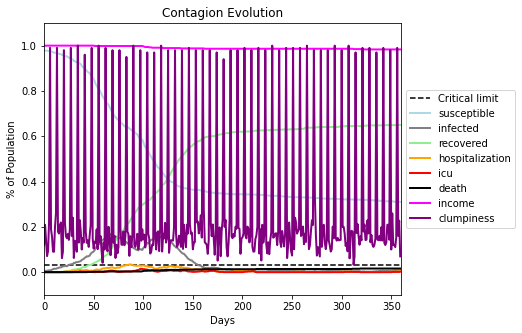

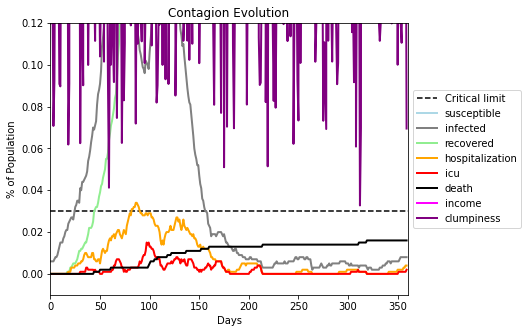

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9832520772318784 but chosen is 0.9816000053316838 for temperature -0.999
Max is 0.9916621963340759 but chosen is 0.9835333097957343 for temperature -0.999
Max is 0.9919959161743589 but chosen is 0.9870518237775296 for temperature -0.999
Max is 0.9947576853611234 but chosen is 0.9908970074928712 for temperature -0.999
Max is 0.9937465021085714 but chosen is 0.9932096520085159 for temperature -0.999
Max is 0.9959943947778871 but chosen is 0.9946695234644872 for temperature -0.999
Max is 0.996591682538321 but chosen is 0.996223193130892 for temperature -0.999
Max is 0.9955574188911881 but chosen is 0.9953066003676265 for temperature -0.999
Max is 0.9945781482487874 but chosen is 0.9944707357044118 for temperature -0.999
Max is 0.9945189580306647 but chosen is 0.9936792437016725 for temperature -0.999
Max is 0.9910509052332981 but chosen is 0.9908905962988214 for temperature -0.999
Max is 0.998369773603538 but chosen is 0.996

Max is 0.9962647175104454 but chosen is 0.9945085776133922 for temperature -0.999
Max is 0.9946691402547981 but chosen is 0.9941179302626569 for temperature -0.999
Max is 0.9906938527778844 but chosen is 0.9900085992937411 for temperature -0.999
Max is 0.9869006389785651 but chosen is 0.9865968042659022 for temperature -0.999
Max is 0.9861090771132393 but chosen is 0.98477359514415 for temperature -0.999
Max is 0.9962391565603398 but chosen is 0.9921292952545637 for temperature -0.999
Max is 0.9971499527403026 but chosen is 0.9956211867627457 for temperature -0.999
Max is 0.9953764276398519 but chosen is 0.9943967214239329 for temperature -0.999
Max is 0.9869547558704689 but chosen is 0.9854959143645169 for temperature -0.999
Max is 0.9933613932144768 but chosen is 0.9920306946725318 for temperature -0.999
Max is 0.9887922648485571 but chosen is 0.9884567065975504 for temperature -0.999
Max is 0.9922427000681283 but chosen is 0.9910133728260898 for temperature -0.999
Max is 0.986847854

Max is 0.984248294640648 but chosen is 0.9783682812811036 for temperature -0.999
Max is 0.9874107913044718 but chosen is 0.9821100642340888 for temperature -0.999
Max is 0.9951677250029598 but chosen is 0.9933360135329196 for temperature -0.999
Max is 0.9951784702329365 but chosen is 0.994620286372853 for temperature -0.999
Max is 0.9691231547859146 but chosen is 0.967397916832311 for temperature -0.999
Max is 0.9791188641844017 but chosen is 0.9783692477647911 for temperature -0.999
Max is 0.9870656761383135 but chosen is 0.980194256451953 for temperature -0.999
Max is 0.9854945551082345 but chosen is 0.9835805750059196 for temperature -0.999
Max is 0.9835439118120347 but chosen is 0.9831063259525175 for temperature -0.999
Max is 0.9877530695713169 but chosen is 0.9852658564061512 for temperature -0.999
Max is 0.9968702993492314 but chosen is 0.9956311237737031 for temperature -0.999
Max is 0.9895970402490343 but chosen is 0.9876505159458758 for temperature -0.999
Max is 0.98576986341

Max is 0.9957511501793475 but chosen is 0.992837479285205 for temperature -0.999
Max is 0.9952753213042648 but chosen is 0.9937994166147958 for temperature -0.999
Max is 0.9920531457882902 but chosen is 0.9906283417908087 for temperature -0.999
Max is 0.9924803453603749 but chosen is 0.9884500822399234 for temperature -0.999
Max is 0.993408215056766 but chosen is 0.9931573609356988 for temperature -0.999
Max is 0.9958374137568704 but chosen is 0.9949147488784135 for temperature -0.999
Max is 0.9903400886408102 but chosen is 0.9857213540576931 for temperature -0.999
Max is 0.9926646228124733 but chosen is 0.99153553109428 for temperature -0.999
Max is 0.9848078433629516 but chosen is 0.983255507395274 for temperature -0.999
Max is 0.9939019984786357 but chosen is 0.9904845856706326 for temperature -0.999
Max is 0.9963575841772891 but chosen is 0.9910541422092843 for temperature -0.999
Max is 0.9893872345884688 but chosen is 0.9870850269161248 for temperature -0.999
Max is 0.992485702666

Max is 0.9971343039843199 but chosen is 0.9963954427634674 for temperature -0.999
Max is 0.9936105256526855 but chosen is 0.9929141326188037 for temperature -0.999
Max is 0.9973399712979368 but chosen is 0.9952470727993517 for temperature -0.999
Max is 0.996353219997147 but chosen is 0.9963295112750626 for temperature -0.999
Max is 0.9963535082678375 but chosen is 0.9962321946788398 for temperature -0.999
Max is 0.995994413059552 but chosen is 0.9948940756807744 for temperature -0.999
Max is 0.9955903710696692 but chosen is 0.9953697533718332 for temperature -0.999
Max is 0.9962725655022885 but chosen is 0.9934231814817254 for temperature -0.999
Max is 0.9956524950057611 but chosen is 0.9954204878410312 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.9952408952218466 for temperature -0.999
Max is 0.9918823360302754 but chosen is 0.9911178428906953 for temperature -0.999
Max is 0.9944966505541801 but chosen is 0.9935618179750995 for temperature -0.999
Max is 0.995414068

Max is 0.9980260052404373 but chosen is 0.9977936343146173 for temperature -0.999
Max is 0.99722848115783 but chosen is 0.9962042776226355 for temperature -0.999
Max is 0.9953917289047348 but chosen is 0.9952352311467518 for temperature -0.999
Max is 0.9967070641369412 but chosen is 0.9957764752429167 for temperature -0.999
Max is 0.9957978447896765 but chosen is 0.9953764930561909 for temperature -0.999
Max is 0.996591682538321 but chosen is 0.9958777190585661 for temperature -0.999
Max is 0.9946029324175119 but chosen is 0.9922921397845942 for temperature -0.999
Max is 0.9943394660711786 but chosen is 0.993765319389478 for temperature -0.999
Max is 0.9970753629662436 but chosen is 0.9955912907566871 for temperature -0.999
Max is 0.996353219997147 but chosen is 0.9963295112750626 for temperature -0.999
Max is 0.996442195802315 but chosen is 0.9942042959901918 for temperature -0.999
Max is 0.9934082150567659 but chosen is 0.9915351475854458 for temperature -0.999
Max is 0.9964347577390

Max is 0.9906415319596759 but chosen is 0.9901108309209452 for temperature -0.999
Max is 0.9937652416920554 but chosen is 0.9919114869057581 for temperature -0.999
Max is 0.9843375339100866 but chosen is 0.9812822100852422 for temperature -0.999
Max is 0.9905254768375327 but chosen is 0.9892212450671288 for temperature -0.999
Max is 0.9892064406346196 but chosen is 0.9875252583334659 for temperature -0.999
Max is 0.9933973491226458 but chosen is 0.9911469222322687 for temperature -0.999
Max is 0.9820566523440534 but chosen is 0.9790832264167507 for temperature -0.999
Max is 0.9895325201765114 but chosen is 0.9886991259216545 for temperature -0.999
Max is 0.9940621998096878 but chosen is 0.9838432507855621 for temperature -0.999
Max is 0.98132523122823 but chosen is 0.977642723645708 for temperature -0.999
Max is 0.9798214534993724 but chosen is 0.9783915033593291 for temperature -0.999
Max is 0.9911278162160555 but chosen is 0.9892151787998495 for temperature -0.999
Max is 0.9877242603

Max is 0.9875664405559221 but chosen is 0.9852107438463453 for temperature -0.999
Max is 0.9868408827655014 but chosen is 0.9841976452151727 for temperature -0.999
Max is 0.9926832036278902 but chosen is 0.9905746588487967 for temperature -0.999
Max is 0.9908798214488322 but chosen is 0.9907576982871884 for temperature -0.999
Max is 0.9821775708208365 but chosen is 0.9815862305899905 for temperature -0.999
Max is 0.9837166015633467 but chosen is 0.9828133623950647 for temperature -0.999
tup_vec1 not in keepset of size 45
Max is 0.9841661718128628 but chosen is 0.9839562483578356 for temperature -0.999
Max is 0.9911278162160555 but chosen is 0.9892151787998495 for temperature -0.999
Max is 0.9880623409832937 but chosen is 0.9819772408813242 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9858897711656965 for temperature -0.999
Max is 0.9868366607507294 but chosen is 0.985042886572716 for temperature -0.999
Max is 0.9869846628747525 but chosen is 0.9846031067548192 for t

Max is 0.9835018314803358 but chosen is 0.9830398913682404 for temperature -0.999
Max is 0.965154720905177 but chosen is 0.963166867936017 for temperature -0.999
Max is 0.9881192319103225 but chosen is 0.9875006057790691 for temperature -0.999
Max is 0.983524104132063 but chosen is 0.9809964032204608 for temperature -0.999
Max is 0.9842478399008656 but chosen is 0.9795998543003968 for temperature -0.999
Max is 0.9923678137824522 but chosen is 0.9915529468026971 for temperature -0.999
tup_vec1 not in keepset of size 33
Max is 0.981729323038093 but chosen is 0.9758181015227323 for temperature -0.999
Max is 0.9705740799653607 but chosen is 0.9695168150766108 for temperature -0.999
Max is 0.9854945551082345 but chosen is 0.9757461473019209 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9734513074796934 for temperature -0.999
Max is 0.9821100642340888 but chosen is 0.9782348657268053 for temperature -0.999
Max is 0.9779755158622013 but chosen is 0.9759455691998309 for temp

Max is 0.9872582279624769 but chosen is 0.9811915184034953 for temperature -0.999
Max is 0.9885767705306213 but chosen is 0.9876665332828078 for temperature -0.999
Max is 0.9911902763353695 but chosen is 0.9908390232984652 for temperature -0.999
Max is 0.9923741329915176 but chosen is 0.988920733210523 for temperature -0.999
Max is 0.9884802321063315 but chosen is 0.9879961846781126 for temperature -0.999
Max is 0.9876513382755696 but chosen is 0.9853083463874541 for temperature -0.999
Max is 0.9724218313340524 but chosen is 0.9671030512352643 for temperature -0.999
Max is 0.9899479698181008 but chosen is 0.9866380466882865 for temperature -0.999
Max is 0.9968446637194017 but chosen is 0.9937921449566065 for temperature -0.999
Max is 0.9888210370798965 but chosen is 0.9876652872325934 for temperature -0.999
Max is 0.9794441835636373 but chosen is 0.977708635587597 for temperature -0.999
Max is 0.9735411035762565 but chosen is 0.9728795001474421 for temperature -0.999
Max is 0.989650609

Max is 0.9923741329915173 but chosen is 0.9917285439784529 for temperature -0.999
Max is 0.9966087743847845 but chosen is 0.9945128079438248 for temperature -0.999
Max is 0.9906037283714556 but chosen is 0.9900516132653249 for temperature -0.999
Max is 0.9976415513237673 but chosen is 0.996124416801044 for temperature -0.999
Max is 0.9943974253124402 but chosen is 0.9942830913693216 for temperature -0.999
Max is 0.9933994589603047 but chosen is 0.9931622506330362 for temperature -0.999
Max is 0.9932947620614512 but chosen is 0.9918569850706144 for temperature -0.999
Max is 0.9946426891714901 but chosen is 0.9926925666926688 for temperature -0.999
Max is 0.9917756304312177 but chosen is 0.991274129519777 for temperature -0.999
Max is 0.9946056392744977 but chosen is 0.9945832132486518 for temperature -0.999
Max is 0.9939506540881591 but chosen is 0.993906389099316 for temperature -0.999
Max is 0.996090797186381 but chosen is 0.9943538793552584 for temperature -0.999
Max is 0.99473514435

Max is 0.9969976117087985 but chosen is 0.996778315142896 for temperature -0.999
Max is 0.9980260052404375 but chosen is 0.9972284811578302 for temperature -0.999
Max is 0.9960013277196096 but chosen is 0.9956785169976592 for temperature -0.999
Max is 0.9948175433197098 but chosen is 0.9934355875859616 for temperature -0.999
Max is 0.9963954427634674 but chosen is 0.9951677250029598 for temperature -0.999
Max is 0.9951443755479612 but chosen is 0.9936105256526855 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.9952408952218466 for temperature -0.999
Max is 0.9900900634311195 but chosen is 0.9898128549614379 for temperature -0.999
Max is 0.995825458457378 but chosen is 0.9950017243738705 for temperature -0.999
Max is 0.9973399712979367 but chosen is 0.9956791770195184 for temperature -0.999
Max is 0.9958374137568704 but chosen is 0.9951423841595295 for temperature -0.999
Max is 0.9937263819458917 but chosen is 0.9858741779911953 for temperature -0.999
Max is 0.991141073

Max is 0.9980260052404373 but chosen is 0.9978422495233421 for temperature -0.999
Max is 0.9961187456286481 but chosen is 0.995070181367051 for temperature -0.999
Max is 0.9931038430406064 but chosen is 0.992128934085837 for temperature -0.999
Max is 0.9967514261723833 but chosen is 0.9952408952218463 for temperature -0.999
Max is 0.9977569844939326 but chosen is 0.994985360671649 for temperature -0.999
Max is 0.9963351748330123 but chosen is 0.9954204878410312 for temperature -0.999
Max is 0.9913014318135064 but chosen is 0.9896420750648438 for temperature -0.999
Max is 0.9938065767026175 but chosen is 0.9913555516079835 for temperature -0.999
Max is 0.996442195802315 but chosen is 0.9943627343221553 for temperature -0.999
tup_vec1 not in keepset of size 43
Max is 0.9934786293151981 but chosen is 0.9927701003875831 for temperature -0.999
Max is 0.9973540804526791 but chosen is 0.9963294093282911 for temperature -0.999
Max is 0.9962321946788398 but chosen is 0.9938220206327258 for temp

Max is 0.9960013277196096 but chosen is 0.9956785169976592 for temperature -0.999
tup_vec1 not in keepset of size 59
Max is 0.998369773603538 but chosen is 0.9969462806191836 for temperature -0.999
Max is 0.9964469798918693 but chosen is 0.9961503450515949 for temperature -0.999
Max is 0.9951423841595295 but chosen is 0.9949147488784135 for temperature -0.999
Max is 0.99722848115783 but chosen is 0.9956266432380156 for temperature -0.999
Max is 0.9931038430406064 but chosen is 0.9917583420080963 for temperature -0.999
Max is 0.9942095553770601 but chosen is 0.9915351475854458 for temperature -0.999
Max is 0.9935618179750995 but chosen is 0.9907207956410634 for temperature -0.999
Max is 0.99613486587755 but chosen is 0.9923969311831962 for temperature -0.999
Max is 0.9945567124405507 but chosen is 0.9932710873994571 for temperature -0.999
tup_vec1 not in keepset of size 40
Max is 0.9936105256526855 but chosen is 0.9926460293487703 for temperature -0.999
Max is 0.9903263434915943 but cho

Max is 0.9858897711656965 but chosen is 0.9847060744285521 for temperature -0.999
Max is 0.9906316393041664 but chosen is 0.9897622324482244 for temperature -0.999
Max is 0.9862353071781063 but chosen is 0.9805823268165476 for temperature -0.999
Max is 0.9892151787998495 but chosen is 0.9819772408813242 for temperature -0.999
Max is 0.9862350832519612 but chosen is 0.9856248825278797 for temperature -0.999
Max is 0.9816061018676884 but chosen is 0.9776059563996671 for temperature -0.999
Max is 0.9837166015633467 but chosen is 0.9815862305899905 for temperature -0.999
Max is 0.9821775708208365 but chosen is 0.981270619271938 for temperature -0.999
Max is 0.9911278162160555 but chosen is 0.9880089776226827 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.984982068492187 for temperature -0.999
Max is 0.9932957632492619 but chosen is 0.9876621312873787 for temperature -0.999
Max is 0.9905142425280477 but chosen is 0.9889104406725305 for temperature -0.999
Max is 0.989098509

Max is 0.9883956762866313 but chosen is 0.9876908466554835 for temperature -0.999
Max is 0.9906316393041664 but chosen is 0.9874918281693991 for temperature -0.999
Max is 0.9919310413669974 but chosen is 0.9872549191239608 for temperature -0.999
Max is 0.9867494426583121 but chosen is 0.9848925111133359 for temperature -0.999
Max is 0.984778669488585 but chosen is 0.9783269703371129 for temperature -0.999
Max is 0.9821038002040877 but chosen is 0.9791188641844017 for temperature -0.999
Max is 0.9640727678796023 but chosen is 0.9636272437313504 for temperature -0.999
Max is 0.9861188331034321 but chosen is 0.9837166015633467 for temperature -0.999
Max is 0.9735565724831956 but chosen is 0.9734273242516521 for temperature -0.999
Max is 0.9900085992937411 but chosen is 0.9898622948609774 for temperature -0.999
Max is 0.9906938527778844 but chosen is 0.9897216699602183 for temperature -0.999
Max is 0.9930809115187288 but chosen is 0.9928056418810843 for temperature -0.999
Max is 0.98705378

Max is 0.976642058251901 but chosen is 0.9581013022991185 for temperature -0.999
Max is 0.9783208469290721 but chosen is 0.965752878671398 for temperature -0.999
Max is 0.9659259554750987 but chosen is 0.958190115677286 for temperature -0.999
Max is 0.9648357572945405 but chosen is 0.957256216497099 for temperature -0.999
Max is 0.9474595206693248 but chosen is 0.9419437812489257 for temperature -0.999
Max is 0.985914044233992 but chosen is 0.9803369437883828 for temperature -0.999
Max is 0.9915257390635929 but chosen is 0.9883697229375458 for temperature -0.999
Max is 0.9925593953929142 but chosen is 0.9874542610096524 for temperature -0.999
tup_vec1 not in keepset of size 77
Max is 0.985914044233992 but chosen is 0.9756045582303133 for temperature -0.999
Max is 0.9876784627268499 but chosen is 0.9863081380699489 for temperature -0.999
Max is 0.9838408754281064 but chosen is 0.9822708827494654 for temperature -0.999
Max is 0.9868478541174533 but chosen is 0.9858370266875501 for temper

Max is 0.9944480700031826 but chosen is 0.9943974253124402 for temperature -0.999
Max is 0.9945832132486518 but chosen is 0.9939506540881591 for temperature -0.999
Max is 0.9924341055659547 but chosen is 0.9918328392164895 for temperature -0.999
Max is 0.9887076580243525 but chosen is 0.9882351733386006 for temperature -0.999
Max is 0.9946056392744977 but chosen is 0.9930321844320587 for temperature -0.999
Max is 0.996090797186381 but chosen is 0.9951688191393497 for temperature -0.999
Max is 0.9972406974966297 but chosen is 0.9951281828437492 for temperature -0.999
Max is 0.9952143231012782 but chosen is 0.9944707357044118 for temperature -0.999
Max is 0.9949740910305188 but chosen is 0.9946525518144579 for temperature -0.999
Max is 0.9938326003295974 but chosen is 0.9930762278057143 for temperature -0.999
Max is 0.9890795836815742 but chosen is 0.988920733210523 for temperature -0.999
Max is 0.9923741329915176 but chosen is 0.9911902763353694 for temperature -0.999
tup_vec1 not in ke

Max is 0.9968446637194017 but chosen is 0.9943538793552585 for temperature -0.999
Max is 0.9945690067300863 but chosen is 0.9937628294251531 for temperature -0.999
Max is 0.9939003239931483 but chosen is 0.9929682277536379 for temperature -0.999
Max is 0.9950635350569327 but chosen is 0.9947351443501258 for temperature -0.999
Max is 0.9935594359375954 but chosen is 0.9928004099064595 for temperature -0.999
Max is 0.9945319001617692 but chosen is 0.994244390529569 for temperature -0.999
Max is 0.9938597666078607 but chosen is 0.9905802369409709 for temperature -0.999
Max is 0.9923274026601582 but chosen is 0.9908922362247797 for temperature -0.999
Max is 0.9973244109694556 but chosen is 0.9942549615311325 for temperature -0.999
Max is 0.997620876542213 but chosen is 0.9947137963312456 for temperature -0.999
Max is 0.9940002137615621 but chosen is 0.9891663689361381 for temperature -0.999
Max is 0.9956542770504793 but chosen is 0.9914731030042456 for temperature -0.999
Max is 0.989729914

Max is 0.9935510044382646 but chosen is 0.9910133728260897 for temperature -0.999
Max is 0.9962985868605885 but chosen is 0.9955611181883085 for temperature -0.999
Max is 0.9943393484040702 but chosen is 0.9928098803601891 for temperature -0.999
Max is 0.9950422184669684 but chosen is 0.9914578330037606 for temperature -0.999
Max is 0.9941896915858442 but chosen is 0.9918006629919717 for temperature -0.999
Max is 0.9931276942239109 but chosen is 0.9902974975788147 for temperature -0.999
Max is 0.9913419871604612 but chosen is 0.9888099715768932 for temperature -0.999
Max is 0.9895020554165405 but chosen is 0.9878110282792423 for temperature -0.999
Max is 0.9927323770135984 but chosen is 0.9924306750140947 for temperature -0.999
Max is 0.9946353558352614 but chosen is 0.9936884707511013 for temperature -0.999
Max is 0.9934280722761841 but chosen is 0.9926537840221915 for temperature -0.999
Max is 0.995141743897474 but chosen is 0.9938854852423262 for temperature -0.999
Max is 0.98813274

Max is 0.9978819337736007 but chosen is 0.9929460094602884 for temperature -0.999
Max is 0.9953783626985587 but chosen is 0.9945796841476044 for temperature -0.999
Max is 0.9931276942239109 but chosen is 0.9928723569135699 for temperature -0.999
Max is 0.9934328268786647 but chosen is 0.9882277246395527 for temperature -0.999
Max is 0.9919213564083014 but chosen is 0.9915066543030983 for temperature -0.999
tup_vec1 not in keepset of size 43
Max is 0.9946226604034515 but chosen is 0.9942633365508863 for temperature -0.999
Max is 0.9917504166948532 but chosen is 0.990382439219111 for temperature -0.999
Max is 0.9881327416059079 but chosen is 0.987291568423161 for temperature -0.999
Max is 0.9890545270250769 but chosen is 0.9874145103127073 for temperature -0.999
Max is 0.9858656169187694 but chosen is 0.985037890657612 for temperature -0.999
Max is 0.9913419871604612 but chosen is 0.9888099715768932 for temperature -0.999
Max is 0.9934115610500396 but chosen is 0.9899026323082732 for tem

Max is 0.9918111293207348 but chosen is 0.9917439069206857 for temperature -0.999
Max is 0.992902786170613 but chosen is 0.9923671372708781 for temperature -0.999
Max is 0.997172598250379 but chosen is 0.9954008288921341 for temperature -0.999
Max is 0.9955581655889615 but chosen is 0.9942101441913894 for temperature -0.999
Max is 0.9950422184669682 but chosen is 0.9942562901111965 for temperature -0.999
Max is 0.9835439118120347 but chosen is 0.9831063259525175 for temperature -0.999
Max is 0.9899498133800134 but chosen is 0.9853912425038293 for temperature -0.999
Max is 0.9940054939737565 but chosen is 0.9937040078862007 for temperature -0.999
tup_vec1 not in keepset of size 41
Max is 0.988172867433715 but chosen is 0.9869127709026121 for temperature -0.999
Max is 0.9914040071715324 but chosen is 0.9903655690752798 for temperature -0.999
Max is 0.9928521673885186 but chosen is 0.9835319749390042 for temperature -0.999
Max is 0.9927213910538143 but chosen is 0.9908215066346768 for tem

Max is 0.9923867819338857 but chosen is 0.9859127306579482 for temperature -0.999
Max is 0.9825820693560273 but chosen is 0.9824425575385257 for temperature -0.999
Max is 0.9820868675314323 but chosen is 0.9818332926816623 for temperature -0.999
tup_vec1 not in keepset of size 27
Max is 0.991729779065474 but chosen is 0.9879577212477323 for temperature -0.999
Max is 0.983697585636058 but chosen is 0.982393960086642 for temperature -0.999
Max is 0.9909955949411309 but chosen is 0.9908438697924233 for temperature -0.999
Max is 0.9901480468259971 but chosen is 0.9887360101997343 for temperature -0.999
Max is 0.9932437920605732 but chosen is 0.9923483780850909 for temperature -0.999
Max is 0.9855136046434716 but chosen is 0.9848444920810151 for temperature -0.999
Max is 0.9743149476172214 but chosen is 0.9720901548559399 for temperature -0.999
Max is 0.9931702300320959 but chosen is 0.9798710374054483 for temperature -0.999
Max is 0.9904831266531304 but chosen is 0.9619619585851256 for tem

Max is 0.9938558479118829 but chosen is 0.9935574768117341 for temperature -0.999
Max is 0.9978550690118929 but chosen is 0.9946849073687883 for temperature -0.999
Max is 0.9953702487184606 but chosen is 0.9935842528198503 for temperature -0.999
Max is 0.9971499527403025 but chosen is 0.9953764276398517 for temperature -0.999
Max is 0.9982554966829702 but chosen is 0.9951313351241581 for temperature -0.999
Max is 0.9914079535197396 but chosen is 0.9877351734778043 for temperature -0.999
tup_vec1 not in keepset of size 63
Max is 0.9928082633148195 but chosen is 0.9927572388236096 for temperature -0.999
Max is 0.9939854764859511 but chosen is 0.9939790478226236 for temperature -0.999
Max is 0.9946124001377068 but chosen is 0.9934961514382705 for temperature -0.999
Max is 0.992670363894806 but chosen is 0.992195654609046 for temperature -0.999
Max is 0.9953274346816732 but chosen is 0.9922547106375329 for temperature -0.999
Max is 0.9912191682644506 but chosen is 0.9910711182658464 for te

Max is 0.9972161023986661 but chosen is 0.9951624308396444 for temperature -0.999
Max is 0.9967349541873306 but chosen is 0.995979522961758 for temperature -0.999
Max is 0.994371247612934 but chosen is 0.9942543883699256 for temperature -0.999
Max is 0.9934033436889751 but chosen is 0.992670363894806 for temperature -0.999
tup_vec1 not in keepset of size 59
Max is 0.9939360354205492 but chosen is 0.993225491142716 for temperature -0.999
Max is 0.9982554966829703 but chosen is 0.9956211867627459 for temperature -0.999
Max is 0.9970220663065847 but chosen is 0.9953764276398517 for temperature -0.999
Max is 0.998057098620504 but chosen is 0.9953396258874532 for temperature -0.999
Max is 0.9934617848514948 but chosen is 0.9925544681387993 for temperature -0.999
Max is 0.9958853875756227 but chosen is 0.9942629315868459 for temperature -0.999
Max is 0.9870378035816575 but chosen is 0.9865325301572351 for temperature -0.999
Max is 0.995645202190526 but chosen is 0.9951711104966153 for temper

Max is 0.990318586167211 but chosen is 0.9885990521975482 for temperature -0.999
Max is 0.9914655549209841 but chosen is 0.9878623724465518 for temperature -0.999
Max is 0.9848956687334247 but chosen is 0.9839337623177462 for temperature -0.999
Max is 0.9933613932144768 but chosen is 0.9920306946725318 for temperature -0.999
Max is 0.9849127118529795 but chosen is 0.9848567348142846 for temperature -0.999
Max is 0.9881817030682135 but chosen is 0.9812474144229105 for temperature -0.999
Max is 0.9923675769851794 but chosen is 0.9850666201538445 for temperature -0.999
Max is 0.9916303388621733 but chosen is 0.9908437394772043 for temperature -0.999
Max is 0.9906063962841843 but chosen is 0.9879516090023309 for temperature -0.999
Max is 0.9974303871971741 but chosen is 0.9919542435130416 for temperature -0.999
Max is 0.9854056707983009 but chosen is 0.9803813958560769 for temperature -0.999
Max is 0.979995664344694 but chosen is 0.9787887706929425 for temperature -0.999
Max is 0.985082078

Max is 0.9865105900293075 but chosen is 0.983282524921806 for temperature -0.999
Max is 0.9895970402490343 but chosen is 0.9877392917249295 for temperature -0.999
Max is 0.990318586167211 but chosen is 0.986962285981134 for temperature -0.999
Max is 0.9887582223957211 but chosen is 0.9861679880626273 for temperature -0.999
Max is 0.9954008288921341 but chosen is 0.9941331999628735 for temperature -0.999
Max is 0.9969886069276661 but chosen is 0.9967835442635911 for temperature -0.999
Max is 0.9965658844881623 but chosen is 0.9955258488926861 for temperature -0.999
Max is 0.9967179811921223 but chosen is 0.9963378416925325 for temperature -0.999
Max is 0.9965365459565032 but chosen is 0.9946713042095946 for temperature -0.999
Max is 0.9928428784889521 but chosen is 0.9914539531262148 for temperature -0.999
Max is 0.9936224827167571 but chosen is 0.9920680052673453 for temperature -0.999
Max is 0.9947886551267926 but chosen is 0.9900859600885736 for temperature -0.999
Max is 0.9905371681

Max is 0.9843481532356969 but chosen is 0.9790643650014794 for temperature -0.999
Max is 0.9811213435810348 but chosen is 0.9802925920192774 for temperature -0.999
Max is 0.9890626471690717 but chosen is 0.9821114662090034 for temperature -0.999
Max is 0.9836217785231324 but chosen is 0.980609923345665 for temperature -0.999
Max is 0.9840048096394687 but chosen is 0.9829942387144995 for temperature -0.999
Max is 0.9842068428716263 but chosen is 0.9829682902205727 for temperature -0.999
Max is 0.9856777175526766 but chosen is 0.9790575993678136 for temperature -0.999
Max is 0.9799779097664939 but chosen is 0.9759659795178081 for temperature -0.999
Max is 0.9860226562500048 but chosen is 0.980549985526148 for temperature -0.999
Max is 0.9937198736963532 but chosen is 0.9928428784889525 for temperature -0.999
Max is 0.9924887940484394 but chosen is 0.9914539531262148 for temperature -0.999
Max is 0.9968714684812539 but chosen is 0.9963454161338089 for temperature -0.999
Max is 0.993225352

Max is 0.9946256718891509 but chosen is 0.9942562901111965 for temperature -0.999
Max is 0.9968714684812539 but chosen is 0.9959940623907642 for temperature -0.999
Max is 0.9904463789839957 but chosen is 0.9903534152821074 for temperature -0.999
Max is 0.9937040078862007 but chosen is 0.9881432138045865 for temperature -0.999
Max is 0.9951272506481531 but chosen is 0.9946713042095946 for temperature -0.999
Max is 0.9961164390949627 but chosen is 0.995521693468703 for temperature -0.999
Max is 0.9908288002282875 but chosen is 0.9868222396385178 for temperature -0.999
Max is 0.9930386508751394 but chosen is 0.9913419871604612 for temperature -0.999
Max is 0.989853387364364 but chosen is 0.989361604808786 for temperature -0.999
Max is 0.9928814144246325 but chosen is 0.9902685922434739 for temperature -0.999
Max is 0.9941549873794365 but chosen is 0.9939023908850971 for temperature -0.999
Max is 0.9949476616613584 but chosen is 0.9944415753805643 for temperature -0.999
Max is 0.9971725982

Max is 0.9929184312138462 but chosen is 0.9926580124889596 for temperature -0.999
Max is 0.9951272506481531 but chosen is 0.9948863747869694 for temperature -0.999
Max is 0.9968714684812539 but chosen is 0.9959940623907642 for temperature -0.999
Max is 0.9928428784889521 but chosen is 0.9923834077533188 for temperature -0.999
Max is 0.997172598250379 but chosen is 0.9955581655889615 for temperature -0.999
Max is 0.9937198736963532 but chosen is 0.9916200397609372 for temperature -0.999
Max is 0.9961164390949627 but chosen is 0.9955258488926861 for temperature -0.999
Max is 0.9933025376242772 but chosen is 0.9929931880599506 for temperature -0.999
Max is 0.9963454161338089 but chosen is 0.9932253526469081 for temperature -0.999
Max is 0.9946713042095946 but chosen is 0.9930533091244188 for temperature -0.999
Max is 0.9907907256440435 but chosen is 0.9895020554165406 for temperature -0.999
Max is 0.9878110282792423 but chosen is 0.987291568423161 for temperature -0.999
Max is 0.991750416

Max is 0.983658467838439 but chosen is 0.9750822586537023 for temperature -0.999
Max is 0.9952786083254049 but chosen is 0.9897513725050474 for temperature -0.999
Max is 0.9924680099996626 but chosen is 0.9843534511649894 for temperature -0.999
Max is 0.9857427850668407 but chosen is 0.9852076433164049 for temperature -0.999
Max is 0.9909615779323186 but chosen is 0.9800594460943033 for temperature -0.999
Max is 0.9893168924434687 but chosen is 0.9841614926059375 for temperature -0.999
Max is 0.9869312460172578 but chosen is 0.984794798226047 for temperature -0.999
Max is 0.9801050859906238 but chosen is 0.9773187513290975 for temperature -0.999
Max is 0.9879714525344108 but chosen is 0.9848633956399768 for temperature -0.999
Max is 0.9879891939782149 but chosen is 0.97889434512283 for temperature -0.999
Max is 0.9783649045439168 but chosen is 0.9603148856648649 for temperature -0.999
Max is 0.9777734783942434 but chosen is 0.9728254195711905 for temperature -0.999
Max is 0.99083027339

Max is 0.9961390229641288 but chosen is 0.9951633616473119 for temperature -0.999
Max is 0.9887502107742481 but chosen is 0.9868406422556625 for temperature -0.999
Max is 0.9905386464493918 but chosen is 0.9903852808011586 for temperature -0.999
Max is 0.9939790478226236 but chosen is 0.9937880993191377 for temperature -0.999
Max is 0.9967349541873306 but chosen is 0.995979522961758 for temperature -0.999
Max is 0.9942543883699256 but chosen is 0.9939341293277156 for temperature -0.999
Max is 0.9943933707855405 but chosen is 0.9928889574603379 for temperature -0.999
Max is 0.99719976245383 but chosen is 0.9951624308396444 for temperature -0.999
Max is 0.9972161023986661 but chosen is 0.997215742658296 for temperature -0.999
Max is 0.9960277025725212 but chosen is 0.995303551788011 for temperature -0.999
Max is 0.9938558479118829 but chosen is 0.9935574768117341 for temperature -0.999
Max is 0.9978550690118929 but chosen is 0.9946849073687883 for temperature -0.999
Max is 0.992721945634

tup_vec1 not in keepset of size 63
Max is 0.9869907351521203 but chosen is 0.9858004176058892 for temperature -0.999
Max is 0.9923675769851794 but chosen is 0.9874388957341155 for temperature -0.999
Max is 0.9930756121479639 but chosen is 0.9908970074928712 for temperature -0.999
Max is 0.9947576853611234 but chosen is 0.9900945524464194 for temperature -0.999
Max is 0.9954640904036111 but chosen is 0.9948429237697551 for temperature -0.999
Max is 0.9959961904917587 but chosen is 0.9926710372909744 for temperature -0.999
Max is 0.9909571173820084 but chosen is 0.9885713408868948 for temperature -0.999
Max is 0.997430387197174 but chosen is 0.9930893616058522 for temperature -0.999
Max is 0.9933859256747668 but chosen is 0.9911369271781075 for temperature -0.999
Max is 0.989562691591136 but chosen is 0.9874152752455087 for temperature -0.999
tup_vec1 not in keepset of size 44
Max is 0.9959347623680623 but chosen is 0.9927080261568534 for temperature -0.999
Max is 0.9923009517652852 but 

Max is 0.99366974656809 but chosen is 0.9917647966813735 for temperature -0.999
Max is 0.9954679395950853 but chosen is 0.9926632212589765 for temperature -0.999
Max is 0.9933545113247484 but chosen is 0.9883284049479518 for temperature -0.999
Max is 0.9861118895741653 but chosen is 0.9858004176058893 for temperature -0.999
Max is 0.9975044834711905 but chosen is 0.9870069481786118 for temperature -0.999
Max is 0.9865316403817047 but chosen is 0.9850011959308165 for temperature -0.999
Max is 0.9911740191760926 but chosen is 0.9844064545689282 for temperature -0.999
Max is 0.9896790331993183 but chosen is 0.9895123332682068 for temperature -0.999
Max is 0.989312004625562 but chosen is 0.9890146898661137 for temperature -0.999
Max is 0.9802566391309879 but chosen is 0.9753989097005714 for temperature -0.999
Max is 0.9887922648485571 but chosen is 0.9848567348142846 for temperature -0.999
Max is 0.9919959161743589 but chosen is 0.9796402154962695 for temperature -0.999
Max is 0.9804094837

Max is 0.9928300738972874 but chosen is 0.9925216027256453 for temperature -0.999
Max is 0.990962780007231 but chosen is 0.9907876553736874 for temperature -0.999
Max is 0.9933573538163819 but chosen is 0.9921146662376319 for temperature -0.999
tup_vec1 not in keepset of size 30
Max is 0.9921221031163907 but chosen is 0.9917940358529876 for temperature -0.999
Max is 0.9956033149070209 but chosen is 0.9937890315772214 for temperature -0.999
Max is 0.9897457017732181 but chosen is 0.9891932004791079 for temperature -0.999
Max is 0.9873723206206628 but chosen is 0.9856616394258272 for temperature -0.999
Max is 0.9882169618754462 but chosen is 0.9871395730088753 for temperature -0.999
Max is 0.9832995996676329 but chosen is 0.9812970390300758 for temperature -0.999
Max is 0.9944382857839332 but chosen is 0.9901407481907779 for temperature -0.999
Max is 0.993945779937079 but chosen is 0.9891476583818688 for temperature -0.999
Max is 0.9925179117988049 but chosen is 0.9839451288565921 for te

Max is 0.9918805335135112 but chosen is 0.9882169618754462 for temperature -0.999
Max is 0.9875661135792504 but chosen is 0.986579134973913 for temperature -0.999
Max is 0.997559722955745 but chosen is 0.9970638611207661 for temperature -0.999
Max is 0.9953716335981927 but chosen is 0.9945562407804641 for temperature -0.999
Max is 0.9974969866494328 but chosen is 0.9962551078127495 for temperature -0.999
Max is 0.9961844775777343 but chosen is 0.9953801462925401 for temperature -0.999
Max is 0.9929016606435953 but chosen is 0.9922283698295199 for temperature -0.999
Max is 0.9964740988555589 but chosen is 0.9956271781550197 for temperature -0.999
Max is 0.9960261016039723 but chosen is 0.9955063715260486 for temperature -0.999
Max is 0.9943180702008926 but chosen is 0.9940246913850022 for temperature -0.999
Max is 0.9928714737412797 but chosen is 0.9924439650856162 for temperature -0.999
Max is 0.9951356734448125 but chosen is 0.9925465765700595 for temperature -0.999
Max is 0.995377156

Max is 0.9863630053403131 but chosen is 0.9860906973500523 for temperature -0.999
Max is 0.981716847370264 but chosen is 0.979740273773705 for temperature -0.999
Max is 0.9865791349739133 but chosen is 0.9821974998222587 for temperature -0.999
Max is 0.9843455586111914 but chosen is 0.9484550330871077 for temperature -0.999
Max is 0.9928300738972874 but chosen is 0.9883939604304354 for temperature -0.999
Max is 0.9930461217799312 but chosen is 0.9920851321828338 for temperature -0.999
tup_vec1 not in keepset of size 78
Max is 0.995040275198148 but chosen is 0.9943947404615383 for temperature -0.999
Max is 0.994512019076664 but chosen is 0.9940017259145804 for temperature -0.999
Max is 0.9924655078057616 but chosen is 0.990181453311775 for temperature -0.999
Max is 0.9973949550489031 but chosen is 0.9964222171123321 for temperature -0.999
Max is 0.997559722955745 but chosen is 0.9970638611207661 for temperature -0.999
Max is 0.9975833708370314 but chosen is 0.9965214916468939 for temper

Max is 0.9929449112190436 but chosen is 0.9909521830359966 for temperature -0.999
Max is 0.9928677189982344 but chosen is 0.9924099837198321 for temperature -0.999
Max is 0.994402247461742 but chosen is 0.9919326762942872 for temperature -0.999
Max is 0.9932817140857968 but chosen is 0.9924643868206865 for temperature -0.999
Max is 0.9943814385858064 but chosen is 0.99362094246992 for temperature -0.999
Max is 0.997321934539439 but chosen is 0.9951065762191886 for temperature -0.999
Max is 0.9901940928138391 but chosen is 0.9880111135650305 for temperature -0.999
Max is 0.9935951943082366 but chosen is 0.9915044918115176 for temperature -0.999
Max is 0.9935617005855609 but chosen is 0.9922464631829839 for temperature -0.999
Max is 0.9927627493655043 but chosen is 0.9922295664338268 for temperature -0.999
Max is 0.9948853569331404 but chosen is 0.9947113630573097 for temperature -0.999
Max is 0.9966097019325327 but chosen is 0.9947969907402593 for temperature -0.999
Max is 0.99530893990

Max is 0.9943824847582465 but chosen is 0.9924099837198321 for temperature -0.999
Max is 0.9905568854936988 but chosen is 0.9888935671989646 for temperature -0.999
Max is 0.990964296107266 but chosen is 0.9901940928138391 for temperature -0.999
Max is 0.9944937846931224 but chosen is 0.9885058362443296 for temperature -0.999
Max is 0.9914792656578697 but chosen is 0.9905031846963643 for temperature -0.999
Max is 0.9910921878867645 but chosen is 0.9894706048038835 for temperature -0.999
Max is 0.9876288225128464 but chosen is 0.9847943089901887 for temperature -0.999
Max is 0.9920772835524423 but chosen is 0.9900125071350716 for temperature -0.999
Max is 0.9896421415495479 but chosen is 0.9863685632625029 for temperature -0.999
Max is 0.9933277584938732 but chosen is 0.9918241913688075 for temperature -0.999
Max is 0.9928598300746 but chosen is 0.9925707448162965 for temperature -0.999
Max is 0.9947050097617687 but chosen is 0.9940463538254228 for temperature -0.999
Max is 0.99433300472

Max is 0.9961024032105882 but chosen is 0.9951827414793837 for temperature -0.999
Max is 0.9910862077368091 but chosen is 0.9896509059703268 for temperature -0.999
Max is 0.9951476906411952 but chosen is 0.994118666613051 for temperature -0.999
Max is 0.9951921817768755 but chosen is 0.9930918904706876 for temperature -0.999
Max is 0.990647907035159 but chosen is 0.98817086039231 for temperature -0.999
Max is 0.9959801666134683 but chosen is 0.9929344761859012 for temperature -0.999
Max is 0.9968702993492314 but chosen is 0.9956311237737031 for temperature -0.999
Max is 0.9923652724231915 but chosen is 0.9922400735275568 for temperature -0.999
Max is 0.9928781602928141 but chosen is 0.9902018176746274 for temperature -0.999
Max is 0.991330878414994 but chosen is 0.9889564838503614 for temperature -0.999
Max is 0.99114505821663 but chosen is 0.9911445280634736 for temperature -0.999
Max is 0.9959361514530988 but chosen is 0.992205267334621 for temperature -0.999
Max is 0.993143715110205

Max is 0.99304114535765 but chosen is 0.9924525412255742 for temperature -0.999
Max is 0.9944483974438315 but chosen is 0.9933009178784484 for temperature -0.999
Max is 0.9937883242239494 but chosen is 0.992032513771224 for temperature -0.999
Max is 0.993869638135821 but chosen is 0.99045651396898 for temperature -0.999
tup_vec1 not in keepset of size 43
Max is 0.99417864128316 but chosen is 0.9929247643353533 for temperature -0.999
Max is 0.9954252019215128 but chosen is 0.9946496922821099 for temperature -0.999
Max is 0.9937923855077997 but chosen is 0.9917201793708095 for temperature -0.999
Max is 0.9908905962988214 but chosen is 0.9856997065002466 for temperature -0.999
Max is 0.986727144506541 but chosen is 0.9867205291319167 for temperature -0.999
Max is 0.9943274516922048 but chosen is 0.991801858436941 for temperature -0.999
Max is 0.9907017394873118 but chosen is 0.9906430775120838 for temperature -0.999
tup_vec1 not in keepset of size 24
Max is 0.9861410768592085 but chosen i

Max is 0.9923464486306804 but chosen is 0.9909430708605497 for temperature -0.999
Max is 0.9943145490741795 but chosen is 0.9937541988119272 for temperature -0.999
Max is 0.9923607173745183 but chosen is 0.9921518265908263 for temperature -0.999
Max is 0.9954252019215128 but chosen is 0.9950015389571666 for temperature -0.999
Max is 0.9954533951046225 but chosen is 0.9949390627364328 for temperature -0.999
Max is 0.9925333580405292 but chosen is 0.9924654553034825 for temperature -0.999
Max is 0.992319277294837 but chosen is 0.9915640658746532 for temperature -0.999
Max is 0.9929103218145927 but chosen is 0.9897881623996777 for temperature -0.999
Max is 0.9823604769379286 but chosen is 0.9816850735237564 for temperature -0.999
Max is 0.9922865777971884 but chosen is 0.9903028555301594 for temperature -0.999
Max is 0.9919926630980485 but chosen is 0.9881829872336929 for temperature -0.999
Max is 0.9943689017183379 but chosen is 0.9912657422496471 for temperature -0.999
Max is 0.98825098

Max is 0.9931276942239109 but chosen is 0.9911980670258881 for temperature -0.999
Max is 0.9949476616613584 but chosen is 0.9948855734374229 for temperature -0.999
Max is 0.9955258488926861 but chosen is 0.9922683083603022 for temperature -0.999
Max is 0.9935510044382646 but chosen is 0.9910577819646857 for temperature -0.999
Max is 0.9963454161338089 but chosen is 0.9940645350493335 for temperature -0.999
Max is 0.9968714684812539 but chosen is 0.9921966774694708 for temperature -0.999
Max is 0.9950422184669682 but chosen is 0.9942562901111965 for temperature -0.999
Max is 0.9928428784889521 but chosen is 0.9923834077533188 for temperature -0.999
Max is 0.997172598250379 but chosen is 0.9955581655889615 for temperature -0.999
Max is 0.9905327630390924 but chosen is 0.9874719100019803 for temperature -0.999
Max is 0.9955860437128863 but chosen is 0.9947886551267926 for temperature -0.999
Max is 0.989459749068814 but chosen is 0.9886120632374188 for temperature -0.999
Max is 0.989902632

Max is 0.9827365174511614 but chosen is 0.9744121910421913 for temperature -0.999
Max is 0.9892132454556074 but chosen is 0.9824592819292838 for temperature -0.999
Max is 0.9856699851336173 but chosen is 0.9817633313421363 for temperature -0.999
Max is 0.9812515249045212 but chosen is 0.9769691419932105 for temperature -0.999
Max is 0.9780408991091216 but chosen is 0.9689986065585255 for temperature -0.999
Max is 0.9816074582991844 but chosen is 0.9801457293756932 for temperature -0.999
Max is 0.9859140442339919 but chosen is 0.9783700364602401 for temperature -0.999
Max is 0.9817918588480932 but chosen is 0.9801849316815447 for temperature -0.999
Max is 0.9875417865410032 but chosen is 0.9851385351929364 for temperature -0.999
Max is 0.988479466616804 but chosen is 0.987867496896903 for temperature -0.999
Max is 0.990607392442993 but chosen is 0.9854224816781075 for temperature -0.999
Max is 0.9951710239036987 but chosen is 0.982855072773769 for temperature -0.999
Max is 0.98051502298

Max is 0.9948692580192803 but chosen is 0.9925035652041974 for temperature -0.999
Max is 0.9902708203020215 but chosen is 0.9895686862584591 for temperature -0.999
Average similarity between family and home is 0.9930560269533852 at temperature -1
Max is 0.9964421958023146 but chosen is 0.9960182032534852 for temperature -0.999
Max is 0.9962725655022886 but chosen is 0.9958777190585661 for temperature -0.999
Max is 0.9970753629662436 but chosen is 0.9967070641369412 for temperature -0.999
Max is 0.9963351748330123 but chosen is 0.9954204878410312 for temperature -0.999
Max is 0.9968778341179276 but chosen is 0.9968589073373789 for temperature -0.999
Max is 0.9928282935814394 but chosen is 0.992652415057398 for temperature -0.999
Max is 0.9946844250393884 but chosen is 0.9939500583431575 for temperature -0.999
Max is 0.9932441053714043 but chosen is 0.992652415057398 for temperature -0.999
Max is 0.9959331942549424 but chosen is 0.9942919055153656 for temperature -0.999
Max is 0.99613293

Max is 0.22568175687093756 but chosen is 0.21124405445744596 for temperature -0.999
Max is 0.15747112254280188 but chosen is 0.14245251079722118 for temperature -0.999
Max is 0.9881867604658098 but chosen is 0.9852377897144472 for temperature -0.999
Max is 0.9971499527403025 but chosen is 0.9970220663065847 for temperature -0.999
Max is 0.24550225607036247 but chosen is 0.23758191601224532 for temperature -0.999
Max is 0.9835805750059196 but chosen is 0.977660865942365 for temperature -0.999
Max is 0.9801457293756932 but chosen is 0.9796074447125763 for temperature -0.999
Max is 0.9912454313604371 but chosen is 0.9874107913044718 for temperature -0.999
Max is 0.9933200931135836 but chosen is 0.9926789644085756 for temperature -0.999
Max is 0.1618193556774754 but chosen is 0.1522707034317414 for temperature -0.999
Max is 0.9821100642340888 but chosen is 0.9808589072769407 for temperature -0.999
Max is 0.9871275256130951 but chosen is 0.9835858433863013 for temperature -0.999
Max is 0.99

Max is 0.13818331949101692 but chosen is 0.12837278918415201 for temperature -0.999
Max is 0.48421764243289783 but chosen is 0.4681820348151192 for temperature -0.999
Max is 0.44673618337079063 but chosen is 0.42554287007573216 for temperature -0.999
Max is 0.5012842337770205 but chosen is 0.49327111275465085 for temperature -0.999
Max is 0.5212460456966328 but chosen is 0.5048315770205659 for temperature -0.999
Max is 0.9912071347118814 but chosen is 0.989252415645688 for temperature -0.999
Max is 0.42369087509892905 but chosen is 0.4058622297185158 for temperature -0.999
Max is 0.9922107826647693 but chosen is 0.9921553035356936 for temperature -0.999
Max is 0.9920394395866763 but chosen is 0.9911366615174623 for temperature -0.999
Max is 0.19384167988097886 but chosen is 0.16185378860935923 for temperature -0.999
Max is 0.9942492640376953 but chosen is 0.9938589125560198 for temperature -0.999
Max is 0.34569372247949265 but chosen is 0.34166960206237174 for temperature -0.999
Max is

Max is 0.7097500536055016 but chosen is 0.690729305076187 for temperature -0.999
Max is 0.5723751621654892 but chosen is 0.5681291547988139 for temperature -0.999
Max is 0.32055700640785634 but chosen is 0.3043058584062767 for temperature -0.999
Max is 0.9888216679623478 but chosen is 0.9863317331180976 for temperature -0.999
Max is 0.9922013722496026 but chosen is 0.9920879785615038 for temperature -0.999
Max is 0.6279400662257577 but chosen is 0.6065191440357521 for temperature -0.999
Max is 0.23453362927590551 but chosen is 0.212952758727111 for temperature -0.999
Max is 0.9957511501793475 but chosen is 0.9956785169976592 for temperature -0.999
Max is 0.6900072777476864 but chosen is 0.6720683185126264 for temperature -0.999
Max is 0.31064508914206185 but chosen is 0.302755693633309 for temperature -0.999
Max is 0.9853250185640796 but chosen is 0.9801702143482713 for temperature -0.999
Max is 0.41286032137609535 but chosen is 0.4027763019477617 for temperature -0.999
Max is 0.592830

Max is 0.049646908807074557 but chosen is 0.03350917024125661 for temperature -0.999
Max is 0.5387618891945509 but chosen is 0.5254311157341687 for temperature -0.999
Max is 0.4244824021256819 but chosen is 0.41814975909520274 for temperature -0.999
Max is 0.990318586167211 but chosen is 0.9833961992156255 for temperature -0.999
Max is 0.329750476372418 but chosen is 0.3279401566186843 for temperature -0.999
Max is 0.05609916407126964 but chosen is 0.03205161421697995 for temperature -0.999
Max is 0.3616155984168257 but chosen is 0.35687577992244424 for temperature -0.999
Max is 0.017525484339993458 but chosen is -0.008779460384257321 for temperature -0.999
Max is 0.9884853291360604 but chosen is 0.9867912955618937 for temperature -0.999
Max is 0.3468645495015918 but chosen is 0.34362380167347945 for temperature -0.999
Max is 0.9885633149877365 but chosen is 0.9881677053112922 for temperature -0.999
Max is 0.9968702993492314 but chosen is 0.9949061902233294 for temperature -0.999
Max i

Max is -0.04929792560294635 but chosen is -0.09619420839884446 for temperature -0.999
Max is -0.04929792560294635 but chosen is -0.09830341284382167 for temperature -0.999
Max is 0.2508773290265829 but chosen is 0.23657063402671338 for temperature -0.999
Max is 0.052723225800098014 but chosen is -0.1800192125258101 for temperature -0.999
Max is -0.24314763268851305 but chosen is -0.25805470887753484 for temperature -0.999
Max is 0.99055281916166 but chosen is 0.18651479185370645 for temperature -0.999
Max is 0.99055281916166 but chosen is 0.16292653652749384 for temperature -0.999
Max is -0.15617176170734146 but chosen is -0.2560830473490296 for temperature -0.999
Max is -0.3021008793856567 but chosen is -0.33473043559243915 for temperature -0.999
Max is -0.3021008793856567 but chosen is -0.34145475694815147 for temperature -0.999
Max is 0.5585512750286417 but chosen is 0.5296038416195294 for temperature -0.999
Max is 0.5585512750286417 but chosen is 0.4836489996260199 for temperature 

Max is 0.2547355053091437 but chosen is 0.18651626140833788 for temperature -0.999
Max is 0.46670239666393515 but chosen is 0.352303834382266 for temperature -0.999
Max is 0.46670239666393515 but chosen is 0.31736273170821777 for temperature -0.999
Max is 0.3005638993945531 but chosen is 0.2882450156573971 for temperature -0.999
Max is 0.3005638993945531 but chosen is 0.27439372201742057 for temperature -0.999
Max is 0.3005638993945531 but chosen is 0.2522785764665592 for temperature -0.999
Max is 0.3005638993945531 but chosen is 0.19502297544759117 for temperature -0.999
Max is 0.9827236443141706 but chosen is 0.9742279800888438 for temperature -0.999
Max is 0.3719721580986145 but chosen is 0.3656983255301203 for temperature -0.999
Max is 0.22365248888294129 but chosen is 0.21006723350199843 for temperature -0.999
Max is 0.22365248888294129 but chosen is 0.17975469983640957 for temperature -0.999
Max is 0.22365248888294129 but chosen is 0.12042939759045702 for temperature -0.999
Max i

Max is -0.1442727731671351 but chosen is -0.3052888905449789 for temperature -0.999
Max is -0.1442727731671351 but chosen is -0.5162244706661813 for temperature -0.999
Max is -0.6062472894109079 but chosen is -0.6074688493324912 for temperature -0.999
Max is 0.27208995438682454 but chosen is 0.08496343343145196 for temperature -0.999
Max is 0.27208995438682454 but chosen is -0.0020017084975078423 for temperature -0.999
Max is -0.09407710454269752 but chosen is -0.2602496423103294 for temperature -0.999
Max is -0.5417937722053572 but chosen is -0.60824274943168 for temperature -0.999
Max is 0.3740513301507592 but chosen is 0.22519506093870958 for temperature -0.999
Max is 0.3740513301507592 but chosen is 0.20763785495699175 for temperature -0.999
Max is 0.15871796201132105 but chosen is 0.12468641526288193 for temperature -0.999
Max is 0.06434635229421524 but chosen is 0.06115254253626302 for temperature -0.999
Max is -0.03097099865629505 but chosen is -0.13074103150786004 for temperatu

Max is -0.19283650940396024 but chosen is -0.24764551681020464 for temperature -0.999
Max is 0.9685400455850717 but chosen is 0.5172173944604302 for temperature -0.999
Max is 0.37359818115887233 but chosen is 0.3712409095232529 for temperature -0.999
Max is 0.37359818115887233 but chosen is 0.35036902206446086 for temperature -0.999
Max is 0.26539825365842007 but chosen is 0.24312355825635393 for temperature -0.999
Max is 0.9656915780505358 but chosen is 0.5414799939866194 for temperature -0.999
Max is 0.9656915780505358 but chosen is 0.3768361228451725 for temperature -0.999
Max is 0.37284342993902503 but chosen is 0.3471748161147997 for temperature -0.999
Max is 0.2596946179645003 but chosen is 0.2440754504137497 for temperature -0.999
Max is 0.2596946179645003 but chosen is 0.22782723253500253 for temperature -0.999
Max is 0.2596946179645003 but chosen is 0.19127226928994712 for temperature -0.999
Max is 0.2596946179645003 but chosen is -0.17907918347480017 for temperature -0.999
Ma

Max is 0.13505624739553285 but chosen is 0.11552449226791063 for temperature -0.999
Max is 0.13505624739553285 but chosen is 0.10517353501051621 for temperature -0.999
Max is 0.5813277625220308 but chosen is 0.38551529255761896 for temperature -0.999
Max is 0.061635413166690176 but chosen is -0.0003719063522653419 for temperature -0.999
Max is 0.061635413166690176 but chosen is -0.006602528652023781 for temperature -0.999
Max is -0.015266122908941464 but chosen is -0.16318168808980169 for temperature -0.999
Max is -0.23534731788816707 but chosen is -0.28432016688127526 for temperature -0.999
Max is 0.6207040013930893 but chosen is 0.3897856025699458 for temperature -0.999
Max is 0.057641517767801305 but chosen is 0.02179465593706061 for temperature -0.999
Max is 0.057641517767801305 but chosen is -0.026220072724324552 for temperature -0.999
Max is -0.03844444253761196 but chosen is -0.0440525890783501 for temperature -0.999
Max is -0.03844444253761196 but chosen is -0.13381744370781096

Max is -0.29615829624986595 but chosen is -0.30034260514595457 for temperature -0.999
Max is -0.32707617712172715 but chosen is -0.3478071661236341 for temperature -0.999
Max is 0.0049262671751985725 but chosen is -0.03956547463241114 for temperature -0.999
Max is -0.07755538652235658 but chosen is -0.08781482553961492 for temperature -0.999
Max is -0.07755538652235658 but chosen is -0.18616252179971576 for temperature -0.999
Max is -0.07755538652235658 but chosen is -0.4315693903141616 for temperature -0.999
Max is -0.49521522824002895 but chosen is -0.5126994018044938 for temperature -0.999
Max is -0.49521522824002895 but chosen is -0.5135689623641132 for temperature -0.999
Max is 0.034343812371295565 but chosen is -0.0056116846818511715 for temperature -0.999
Max is -0.04558553250786756 but chosen is -0.09622958434756931 for temperature -0.999
Max is -0.4936174089017861 but chosen is -0.5033884129755078 for temperature -0.999
Max is -0.4936174089017861 but chosen is -0.5151066602885

Max is -0.24519724164417572 but chosen is -0.31007429965448385 for temperature -0.999
Max is -0.3353695113839337 but chosen is -0.33897069280602643 for temperature -0.999
Max is -0.3353695113839337 but chosen is -0.3898740377468524 for temperature -0.999
Max is -0.3353695113839337 but chosen is -0.4037845707582379 for temperature -0.999
Max is -0.19039976923815094 but chosen is -0.22843224641697907 for temperature -0.999
Max is -0.28416411292164917 but chosen is -0.31999507233593805 for temperature -0.999
Max is -0.28416411292164917 but chosen is -0.3211597482745473 for temperature -0.999
Max is -0.28416411292164917 but chosen is -0.36782946845043146 for temperature -0.999
Max is 0.046598008331277044 but chosen is 0.03848431157466771 for temperature -0.999
Max is 0.046598008331277044 but chosen is -0.032229144077745 for temperature -0.999
Max is -0.0654448823502862 but chosen is -0.08140119138459383 for temperature -0.999
Max is -0.19303386760129948 but chosen is -0.2019724154436148 fo

Max is 0.217977090893806 but chosen is 0.20792676389341236 for temperature -0.999
Max is 0.217977090893806 but chosen is 0.13610818221616852 for temperature -0.999
Max is 0.217977090893806 but chosen is 0.003928958265663807 for temperature -0.999
Max is -0.2300929502942536 but chosen is -0.2616210132566456 for temperature -0.999
Max is -0.30298446668194906 but chosen is -0.30348227588386634 for temperature -0.999
Max is 0.9708185020790697 but chosen is 0.9565718725773251 for temperature -0.999
Max is 0.5361595132914908 but chosen is 0.32956081783970664 for temperature -0.999
Max is 0.24936751076687635 but chosen is 0.20255856708448164 for temperature -0.999
Max is 0.2995976151911435 but chosen is 0.27407416418762015 for temperature -0.999
Max is 0.2995976151911435 but chosen is 0.2349675228400544 for temperature -0.999
Max is 0.2995976151911435 but chosen is 0.20651359476227132 for temperature -0.999
Max is 0.2995976151911435 but chosen is 0.17383719811175005 for temperature -0.999
Max

Max is 0.6139596857893458 but chosen is 0.2168097244062473 for temperature -0.999
Max is 0.1729026567858028 but chosen is 0.016843629905264203 for temperature -0.999
Max is 0.1729026567858028 but chosen is -0.18407983997142693 for temperature -0.999
Max is 0.1729026567858028 but chosen is -0.22680879259252174 for temperature -0.999
Max is 0.6880669864582067 but chosen is 0.6761180168225671 for temperature -0.999
Max is 0.1578662430944003 but chosen is 0.14840308719920295 for temperature -0.999
Max is 0.109376365940593 but chosen is 0.018110457128205797 for temperature -0.999
Max is 0.9873893245413626 but chosen is 0.22482950402473348 for temperature -0.999
Max is -0.1768115612799335 but chosen is -0.19163248817066444 for temperature -0.999
Max is -0.23351491164266577 but chosen is -0.2616869838049082 for temperature -0.999
Max is -0.23351491164266577 but chosen is -0.2632519774993295 for temperature -0.999
Max is 0.9846729330988817 but chosen is 0.18535642154647408 for temperature -0.9

Max is 0.5074984590053001 but chosen is 0.48287991007430475 for temperature -0.999
Max is 0.0878624727799248 but chosen is 0.08456890314527178 for temperature -0.999
Max is 0.0878624727799248 but chosen is 0.07304422545892472 for temperature -0.999
Max is 0.060375790964010016 but chosen is 0.03557436564516436 for temperature -0.999
Max is 0.980121825069585 but chosen is 0.454532359798012 for temperature -0.999
Max is 0.0828716932168119 but chosen is 0.05243730525525097 for temperature -0.999
Max is 0.02891810690933007 but chosen is 0.009898328093576011 for temperature -0.999
Max is 0.9849119127265235 but chosen is 0.4464970475383309 for temperature -0.999
Max is 0.40406202492651455 but chosen is 0.3668701836175073 for temperature -0.999
Max is 0.40406202492651455 but chosen is 0.1345385922525279 for temperature -0.999
Max is 0.40406202492651455 but chosen is 0.08959919227404017 for temperature -0.999
Max is 0.40406202492651455 but chosen is 0.08012661418607493 for temperature -0.999
Ma

Max is -0.0745637998620234 but chosen is -0.07755741944181302 for temperature -0.999
Max is -0.0745637998620234 but chosen is -0.08315634002037212 for temperature -0.999
Max is 0.9624207079813398 but chosen is 0.9605613188484846 for temperature -0.999
Max is 0.9624207079813398 but chosen is 0.5741057882647282 for temperature -0.999
Max is 0.33425808619330477 but chosen is 0.3172889074174463 for temperature -0.999
Max is 0.33425808619330477 but chosen is 0.2838575100172495 for temperature -0.999
Max is 0.27332787244464324 but chosen is 0.2656640084302106 for temperature -0.999
Max is 0.23946783464851648 but chosen is 0.23235673469594392 for temperature -0.999
Max is 0.6400668300454374 but chosen is 0.36121412414212023 for temperature -0.999
Max is 0.3140578859863109 but chosen is 0.3038774476311692 for temperature -0.999
Max is 0.2634542818937489 but chosen is 0.2617469720695012 for temperature -0.999
Max is 0.2634542818937489 but chosen is 0.22145938680950705 for temperature -0.999
Max

Max is -0.4488880125566964 but chosen is -0.5053805688213703 for temperature -0.999
Max is 0.28885164735345986 but chosen is 0.01859780398611562 for temperature -0.999
Max is -0.016734647490611012 but chosen is -0.024422264288049136 for temperature -0.999
Max is -0.016734647490611012 but chosen is -0.06504586532431998 for temperature -0.999
Max is -0.10562157873849422 but chosen is -0.36108572131293165 for temperature -0.999
Max is -0.41595070511339854 but chosen is -0.43336150151248054 for temperature -0.999
Max is 0.0926907565480741 but chosen is -0.08450302357881738 for temperature -0.999
Max is 0.0926907565480741 but chosen is -0.17192608703802914 for temperature -0.999
Max is -0.29997475662950907 but chosen is -0.3017658649434721 for temperature -0.999
Max is 0.0730210258673439 but chosen is -0.05764072158937419 for temperature -0.999
Max is -0.32888650897537314 but chosen is -0.34816782208577646 for temperature -0.999
Max is -0.32888650897537314 but chosen is -0.351998539913286 f

Max is 0.6890600323115398 but chosen is 0.668853242801662 for temperature -0.999
Max is 0.6890600323115398 but chosen is 0.29689648274212416 for temperature -0.999
Max is 0.29662779967240044 but chosen is 0.260337914771026 for temperature -0.999
Max is 0.29662779967240044 but chosen is 0.04705918585314757 for temperature -0.999
Max is 0.7362793043173599 but chosen is 0.7184793934504001 for temperature -0.999
Max is 0.7362793043173599 but chosen is 0.7043086461668684 for temperature -0.999
Max is 0.6753465703573892 but chosen is 0.22354563663663962 for temperature -0.999
Max is 0.6753465703573892 but chosen is 0.21855162370806525 for temperature -0.999
Max is 0.6753465703573892 but chosen is 0.16824339477427672 for temperature -0.999
Max is 0.007359777405826867 but chosen is -0.14488013589504978 for temperature -0.999
Max is 0.9726848261220374 but chosen is 0.4534825292095475 for temperature -0.999
Max is 0.9726848261220374 but chosen is 0.4257740507588532 for temperature -0.999
Max is 

Max is 0.22851062685807996 but chosen is 0.21493385246311522 for temperature -0.999
Max is 0.20766576250094476 but chosen is -0.02682442195890233 for temperature -0.999
Max is 0.5427744430701644 but chosen is 0.4647349977626423 for temperature -0.999
Max is 0.4618931748241434 but chosen is 0.4527987521346653 for temperature -0.999
Max is 0.4618931748241434 but chosen is 0.4236180979280182 for temperature -0.999
Max is 0.2870818515497457 but chosen is 0.2626947833292096 for temperature -0.999
Max is 0.2870818515497457 but chosen is 0.251791741665638 for temperature -0.999
Max is 0.2870818515497457 but chosen is 0.1270735579332017 for temperature -0.999
Max is 0.060312835504218766 but chosen is -0.1081650296887546 for temperature -0.999
Max is -0.22600993755065463 but chosen is -0.24297168192427027 for temperature -0.999
Max is -0.22600993755065463 but chosen is -0.3093545305889033 for temperature -0.999
Max is -0.3180668463875767 but chosen is -0.36903994213812613 for temperature -0.999

Max is 0.5990015137212392 but chosen is 0.4400809445727722 for temperature -0.999
Max is 0.10907879623238828 but chosen is 0.04032699517764588 for temperature -0.999
Max is 0.02708140106083901 but chosen is 0.022379856515229928 for temperature -0.999
Max is 0.02708140106083901 but chosen is 0.01815981328787974 for temperature -0.999
Max is 0.02708140106083901 but chosen is -0.07135216632709247 for temperature -0.999
Max is 0.9474988479730271 but chosen is 0.4140468528744741 for temperature -0.999
Max is 0.21863639495256748 but chosen is 0.20633731603464944 for temperature -0.999
Max is 0.21863639495256748 but chosen is 0.16237179836552076 for temperature -0.999
Max is 0.14373251951783558 but chosen is 0.10053157476769899 for temperature -0.999
Max is 0.14373251951783558 but chosen is 0.0694452605724562 for temperature -0.999
Max is 0.4573356521810333 but chosen is 0.3744542065540969 for temperature -0.999
Max is 0.3191815986632466 but chosen is 0.2780694493272603 for temperature -0.999

Max is 0.30618904606649616 but chosen is 0.10005032780637428 for temperature -0.999
Max is 0.05454229689734101 but chosen is 0.03989963178961205 for temperature -0.999
Max is 0.05454229689734101 but chosen is -0.007591246407629502 for temperature -0.999
Max is -0.00986797471155292 but chosen is -0.06042952987016514 for temperature -0.999
Max is 0.3690575763854722 but chosen is 0.23631057270244774 for temperature -0.999
Max is 0.3690575763854722 but chosen is 0.213244243149978 for temperature -0.999
Max is 0.19048677373160353 but chosen is 0.12704664906625104 for temperature -0.999
Max is 0.19048677373160353 but chosen is 0.0831850642087091 for temperature -0.999
Max is 0.19048677373160353 but chosen is -0.02143088631763811 for temperature -0.999
Max is 0.19048677373160353 but chosen is -0.038434435697276774 for temperature -0.999
Max is 0.37902715132587317 but chosen is 0.23429692611458597 for temperature -0.999
Max is 0.37902715132587317 but chosen is 0.21836414625572365 for temperatu

Max is 0.4563809711315028 but chosen is 0.21641516178933573 for temperature -0.999
Max is 0.02486739849157073 but chosen is 0.007281040010303149 for temperature -0.999
Max is 0.02486739849157073 but chosen is -0.0147192033878656 for temperature -0.999
Max is -0.04218974633422754 but chosen is -0.17293692541958083 for temperature -0.999
Max is -0.04218974633422754 but chosen is -0.17906996162776773 for temperature -0.999
Max is -0.2752986576867089 but chosen is -0.27829277932881447 for temperature -0.999
Max is -0.2752986576867089 but chosen is -0.3361685337074512 for temperature -0.999
Max is 0.14014464873625967 but chosen is -0.10746333395408542 for temperature -0.999
Max is -0.25978909341342304 but chosen is -0.29441629261694896 for temperature -0.999
Max is -0.25978909341342304 but chosen is -0.31115681296475983 for temperature -0.999
Max is -0.31725779308358865 but chosen is -0.3641628632495221 for temperature -0.999
Max is 0.11984872865718679 but chosen is 0.09643366606269557 for 

Max is 0.28547325529643064 but chosen is 0.23913356761117685 for temperature -0.999
Max is 0.28547325529643064 but chosen is 0.19052591624777387 for temperature -0.999
Max is 0.960117946482877 but chosen is 0.7134182757936837 for temperature -0.999
Max is 0.960117946482877 but chosen is 0.6997060198602655 for temperature -0.999
Max is 0.960117946482877 but chosen is 0.6787271928038584 for temperature -0.999
Max is 0.29217960800831455 but chosen is 0.28270232741538287 for temperature -0.999
Max is 0.23019132216499624 but chosen is 0.07718984946339998 for temperature -0.999
Max is -0.1333972819068306 but chosen is -0.19297636626850445 for temperature -0.999
Max is 0.7268833489779863 but chosen is 0.7078810916716173 for temperature -0.999
Max is 0.7268833489779863 but chosen is 0.6733085326443615 for temperature -0.999
Max is 0.291695495800604 but chosen is 0.28283860941505506 for temperature -0.999
Max is 0.24485668815674852 but chosen is 0.0955332155721961 for temperature -0.999
Max is 

Max is -0.07186814418077453 but chosen is -0.09686854405117801 for temperature -0.999
Max is -0.07186814418077453 but chosen is -0.1499920070938506 for temperature -0.999
Max is -0.07186814418077453 but chosen is -0.2907806100814841 for temperature -0.999
Max is -0.46676739614353807 but chosen is -0.483129328687699 for temperature -0.999
Max is -0.039606775721129264 but chosen is -0.07118792901378154 for temperature -0.999
Max is -0.039606775721129264 but chosen is -0.13239442339131993 for temperature -0.999
Max is -0.33741713536182877 but chosen is -0.3572872982096465 for temperature -0.999
Max is -0.33741713536182877 but chosen is -0.37365349357211153 for temperature -0.999
Max is -0.33741713536182877 but chosen is -0.4138278507761432 for temperature -0.999
Max is 0.1284438097962768 but chosen is 0.1087481792771966 for temperature -0.999
Max is 0.0890327676863216 but chosen is 0.03015366421031693 for temperature -0.999
Max is 0.0890327676863216 but chosen is -0.03966288401952033 for 

Max is -0.6463820251660436 but chosen is -0.6550446855765609 for temperature -0.999
Max is 0.25800906846979926 but chosen is 0.043605094642983296 for temperature -0.999
Max is -0.04796043631662716 but chosen is -0.0906141447917472 for temperature -0.999
Max is -0.5222197127925823 but chosen is -0.5766644209008509 for temperature -0.999
Max is -0.5222197127925823 but chosen is -0.5954962555494704 for temperature -0.999
Max is 0.42307699581324776 but chosen is 0.08823740822605 for temperature -0.999
Max is 0.02384801424391293 but chosen is -0.12416234167937643 for temperature -0.999
Max is -0.12555284522955262 but chosen is -0.15457953035379798 for temperature -0.999
Max is -0.12555284522955262 but chosen is -0.16628722109877264 for temperature -0.999
Max is -0.12555284522955262 but chosen is -0.19459743258540055 for temperature -0.999
Max is -0.12555284522955262 but chosen is -0.24569006524380654 for temperature -0.999
Max is -0.12555284522955262 but chosen is -0.24706539003596104 for t

Max is 0.9850927407256537 but chosen is 0.975417336117945 for temperature -0.999
Max is 0.9850927407256537 but chosen is 0.49424325091898486 for temperature -0.999
Max is 0.39963774611992187 but chosen is 0.3157728705397239 for temperature -0.999
Max is 0.21190587085116616 but chosen is 0.1809401166546033 for temperature -0.999
Max is 0.6240414594747355 but chosen is 0.3956490971200193 for temperature -0.999
Max is 0.10166591329346851 but chosen is 0.0743476764577632 for temperature -0.999
Max is 0.10166591329346851 but chosen is 0.02326279516905717 for temperature -0.999
Max is 0.10166591329346851 but chosen is 0.005805137782044605 for temperature -0.999
Max is 0.004936319687972943 but chosen is -0.17598408708427699 for temperature -0.999
Max is -0.2207755332149473 but chosen is -0.26239259072082155 for temperature -0.999
Max is 0.37326698991135565 but chosen is 0.08240854403000304 for temperature -0.999
Max is 0.37326698991135565 but chosen is 0.07422026756028477 for temperature -0.9

Max is 0.9549817544957593 but chosen is 0.9531334701665284 for temperature -0.999
Max is 0.9528931968656289 but chosen is 0.9526156277632779 for temperature -0.999
Max is 0.9491009659507781 but chosen is 0.9478176660316431 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9552390055797704 for temperature -0.999
Max is 0.9749680654752354 but chosen is 0.9551070301134146 for temperature -0.999
Max is 0.952132031885568 but chosen is 0.9446071041460624 for temperature -0.999
Max is 0.9832520772318784 but chosen is 0.9816000053316838 for temperature -0.999
Max is 0.9832520772318784 but chosen is 0.9798142545029876 for temperature -0.999
Max is 0.9796184509870923 but chosen is 0.9789828060473228 for temperature -0.999
Max is 0.9796184509870923 but chosen is 0.9776969999074416 for temperature -0.999
Max is 0.9764190819802958 but chosen is 0.9763391159276762 for temperature -0.999
Max is 0.9764190819802958 but chosen is 0.9762244135185005 for temperature -0.999
Max is 0.97066335

Max is 0.9930031308404056 but chosen is 0.9904915393693984 for temperature -0.999
Max is 0.9858610249035361 but chosen is 0.9843193510085135 for temperature -0.999
Max is 0.9842632352378786 but chosen is 0.9833643385530497 for temperature -0.999
Max is 0.9842632352378786 but chosen is 0.9830242369150005 for temperature -0.999
Max is 0.9959002874496987 but chosen is 0.9946695234644872 for temperature -0.999
Max is 0.9959002874496987 but chosen is 0.9939439798681745 for temperature -0.999
Max is 0.9959002874496987 but chosen is 0.993486673808054 for temperature -0.999
Max is 0.9904915393693984 but chosen is 0.9884709915412752 for temperature -0.999
Max is 0.9883219007041016 but chosen is 0.9858610249035361 for temperature -0.999
Max is 0.9923483780850909 but chosen is 0.990216951204758 for temperature -0.999
Max is 0.9859326600224338 but chosen is 0.9851098899154677 for temperature -0.999
Max is 0.9845057279834023 but chosen is 0.9838731763978472 for temperature -0.999
Max is 0.984505727

Max is 0.9876322127895341 but chosen is 0.9843193510085135 for temperature -0.999
Max is 0.9917429596437435 but chosen is 0.9881460134363794 for temperature -0.999
Max is 0.9917429596437435 but chosen is 0.9878572001479781 for temperature -0.999
Max is 0.9926337832036667 but chosen is 0.9909247047128196 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.9946525518144579 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.993367135070608 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.9926337832036667 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.9926051065342572 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.99101830402713 for temperature -0.999
Max is 0.9953066003676265 but chosen is 0.9909247047128196 for temperature -0.999
Max is 0.9896578030366378 but chosen is 0.9887232298699216 for temperature -0.999
Max is 0.9903194355919167 but chosen is 0.9890231734693236 for temperature -0.999
Max is 0.9861107416

Max is 0.9943033156324617 but chosen is 0.9941955205919322 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9935321494406384 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9928539695381874 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9922784928512424 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9920691560996059 for temperature -0.999
Max is 0.9966150280254076 but chosen is 0.9951942054388153 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9941955205919322 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9935321494406384 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9929561609514787 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9928539695381874 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9922784928512424 for temperature -0.999
Max is 0.9943033156324617 but chosen is 0.9920691560996059 for temperature -0.999
Max is 0.9943033

Max is 0.9901717260367068 but chosen is 0.9857776313386547 for temperature -0.999
Max is 0.9910550027013729 but chosen is 0.9886864107596042 for temperature -0.999
Max is 0.9846531170756814 but chosen is 0.9831640873326855 for temperature -0.999
Max is 0.982995903177825 but chosen is 0.9818456697121403 for temperature -0.999
Max is 0.982995903177825 but chosen is 0.9811888015860396 for temperature -0.999
Max is 0.982995903177825 but chosen is 0.9790934458440708 for temperature -0.999
Max is 0.982995903177825 but chosen is 0.9779379118521585 for temperature -0.999
Max is 0.9910550027013729 but chosen is 0.9902666075827186 for temperature -0.999
Max is 0.9910550027013729 but chosen is 0.9892246704288752 for temperature -0.999
Max is 0.9890284913857891 but chosen is 0.9886864107596042 for temperature -0.999
Max is 0.9890284913857891 but chosen is 0.9870705477105418 for temperature -0.999
Max is 0.9890284913857891 but chosen is 0.9862332445827192 for temperature -0.999
Max is 0.98572842971

Max is 0.990806216653092 but chosen is 0.9904461449463875 for temperature -0.999
Max is 0.9900235510726946 but chosen is 0.9900042012341441 for temperature -0.999
Max is 0.9891241847794675 but chosen is 0.9890044371797924 for temperature -0.999
Max is 0.9891241847794675 but chosen is 0.9885718024619982 for temperature -0.999
Max is 0.9875372846056727 but chosen is 0.9870378035816576 for temperature -0.999
Max is 0.9866405515827448 but chosen is 0.9866186850150841 for temperature -0.999
Max is 0.9866405515827448 but chosen is 0.9862528823078427 for temperature -0.999
Max is 0.9866405515827448 but chosen is 0.9862063917374769 for temperature -0.999
Max is 0.9866405515827448 but chosen is 0.9862013984660547 for temperature -0.999
Max is 0.9866405515827448 but chosen is 0.9859641926890511 for temperature -0.999
Max is 0.9949187188849621 but chosen is 0.9948496873763438 for temperature -0.999
Max is 0.9949187188849621 but chosen is 0.9938056513664737 for temperature -0.999
Max is 0.99131101

Max is 0.9822820377909315 but chosen is 0.9812210591027337 for temperature -0.999
Max is 0.9804764453135387 but chosen is 0.9795048011826732 for temperature -0.999
Max is 0.9768653672915174 but chosen is 0.9762689607591035 for temperature -0.999
Max is 0.9768653672915174 but chosen is 0.9749101899858703 for temperature -0.999
Max is 0.9727545955798023 but chosen is 0.9724324257069512 for temperature -0.999
Max is 0.9711530908540059 but chosen is 0.971006679020588 for temperature -0.999
Max is 0.9741951790158012 but chosen is 0.9721472406376328 for temperature -0.999
Max is 0.9741951790158012 but chosen is 0.9680908431305011 for temperature -0.999
Max is 0.9660655916024213 but chosen is 0.9616374362086789 for temperature -0.999
Max is 0.9660655916024213 but chosen is 0.9477890436762056 for temperature -0.999
Max is 0.9874934013011598 but chosen is 0.9841468822098062 for temperature -0.999
Max is 0.9874934013011598 but chosen is 0.9818410646870892 for temperature -0.999
Max is 0.98749340

Max is 0.9975593621524858 but chosen is 0.9946452332261347 for temperature -0.999
Max is 0.9937857086663171 but chosen is 0.991122702422204 for temperature -0.999
Max is 0.9937857086663171 but chosen is 0.9906100182934726 for temperature -0.999
Max is 0.9937857086663171 but chosen is 0.9905784370877075 for temperature -0.999
Max is 0.9900834293280649 but chosen is 0.9888852631986064 for temperature -0.999
Max is 0.9900834293280649 but chosen is 0.9878153650246083 for temperature -0.999
Max is 0.9900834293280649 but chosen is 0.987609908816004 for temperature -0.999
Max is 0.9975593621524858 but chosen is 0.9919837093424765 for temperature -0.999
Max is 0.9899181226003774 but chosen is 0.9889679851560781 for temperature -0.999
Max is 0.9899181226003774 but chosen is 0.9866983907575448 for temperature -0.999
Max is 0.9847486615659025 but chosen is 0.9845397250075973 for temperature -0.999
Max is 0.9825420373747934 but chosen is 0.9823115881805262 for temperature -0.999
Max is 0.981585664

Max is 0.9928176234764234 but chosen is 0.9915156993465765 for temperature -0.999
Max is 0.9928176234764234 but chosen is 0.9900838486054871 for temperature -0.999
Max is 0.9928176234764234 but chosen is 0.9877161088328491 for temperature -0.999
Max is 0.9928176234764234 but chosen is 0.9917538828784416 for temperature -0.999
Max is 0.9915156993465765 but chosen is 0.9904984341559153 for temperature -0.999
Max is 0.9915156993465765 but chosen is 0.9900838486054871 for temperature -0.999
Max is 0.990068479014154 but chosen is 0.9896161616902253 for temperature -0.999
Max is 0.9928682328778252 but chosen is 0.9928267497864692 for temperature -0.999
Max is 0.9928682328778252 but chosen is 0.9838053760290307 for temperature -0.999
Max is 0.9928682328778252 but chosen is 0.9821063527691606 for temperature -0.999
Max is 0.9928682328778252 but chosen is 0.9817397958175775 for temperature -0.999
Max is 0.9928682328778252 but chosen is 0.9810648097475213 for temperature -0.999
Max is 0.99594382

Max is 0.989646039102263 but chosen is 0.9893999010833885 for temperature -0.999
Max is 0.994625671889151 but chosen is 0.9928430727649413 for temperature -0.999
Max is 0.994625671889151 but chosen is 0.9916200397609369 for temperature -0.999
Max is 0.994625671889151 but chosen is 0.9914928807200206 for temperature -0.999
Max is 0.9938916957877588 but chosen is 0.9920747969158876 for temperature -0.999
Max is 0.9938916957877588 but chosen is 0.9914301005642198 for temperature -0.999
Max is 0.9961164390949627 but chosen is 0.9938916957877588 for temperature -0.999
Max is 0.9961164390949627 but chosen is 0.9920747969158876 for temperature -0.999
Max is 0.9914301005642198 but chosen is 0.9913337802543023 for temperature -0.999
Max is 0.9914301005642198 but chosen is 0.9911032176679633 for temperature -0.999
Max is 0.9914301005642198 but chosen is 0.9896321022528506 for temperature -0.999
Max is 0.9936198255419028 but chosen is 0.9931774513272013 for temperature -0.999
Max is 0.99189705609

Max is 0.9965017713297106 but chosen is 0.9963676968447422 for temperature -0.999
Max is 0.9946375485375376 but chosen is 0.992085132182834 for temperature -0.999
Max is 0.9946375485375376 but chosen is 0.9908984090965249 for temperature -0.999
Max is 0.9946375485375376 but chosen is 0.9908644277705181 for temperature -0.999
Max is 0.9946375485375376 but chosen is 0.9896882463200376 for temperature -0.999
Max is 0.9946375485375376 but chosen is 0.9894107117843748 for temperature -0.999
Max is 0.9877784784924551 but chosen is 0.9877270309977935 for temperature -0.999
Max is 0.9871465687666238 but chosen is 0.9861750678494771 for temperature -0.999
Max is 0.985796298972452 but chosen is 0.9857178734169181 for temperature -0.999
Max is 0.9823253745878139 but chosen is 0.9820285673973781 for temperature -0.999
Max is 0.9823253745878139 but chosen is 0.9817795607382922 for temperature -0.999
Max is 0.017580501291083274 but chosen is -0.03231382329883278 for temperature -0.999
Max is 0.01758

Max is 0.9814669773651247 but chosen is 0.9811929353912068 for temperature -0.999
Max is 0.9808564622953777 but chosen is 0.9804118345727013 for temperature -0.999
Max is 0.9900554056581301 but chosen is 0.9877513955993937 for temperature -0.999
Max is 0.9915206951370965 but chosen is 0.9901505034814172 for temperature -0.999
Max is 0.9915206951370965 but chosen is 0.9900554056581301 for temperature -0.999
Max is 0.9947267692655767 but chosen is 0.9891304079217335 for temperature -0.999
Max is 0.9947267692655767 but chosen is 0.9833855303470331 for temperature -0.999
Max is 0.9858510086428814 but chosen is 0.9848526426958412 for temperature -0.999
Max is 0.982734260733075 but chosen is 0.9807468821029329 for temperature -0.999
Max is 0.982734260733075 but chosen is 0.9798409310433117 for temperature -0.999
Max is 0.976263049419364 but chosen is 0.9751680492560646 for temperature -0.999
Max is 0.9721137685774336 but chosen is 0.9709384031598179 for temperature -0.999
Max is 0.9705612332

Max is 0.9892969517658066 but chosen is 0.9889100123079528 for temperature -0.999
Max is 0.9892969517658066 but chosen is 0.9879743558462598 for temperature -0.999
Max is 0.9870863136722102 but chosen is 0.986927968079084 for temperature -0.999
Max is 0.9870863136722102 but chosen is 0.9867003939723158 for temperature -0.999
Max is 0.9862332445827191 but chosen is 0.9859427703587431 for temperature -0.999
Max is 0.985037890657612 but chosen is 0.9848724801566748 for temperature -0.999
Max is -0.020267085586488306 but chosen is -0.04233807659367304 for temperature -0.999
Max is 0.9888991753497612 but chosen is 0.9865574746485519 for temperature -0.999
Max is 0.9860652981814199 but chosen is 0.9859916866344395 for temperature -0.999
Max is 0.9857332218781891 but chosen is 0.9856384345513902 for temperature -0.999
Max is 0.9857332218781891 but chosen is 0.9843496031748677 for temperature -0.999
Max is 0.9824085961807809 but chosen is 0.9822788116406487 for temperature -0.999
Max is 0.9936

Max is 0.9912546343052355 but chosen is 0.9907854647239299 for temperature -0.999
Max is 0.9953888399798629 but chosen is 0.9953308732063558 for temperature -0.999
Max is 0.9922049323411923 but chosen is 0.9921040923230227 for temperature -0.999
Max is 0.9922049323411923 but chosen is 0.991967370108283 for temperature -0.999
Max is 0.9907033025234503 but chosen is 0.9904620050534165 for temperature -0.999
Max is 0.9907033025234503 but chosen is 0.9903803605760706 for temperature -0.999
Max is 0.9963294093282911 but chosen is 0.9953917289047348 for temperature -0.999
Max is 0.9953888399798629 but chosen is 0.9952506376970919 for temperature -0.999
Max is 0.994828299672184 but chosen is 0.9937088302963692 for temperature -0.999
Max is 0.9922107826647693 but chosen is 0.9917748723006881 for temperature -0.999
Max is 0.9922107826647693 but chosen is 0.991588316048709 for temperature -0.999
Max is 0.9910561815607902 but chosen is 0.9909470433535951 for temperature -0.999
Max is 0.9910561815

Max is 0.9870965523512912 but chosen is 0.9863074408143102 for temperature -0.999
Max is 0.9870965523512912 but chosen is 0.9857589486387464 for temperature -0.999
Max is 0.9941792646101637 but chosen is 0.993972702638198 for temperature -0.999
Max is 0.9941792646101637 but chosen is 0.9919891964183473 for temperature -0.999
Max is 0.9917945830824929 but chosen is 0.9906497227608055 for temperature -0.999
Max is 0.9917945830824929 but chosen is 0.9904112708220675 for temperature -0.999
Max is 0.9898790379534611 but chosen is 0.9893155596282444 for temperature -0.999
Max is 0.987883053203923 but chosen is 0.9874388957341155 for temperature -0.999
Max is 0.987883053203923 but chosen is 0.9854375346923285 for temperature -0.999
Max is 0.9842774043405449 but chosen is 0.9835426068976774 for temperature -0.999
Max is 0.9895247600849753 but chosen is 0.9836259849136695 for temperature -0.999
Max is 0.9895247600849753 but chosen is 0.9788284859962808 for temperature -0.999
Max is 0.9932850226

Max is 0.9860834144213555 but chosen is 0.9794673550573395 for temperature -0.999
Max is 0.9860834144213555 but chosen is 0.9794526430006278 for temperature -0.999
Max is 0.9860834144213555 but chosen is 0.9792439995356621 for temperature -0.999
Max is 0.9781968026950967 but chosen is 0.9777103001297873 for temperature -0.999
Max is 0.9923879538940112 but chosen is 0.9916896415545541 for temperature -0.999
Max is 0.989992000609661 but chosen is 0.989919247502451 for temperature -0.999
Max is 0.989992000609661 but chosen is 0.9884652586812552 for temperature -0.999
Max is 0.9880269668740254 but chosen is 0.9855031817347004 for temperature -0.999
Max is 0.9853534543122309 but chosen is 0.98510479731919 for temperature -0.999
Max is 0.9957978447896765 but chosen is 0.9942691755428086 for temperature -0.999
Max is 0.9935321827397475 but chosen is 0.990621978538553 for temperature -0.999
Max is 0.9935321827397475 but chosen is 0.989791489778467 for temperature -0.999
Max is 0.99353218273974

Max is 0.9901438349130127 but chosen is 0.9900458300942885 for temperature -0.999
Max is 0.9901438349130127 but chosen is 0.9890458344717398 for temperature -0.999
Max is 0.9943824847582465 but chosen is 0.9928390579719433 for temperature -0.999
Max is 0.9943824847582465 but chosen is 0.9910762522733789 for temperature -0.999
Max is 0.9902084261203394 but chosen is 0.9879121546780308 for temperature -0.999
Max is 0.9871743834666711 but chosen is 0.9869384298651458 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9860248268799473 for temperature -0.999
Max is 0.9866611734352434 but chosen is 0.9841333169846315 for temperature -0.999
Max is 0.9830641994032137 but chosen is 0.9825650392679512 for temperature -0.999
Max is 0.9830641994032137 but chosen is 0.9806965629123918 for temperature -0.999
Max is 0.9792602328619275 but chosen is 0.9788978053087852 for temperature -0.999
Max is 0.9792602328619275 but chosen is 0.9783137935570793 for temperature -0.999
Max is 0.9919326

Max is 0.9834303363357089 but chosen is 0.9831888013036288 for temperature -0.999
Max is 0.9907536275128092 but chosen is 0.9874407741495643 for temperature -0.999
Max is 0.9926832036278902 but chosen is 0.9921247272301534 for temperature -0.999
Max is 0.992652415057398 but chosen is 0.989428204086713 for temperature -0.999
Max is 0.992652415057398 but chosen is 0.9883648538018759 for temperature -0.999
Max is 0.992652415057398 but chosen is 0.988173372477516 for temperature -0.999
Max is 0.992652415057398 but chosen is 0.9865966378288096 for temperature -0.999
Max is 0.9855373472611593 but chosen is 0.9842496523843101 for temperature -0.999
Max is 0.982582359496328 but chosen is 0.9825415384897527 for temperature -0.999
Max is 0.982582359496328 but chosen is 0.9814936597796791 for temperature -0.999
Max is 0.982582359496328 but chosen is 0.977698929691307 for temperature -0.999
Max is 0.982582359496328 but chosen is 0.9755611288860289 for temperature -0.999
Max is 0.982582359496328 bu

Max is 0.9732928117619911 but chosen is 0.9687926193868228 for temperature -0.999
Max is 0.9683602186389413 but chosen is 0.9656093300628925 for temperature -0.999
Max is 0.9683602186389413 but chosen is 0.9635491993598193 for temperature -0.999
Max is 0.9632462450169208 but chosen is 0.962782412049024 for temperature -0.999
Max is 0.9621645582014702 but chosen is 0.9621337657225895 for temperature -0.999
Max is 0.9552636193009273 but chosen is 0.9549333179122967 for temperature -0.999
Max is 0.9916470486158994 but chosen is 0.9909615779323186 for temperature -0.999
Max is 0.9916470486158994 but chosen is 0.9909615779323186 for temperature -0.999
Max is 0.9916470486158994 but chosen is 0.9907423506261032 for temperature -0.999
Max is 0.9845057279834025 but chosen is 0.9843852315281515 for temperature -0.999
Max is 0.9845057279834025 but chosen is 0.9835997054981617 for temperature -0.999
Max is 0.9800594460943033 but chosen is 0.9784434175740445 for temperature -0.999
Max is 0.98005944

Max is 0.9754674231567027 but chosen is 0.9750090181493115 for temperature -0.999
Max is 0.9754674231567027 but chosen is 0.9741951790158012 for temperature -0.999
Max is 0.9754674231567027 but chosen is 0.9709249931363756 for temperature -0.999
Max is 0.9884919425787511 but chosen is 0.9872334562616397 for temperature -0.999
Max is 0.9844463870959547 but chosen is 0.9835688412275064 for temperature -0.999
Max is 0.9844463870959547 but chosen is 0.9821494192300073 for temperature -0.999
Max is 0.9903426308970399 but chosen is 0.9901949212117865 for temperature -0.999
Max is 0.9903426308970399 but chosen is 0.9900994597187266 for temperature -0.999
Max is 0.988704248556041 but chosen is 0.9884919425787511 for temperature -0.999
Max is 0.988704248556041 but chosen is 0.9872334562616397 for temperature -0.999
Max is 0.9870176782534297 but chosen is 0.9866834017042951 for temperature -0.999
Max is 0.9853027208285152 but chosen is 0.9847800740205104 for temperature -0.999
Max is 0.985302720

Max is 0.98779243245378 but chosen is 0.9867198886011709 for temperature -0.999
Max is 0.98779243245378 but chosen is 0.9865728923079944 for temperature -0.999
Max is 0.9849516687572163 but chosen is 0.9840213710229672 for temperature -0.999
Max is 0.9824842905702088 but chosen is 0.9804787137995611 for temperature -0.999
Max is 0.9824842905702088 but chosen is 0.9802674218959825 for temperature -0.999
Max is 0.979627788692888 but chosen is 0.979303906352551 for temperature -0.999
Max is 0.979627788692888 but chosen is 0.9781656063330937 for temperature -0.999
Max is 0.9921349957856787 but chosen is 0.9903810426807881 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9851565418822208 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9829412804431427 for temperature -0.999
Max is 0.985716906831326 but chosen is 0.9784828781088113 for temperature -0.999
Max is 0.9769044104955558 but chosen is 0.9765779438948994 for temperature -0.999
Max is 0.9921349957856787 

Max is 0.9896947377821055 but chosen is 0.9891723206422418 for temperature -0.999
Max is 0.9876414951146353 but chosen is 0.987451470203437 for temperature -0.999
Max is 0.9750733509322737 but chosen is 0.9689577310793657 for temperature -0.999
Max is 0.9750733509322737 but chosen is 0.5620040244920089 for temperature -0.999
Max is 0.5491891405570173 but chosen is 0.5309360649270654 for temperature -0.999
Max is 0.5252406960452873 but chosen is 0.5219074486588164 for temperature -0.999
Max is 0.5252406960452873 but chosen is 0.5132459586165018 for temperature -0.999
Max is 0.9883395804597984 but chosen is 0.98775827734352 for temperature -0.999
Max is 0.9864636277900646 but chosen is 0.9849542143559924 for temperature -0.999
Max is 0.9864636277900646 but chosen is 0.9842906605013073 for temperature -0.999
Max is 0.9864636277900646 but chosen is 0.984098842875858 for temperature -0.999
Max is 0.9824997993901418 but chosen is 0.9824804426847126 for temperature -0.999
Max is 0.98184373345

Max is 0.9809624082064559 but chosen is 0.980665746812357 for temperature -0.999
Max is 0.9809624082064559 but chosen is 0.980597991669007 for temperature -0.999
Max is 0.9802686346071349 but chosen is 0.9797937526764473 for temperature -0.999
Max is 0.9802686346071349 but chosen is 0.9794475282129088 for temperature -0.999
Max is 0.9691709577255399 but chosen is 0.21758663024804425 for temperature -0.999
Max is 0.9900458300942885 but chosen is 0.9866751340113069 for temperature -0.999
Max is 0.9900458300942885 but chosen is 0.9866611734352434 for temperature -0.999
Max is 0.9900458300942885 but chosen is 0.9859522128595005 for temperature -0.999
Max is 0.9900458300942885 but chosen is 0.9851447337632269 for temperature -0.999
Max is 0.9840872204324829 but chosen is 0.9838081201638462 for temperature -0.999
Max is 0.9840872204324829 but chosen is 0.9830926435787345 for temperature -0.999
Max is 0.9814628669757006 but chosen is 0.9806156294993362 for temperature -0.999
Max is 0.97983155

Max is 0.9726547005028165 but chosen is 0.9700182057636508 for temperature -0.999
Max is 0.9726547005028165 but chosen is 0.9685335771176427 for temperature -0.999
Max is 0.9726547005028165 but chosen is 0.968334088886742 for temperature -0.999
Max is 0.9854080218373004 but chosen is 0.9840670167464738 for temperature -0.999
Max is 0.9752532534631336 but chosen is 0.9747279977898998 for temperature -0.999
Max is 0.9829081382198973 but chosen is 0.9822797902634892 for temperature -0.999
Max is 0.9959310984687739 but chosen is 0.9896754736430048 for temperature -0.999
Max is 0.9882130914132063 but chosen is 0.9882000075902864 for temperature -0.999
Max is 0.9882130914132063 but chosen is 0.9862647529078389 for temperature -0.999
Max is 0.9882130914132063 but chosen is 0.9856753685797274 for temperature -0.999
Max is 0.9882130914132063 but chosen is 0.9855260528680333 for temperature -0.999
Max is 0.9892632981654429 but chosen is 0.9891783782014136 for temperature -0.999
Max is 0.98926329

Max is 0.9844428550648593 but chosen is 0.977999259158819 for temperature -0.999
Max is 0.9768068208960579 but chosen is 0.9766518393973004 for temperature -0.999
Max is 0.9760454306776182 but chosen is 0.9731431241258148 for temperature -0.999
Max is 0.9855276150710433 but chosen is 0.9821901741687578 for temperature -0.999
Max is 0.9855276150710433 but chosen is 0.9810360192579707 for temperature -0.999
Max is 0.9855276150710433 but chosen is 0.9803227502631827 for temperature -0.999
Max is 0.9859379806968779 but chosen is 0.9855276150710433 for temperature -0.999
Max is 0.9821321049706834 but chosen is 0.9817151225603798 for temperature -0.999
Max is 0.9810507017093769 but chosen is 0.9810360192579707 for temperature -0.999
Max is 0.9810507017093769 but chosen is 0.9808877679744552 for temperature -0.999
Max is 0.9810507017093769 but chosen is 0.9803227502631827 for temperature -0.999
Max is 0.9772685117387526 but chosen is 0.9764003373719712 for temperature -0.999
Max is 0.97726851

Max is 0.9961390229641288 but chosen is 0.9909106714237907 for temperature -0.999
Max is 0.9961390229641288 but chosen is 0.9903848197563088 for temperature -0.999
Max is 0.9894124987919766 but chosen is 0.9886154849391134 for temperature -0.999
Max is 0.9871935630349403 but chosen is 0.9871090933930605 for temperature -0.999
Max is 0.9854623523603886 but chosen is 0.9828531226459544 for temperature -0.999
Max is 0.9854623523603886 but chosen is 0.9814075840460438 for temperature -0.999
Max is 0.9805774605462103 but chosen is 0.9796804709231877 for temperature -0.999
Max is 0.9735695866694752 but chosen is 0.9639582894981057 for temperature -0.999
Max is 0.5941064589549175 but chosen is 0.556548101823384 for temperature -0.999
Max is 0.5941064589549175 but chosen is 0.532658940012243 for temperature -0.999
Max is 0.5941064589549175 but chosen is 0.5312025816467816 for temperature -0.999
Max is 0.9914754902658739 but chosen is 0.9911513574530976 for temperature -0.999
Max is 0.990506670

Max is 0.9920401163863979 but chosen is 0.9903191300077208 for temperature -0.999
Max is 0.9899932593633076 but chosen is 0.9894772654732311 for temperature -0.999
Max is 0.9899932593633076 but chosen is 0.9885318560048387 for temperature -0.999
Max is 0.9892083985674643 but chosen is 0.9876850184988838 for temperature -0.999
Max is 0.9892083985674643 but chosen is 0.9862902986449832 for temperature -0.999
Max is 0.9861583769399739 but chosen is 0.9859389961078178 for temperature -0.999
Max is 0.9840051388613771 but chosen is 0.9836577645887689 for temperature -0.999
Max is 0.9840051388613771 but chosen is 0.9827768926778514 for temperature -0.999
Max is 0.9939443659301094 but chosen is 0.9925859594682015 for temperature -0.999
Max is 0.9939443659301094 but chosen is 0.9920358256806725 for temperature -0.999
Max is 0.9939443659301094 but chosen is 0.9914291454367735 for temperature -0.999
Max is 0.9939443659301094 but chosen is 0.9906740106734501 for temperature -0.999
Max is 0.9939443

Max is 0.9829204359460476 but chosen is 0.9825123054875934 for temperature -0.999
Max is 0.9824040868839562 but chosen is 0.982106580363461 for temperature -0.999
Max is 0.988607326298439 but chosen is 0.9867257200863444 for temperature -0.999
Max is 0.988607326298439 but chosen is 0.9862327484324189 for temperature -0.999
Max is 0.9738358686034904 but chosen is 0.9718658854729633 for temperature -0.999
Max is 0.9870501340157706 but chosen is 0.9825096075981866 for temperature -0.999
Max is 0.9870501340157706 but chosen is 0.9812716321563443 for temperature -0.999
Max is 0.9903216744487876 but chosen is 0.9878550375453977 for temperature -0.999
Max is 0.9966484951633364 but chosen is 0.9926051065342572 for temperature -0.999
Max is 0.9923195580667727 but chosen is 0.9922907328563401 for temperature -0.999
Max is 0.9920526543119857 but chosen is 0.9919841244732095 for temperature -0.999
Max is 0.9972832675223934 but chosen is 0.995640643926672 for temperature -0.999
Max is 0.99389447845

Max is 0.9932831421287621 but chosen is 0.9878311862771545 for temperature -0.999
Max is 0.9932831421287621 but chosen is 0.9870425057184273 for temperature -0.999
Max is 0.9932831421287621 but chosen is 0.9911969290979287 for temperature -0.999
Max is 0.9904965980884523 but chosen is 0.9897702403876265 for temperature -0.999
Max is 0.9885067498975407 but chosen is 0.9880639830288203 for temperature -0.999
Max is 0.9932831421287621 but chosen is 0.9928098803601891 for temperature -0.999
Max is 0.9932831421287621 but chosen is 0.9916537384108449 for temperature -0.999
Max is 0.9932831421287621 but chosen is 0.9881914053835297 for temperature -0.999
Max is 0.9928098803601891 but chosen is 0.9916537384108449 for temperature -0.999
Max is 0.9902666075827183 but chosen is 0.9891995543139523 for temperature -0.999
Max is 0.9885318205009815 but chosen is 0.9884361140010325 for temperature -0.999
Max is 0.9885318205009815 but chosen is 0.9883213650481208 for temperature -0.999
Max is 0.9880639

Max is 0.9828033516026234 but chosen is 0.9826848589612315 for temperature -0.999
Max is 0.9828033516026234 but chosen is 0.9826039916575952 for temperature -0.999
Max is 0.9820433895323933 but chosen is 0.9819144072218333 for temperature -0.999
Max is 0.9905568854936986 but chosen is 0.9895690025398671 for temperature -0.999
Max is 0.9744907131619841 but chosen is 0.9679392988628962 for temperature -0.999
Max is 0.9744907131619841 but chosen is 0.9533863797635387 for temperature -0.999
Max is 0.9932817140857968 but chosen is 0.9924643868206865 for temperature -0.999
Max is 0.9905568854936986 but chosen is 0.990550595245297 for temperature -0.999
Max is 0.987748213681457 but chosen is 0.9875468574074858 for temperature -0.999
Max is 0.987748213681457 but chosen is 0.9875355270375229 for temperature -0.999
Max is 0.987748213681457 but chosen is 0.9867797648638058 for temperature -0.999
Max is 0.987748213681457 but chosen is 0.9862380481201912 for temperature -0.999
Max is 0.986024826879

Max is 0.9943299558534567 but chosen is 0.9928677189982344 for temperature -0.999
Max is 0.9927142580375866 but chosen is 0.9903100048278243 for temperature -0.999
Max is 0.9901823307538076 but chosen is 0.9888172092940184 for temperature -0.999
Max is 0.9844347195488486 but chosen is 0.9827379534043076 for temperature -0.999
Max is 0.9844347195488486 but chosen is 0.9785882836915292 for temperature -0.999
Max is 0.9946056392744977 but chosen is 0.9924341055659547 for temperature -0.999
Max is 0.9946056392744977 but chosen is 0.9915800567768634 for temperature -0.999
Max is 0.9915235581729145 but chosen is 0.991274129519777 for temperature -0.999
Max is 0.990704431060449 but chosen is 0.9901823307538076 for temperature -0.999
Max is 0.990704431060449 but chosen is 0.9888172092940184 for temperature -0.999
Max is 0.9887349308448905 but chosen is 0.9875460796195322 for temperature -0.999
Max is 0.9887349308448905 but chosen is 0.9872962366231673 for temperature -0.999
Max is 0.9887349308

Max is 0.9846015659815449 but chosen is 0.9834414104228477 for temperature -0.999
Max is 0.9846015659815449 but chosen is 0.9832397472758988 for temperature -0.999
Max is 0.9846015659815449 but chosen is 0.981028267304704 for temperature -0.999
Max is 0.9846015659815449 but chosen is 0.9800031082529792 for temperature -0.999
Max is 0.9763204161281226 but chosen is 0.9760454587763523 for temperature -0.999
Max is 0.9763204161281226 but chosen is 0.9756154742116173 for temperature -0.999
Max is 0.9850002328225186 but chosen is 0.9769527140690588 for temperature -0.999
Max is 0.9850002328225186 but chosen is 0.9761482578723014 for temperature -0.999
Max is 0.9850002328225186 but chosen is 0.9753249460360381 for temperature -0.999
Max is 0.9850002328225186 but chosen is 0.9825304664792684 for temperature -0.999
Max is 0.9796280686412184 but chosen is 0.9776047800731242 for temperature -0.999
Max is 0.9874918281693991 but chosen is 0.9810785391914998 for temperature -0.999
Max is 0.97956100

Max is 0.991825991104802 but chosen is 0.9909038336062115 for temperature -0.999
Max is 0.9875709709088585 but chosen is 0.9755871039117483 for temperature -0.999
Max is 0.9875709709088585 but chosen is 0.9689577310793657 for temperature -0.999
Max is 0.6603082247370123 but chosen is 0.4324249102803164 for temperature -0.999
Max is 0.42000229567704883 but chosen is 0.40466308921744676 for temperature -0.999
Max is 0.9928143640705089 but chosen is 0.9915083093503534 for temperature -0.999
Max is 0.9928143640705089 but chosen is 0.9896530465282225 for temperature -0.999
Max is 0.9928143640705089 but chosen is 0.9885721255626871 for temperature -0.999
Max is 0.9884036753369889 but chosen is 0.9875709709088585 for temperature -0.999
Max is 0.9874539719309279 but chosen is 0.986906424806429 for temperature -0.999
Max is 0.985351561751 but chosen is 0.9845340048584076 for temperature -0.999
Max is 0.9896523124497114 but chosen is 0.9894225074552901 for temperature -0.999
Max is 0.98850194552

Max is 0.9942745208138553 but chosen is 0.9921466387900681 for temperature -0.999
Max is 0.9928581624061718 but chosen is 0.9921466387900681 for temperature -0.999
Max is 0.9853132780458763 but chosen is 0.9833397959553872 for temperature -0.999
Max is 0.9831168868661008 but chosen is 0.9830585055654785 for temperature -0.999
Max is 0.9818845503979697 but chosen is 0.9803207202258817 for temperature -0.999
Max is 0.9928521673885184 but chosen is 0.9800606648788521 for temperature -0.999
Max is 0.9928521673885184 but chosen is 0.9800606648788521 for temperature -0.999
Max is 0.9928521673885184 but chosen is 0.9791146709890358 for temperature -0.999
Max is 0.9886947040023514 but chosen is 0.9885883019283112 for temperature -0.999
Max is 0.9886947040023514 but chosen is 0.9842255358714151 for temperature -0.999
Max is 0.9886947040023514 but chosen is 0.9828875986655838 for temperature -0.999
Max is 0.9806001134570765 but chosen is 0.9800374840736987 for temperature -0.999
Max is 0.9790039

Max is 0.9862583812815876 but chosen is 0.9858920477774182 for temperature -0.999
Max is 0.9850237402145946 but chosen is 0.9846934249228085 for temperature -0.999
Max is 0.9850237402145946 but chosen is 0.9836767389155223 for temperature -0.999
Max is 0.9836688903181384 but chosen is 0.9836636585697626 for temperature -0.999
Max is 0.9835945397453837 but chosen is 0.9827696129017108 for temperature -0.999
Max is 0.9899946604204916 but chosen is 0.9845779231814373 for temperature -0.999
Max is 0.9812645340922375 but chosen is 0.9800498065404708 for temperature -0.999
Max is 0.9899946604204916 but chosen is 0.986314918419122 for temperature -0.999
Max is 0.9899946604204916 but chosen is 0.9849102901809101 for temperature -0.999
Max is 0.9899946604204916 but chosen is 0.9845779231814373 for temperature -0.999
Max is 0.983663607032501 but chosen is 0.9832824677123376 for temperature -0.999
Max is 0.983663607032501 but chosen is 0.9823665259873291 for temperature -0.999
Max is 0.9836636070

Max is 0.967397916832311 but chosen is 0.9665916413663258 for temperature -0.999
Max is 0.9591940120813873 but chosen is 0.9582716992599034 for temperature -0.999
Max is 0.9591940120813873 but chosen is 0.9572266193827104 for temperature -0.999
Max is 0.9591940120813873 but chosen is 0.9571367805129182 for temperature -0.999
Max is 0.983362886634224 but chosen is 0.9771460107801558 for temperature -0.999
Max is 0.9754025166896365 but chosen is 0.9747968051083098 for temperature -0.999
Max is 0.9700828719694241 but chosen is 0.9696373147358679 for temperature -0.999
Max is 0.9700828719694241 but chosen is 0.9679660622624696 for temperature -0.999
Max is 0.9700828719694241 but chosen is 0.9678333639338331 for temperature -0.999
Max is 0.9700828719694241 but chosen is 0.967397916832311 for temperature -0.999
Max is 0.9700828719694241 but chosen is 0.9672256394286128 for temperature -0.999
Max is 0.9665003483535685 but chosen is 0.9657231510180391 for temperature -0.999
Max is 0.9665003483

Max is 0.9667038421993209 but chosen is 0.9660267718984475 for temperature -0.999
Max is 0.9653068187544154 but chosen is 0.962328385221493 for temperature -0.999
Max is 0.9653068187544154 but chosen is 0.9598632416058404 for temperature -0.999
Max is 0.9653068187544154 but chosen is 0.9594857881524241 for temperature -0.999
Max is 0.9653068187544154 but chosen is 0.9591240534099472 for temperature -0.999
Max is 0.9805569115049363 but chosen is 0.959923207725651 for temperature -0.999
Max is 0.9511975917164488 but chosen is 0.9492721705486019 for temperature -0.999
Max is 0.9511975917164488 but chosen is 0.9331759278373655 for temperature -0.999
Max is 0.9915257390635929 but chosen is 0.9858370266875501 for temperature -0.999
Max is 0.9915257390635929 but chosen is 0.9836248052306227 for temperature -0.999
Max is 0.9790705642332963 but chosen is 0.9787191165513386 for temperature -0.999
Max is 0.9790705642332963 but chosen is 0.9726745830307857 for temperature -0.999
Max is 0.972642579

Max is 0.9864832061578117 but chosen is 0.984824705367586 for temperature -0.999
Max is 0.9864832061578117 but chosen is 0.9847610119580555 for temperature -0.999
Max is 0.9813373716047171 but chosen is 0.9804764453135386 for temperature -0.999
Max is 0.9813373716047171 but chosen is 0.9798434582951981 for temperature -0.999
Max is 0.9813373716047171 but chosen is 0.9795101583407031 for temperature -0.999
Max is 0.9779964979325115 but chosen is 0.9774723229667932 for temperature -0.999
Max is 0.9779964979325115 but chosen is 0.9760261882164952 for temperature -0.999
Max is 0.9750953515365699 but chosen is 0.9747147536006513 for temperature -0.999
Max is 0.9540295181905749 but chosen is 0.947474581155131 for temperature -0.999
Max is 0.9814995264174832 but chosen is 0.9803560318523703 for temperature -0.999
Max is 0.9814995264174832 but chosen is 0.9792766974107548 for temperature -0.999
Max is 0.9814995264174832 but chosen is 0.9786176321592179 for temperature -0.999
Max is 0.968423915

Max is 0.9745351340675321 but chosen is 0.9738858130418702 for temperature -0.999
Max is 0.9745351340675321 but chosen is 0.9735875354351478 for temperature -0.999
Max is 0.9973399712979367 but chosen is 0.9947686539547449 for temperature -0.999
Max is 0.9939489070091801 but chosen is 0.9930925585798372 for temperature -0.999
Max is 0.9926727099216394 but chosen is 0.9923620353147934 for temperature -0.999
Max is 0.9921756483087113 but chosen is 0.990932771297806 for temperature -0.999
Max is 0.9900557537786673 but chosen is 0.9898386884141109 for temperature -0.999
Max is 0.9900557537786673 but chosen is 0.9897613549659334 for temperature -0.999
Max is 0.9929007669789435 but chosen is 0.992625335356078 for temperature -0.999
Max is 0.9920510612596163 but chosen is 0.9919276082292386 for temperature -0.999
Max is 0.9909639772652324 but chosen is 0.9906872585921743 for temperature -0.999
Max is 0.9909639772652324 but chosen is 0.9905540724084956 for temperature -0.999
Max is 0.989699730

Max is 0.9859669404855622 but chosen is 0.985964192689051 for temperature -0.999
Max is 0.9823791707915053 but chosen is 0.9811050729039068 for temperature -0.999
Max is 0.9823791707915053 but chosen is 0.9811022285631092 for temperature -0.999
Max is 0.9759462845012145 but chosen is 0.9758830957433222 for temperature -0.999
Max is 0.18513081542738516 but chosen is 0.16092747737347302 for temperature -0.999
Max is 0.18513081542738516 but chosen is 0.15729817474753066 for temperature -0.999
Max is 0.15596244386716568 but chosen is 0.15518258947836663 for temperature -0.999
Max is 0.9854975167750969 but chosen is 0.9853478182163178 for temperature -0.999
Max is 0.9854975167750969 but chosen is 0.9845927473983651 for temperature -0.999
Max is 0.9842093842519221 but chosen is 0.9827653870429343 for temperature -0.999
Max is 0.98082165377192 but chosen is 0.9789547361045333 for temperature -0.999
Max is 0.9772180627541049 but chosen is 0.9758830957433222 for temperature -0.999
Max is 0.9873

Max is 0.9850105804439263 but chosen is 0.9847469514421414 for temperature -0.999
Max is 0.9923620353147934 but chosen is 0.9918280523854156 for temperature -0.999
Max is 0.9923620353147934 but chosen is 0.9881501247042511 for temperature -0.999
Max is 0.9879996167747452 but chosen is 0.9873552404744925 for temperature -0.999
Max is 0.9879996167747452 but chosen is 0.9870940184996918 for temperature -0.999
Max is 0.9903400886408102 but chosen is 0.9886304123694551 for temperature -0.999
Max is 0.9874841352710961 but chosen is 0.9850957215084626 for temperature -0.999
Max is 0.9874841352710961 but chosen is 0.9848078433629516 for temperature -0.999
Max is 0.9874841352710961 but chosen is 0.9841811293575305 for temperature -0.999
Max is 0.9833574652678944 but chosen is 0.98327820418407 for temperature -0.999
Max is 0.983255507395274 but chosen is 0.9828651006522667 for temperature -0.999
Max is 0.983255507395274 but chosen is 0.9827191279724239 for temperature -0.999
Max is 0.98325550739

Max is 0.9814739331334996 but chosen is 0.9801771519503913 for temperature -0.999
Max is 0.9814739331334996 but chosen is 0.9801519301954643 for temperature -0.999
Max is 0.9814739331334996 but chosen is 0.9787518707754104 for temperature -0.999
Max is 0.9814739331334996 but chosen is 0.9785947819806349 for temperature -0.999
Max is 0.9782604395319151 but chosen is 0.9781873102650454 for temperature -0.999
Max is 0.9928359531112679 but chosen is 0.9864865750127613 for temperature -0.999
Max is 0.9928359531112679 but chosen is 0.9849928231784969 for temperature -0.999
Max is 0.9928359531112679 but chosen is 0.9884661830879025 for temperature -0.999
Max is 0.9841637997610232 but chosen is 0.9841100604131223 for temperature -0.999
Max is 0.9828788965272278 but chosen is 0.9826487864698744 for temperature -0.999
Max is 0.9828788965272278 but chosen is 0.9790774627400672 for temperature -0.999
Max is 0.9770862722303402 but chosen is 0.975550940345145 for temperature -0.999
Max is 0.99102792

Max is 0.9835182937560865 but chosen is 0.9830830181998188 for temperature -0.999
Max is 0.9811174155282927 but chosen is 0.9804851743509501 for temperature -0.999
Max is 0.9811174155282927 but chosen is 0.980478001161202 for temperature -0.999
Max is 0.9799825187395043 but chosen is 0.9782872832090832 for temperature -0.999
Max is 0.9768778784810261 but chosen is 0.9758587448651072 for temperature -0.999
Max is 0.9731478727639864 but chosen is 0.9728496842303059 for temperature -0.999
Max is 0.9894391598870562 but chosen is 0.9888764920445476 for temperature -0.999
Max is 0.9894391598870562 but chosen is 0.9878436836544102 for temperature -0.999
Max is 0.9894391598870562 but chosen is 0.9869312460172578 for temperature -0.999
Max is 0.9866683992693936 but chosen is 0.9863350339542876 for temperature -0.999
Max is 0.9866683992693936 but chosen is 0.9855733160142076 for temperature -0.999
Max is 0.9866683992693936 but chosen is 0.9834114234613294 for temperature -0.999
Max is 0.98307335

Max is 0.9468818002265516 but chosen is 0.9420697735298755 for temperature -0.999
Max is 0.941078909989032 but chosen is 0.9392011517882928 for temperature -0.999
Max is 0.9734509783643045 but chosen is 0.9681788710739758 for temperature -0.999
Max is 0.9490630152529754 but chosen is 0.9422961239384384 for temperature -0.999
Max is 0.9490630152529754 but chosen is 0.9124700278542449 for temperature -0.999
Max is 0.9853442174524895 but chosen is 0.9799593281503093 for temperature -0.999
Max is 0.9853442174524895 but chosen is 0.9785004930174094 for temperature -0.999
Max is 0.9769287729756281 but chosen is 0.9761484748248084 for temperature -0.999
Max is 0.9760605169795538 but chosen is 0.9759287993753517 for temperature -0.999
Max is 0.9720443242780987 but chosen is 0.9720321278205872 for temperature -0.999
Max is 0.9720443242780987 but chosen is 0.9704609691904145 for temperature -0.999
Max is 0.9866556735990162 but chosen is 0.9718320172872332 for temperature -0.999
Max is 0.95690421

Max is 0.9915342556571604 but chosen is 0.9914670566777751 for temperature -0.999
Max is 0.9915342556571604 but chosen is 0.9909639772652322 for temperature -0.999
Max is 0.9902332694535464 but chosen is 0.9898646725813409 for temperature -0.999
Max is 0.9902332694535464 but chosen is 0.9896103575918993 for temperature -0.999
Max is 0.9894277764226681 but chosen is 0.9893911170477497 for temperature -0.999
Max is 0.9930918904706876 but chosen is 0.9928359340149058 for temperature -0.999
Max is 0.9930918904706876 but chosen is 0.9925055160590479 for temperature -0.999
Max is 0.990647907035159 but chosen is 0.9891783782014136 for temperature -0.999
Max is 0.98817086039231 but chosen is 0.9881176262231752 for temperature -0.999
Max is 0.9876294926504803 but chosen is 0.9856753685797272 for temperature -0.999
Max is 0.9876294926504803 but chosen is 0.9838304740172452 for temperature -0.999
Max is 0.9876294926504803 but chosen is 0.9835844804778944 for temperature -0.999
Max is 0.9834185630

Max is 0.9891358882862952 but chosen is 0.9888017676252325 for temperature -0.999
Max is 0.9881777000004719 but chosen is 0.9879978000621166 for temperature -0.999
Max is 0.9881777000004719 but chosen is 0.9879179613554713 for temperature -0.999
Max is 0.9881777000004719 but chosen is 0.987833451951256 for temperature -0.999
Max is 0.9874693257446016 but chosen is 0.9873064244971148 for temperature -0.999
Max is 0.9861460838997397 but chosen is 0.9861135266812275 for temperature -0.999
Max is 0.9861460838997397 but chosen is 0.9860674676074088 for temperature -0.999
Max is 0.9861460838997397 but chosen is 0.9858665064279422 for temperature -0.999
Max is 0.9861460838997397 but chosen is 0.985673994183099 for temperature -0.999
Max is 0.9843641188463456 but chosen is 0.9811814817741098 for temperature -0.999
Max is 0.9843641188463456 but chosen is 0.980206978586661 for temperature -0.999
Max is 0.9800207102401607 but chosen is 0.975241522318878 for temperature -0.999
Max is 0.98318086081

Max is 0.9892855616597147 but chosen is 0.9874356883964541 for temperature -0.999
Max is 0.9892855616597147 but chosen is 0.9869148597289208 for temperature -0.999
Max is 0.9868644886046941 but chosen is 0.9863266532583299 for temperature -0.999
Max is 0.9904256313786844 but chosen is 0.9902011136941599 for temperature -0.999
Max is 0.9890526303516519 but chosen is 0.9866579484248698 for temperature -0.999
Max is 0.986193530719345 but chosen is 0.9854229090522741 for temperature -0.999
Max is 0.986193530719345 but chosen is 0.985102005809578 for temperature -0.999
Max is 0.9908323674894047 but chosen is 0.9904256313786844 for temperature -0.999
Max is 0.9890526303516519 but chosen is 0.9885404497243654 for temperature -0.999
Max is 0.9890526303516519 but chosen is 0.9882910587713816 for temperature -0.999
Max is 0.9890526303516519 but chosen is 0.9871277346851397 for temperature -0.999
Max is 0.9890526303516519 but chosen is 0.9866579484248698 for temperature -0.999
Max is 0.9890526303

Max is 0.9907108675529331 but chosen is 0.9906430775120838 for temperature -0.999
Max is 0.9907108675529331 but chosen is 0.9899087234001892 for temperature -0.999
Max is 0.9895897414482955 but chosen is 0.9895402338293656 for temperature -0.999
Max is 0.9911609452350804 but chosen is 0.9894467356630703 for temperature -0.999
Max is 0.9891851027913244 but chosen is 0.9891148026344035 for temperature -0.999
Max is 0.9881168535507235 but chosen is 0.9865058119954845 for temperature -0.999
Max is 0.9881168535507235 but chosen is 0.9857673549722312 for temperature -0.999
Max is 0.9882188630307667 but chosen is 0.9881176262231752 for temperature -0.999
Max is 0.9920987971103167 but chosen is 0.9912351501662362 for temperature -0.999
Max is 0.9920987971103167 but chosen is 0.9900151149840539 for temperature -0.999
Max is 0.9920987971103167 but chosen is 0.9893251392484163 for temperature -0.999
Max is 0.9920987971103167 but chosen is 0.9892402935072034 for temperature -0.999
Max is 0.9886462

Max is 0.987719574516938 but chosen is 0.9870754732390211 for temperature -0.999
Max is 0.987719574516938 but chosen is 0.9859768888199909 for temperature -0.999
Max is 0.987719574516938 but chosen is 0.9845674637784625 for temperature -0.999
Max is 0.987719574516938 but chosen is 0.9843936600408222 for temperature -0.999
Max is 0.987719574516938 but chosen is 0.98329397217046 for temperature -0.999
Max is 0.9887305239577284 but chosen is 0.9871960168406982 for temperature -0.999
Max is 0.9927562154385025 but chosen is 0.9913617296495572 for temperature -0.999
Max is 0.9927562154385025 but chosen is 0.9909530767276805 for temperature -0.999
Max is 0.9908478898522997 but chosen is 0.9908216635713077 for temperature -0.999
Max is 0.9952842923767286 but chosen is 0.9951423841595295 for temperature -0.999
Max is 0.994401484890127 but chosen is 0.9926727099216394 for temperature -0.999
Max is 0.994401484890127 but chosen is 0.9924423110397104 for temperature -0.999
Max is 0.992392167651128 

Max is 0.9681174688569885 but chosen is 0.9674258004837563 for temperature -0.999
Max is 0.9681174688569885 but chosen is 0.9670501954848083 for temperature -0.999
Max is 0.9661046650008213 but chosen is 0.9656021284103552 for temperature -0.999
Max is 0.9643662054106504 but chosen is 0.9628439595438287 for temperature -0.999
Max is 0.9846505150504014 but chosen is 0.9845881468355303 for temperature -0.999
Max is 0.982582359496328 but chosen is 0.977067505221543 for temperature -0.999
Max is 0.9765075628986313 but chosen is 0.9763959405609063 for temperature -0.999
Max is 0.9873741535665946 but chosen is 0.9872059443269579 for temperature -0.999
Max is 0.9855887329355566 but chosen is 0.9850918464443297 for temperature -0.999
Max is 0.9779532966211675 but chosen is 0.7776910720190412 for temperature -0.999
Max is 0.9914210828020275 but chosen is 0.9907521199133021 for temperature -0.999
Max is 0.988076136166152 but chosen is 0.987729764235176 for temperature -0.999
Max is 0.98807613616

Max is 0.993461619555452 but chosen is 0.9921121235290657 for temperature -0.999
Max is 0.9940017259145804 but chosen is 0.9900078818935186 for temperature -0.999
Max is 0.9923305346561545 but chosen is 0.989047699303786 for temperature -0.999
Max is 0.9856753086808665 but chosen is 0.9848526426958412 for temperature -0.999
Max is 0.9856753086808665 but chosen is 0.9833855303470331 for temperature -0.999
Max is 0.9856753086808665 but chosen is 0.9796721559086329 for temperature -0.999
Max is 0.9856753086808665 but chosen is 0.9782551253354089 for temperature -0.999
Max is 0.98132523122823 but chosen is 0.9811473935701012 for temperature -0.999
Max is 0.98132523122823 but chosen is 0.9790222917535091 for temperature -0.999
Max is 0.983170462103956 but chosen is 0.9831407412817205 for temperature -0.999
Max is 0.983170462103956 but chosen is 0.98132523122823 for temperature -0.999
Max is 0.9786907566778835 but chosen is 0.9785253342868774 for temperature -0.999
Max is 0.9838693535577121 

Max is 0.988119653658258 but chosen is 0.9879054070535751 for temperature -0.999
Max is 0.9900416278933637 but chosen is 0.9894670471905838 for temperature -0.999
Max is 0.9882701098390316 but chosen is 0.9864944406821708 for temperature -0.999
Max is 0.9882701098390316 but chosen is 0.9864849088090917 for temperature -0.999
Max is 0.9882701098390316 but chosen is 0.9859880476067634 for temperature -0.999
Max is 0.9897881623996777 but chosen is 0.9894670471905838 for temperature -0.999
Max is 0.9882701098390316 but chosen is 0.9864944406821708 for temperature -0.999
Max is 0.9864849088090917 but chosen is 0.9863149184191222 for temperature -0.999
Max is 0.9864849088090917 but chosen is 0.9859880476067634 for temperature -0.999
Max is 0.9859870835105846 but chosen is 0.9859739814900967 for temperature -0.999
Max is 0.9859870835105846 but chosen is 0.9842373666170919 for temperature -0.999
Max is 0.9859870835105846 but chosen is 0.9841652475340767 for temperature -0.999
Max is 0.98598708

Max is 0.992195654609046 but chosen is 0.9894213490945695 for temperature -0.999
Max is 0.9878679252715125 but chosen is 0.9866390306522401 for temperature -0.999
Max is 0.9881085884924947 but chosen is 0.9859880476067634 for temperature -0.999
Max is 0.9881085884924947 but chosen is 0.985474077555396 for temperature -0.999
Max is 0.9835859452377507 but chosen is 0.9821924189216558 for temperature -0.999
Max is 0.9795233468924653 but chosen is 0.9793326195405486 for temperature -0.999
Max is 0.9795233468924653 but chosen is 0.9785611296074606 for temperature -0.999
Max is 0.9921723639704572 but chosen is 0.9881085884924947 for temperature -0.999
Max is 0.9921723639704572 but chosen is 0.9859880476067634 for temperature -0.999
Max is 0.985059176810804 but chosen is 0.9841636051931072 for temperature -0.999
Max is 0.9821658895831686 but chosen is 0.9811300318608824 for temperature -0.999
Max is 0.9821658895831686 but chosen is 0.9810704330786465 for temperature -0.999
Max is 0.9821658895

Max is 0.9912192841796919 but chosen is 0.9886934025331295 for temperature -0.999
Max is 0.987853887917399 but chosen is 0.9878437332768076 for temperature -0.999
Max is 0.987853887917399 but chosen is 0.9870790071372807 for temperature -0.999
Max is 0.9865463660714777 but chosen is 0.9862362653857216 for temperature -0.999
Max is 0.981494589967452 but chosen is 0.9812210591027335 for temperature -0.999
Max is 0.9795101583407031 but chosen is 0.978742693542367 for temperature -0.999
Max is 0.978202649492482 but chosen is 0.9772662377305592 for temperature -0.999
Max is 0.9769166107148509 but chosen is 0.9759835770864496 for temperature -0.999
Max is 0.9769166107148509 but chosen is 0.9757152956121321 for temperature -0.999
Max is 0.9918892286402192 but chosen is 0.9917226642116055 for temperature -0.999
Max is 0.9891221827197333 but chosen is 0.9888210370798965 for temperature -0.999
Max is 0.9857617774102202 but chosen is 0.9857082689648827 for temperature -0.999
Max is 0.985761777410

Max is 0.9741644452285793 but chosen is 0.9737604784145323 for temperature -0.999
Max is 0.9903324732923097 but chosen is 0.989910039253728 for temperature -0.999
Max is 0.9903324732923097 but chosen is 0.9893243808675617 for temperature -0.999
Max is 0.9826192763043317 but chosen is 0.981131486226214 for temperature -0.999
Max is 0.992495780290813 but chosen is 0.9916229921111644 for temperature -0.999
Max is 0.9903324732923097 but chosen is 0.9901766846943152 for temperature -0.999
Max is 0.989910039253728 but chosen is 0.9897878417231365 for temperature -0.999
Max is 0.9893243808675617 but chosen is 0.9891855849005372 for temperature -0.999
Max is 0.9893243808675617 but chosen is 0.9891503046581198 for temperature -0.999
Max is 0.9913631151609804 but chosen is 0.9900305336877259 for temperature -0.999
Max is 0.9913631151609804 but chosen is 0.9890526303516519 for temperature -0.999
Max is 0.9919900874401143 but chosen is 0.9891114902528859 for temperature -0.999
Max is 0.98404252245

Max is 0.9953308732063558 but chosen is 0.9952506376970919 for temperature -0.999
Max is 0.9953308732063558 but chosen is 0.9946878586088063 for temperature -0.999
Max is 0.9661318049963576 but chosen is 0.9647827884016764 for temperature -0.999
Max is 0.9617790132092118 but chosen is 0.9613500885165532 for temperature -0.999
Max is 0.954761565658267 but chosen is 0.9510686788714353 for temperature -0.999
Max is 0.9893569357509071 but chosen is 0.976785660343546 for temperature -0.999
Max is 0.975468699282859 but chosen is 0.975361131332837 for temperature -0.999
Max is 0.975468699282859 but chosen is 0.9749627948828652 for temperature -0.999
Max is 0.975468699282859 but chosen is 0.9743410405496503 for temperature -0.999
Max is 0.9732081871675837 but chosen is 0.9711443484729085 for temperature -0.999
Max is 0.9732081871675837 but chosen is 0.9684481814603313 for temperature -0.999
Max is 0.9732081871675837 but chosen is 0.9671827776172925 for temperature -0.999
Max is 0.9662004146203

Max is 0.9822994075349366 but chosen is 0.9816153721378925 for temperature -0.999
Max is 0.9810201860652144 but chosen is 0.9796629702691736 for temperature -0.999
Max is 0.9810201860652144 but chosen is 0.9794767659977157 for temperature -0.999
Max is 0.9810201860652144 but chosen is 0.9765065912006264 for temperature -0.999
Max is 0.9810201860652144 but chosen is 0.975384343380478 for temperature -0.999
Max is 0.9894586122708535 but chosen is 0.9894250754560149 for temperature -0.999
Max is 0.9874632134229598 but chosen is 0.9859401458308719 for temperature -0.999
Max is 0.9874632134229598 but chosen is 0.9857537891256086 for temperature -0.999
Max is 0.9888600152062312 but chosen is 0.9880440991000483 for temperature -0.999
Max is 0.993945779937079 but chosen is 0.9908184983105409 for temperature -0.999
Max is 0.9903115888158138 but chosen is 0.9901407481907779 for temperature -0.999
Max is 0.9903115888158138 but chosen is 0.9891476583818688 for temperature -0.999
Max is 0.990311588

Max is 0.9824777532569553 but chosen is 0.9822057425072639 for temperature -0.999
Max is 0.9824777532569553 but chosen is 0.9815550314208988 for temperature -0.999
Max is 0.9812437144494971 but chosen is 0.9812232783575399 for temperature -0.999
Max is 0.9930282261917299 but chosen is 0.9925035652041974 for temperature -0.999
Max is 0.9930282261917299 but chosen is 0.9895686862584591 for temperature -0.999
Max is 0.9892368269050128 but chosen is 0.9875355270375229 for temperature -0.999
Max is 0.9892368269050128 but chosen is 0.9868807973423588 for temperature -0.999
Max is 0.9892368269050128 but chosen is 0.9857705298138413 for temperature -0.999
Max is 0.9851634714523195 but chosen is 0.9846794098270296 for temperature -0.999
Max is 0.9822373257146981 but chosen is 0.9820591855894815 for temperature -0.999
Max is 0.9865391505974586 but chosen is 0.1684106436257405 for temperature -0.999
Max is 0.9911601866752144 but chosen is 0.9894862894161786 for temperature -0.999
Max is 0.9911601

Max is 0.9881777000004719 but chosen is 0.987816467573905 for temperature -0.999
Max is 0.9881777000004719 but chosen is 0.9877672562279516 for temperature -0.999
Max is 0.9881777000004719 but chosen is 0.986911152103595 for temperature -0.999
Max is 0.98468209909085 but chosen is 0.9843120354830869 for temperature -0.999
Max is 0.9841656487763631 but chosen is 0.9832805846557915 for temperature -0.999
Max is 0.9841656487763631 but chosen is 0.9832012961633412 for temperature -0.999
Max is 0.9894042907063729 but chosen is 0.9817735106593451 for temperature -0.999
Max is 0.9894042907063729 but chosen is 0.9757686117499862 for temperature -0.999
Max is 0.40255149332738827 but chosen is 0.36652163829532586 for temperature -0.999
Max is 0.40255149332738827 but chosen is 0.32478952152256674 for temperature -0.999
Max is 0.3151394917623594 but chosen is 0.31142952302733923 for temperature -0.999
Max is 0.3151394917623594 but chosen is 0.30889470984764444 for temperature -0.999
Max is 0.31513

Max is 0.9848567348142846 but chosen is 0.978047086855753 for temperature -0.999
Max is 0.9776302113961526 but chosen is 0.9774929890256773 for temperature -0.999
Max is 0.9769419647636359 but chosen is 0.9766261648741433 for temperature -0.999
Max is 0.9756037167794727 but chosen is 0.9598085746777458 for temperature -0.999
Max is 0.9756037167794727 but chosen is 0.944649015996424 for temperature -0.999
Max is 0.9786683197154779 but chosen is 0.9775288928648462 for temperature -0.999
Max is 0.9786683197154779 but chosen is 0.9759014440667121 for temperature -0.999
Max is 0.9786683197154779 but chosen is 0.9756037167794727 for temperature -0.999
Max is 0.9786683197154779 but chosen is 0.9733895510471365 for temperature -0.999
Max is 0.9697140264017572 but chosen is 0.9682470913022735 for temperature -0.999
Max is 0.9665377507687171 but chosen is 0.9659737828779321 for temperature -0.999
Max is 0.9665377507687171 but chosen is 0.9657853610389695 for temperature -0.999
Max is 0.966537750

Max is 0.993945779937079 but chosen is 0.9929087046254484 for temperature -0.999
Max is 0.9916614991302108 but chosen is 0.9907884862791729 for temperature -0.999
Max is 0.990609405482342 but chosen is 0.9886903784941589 for temperature -0.999
Max is 0.990609405482342 but chosen is 0.9883976804680188 for temperature -0.999
Max is 0.9925179117988049 but chosen is 0.9841521235291605 for temperature -0.999
Max is 0.9826192763043317 but chosen is 0.9825933432446288 for temperature -0.999
Max is 0.9925179117988049 but chosen is 0.9901724655469021 for temperature -0.999
Max is 0.9925179117988049 but chosen is 0.9891476583818688 for temperature -0.999
Max is 0.9855902093051899 but chosen is 0.9853106531570763 for temperature -0.999
Max is 0.9855902093051899 but chosen is 0.9841521235291605 for temperature -0.999
Max is 0.9929141326188037 but chosen is 0.9926460293487703 for temperature -0.999
Max is 0.9897613549659334 but chosen is 0.9887447184922116 for temperature -0.999
Max is 0.9909966289

Max is 0.9904024362034392 but chosen is 0.9847254726660892 for temperature -0.999
Max is 0.9904024362034392 but chosen is 0.9837727788436936 for temperature -0.999
Max is 0.9831267604002033 but chosen is 0.9829277057194599 for temperature -0.999
Max is 0.9831267604002033 but chosen is 0.9827251832634701 for temperature -0.999
Max is 0.9831267604002033 but chosen is 0.9821580996076971 for temperature -0.999
Max is 0.9817249551597566 but chosen is 0.9815499177757331 for temperature -0.999
Max is 0.9814522232671569 but chosen is 0.9810859008300132 for temperature -0.999
Max is 0.9814522232671569 but chosen is 0.9808107391531519 for temperature -0.999
Max is 0.9814522232671569 but chosen is 0.9796999283124964 for temperature -0.999
Max is 0.9940651054852623 but chosen is 0.9875579295492302 for temperature -0.999
Max is 0.9940651054852623 but chosen is 0.9865516438826049 for temperature -0.999
Max is 0.9940651054852623 but chosen is 0.9923054447967281 for temperature -0.999
Max is 0.9940651

Max is 0.979549748874753 but chosen is 0.9789062331426521 for temperature -0.999
Max is 0.9924643868206862 but chosen is 0.9908794142046886 for temperature -0.999
Max is 0.9924643868206862 but chosen is 0.9903909686032667 for temperature -0.999
Max is 0.9924643868206862 but chosen is 0.9886210393927878 for temperature -0.999
Max is 0.9869515154218247 but chosen is 0.9852396284599224 for temperature -0.999
Max is 0.9820591855894814 but chosen is 0.9819033591571519 for temperature -0.999
Max is 0.989000968334826 but chosen is 0.9884858935067368 for temperature -0.999
Max is 0.9883823340893932 but chosen is 0.988061850536432 for temperature -0.999
Max is 0.987156193234524 but chosen is 0.9866546977705746 for temperature -0.999
Max is 0.9860303766302809 but chosen is 0.9859546866237127 for temperature -0.999
Max is 0.9860303766302809 but chosen is 0.9851937948339918 for temperature -0.999
Max is 0.9860303766302809 but chosen is 0.9849551634973339 for temperature -0.999
Max is 0.99037613866

avg restaurant similarity 0.3705498510991766
avg restaurant similarity 0.1498003900759085
avg restaurant similarity 0.3222120365277965
avg restaurant similarity 0.0664694804543947
avg restaurant similarity 0.2596978313851408
avg restaurant similarity 0.18221256737615268
avg restaurant similarity 0.22268563446479037
avg restaurant similarity 0.1718982109606221
avg restaurant similarity 0.363843703152771
avg restaurant similarity 0.2220285718323345
avg restaurant similarity 0.16389059986268545
avg restaurant similarity 0.19776247766718416
avg restaurant similarity 0.16190311945116637
avg restaurant similarity 0.05851256695282792
avg restaurant similarity 0.29253606964858875
avg restaurant similarity 0.14578095301688382
avg restaurant similarity 0.27932799763520266
avg restaurant similarity 0.34202860674788144
avg restaurant similarity 0.08460105820502983
avg restaurant similarity 0.32765821731623995
avg restaurant similarity 0.26402454899335204
avg restaurant similarity 0.233992630657534

(<function dict.items>, <function dict.items>, <function dict.items>)

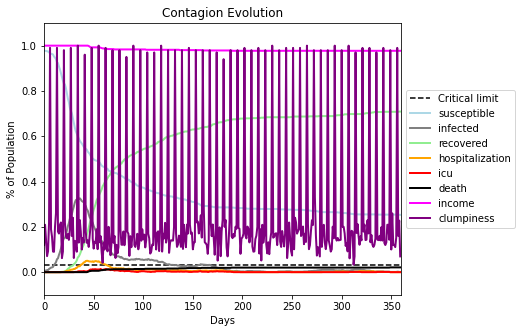

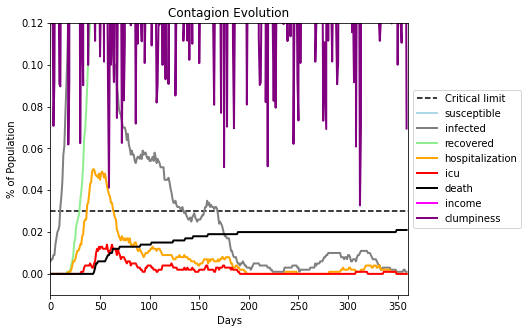

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9768436772674389 but chosen is -0.11416740546921064 for temperature 1
Max is 0.9919349673138271 but chosen is -0.042564560452753177 for temperature 1
Max is 0.9836531161610136 but chosen is -0.15124534199961495 for temperature 1
Max is 0.9931967859567314 but chosen is -0.3824488556894614 for temperature 1
Max is 0.9947050097617687 but chosen is -0.11764210471904236 for temperature 1
Max is 0.9955986894270095 but chosen is -0.24754735206156514 for temperature 1
Max is 0.9956657192076346 but chosen is 0.5438858947849781 for temperature 1
Max is 0.9959361514530988 but chosen is 0.45161389084015496 for temperature 1
Max is 0.9955749308331026 but chosen is -0.44792336819382833 for temperature 1
Max is 0.9900647743431173 but chosen is 0.18769416873541125 for temperature 1
Max is 0.9917945830824929 but chosen is 0.6439771848464273 for temperature 1
Max is 0.9966484951633364 but chosen is -0.6680477636877342 for temperature 1
Max

Max is 0.995141743897474 but chosen is 0.26672619103502787 for temperature 1
Max is 0.994002248794808 but chosen is -0.23211830821272197 for temperature 1
Max is 0.9972930541826849 but chosen is -0.4116164133938029 for temperature 1
Max is 0.9944480700031826 but chosen is 0.4911691542630655 for temperature 1
Max is 0.9946979657494094 but chosen is 0.22300747789018785 for temperature 1
Max is 0.9896790331993183 but chosen is -0.15003098021745914 for temperature 1
Max is 0.9963535082678375 but chosen is -0.2376704563252695 for temperature 1
Max is 0.9954066031237797 but chosen is 0.03527008145663886 for temperature 1
Max is 0.9936037128115563 but chosen is 0.12891859937671335 for temperature 1
Max is 0.9939686735580476 but chosen is 0.9719838198198768 for temperature 1
Max is 0.9954533951046225 but chosen is -0.31285674819877085 for temperature 1
Max is 0.9933335322345321 but chosen is 0.21853562281063899 for temperature 1
Max is 0.9966097019325325 but chosen is 0.976309461517056 for tem

Max is 0.9970958912650181 but chosen is -0.17740183072608265 for temperature 1
Max is 0.9923998327685709 but chosen is -0.08280808324473583 for temperature 1
Max is 0.9962481851317921 but chosen is -0.25031902726505467 for temperature 1
Max is 0.995378362698559 but chosen is -0.01355504164750221 for temperature 1
Max is 0.9871275256130951 but chosen is -0.5490332227890872 for temperature 1
Max is 0.9954613182709456 but chosen is 0.522975295105153 for temperature 1
Max is 0.9954496202432679 but chosen is -0.6823091414204207 for temperature 1
Max is 0.9928359531112679 but chosen is 0.9896592888959054 for temperature 1
Max is 0.9947227761190711 but chosen is -0.10260015294651197 for temperature 1
Max is 0.9938759853079564 but chosen is 0.9684231704532281 for temperature 1
Max is 0.9925360416365528 but chosen is 0.4404605120672804 for temperature 1
Max is 0.9961329384574998 but chosen is -0.22436863791849923 for temperature 1
Max is 0.9945832132486518 but chosen is 0.165488193920639 for te

Max is 0.9937628294251531 but chosen is 0.1759221844333682 for temperature 1
Max is 0.9897079480772578 but chosen is 0.21147882745318988 for temperature 1
Max is 0.9920218987318659 but chosen is -0.20114113572974304 for temperature 1
Max is 0.9845471749381384 but chosen is -0.3403324416242409 for temperature 1
Max is 0.9929103218145927 but chosen is 0.671150830376622 for temperature 1
Max is 0.9926739245412866 but chosen is -0.42950710027372263 for temperature 1
Max is 0.9959310984687739 but chosen is -0.2626744165211619 for temperature 1
Max is 0.9892764195619583 but chosen is -0.6523273652387837 for temperature 1
Max is 0.9946849073687883 but chosen is -0.1151869668503834 for temperature 1
Max is 0.9928300738972874 but chosen is -0.3522315580571432 for temperature 1
Max is 0.9974547294093149 but chosen is 0.4002575089478204 for temperature 1
Max is 0.9928098803601891 but chosen is -0.09537142987018306 for temperature 1
Max is 0.992535518567068 but chosen is -0.26864737298176433 for t

Max is 0.9908323674894047 but chosen is -0.00910064396476735 for temperature 1
Max is 0.9898622948609774 but chosen is -0.5475419245222872 for temperature 1
Max is 0.9830804389278789 but chosen is 0.9634993011198603 for temperature 1
Max is 0.9933673234626667 but chosen is -0.06470471977693408 for temperature 1
Max is 0.9870137787527017 but chosen is -0.08811680584111814 for temperature 1
Max is 0.9968714684812539 but chosen is -0.11921571619521368 for temperature 1
Max is 0.9794608505946775 but chosen is -0.34732600178786666 for temperature 1
Max is 0.9967100541314338 but chosen is -0.3352664561084592 for temperature 1
Max is 0.9805526542566697 but chosen is -0.21711158845775463 for temperature 1
Max is 0.996076324846358 but chosen is 0.39314617373197563 for temperature 1
Max is 0.9903115888158138 but chosen is -0.3666719887488329 for temperature 1
Max is 0.9859153621825468 but chosen is -0.3266594917622718 for temperature 1
Max is 0.9728915090100781 but chosen is -0.31914303280414397

Max is 0.9869147810033218 but chosen is 0.2731225551399012 for temperature 1
Max is 0.9948282996721838 but chosen is -0.3977175323915918 for temperature 1
Max is 0.9964763740656795 but chosen is 0.7406656868471327 for temperature 1
Max is 0.9822738324676333 but chosen is -0.19938898411397743 for temperature 1
Max is 0.9928176234764234 but chosen is -0.16042686030828127 for temperature 1
Max is 0.9955237113229245 but chosen is 0.9890912767416625 for temperature 1
Max is 0.9804764453135387 but chosen is -0.19249625121401714 for temperature 1
Max is 0.996353219997147 but chosen is -0.1349951728301435 for temperature 1
Max is 0.9867982098262604 but chosen is 0.9571029573619417 for temperature 1
Max is 0.9941270307060367 but chosen is -0.13772856350167154 for temperature 1
Max is 0.9846687094724917 but chosen is 0.9689112816184317 for temperature 1
Max is 0.9910853726642378 but chosen is 0.6495356092229512 for temperature 1
Max is 0.9860976069016332 but chosen is -0.05795305320977428 for te

Max is 0.995994413059552 but chosen is 0.9907744422301457 for temperature 1
Max is 0.9951677250029598 but chosen is 0.9904462824000634 for temperature 1
Max is 0.9948926904716157 but chosen is 0.9864319987038737 for temperature 1
Max is 0.9900154621744249 but chosen is 0.976126580568941 for temperature 1
Max is 0.9952352311467518 but chosen is 0.9892761146350011 for temperature 1
Max is 0.9967545553282025 but chosen is 0.9807458379041872 for temperature 1
Max is 0.9924857026664561 but chosen is 0.9820226895258802 for temperature 1
Max is 0.9909666969438464 but chosen is 0.9894465818131579 for temperature 1
Max is 0.9944227602412664 but chosen is 0.976907174830771 for temperature 1
Max is 0.9921739985822076 but chosen is 0.9896539225503368 for temperature 1
Max is 0.9973540804526791 but chosen is 0.9877496971774411 for temperature 1
Max is 0.996223193130892 but chosen is 0.9887711035049114 for temperature 1
Max is 0.9939778090088135 but chosen is 0.9875957303618434 for temperature 1
tup

Max is 0.9950540096862348 but chosen is 0.980576289272905 for temperature 1
Max is 0.9926744753439469 but chosen is 0.9898436255936894 for temperature 1
tup_vec1 not in keepset of size 16
Max is 0.9948224554286047 but chosen is 0.9845486480974044 for temperature 1
Max is 0.9977569844939326 but chosen is 0.9898196180178341 for temperature 1
Max is 0.9943117010818615 but chosen is 0.9936629879485591 for temperature 1
Max is 0.9978422495233421 but chosen is 0.9863008877846156 for temperature 1
Max is 0.9905907506471221 but chosen is 0.9881374413130207 for temperature 1
Max is 0.9946894906933706 but chosen is 0.9810127130310295 for temperature 1
Max is 0.9963575841772891 but chosen is 0.9743286936848349 for temperature 1
Max is 0.9957511501793475 but chosen is 0.9804984743447573 for temperature 1
Max is 0.9922141775546133 but chosen is 0.9867630289711227 for temperature 1
Max is 0.9960207277078047 but chosen is 0.9863064311083486 for temperature 1
Max is 0.9940968440295592 but chosen is 0.

Max is 0.9952408952218466 but chosen is 0.9939467451767299 for temperature 1
Max is 0.9979380188789237 but chosen is 0.9875777093846618 for temperature 1
Max is 0.9946844250393884 but chosen is 0.9718127306254843 for temperature 1
Max is 0.9948224554286047 but chosen is 0.9832411393757303 for temperature 1
Max is 0.9935570437756418 but chosen is 0.9788608731761679 for temperature 1
Max is 0.9968778341179276 but chosen is 0.9750855999331504 for temperature 1
Max is 0.9952753213042648 but chosen is 0.9845845311642341 for temperature 1
Max is 0.9969462806191836 but chosen is 0.983327711889859 for temperature 1
Max is 0.9924857026664561 but chosen is 0.9675426933541122 for temperature 1
Max is 0.9939019984786357 but chosen is 0.9770641937541993 for temperature 1
Max is 0.9962321946788398 but chosen is 0.9930042855885169 for temperature 1
Max is 0.9967070641369412 but chosen is 0.9909542543266097 for temperature 1
Max is 0.9967545553282025 but chosen is 0.9835674101057965 for temperature 1


Max is 0.9964347577390412 but chosen is 0.9812567026969747 for temperature 1
Max is 0.995060309359512 but chosen is 0.9725331278797592 for temperature 1
Max is 0.9910128451202308 but chosen is 0.9773086149997423 for temperature 1
Max is 0.9952788529671377 but chosen is 0.9883122034349493 for temperature 1
Max is 0.9933814499182042 but chosen is 0.9860886094188807 for temperature 1
Max is 0.9967514261723833 but chosen is 0.9952408952218463 for temperature 1
Max is 0.9903184320448457 but chosen is 0.9857005988158295 for temperature 1
Max is 0.9957978447896765 but chosen is 0.9953764930561909 for temperature 1
Max is 0.9974547294093149 but chosen is 0.993984712011449 for temperature 1
Max is 0.9968778341179276 but chosen is 0.9882130185740026 for temperature 1
Max is 0.9953917289047348 but chosen is 0.984836420743262 for temperature 1
Max is 0.9958777190585661 but chosen is 0.9750855999331504 for temperature 1
Max is 0.9919233310348146 but chosen is 0.9878456032065398 for temperature 1
Ma

Max is 0.995720589722943 but chosen is 0.9847218064970249 for temperature 1
Max is 0.9937994166147958 but chosen is 0.9783601515435906 for temperature 1
Max is 0.9939724012951734 but chosen is 0.9890382300918078 for temperature 1
Max is 0.9967070641369412 but chosen is 0.9931401532131323 for temperature 1
Max is 0.9958777190585661 but chosen is 0.9900696157731139 for temperature 1
Max is 0.9942691755428086 but chosen is 0.9711104663070155 for temperature 1
Max is 0.9964347577390412 but chosen is 0.9914496805338225 for temperature 1
Max is 0.9980260052404373 but chosen is 0.9913472146448554 for temperature 1
Max is 0.9957511501793475 but chosen is 0.9780042717214779 for temperature 1
Max is 0.9903263434915943 but chosen is 0.9813827683837051 for temperature 1
Max is 0.9969462806191836 but chosen is 0.9957501795422663 for temperature 1
Max is 0.9927477468135479 but chosen is 0.9787300852789428 for temperature 1
Max is 0.9952408952218463 but chosen is 0.9917045292755908 for temperature 1


Max is 0.979999972354827 but chosen is 0.9512332908012157 for temperature 1
Max is 0.9937652416920554 but chosen is 0.9725920447088634 for temperature 1
Max is 0.9959438256067354 but chosen is 0.9699697089382117 for temperature 1
Max is 0.9869846628747525 but chosen is 0.9366621574019516 for temperature 1
Max is 0.9837166015633467 but chosen is 0.9656021284103552 for temperature 1
Max is 0.9942509695875449 but chosen is 0.9584566905010361 for temperature 1
Max is 0.9954066031237797 but chosen is 0.9538161952164339 for temperature 1
Max is 0.9892064406346196 but chosen is 0.968733333719136 for temperature 1
Max is 0.9940621998096878 but chosen is 0.9825304664792684 for temperature 1
tup_vec1 not in keepset of size 74
Max is 0.9942509695875449 but chosen is 0.9541094718587515 for temperature 1
Max is 0.9933973491226458 but chosen is 0.970544623044606 for temperature 1
Max is 0.9892509710515558 but chosen is 0.9675113242991895 for temperature 1
Max is 0.988185650135793 but chosen is 0.979

Max is 0.9899403940623808 but chosen is 0.9728080370906741 for temperature 1
Max is 0.9931084160931494 but chosen is 0.9771939601169767 for temperature 1
Max is 0.9905142425280477 but chosen is 0.9804583018718113 for temperature 1
Max is 0.990432688689997 but chosen is 0.9632555407972127 for temperature 1
Max is 0.9919142257504707 but chosen is 0.9796685227133467 for temperature 1
Max is 0.9912767786988023 but chosen is 0.9690388108245063 for temperature 1
Max is 0.9877056094611544 but chosen is 0.9372798194468277 for temperature 1
Max is 0.9855296425478943 but chosen is 0.9681202580587726 for temperature 1
Max is 0.9906415319596759 but chosen is 0.9603834759504943 for temperature 1
Max is 0.9897622324482244 but chosen is 0.9770102786527368 for temperature 1
Max is 0.9959331942549424 but chosen is 0.969296861349414 for temperature 1
Max is 0.9926832036278902 but chosen is 0.980688311870337 for temperature 1
Max is 0.9929272094680517 but chosen is 0.9880648701438733 for temperature 1
Ma

Max is 0.9842478399008655 but chosen is 0.9498485894715829 for temperature 1
Max is 0.9928056418810843 but chosen is 0.9842808773187378 for temperature 1
Max is 0.9892096944955269 but chosen is 0.969742540028187 for temperature 1
Max is 0.9870072254198003 but chosen is 0.9748446678765598 for temperature 1
Max is 0.9913591528737337 but chosen is 0.9564995144764257 for temperature 1
Max is 0.9870537857327925 but chosen is 0.9366516747047517 for temperature 1
Max is 0.9841124964609761 but chosen is 0.9419792264010937 for temperature 1
Max is 0.9855687616957306 but chosen is 0.9804832547964653 for temperature 1
Max is 0.9822708827494654 but chosen is 0.9460790326777302 for temperature 1
Max is 0.9836531161610136 but chosen is 0.9479177835029065 for temperature 1
Max is 0.9883697229375458 but chosen is 0.9468757817468443 for temperature 1
Max is 0.9803369437883828 but chosen is 0.9684152592020102 for temperature 1
Max is 0.9719061907172404 but chosen is 0.9483569942437938 for temperature 1


Max is 0.9718245802303577 but chosen is 0.9481448009333018 for temperature 1
Max is 0.9783208469290721 but chosen is 0.95561098573575 for temperature 1
Max is 0.9866478573673194 but chosen is 0.9264186892744759 for temperature 1
Max is 0.9708384779159239 but chosen is 0.9565692769584813 for temperature 1
Max is 0.9935154092454211 but chosen is 0.9558930002399489 for temperature 1
Max is 0.9816074582991844 but chosen is 0.9583549104428714 for temperature 1
Max is 0.9692749779572489 but chosen is 0.9540948501878953 for temperature 1
tup_vec1 not in keepset of size 15
Max is 0.9637937758094003 but chosen is 0.9285797381493115 for temperature 1
Max is 0.9863508720491961 but chosen is 0.9756479542979711 for temperature 1
Max is 0.9860662995852169 but chosen is 0.9402306579474635 for temperature 1
Max is 0.9774009763328495 but chosen is 0.9647055954581875 for temperature 1
Max is 0.988479466616804 but chosen is 0.9676617312990399 for temperature 1
Max is 0.9932961700113448 but chosen is 0.96

Max is 0.9937628294251531 but chosen is 0.9813783051328415 for temperature 1
Max is 0.9934740766733234 but chosen is 0.9705563781958262 for temperature 1
Max is 0.994002248794808 but chosen is 0.9768855829846546 for temperature 1
Max is 0.992399832768571 but chosen is 0.9735729758052398 for temperature 1
Max is 0.9945781482487874 but chosen is 0.9852352367771816 for temperature 1
Max is 0.996090797186381 but chosen is 0.9822691849072747 for temperature 1
Max is 0.9911902763353695 but chosen is 0.97666026874196 for temperature 1
Max is 0.9924883079481018 but chosen is 0.9715408399504778 for temperature 1
Max is 0.9966484951633364 but chosen is 0.9783306703700103 for temperature 1
Max is 0.9943401367713545 but chosen is 0.9699678302719565 for temperature 1
Max is 0.9910383222536782 but chosen is 0.9817496969724029 for temperature 1
Max is 0.997620876542213 but chosen is 0.9871114533124791 for temperature 1
Max is 0.9920858155329911 but chosen is 0.9886466433105724 for temperature 1
Max i

Max is 0.9915206951370965 but chosen is 0.9820215029250556 for temperature 1
Max is 0.9945062206180889 but chosen is 0.9818744826735977 for temperature 1
Max is 0.9972406974966297 but chosen is 0.9849855736490957 for temperature 1
Max is 0.9923998327685709 but chosen is 0.9875772176507386 for temperature 1
Max is 0.9966087743847845 but chosen is 0.9810046697542198 for temperature 1
Max is 0.9908390232984651 but chosen is 0.9763632296135052 for temperature 1
Max is 0.9937465021085714 but chosen is 0.9841365554952833 for temperature 1
Max is 0.9932947620614512 but chosen is 0.9855191374539355 for temperature 1
Max is 0.9948886103361596 but chosen is 0.9788968918341051 for temperature 1
Max is 0.9921026901424228 but chosen is 0.9718671671108381 for temperature 1
Max is 0.996124416801044 but chosen is 0.9820974631664454 for temperature 1
Max is 0.9946056392744977 but chosen is 0.985432754353629 for temperature 1
Max is 0.9961322763347551 but chosen is 0.9841919341314402 for temperature 1
M

Max is 0.9943394660711786 but chosen is 0.9854046320206844 for temperature 1
Max is 0.9963351748330123 but chosen is 0.9835998676324149 for temperature 1
Max is 0.9929894427610415 but chosen is 0.9907744422301457 for temperature 1
Max is 0.9936105256526855 but chosen is 0.9912657458378948 for temperature 1
Max is 0.9938269152238126 but chosen is 0.9760250220909259 for temperature 1
Max is 0.996442195802315 but chosen is 0.9730616765384064 for temperature 1
Max is 0.9926400650041051 but chosen is 0.9883823340893932 for temperature 1
Max is 0.9914362690416448 but chosen is 0.9824515631670269 for temperature 1
Max is 0.9956587053847399 but chosen is 0.9887993550917209 for temperature 1
Max is 0.9946029324175119 but chosen is 0.9881634421083465 for temperature 1
Max is 0.9964218383731753 but chosen is 0.9856758045170116 for temperature 1
Max is 0.9962321946788398 but chosen is 0.9945860170969058 for temperature 1
tup_vec1 not in keepset of size 25
Max is 0.9962042776226355 but chosen is 0.

Max is 0.9912657458378948 but chosen is 0.9857551708102269 for temperature 1
Max is 0.9876298725808696 but chosen is 0.9714378650530072 for temperature 1
Max is 0.9956587053847399 but chosen is 0.9953888399798629 for temperature 1
Max is 0.9952470727993514 but chosen is 0.992625335356078 for temperature 1
Max is 0.9911410735169024 but chosen is 0.9805723361751891 for temperature 1
Max is 0.9929141326188037 but chosen is 0.9904462824000634 for temperature 1
Max is 0.9905384711603834 but chosen is 0.9885116620864505 for temperature 1
Max is 0.996442195802315 but chosen is 0.9665230467891788 for temperature 1
Max is 0.987559311634365 but chosen is 0.9765997305677413 for temperature 1
Max is 0.9944227602412664 but chosen is 0.9825486755331627 for temperature 1
Max is 0.9857004886623258 but chosen is 0.9807811194995453 for temperature 1
Max is 0.9954140683198103 but chosen is 0.9915722838954485 for temperature 1
Max is 0.992392167651128 but chosen is 0.9851259831422914 for temperature 1
Max

Max is 0.9922107826647693 but chosen is 0.9826719228626306 for temperature 1
Max is 0.996591682538321 but chosen is 0.9908816766753846 for temperature 1
Max is 0.9973399712979368 but chosen is 0.989654697151694 for temperature 1
Max is 0.9978422495233421 but chosen is 0.993104462057232 for temperature 1
Max is 0.9974547294093149 but chosen is 0.9750855999331504 for temperature 1
Max is 0.9941732826034182 but chosen is 0.978660093043019 for temperature 1
Max is 0.9965887973037358 but chosen is 0.9883664417515522 for temperature 1
Max is 0.9955749308331026 but chosen is 0.9860586044182369 for temperature 1
Max is 0.9950540096862348 but chosen is 0.9715347277030036 for temperature 1
Max is 0.9903400886408102 but chosen is 0.97682765621049 for temperature 1
Max is 0.9937089490353841 but chosen is 0.9835495497302862 for temperature 1
Max is 0.9961503450515952 but chosen is 0.992202411032281 for temperature 1
Max is 0.9968589073373789 but chosen is 0.9890956146444684 for temperature 1
Max is

Max is 0.9967070641369412 but chosen is 0.9798394789678831 for temperature 1
Max is 0.995273324471566 but chosen is 0.989646344042815 for temperature 1
Max is 0.9970753629662436 but chosen is 0.9933773029752094 for temperature 1
Max is 0.9949147488784132 but chosen is 0.9830669595265839 for temperature 1
Max is 0.9973399712979367 but chosen is 0.9864428705363597 for temperature 1
Max is 0.9939724012951734 but chosen is 0.9778179573411101 for temperature 1
Max is 0.9953764930561909 but chosen is 0.9732612928879256 for temperature 1
Max is 0.9942095553770603 but chosen is 0.983944446018928 for temperature 1
Max is 0.9960997351108247 but chosen is 0.9950786605570382 for temperature 1
Max is 0.99722848115783 but chosen is 0.9896323878463669 for temperature 1
Max is 0.9962725655022886 but chosen is 0.9885525746478093 for temperature 1
Max is 0.9963535082678375 but chosen is 0.9901901327616072 for temperature 1
Max is 0.9945906448967065 but chosen is 0.9795372876859717 for temperature 1
Max 

Max is 0.9935570437756418 but chosen is 0.9781851498324377 for temperature 1
Max is 0.9920380181441649 but chosen is 0.9841379158950988 for temperature 1
Max is 0.9937137540924351 but chosen is 0.9881687765514388 for temperature 1
Max is 0.996591682538321 but chosen is 0.9929239247534122 for temperature 1
Max is 0.9951646827404926 but chosen is 0.9904906322146408 for temperature 1
Max is 0.996223193130892 but chosen is 0.9944827407849527 for temperature 1
Max is 0.9979380188789237 but chosen is 0.9905087897343288 for temperature 1
Max is 0.9941557359612865 but chosen is 0.9764649966611801 for temperature 1
Max is 0.9943117010818615 but chosen is 0.9770234174784351 for temperature 1
Max is 0.9949147488784132 but chosen is 0.9765997305677411 for temperature 1
Max is 0.9910128451202308 but chosen is 0.9842745940015525 for temperature 1
Max is 0.9953917289047348 but chosen is 0.9825315930781042 for temperature 1
Max is 0.9914484613531517 but chosen is 0.9842028081993168 for temperature 1
M

Max is 0.979999972354827 but chosen is 0.9387498299954571 for temperature 1
Max is 0.9877056094611544 but chosen is 0.9782551253354089 for temperature 1
Max is 0.9954066031237797 but chosen is 0.9891304079217335 for temperature 1
Max is 0.9947267692655767 but chosen is 0.9603090629244421 for temperature 1
Max is 0.9890427513556376 but chosen is 0.9581701958794909 for temperature 1
Max is 0.9932957632492619 but chosen is 0.9581376692632662 for temperature 1
Max is 0.9879783610040197 but chosen is 0.9425414851780246 for temperature 1
Max is 0.9855296425478943 but chosen is 0.9594523769824024 for temperature 1
Max is 0.9911469222322687 but chosen is 0.9788884025615118 for temperature 1
Max is 0.9893569357509071 but chosen is 0.9752110691484652 for temperature 1
Max is 0.9917608357273162 but chosen is 0.9776659587011879 for temperature 1
Max is 0.9869846628747525 but chosen is 0.9838631348364238 for temperature 1
Max is 0.9944870996574953 but chosen is 0.966128645867397 for temperature 1
M

Max is 0.9921349957856787 but chosen is 0.976263049419364 for temperature 1
Max is 0.9947267692655767 but chosen is 0.9680009560534315 for temperature 1
Max is 0.9911278162160555 but chosen is 0.9629948305761515 for temperature 1
Max is 0.9861188331034321 but chosen is 0.9552126685927304 for temperature 1
Max is 0.9864728669710786 but chosen is 0.9688030941690989 for temperature 1
Max is 0.9951163639023746 but chosen is 0.9775739609545965 for temperature 1
Max is 0.9905142425280477 but chosen is 0.9684699125492655 for temperature 1
Max is 0.9944870996574955 but chosen is 0.9818406817052999 for temperature 1
Max is 0.9940621998096878 but chosen is 0.9816576922219669 for temperature 1
Max is 0.9897734552681454 but chosen is 0.9747948871795309 for temperature 1
Max is 0.9959438256067354 but chosen is 0.9827152263231946 for temperature 1
Max is 0.9928282935814394 but chosen is 0.97131871796393 for temperature 1
Max is 0.9893569357509071 but chosen is 0.9849326315187142 for temperature 1
Ma

Max is 0.9829057806783368 but chosen is 0.9270297154973822 for temperature 1
Max is 0.985914044233992 but chosen is 0.9478850740554671 for temperature 1
Max is 0.9916621963340759 but chosen is 0.9884553962159918 for temperature 1
Max is 0.9892132454556074 but chosen is 0.9846832321381955 for temperature 1
Max is 0.9913591528737337 but chosen is 0.9457518035310505 for temperature 1
Max is 0.9786526964701091 but chosen is 0.9751840997829384 for temperature 1
Max is 0.9835063081515982 but chosen is 0.9734513074796934 for temperature 1
Max is 0.9876324221845618 but chosen is 0.9572109588439535 for temperature 1
Max is 0.9898829810413432 but chosen is 0.9421599842608184 for temperature 1
Max is 0.9792350305457128 but chosen is 0.9714264118461101 for temperature 1
Max is 0.9852040626981585 but chosen is 0.9552114669294395 for temperature 1
Max is 0.9868308866445227 but chosen is 0.9118051451515717 for temperature 1
Max is 0.9725420522124205 but chosen is 0.9414098196896888 for temperature 1


Max is 0.9909460246588465 but chosen is 0.9740153419165717 for temperature 1
Max is 0.9887627105421894 but chosen is 0.9684078550034858 for temperature 1
tup_vec1 not in keepset of size 14
Max is 0.9884553962159918 but chosen is 0.9390805791303661 for temperature 1
Max is 0.9636765144974859 but chosen is 0.9376689701551851 for temperature 1
Max is 0.9855502856546574 but chosen is 0.9545281138741953 for temperature 1
Max is 0.9815505264640089 but chosen is 0.9612496330463335 for temperature 1
Max is 0.9751275753882124 but chosen is 0.9379464660168151 for temperature 1
Max is 0.9854849480801471 but chosen is 0.9585079209302836 for temperature 1
Max is 0.9892820261698999 but chosen is 0.9694183707446117 for temperature 1
Max is 0.9801567136653255 but chosen is 0.9656844137511619 for temperature 1
Max is 0.9541925751112644 but chosen is 0.9489396698845894 for temperature 1
Max is 0.9895680365452054 but chosen is 0.956881910310923 for temperature 1
Max is 0.9841124964609761 but chosen is 0.

Max is 0.991037459560194 but chosen is 0.9664926459201809 for temperature 1
Max is 0.9981522245709632 but chosen is 0.9898218469176207 for temperature 1
Max is 0.9938353104590925 but chosen is 0.9697244243783839 for temperature 1
Max is 0.9937921449566065 but chosen is 0.9755767293010922 for temperature 1
Max is 0.9925949876233086 but chosen is 0.986490380683937 for temperature 1
Max is 0.9976415513237673 but chosen is 0.9783151976834326 for temperature 1
Max is 0.9932049464288037 but chosen is 0.9845232860133281 for temperature 1
Max is 0.9966484951633364 but chosen is 0.9898383316899877 for temperature 1
Max is 0.997620876542213 but chosen is 0.9885126133414991 for temperature 1
Max is 0.9968446637194017 but chosen is 0.990942697063343 for temperature 1
Max is 0.996090797186381 but chosen is 0.9822879550784417 for temperature 1
Max is 0.9912438756075234 but chosen is 0.9767607083946848 for temperature 1
Max is 0.9959002874496987 but chosen is 0.9846007453886632 for temperature 1
Max 

Max is 0.9882911211351884 but chosen is 0.9811339402371991 for temperature 1
Max is 0.996124416801044 but chosen is 0.9724144579437495 for temperature 1
Max is 0.9972406974966297 but chosen is 0.9866945206457802 for temperature 1
Max is 0.9966484951633364 but chosen is 0.9883457444584187 for temperature 1
Max is 0.9955574188911881 but chosen is 0.9817450405055544 for temperature 1
Max is 0.9947351443501258 but chosen is 0.9861788062084423 for temperature 1
Max is 0.9956542770504794 but chosen is 0.9890795836815742 for temperature 1
Max is 0.9917925795233453 but chosen is 0.9690557132687567 for temperature 1
Max is 0.994244390529569 but chosen is 0.9704273784362737 for temperature 1
Max is 0.9947137963312456 but chosen is 0.9625855386366537 for temperature 1
Max is 0.9961494666819489 but chosen is 0.9702760765231022 for temperature 1
Max is 0.9939276136605154 but chosen is 0.9741379467575716 for temperature 1
Max is 0.9945319001617692 but chosen is 0.9784133178116462 for temperature 1
M

Max is 0.9946134494141833 but chosen is 0.9888662729437437 for temperature 1
Max is 0.991295845174641 but chosen is 0.9745761928197514 for temperature 1
Max is 0.9962985868605885 but chosen is 0.9894857429004374 for temperature 1
Max is 0.990048726152433 but chosen is 0.9847150756278674 for temperature 1
Max is 0.9965658844881623 but chosen is 0.9905099185760938 for temperature 1
Max is 0.9959940623907642 but chosen is 0.9807111049149746 for temperature 1
Max is 0.9883158903501416 but chosen is 0.966416481532049 for temperature 1
Max is 0.9909110198435046 but chosen is 0.9829635495572995 for temperature 1
Max is 0.9950611914199823 but chosen is 0.979727393509818 for temperature 1
Max is 0.9840003249200915 but chosen is 0.9577625185791092 for temperature 1
Max is 0.9893377262559662 but chosen is 0.9845594584786101 for temperature 1
Max is 0.9890545270250769 but chosen is 0.967127857732104 for temperature 1
Max is 0.9845342844111011 but chosen is 0.9616434448543487 for temperature 1
Max 

Max is 0.992902786170613 but chosen is 0.9875297820080506 for temperature 1
Max is 0.9950422184669682 but chosen is 0.9908421874326085 for temperature 1
Max is 0.9928428784889521 but chosen is 0.9801429918833856 for temperature 1
Max is 0.9978819337736007 but chosen is 0.9861436972433236 for temperature 1
Max is 0.9962985868605885 but chosen is 0.9819443934281024 for temperature 1
Max is 0.995378362698559 but chosen is 0.9797853347165466 for temperature 1
Max is 0.9937142874057086 but chosen is 0.9861753578008877 for temperature 1
Max is 0.9942633365508863 but chosen is 0.9863954765778831 for temperature 1
Max is 0.9968714684812539 but chosen is 0.9859063329399306 for temperature 1
Max is 0.9910849516244259 but chosen is 0.9695931273222044 for temperature 1
Max is 0.9904191786535299 but chosen is 0.9833655464253107 for temperature 1
Max is 0.9938854852423264 but chosen is 0.967298407160794 for temperature 1
Max is 0.9955581655889617 but chosen is 0.9893338875726483 for temperature 1
Ma

Max is 0.9934328268786647 but chosen is 0.9630799328003875 for temperature 1
Max is 0.9802259996857221 but chosen is 0.9486879572224514 for temperature 1
Max is 0.9937142874057086 but chosen is 0.9725470878474772 for temperature 1
Max is 0.9940310326964997 but chosen is 0.9764823046291669 for temperature 1
Max is 0.9928098803601891 but chosen is 0.9805841445000824 for temperature 1
Max is 0.9955581655889617 but chosen is 0.9760576086650853 for temperature 1
Max is 0.9905371681690089 but chosen is 0.9804947005937683 for temperature 1
Max is 0.9925077871889648 but chosen is 0.9833555152713516 for temperature 1
Max is 0.9946134494141833 but chosen is 0.9837899493102834 for temperature 1
Max is 0.9954077797299062 but chosen is 0.9807202104225304 for temperature 1
Max is 0.992902786170613 but chosen is 0.9827305232999158 for temperature 1
Max is 0.9917706597645264 but chosen is 0.9768129966716428 for temperature 1
Max is 0.997172598250379 but chosen is 0.9860806435059637 for temperature 1
M

Max is 0.9928532087976379 but chosen is 0.9704471275478066 for temperature 1
Max is 0.9911747625372004 but chosen is 0.9502348346030115 for temperature 1
Max is 0.9905327630390922 but chosen is 0.9612033881997178 for temperature 1
Max is 0.9941896915858442 but chosen is 0.9774250425603968 for temperature 1
Max is 0.9917439069206856 but chosen is 0.9834848962076963 for temperature 1
Max is 0.9947886551267925 but chosen is 0.9607297454010649 for temperature 1
Max is 0.9937040078862007 but chosen is 0.9850617169484377 for temperature 1
Max is 0.9967835442635911 but chosen is 0.9864276661683794 for temperature 1
Max is 0.9936224827167571 but chosen is 0.9870097156559416 for temperature 1
Max is 0.9937198736963532 but chosen is 0.9843422308554769 for temperature 1
Max is 0.9880639830288203 but chosen is 0.9672812429239767 for temperature 1
Max is 0.9940645350493335 but chosen is 0.9765443443787982 for temperature 1
tup_vec1 not in keepset of size 33
Max is 0.9947886551267925 but chosen is 0

Max is 0.9873814566430732 but chosen is 0.9612709078886893 for temperature 1
Max is 0.9954008288921341 but chosen is 0.9803659556975957 for temperature 1
Max is 0.992628295113039 but chosen is 0.9836254720458686 for temperature 1
Max is 0.9942492640376953 but chosen is 0.9719815449826069 for temperature 1
Max is 0.993402775181595 but chosen is 0.9840327459898403 for temperature 1
Max is 0.9932437920605732 but chosen is 0.9693942397138829 for temperature 1
Max is 0.9958379323001916 but chosen is 0.9859920641096065 for temperature 1
Max is 0.9950419351003906 but chosen is 0.9807706868093227 for temperature 1
Max is 0.9917864240001467 but chosen is 0.984456010183212 for temperature 1
Max is 0.9942940429207963 but chosen is 0.9624958022053343 for temperature 1
Max is 0.9923867819338857 but chosen is 0.9445652541663349 for temperature 1
Max is 0.9904831266531304 but chosen is 0.9633446876122401 for temperature 1
Max is 0.9962558664239145 but chosen is 0.986936789186413 for temperature 1
Max

Max is 0.9924680099996626 but chosen is 0.979742567038312 for temperature 1
Max is 0.9889155741657212 but chosen is 0.9371130327800432 for temperature 1
Max is 0.9923867819338857 but chosen is 0.9685900780215618 for temperature 1
Max is 0.9939383491208547 but chosen is 0.9743890027255716 for temperature 1
Max is 0.993155617787133 but chosen is 0.9793314659265773 for temperature 1
Max is 0.9935202636521773 but chosen is 0.965419327194874 for temperature 1
Max is 0.9944504546197103 but chosen is 0.988520831680903 for temperature 1
Max is 0.9938589125560198 but chosen is 0.9774991425160299 for temperature 1
Max is 0.9930951772814596 but chosen is 0.9731610334990678 for temperature 1
Max is 0.9924422799065578 but chosen is 0.9692520337397527 for temperature 1
Max is 0.9931568547081058 but chosen is 0.9456085011766717 for temperature 1
Max is 0.9888651302776994 but chosen is 0.9489567398800113 for temperature 1
Max is 0.9935071201600074 but chosen is 0.984349603174868 for temperature 1
Max 

Max is 0.9957226953043748 but chosen is 0.97079652433485 for temperature 1
Max is 0.9950531715813226 but chosen is 0.98253105618956 for temperature 1
Max is 0.9924422799065578 but chosen is 0.9785453273963892 for temperature 1
Max is 0.995629529611128 but chosen is 0.9830881735661271 for temperature 1
Max is 0.9912829731016911 but chosen is 0.9639304936086123 for temperature 1
Max is 0.9925360416365528 but chosen is 0.9706648001225444 for temperature 1
Max is 0.9920394395866763 but chosen is 0.9911366615174623 for temperature 1
Max is 0.995101777569561 but chosen is 0.9686684586935512 for temperature 1
Max is 0.9935071201600073 but chosen is 0.9733544372761688 for temperature 1
Max is 0.9894059788589449 but chosen is 0.9669559061005298 for temperature 1
Max is 0.9948498962292762 but chosen is 0.969436329910283 for temperature 1
Max is 0.9923483780850909 but chosen is 0.9674696125208889 for temperature 1
Max is 0.9930379303544808 but chosen is 0.9732200776228862 for temperature 1
Max is

Max is 0.9917987152581204 but chosen is 0.9797882341778753 for temperature 1
Max is 0.9906247729259824 but chosen is 0.9902554483623337 for temperature 1
Max is 0.989734035946241 but chosen is 0.9800441721404753 for temperature 1
Max is 0.9859244644918934 but chosen is 0.9812932213438412 for temperature 1
Max is 0.9911903360680699 but chosen is 0.97561139613202 for temperature 1
Max is 0.9899899361650768 but chosen is 0.9644525835315212 for temperature 1
Max is 0.9869109340249381 but chosen is 0.9533415562268801 for temperature 1
Max is 0.9860543917862983 but chosen is 0.9601896200317486 for temperature 1
Max is 0.9934324834515578 but chosen is 0.9756977300387841 for temperature 1
Max is 0.9887171408243823 but chosen is 0.9664499847687658 for temperature 1
Max is 0.9812276304052472 but chosen is 0.9507360204329449 for temperature 1
tup_vec1 not in keepset of size 8
Max is 0.9938657832146636 but chosen is 0.983308675816513 for temperature 1
Max is 0.9871831002976011 but chosen is 0.9810

Max is 0.994371247612934 but chosen is 0.9862891445115997 for temperature 1
Max is 0.9971499527403026 but chosen is 0.9738006443208457 for temperature 1
Max is 0.9940070052062258 but chosen is 0.9719388646201961 for temperature 1
Max is 0.9887502107742483 but chosen is 0.9768991032248585 for temperature 1
Max is 0.9922969427248863 but chosen is 0.9904621419571624 for temperature 1
Max is 0.9939360354205492 but chosen is 0.9820151867334372 for temperature 1
Max is 0.99719976245383 but chosen is 0.9557600931758624 for temperature 1
Max is 0.9918576649278872 but chosen is 0.9887171408243823 for temperature 1
Max is 0.9934617848514948 but chosen is 0.9668780525563854 for temperature 1
Max is 0.9940651054852623 but chosen is 0.9842389218609644 for temperature 1
Max is 0.9978550690118929 but chosen is 0.9836265390729171 for temperature 1
Max is 0.9938558479118831 but chosen is 0.9780833808355313 for temperature 1
Max is 0.9930775540013256 but chosen is 0.9621668168206565 for temperature 1
Ma

Max is 0.9923675769851794 but chosen is 0.979497322138224 for temperature 1
Max is 0.9917956379848358 but chosen is 0.973646943892765 for temperature 1
Max is 0.9927080261568534 but chosen is 0.9553525635434567 for temperature 1
Max is 0.9865316403817047 but chosen is 0.9585576022446759 for temperature 1
Max is 0.9826947856827719 but chosen is 0.9547747284350826 for temperature 1
Max is 0.9887922648485571 but chosen is 0.9678171813222662 for temperature 1
Max is 0.9893289223014213 but chosen is 0.983523530097452 for temperature 1
tup_vec1 not in keepset of size 47
Max is 0.9876505159458758 but chosen is 0.9520407401915464 for temperature 1
Max is 0.9908970074928712 but chosen is 0.9715762914931461 for temperature 1
Max is 0.9919542435130416 but chosen is 0.9750552751937221 for temperature 1
Max is 0.985082078853293 but chosen is 0.9696164160302281 for temperature 1
Max is 0.9933859256747668 but chosen is 0.9708142862769262 for temperature 1
Max is 0.9917953066820638 but chosen is 0.966

Max is 0.9926710372909744 but chosen is 0.9721874383585694 for temperature 1
Max is 0.9932478196204134 but chosen is 0.9508409079357255 for temperature 1
Max is 0.9845645142509999 but chosen is 0.9548328198069995 for temperature 1
Max is 0.9894308566251638 but chosen is 0.9723066882944753 for temperature 1
Max is 0.9891241435641787 but chosen is 0.9844892700027377 for temperature 1
Max is 0.9941792646101637 but chosen is 0.9842774043405449 for temperature 1
Max is 0.9927080261568534 but chosen is 0.975599920485394 for temperature 1
Max is 0.9890429240845336 but chosen is 0.9842793980201534 for temperature 1
Max is 0.9898848373972823 but chosen is 0.9787073307279579 for temperature 1
Max is 0.9825873936229188 but chosen is 0.943878021844204 for temperature 1
Max is 0.9846327990340197 but chosen is 0.9512816171786687 for temperature 1
Max is 0.9802566391309879 but chosen is 0.9639345882778065 for temperature 1
Max is 0.9947576853611234 but chosen is 0.9685494867281209 for temperature 1
M

Max is 0.9930501786115459 but chosen is 0.9750900939295397 for temperature 1
Max is 0.9905327630390922 but chosen is 0.9661375092185122 for temperature 1
Max is 0.9946256718891509 but chosen is 0.9911668366050418 for temperature 1
Max is 0.9941896915858442 but chosen is 0.9702914942183305 for temperature 1
Max is 0.9905371681690089 but chosen is 0.9760576086650853 for temperature 1
Max is 0.9955581655889617 but chosen is 0.9916200397609372 for temperature 1
Max is 0.9957258258902107 but chosen is 0.9825876071176971 for temperature 1
Max is 0.9920711033601505 but chosen is 0.9873031275750432 for temperature 1
Max is 0.9968714684812539 but chosen is 0.9951272506481531 for temperature 1
Max is 0.992902786170613 but chosen is 0.9609468142261144 for temperature 1
Max is 0.9888509118312923 but chosen is 0.963898178993798 for temperature 1
Max is 0.991899823246336 but chosen is 0.9631289616501504 for temperature 1
Max is 0.9904308245398754 but chosen is 0.9766787821503389 for temperature 1
Ma

Max is 0.9941896915858442 but chosen is 0.9819731460977338 for temperature 1
Max is 0.9904308245398754 but chosen is 0.9468603900875746 for temperature 1
Max is 0.9885286061053358 but chosen is 0.967575179502619 for temperature 1
Max is 0.9944658905310746 but chosen is 0.959125312559649 for temperature 1
Max is 0.9937040078862007 but chosen is 0.9696837218839626 for temperature 1
Max is 0.9955860437128863 but chosen is 0.960964880458041 for temperature 1
Max is 0.9880639830288203 but chosen is 0.982367804677386 for temperature 1
Max is 0.9965658844881623 but chosen is 0.9732807142297838 for temperature 1
Max is 0.991899823246336 but chosen is 0.9826667466962307 for temperature 1
Max is 0.992902786170613 but chosen is 0.963850460147377 for temperature 1
Max is 0.9928359531112679 but chosen is 0.9572458978061114 for temperature 1
Max is 0.9899026323082732 but chosen is 0.9692374665527115 for temperature 1
Max is 0.9963454161338089 but chosen is 0.9889322035557366 for temperature 1
Max is

Max is 0.9928521673885186 but chosen is 0.9672304320884043 for temperature 1
Max is 0.9955581655889617 but chosen is 0.9928428784889525 for temperature 1
Max is 0.9924887940484394 but chosen is 0.9729673722736124 for temperature 1
Max is 0.9894473803127111 but chosen is 0.9784326309676462 for temperature 1
Max is 0.9962985868605885 but chosen is 0.9830645903935691 for temperature 1
Max is 0.9928814144246325 but chosen is 0.9825609454456949 for temperature 1
Max is 0.9934280722761841 but chosen is 0.9576121227567423 for temperature 1
tup_vec1 not in keepset of size 43
Max is 0.9890545270250769 but chosen is 0.9849928231784969 for temperature 1
Max is 0.9959940623907642 but chosen is 0.9791146709890358 for temperature 1
Max is 0.9802259996857221 but chosen is 0.9740610861705976 for temperature 1
Max is 0.9919213564083014 but chosen is 0.9727314545702913 for temperature 1
Max is 0.9978819337736007 but chosen is 0.9947227761190711 for temperature 1
Max is 0.9929047594734959 but chosen is 0

Max is 0.995378362698559 but chosen is 0.9697695545722045 for temperature 1
Max is 0.9899498133800134 but chosen is 0.9732067198965586 for temperature 1
Max is 0.9897783584937552 but chosen is 0.9674173735734125 for temperature 1
Max is 0.9928428784889525 but chosen is 0.9838649737657971 for temperature 1
Max is 0.9947886551267925 but chosen is 0.9774685565035077 for temperature 1
Max is 0.9949372063849684 but chosen is 0.970445590300566 for temperature 1
Max is 0.9954008288921341 but chosen is 0.9870742543552913 for temperature 1
Max is 0.9902666075827183 but chosen is 0.963295111780862 for temperature 1
Max is 0.9928521673885184 but chosen is 0.935452887246154 for temperature 1
Max is 0.9944658905310745 but chosen is 0.9843481532356969 for temperature 1
Max is 0.989361604808786 but chosen is 0.9815467987097785 for temperature 1
Max is 0.9941549873794365 but chosen is 0.9770250082665234 for temperature 1
Max is 0.9923336235926652 but chosen is 0.975417336117945 for temperature 1
Max i

Max is 0.9929460094602884 but chosen is 0.9808977940557039 for temperature 1
Max is 0.9946226604034517 but chosen is 0.9660328906994424 for temperature 1
Max is 0.9910849516244259 but chosen is 0.9643178268362396 for temperature 1
Max is 0.9932831421287621 but chosen is 0.9765932602893272 for temperature 1
Max is 0.9911747625372006 but chosen is 0.9796782286318549 for temperature 1
Max is 0.9968714684812539 but chosen is 0.9660557256827321 for temperature 1
Max is 0.9944658905310745 but chosen is 0.9725923595800482 for temperature 1
Max is 0.9925077871889648 but chosen is 0.9859649962321889 for temperature 1
Max is 0.9963454161338089 but chosen is 0.987969026522032 for temperature 1
Max is 0.9900997754800009 but chosen is 0.9766762998790981 for temperature 1
Max is 0.9878110282792423 but chosen is 0.978970792068139 for temperature 1
Max is 0.9925360416365528 but chosen is 0.9696946200487663 for temperature 1
Max is 0.9939383491208547 but chosen is 0.9695655193353423 for temperature 1
M

Max is 0.9913950377702777 but chosen is 0.9657465748426887 for temperature 1
Max is 0.9936086799628016 but chosen is 0.9719983435926993 for temperature 1
Max is 0.9942492640376953 but chosen is 0.9767148798249173 for temperature 1
Max is 0.9888932519717778 but chosen is 0.9644304245767279 for temperature 1
Max is 0.9950531715813226 but chosen is 0.9839907851415135 for temperature 1
Max is 0.9936771676830265 but chosen is 0.9846694041619722 for temperature 1
Max is 0.9916470486158994 but chosen is 0.9830042816581037 for temperature 1
Max is 0.9930379303544808 but chosen is 0.9624549930337558 for temperature 1
Max is 0.9822764187880281 but chosen is 0.9608720955374472 for temperature 1
Max is 0.9966567867444266 but chosen is 0.9925806015198635 for temperature 1
Max is 0.992628295113039 but chosen is 0.9862246878517142 for temperature 1
Max is 0.9946754770265218 but chosen is 0.9784342574330899 for temperature 1
Max is 0.9947005536245368 but chosen is 0.9765992133304716 for temperature 1


Max is 0.9931568547081058 but chosen is 0.9840160305207514 for temperature 1
tup_vec1 not in keepset of size 60
Max is 0.9950531715813226 but chosen is 0.969026148358871 for temperature 1
Max is 0.9923483780850909 but chosen is 0.977368722906309 for temperature 1
Max is 0.9954594673100413 but chosen is 0.9819089578883391 for temperature 1
Max is 0.9942282578424545 but chosen is 0.9786849984816521 for temperature 1
Max is 0.9886991450464656 but chosen is 0.9785515012853625 for temperature 1
Max is 0.993402775181595 but chosen is 0.9844924348806913 for temperature 1
Max is 0.9920103361888194 but chosen is 0.9886168791495421 for temperature 1
Max is 0.992628295113039 but chosen is 0.9642035533438226 for temperature 1
Max is 0.9884123982936663 but chosen is 0.9855104298594444 for temperature 1
Max is 0.9900475101588104 but chosen is 0.9729074897704192 for temperature 1
Max is 0.9958379323001916 but chosen is 0.9921585277859147 for temperature 1
Max is 0.9968837747586826 but chosen is 0.987

Max is 0.9951624308396444 but chosen is 0.9809109278855894 for temperature 1
Max is 0.994214787137889 but chosen is 0.9862063917374767 for temperature 1
Max is 0.9918183676807527 but chosen is 0.9514215134466638 for temperature 1
Max is 0.977080320719796 but chosen is 0.9479640191069357 for temperature 1
Max is 0.9972873331245421 but chosen is 0.972819349790148 for temperature 1
Max is 0.9928082633148195 but chosen is 0.980124426528129 for temperature 1
Max is 0.9958876157381485 but chosen is 0.9835275709147318 for temperature 1
Max is 0.9925481832575866 but chosen is 0.9792683797136299 for temperature 1
Max is 0.9927219456341314 but chosen is 0.9839543136166216 for temperature 1
Max is 0.995979522961758 but chosen is 0.9738942223344624 for temperature 1
Max is 0.9947266019784292 but chosen is 0.9825174107088828 for temperature 1
Max is 0.9953702487184606 but chosen is 0.9853757122014192 for temperature 1
Max is 0.9934617848514948 but chosen is 0.9884966576850457 for temperature 1
Max 

Max is 0.9885444851519143 but chosen is 0.9655471471662946 for temperature 1
Max is 0.9833036928858812 but chosen is 0.9508851338454928 for temperature 1
Max is 0.9924157760133683 but chosen is 0.9782679666188704 for temperature 1
Max is 0.9902577299087293 but chosen is 0.9891241847794674 for temperature 1
Max is 0.9862528823078427 but chosen is 0.9706363567552398 for temperature 1
Max is 0.9893790719618164 but chosen is 0.971280504953558 for temperature 1
Max is 0.9938558479118831 but chosen is 0.9908925231072345 for temperature 1
Max is 0.9961002293247792 but chosen is 0.981378822424602 for temperature 1
Max is 0.9832191140459577 but chosen is 0.9634673380247667 for temperature 1
Max is 0.9906494812892745 but chosen is 0.986192034573437 for temperature 1
Max is 0.9922969427248863 but chosen is 0.9614107328161513 for temperature 1
Max is 0.9831880199654348 but chosen is 0.9772901685732334 for temperature 1
Max is 0.9961002293247788 but chosen is 0.9899822188723337 for temperature 1
Ma

Max is 0.9896790331993183 but chosen is 0.9726376090412648 for temperature 1
Max is 0.9853496377629113 but chosen is 0.9848956687334247 for temperature 1
Max is 0.9834799226761607 but chosen is 0.9809868548798357 for temperature 1
Max is 0.9933613932144768 but chosen is 0.9771417371017023 for temperature 1
Max is 0.9941792646101637 but chosen is 0.9852524080621747 for temperature 1
Max is 0.9975044834711905 but chosen is 0.9759835770864496 for temperature 1
Max is 0.9917953066820638 but chosen is 0.9763492544447568 for temperature 1
Max is 0.9909368991279751 but chosen is 0.9788133306191648 for temperature 1
Max is 0.9917647966813735 but chosen is 0.979872542812583 for temperature 1
Max is 0.9896622227417835 but chosen is 0.9823606816233832 for temperature 1
Max is 0.9942983097655475 but chosen is 0.9706761657896329 for temperature 1
Max is 0.9914655549209841 but chosen is 0.95560930345511 for temperature 1
Max is 0.9974303871971741 but chosen is 0.98215065974892 for temperature 1
Max 

Max is 0.9866742407268526 but chosen is 0.9746157131569142 for temperature 1
Max is 0.990318586167211 but chosen is 0.9708999991776499 for temperature 1
Max is 0.9923009517652852 but chosen is 0.9543548579615077 for temperature 1
Max is 0.9867982098262604 but chosen is 0.9654439231529122 for temperature 1
Max is 0.997430387197174 but chosen is 0.9793049439992425 for temperature 1
Max is 0.9879316857464129 but chosen is 0.9781820771732865 for temperature 1
Max is 0.9959347623680623 but chosen is 0.9699804724272598 for temperature 1
Max is 0.9850702171073854 but chosen is 0.9525573598888774 for temperature 1
Max is 0.9875581024671259 but chosen is 0.9675544815913519 for temperature 1
Max is 0.9904112708220675 but chosen is 0.9718840675141825 for temperature 1
Max is 0.9896545568510303 but chosen is 0.9771729197411625 for temperature 1
Max is 0.9909368991279751 but chosen is 0.9852686716231944 for temperature 1
Max is 0.9914841599531427 but chosen is 0.9818915651766273 for temperature 1
M

Max is 0.9965214916468939 but chosen is 0.9887641913607744 for temperature 1
Max is 0.9972832675223934 but chosen is 0.9887784661391793 for temperature 1
Max is 0.9874983944156317 but chosen is 0.9805695919493074 for temperature 1
Max is 0.9928785516523054 but chosen is 0.9744738585468469 for temperature 1
Max is 0.9919293290956485 but chosen is 0.9882545215626117 for temperature 1
Max is 0.9923758272945827 but chosen is 0.9802800383219844 for temperature 1
Max is 0.9925179117988049 but chosen is 0.9671053923594806 for temperature 1
Max is 0.9945932490763691 but chosen is 0.9898664589651291 for temperature 1
Max is 0.9964222171123321 but chosen is 0.9908650542546958 for temperature 1
Max is 0.993945779937079 but chosen is 0.9841869449426683 for temperature 1
Max is 0.9888660276451523 but chosen is 0.980072606748749 for temperature 1
Max is 0.9942473287967645 but chosen is 0.9839844131843537 for temperature 1
Max is 0.9931191703394983 but chosen is 0.987354150164171 for temperature 1
Ma

Max is 0.9951066929374915 but chosen is 0.9728506319378325 for temperature 1
Max is 0.993945779937079 but chosen is 0.9711778588030722 for temperature 1
Max is 0.9954522735147887 but chosen is 0.9883220995543227 for temperature 1
Max is 0.9972832675223934 but chosen is 0.9800151628667364 for temperature 1
Max is 0.9925179117988049 but chosen is 0.9636257731832112 for temperature 1
Max is 0.9923971657750735 but chosen is 0.9521646458810938 for temperature 1
Max is 0.9809929779201515 but chosen is 0.9809359978079327 for temperature 1
Max is 0.9922907328563401 but chosen is 0.9838981324249616 for temperature 1
Max is 0.9948671936883031 but chosen is 0.9721747010081819 for temperature 1
Max is 0.9906659117458837 but chosen is 0.9820649508796511 for temperature 1
Max is 0.9975833708370314 but chosen is 0.9877812820805756 for temperature 1
Max is 0.9951356734448125 but chosen is 0.9776404127099662 for temperature 1
Max is 0.9918805335135112 but chosen is 0.9749908911112628 for temperature 1


Max is 0.9970958912650181 but chosen is 0.9906915426187114 for temperature 1
Max is 0.9959621930054615 but chosen is 0.9888377883076297 for temperature 1
Max is 0.9928267782403198 but chosen is 0.9757254929194012 for temperature 1
Max is 0.9936746631776521 but chosen is 0.9841353011030575 for temperature 1
Max is 0.9953716335981927 but chosen is 0.9860272502452903 for temperature 1
Max is 0.9944382857839332 but chosen is 0.9806834883357004 for temperature 1
Max is 0.9943180702008926 but chosen is 0.9861716413270822 for temperature 1
Max is 0.9954496202432678 but chosen is 0.9711711671865065 for temperature 1
Max is 0.9922569706388811 but chosen is 0.986911152103595 for temperature 1
Max is 0.99567279690409 but chosen is 0.9829646065075469 for temperature 1
Max is 0.9914269907797918 but chosen is 0.9893455026544755 for temperature 1
Max is 0.9914210828020275 but chosen is 0.977765695546102 for temperature 1
Max is 0.9949495502798685 but chosen is 0.9851907049678336 for temperature 1
Max

Max is 0.9933573538163819 but chosen is 0.9834259233766697 for temperature 1
Max is 0.9949138167883438 but chosen is 0.9834426596549609 for temperature 1
Max is 0.9961724280297398 but chosen is 0.9818806025591743 for temperature 1
Max is 0.9959621930054614 but chosen is 0.9951066929374914 for temperature 1
Max is 0.9938237378450262 but chosen is 0.9783650516245275 for temperature 1
Max is 0.9934313873082088 but chosen is 0.9766562023558516 for temperature 1
Max is 0.992241650103517 but chosen is 0.991131962772719 for temperature 1
Max is 0.9912541178926938 but chosen is 0.9715806826566388 for temperature 1
Max is 0.9923305346561545 but chosen is 0.9821466835630654 for temperature 1
Max is 0.9939485133859908 but chosen is 0.9875924491925486 for temperature 1
Max is 0.9939659497031259 but chosen is 0.9892393932549236 for temperature 1
tup_vec1 not in keepset of size 35
Max is 0.9807988115283778 but chosen is 0.9599235090569191 for temperature 1
Max is 0.9942473287967645 but chosen is 0.9

Max is 0.994512019076664 but chosen is 0.992361821170114 for temperature 1
Max is 0.9902607689385132 but chosen is 0.9900121812076536 for temperature 1
Max is 0.9937239188042493 but chosen is 0.9614559550638909 for temperature 1
Max is 0.9809929779201515 but chosen is 0.9523523580248492 for temperature 1
Max is 0.9953801462925401 but chosen is 0.9786900566881575 for temperature 1
Max is 0.9931076473243238 but chosen is 0.9571699162235557 for temperature 1
Max is 0.9944937846931224 but chosen is 0.9705199242763023 for temperature 1
Max is 0.9965262831941389 but chosen is 0.9912956296834196 for temperature 1
Max is 0.9947050097617687 but chosen is 0.9877404112993429 for temperature 1
Max is 0.993566707219404 but chosen is 0.9633270233616621 for temperature 1
Max is 0.9913911390920311 but chosen is 0.9692883231237112 for temperature 1
Max is 0.9939686735580476 but chosen is 0.9801265691064125 for temperature 1
Max is 0.9899604443892065 but chosen is 0.984595506817778 for temperature 1
Max

Max is 0.9910940100571545 but chosen is 0.9719687360651242 for temperature 1
Max is 0.9923208544529235 but chosen is 0.9579000049728491 for temperature 1
Max is 0.9928557650379821 but chosen is 0.9728559405245221 for temperature 1
Max is 0.9966097019325325 but chosen is 0.9814611598121746 for temperature 1
Max is 0.9931858791414364 but chosen is 0.9766658410091605 for temperature 1
Max is 0.9942088346431927 but chosen is 0.9755477310994664 for temperature 1
Max is 0.9941618518734949 but chosen is 0.9621860821590401 for temperature 1
Max is 0.9906966805436326 but chosen is 0.9742994727337305 for temperature 1
Max is 0.9959697850414793 but chosen is 0.9920772835524423 for temperature 1
Max is 0.9900125071350716 but chosen is 0.9769722195223155 for temperature 1
Max is 0.9963811336626899 but chosen is 0.9888660730466563 for temperature 1
Max is 0.9931392822211234 but chosen is 0.9799494694618878 for temperature 1
Max is 0.9930282261917299 but chosen is 0.96151271480649 for temperature 1
M

Max is 0.9919326762942872 but chosen is 0.979774164597277 for temperature 1
Max is 0.9922295664338268 but chosen is 0.9814588587614016 for temperature 1
Max is 0.9924882106067038 but chosen is 0.9801786197701328 for temperature 1
Max is 0.9890989695279183 but chosen is 0.9698921988648035 for temperature 1
Max is 0.9928557650379821 but chosen is 0.9824991812714777 for temperature 1
Max is 0.9909166808551785 but chosen is 0.9717065678316285 for temperature 1
Max is 0.9941618518734952 but chosen is 0.9928390579719436 for temperature 1
Max is 0.9943824847582465 but chosen is 0.9845926610910071 for temperature 1
Max is 0.9940463538254228 but chosen is 0.9724316331514331 for temperature 1
Max is 0.9953126447728649 but chosen is 0.9826058908855226 for temperature 1
Max is 0.9929449112190436 but chosen is 0.9827745416621698 for temperature 1
Max is 0.9895690025398671 but chosen is 0.9657855430803983 for temperature 1
Max is 0.9906445541238342 but chosen is 0.9538318090097908 for temperature 1


Max is 0.9900613531052628 but chosen is 0.9805966050921813 for temperature 1
Max is 0.9950572073481878 but chosen is 0.9777458605775258 for temperature 1
Max is 0.9974400183546689 but chosen is 0.9722052297246582 for temperature 1
Max is 0.981754664844405 but chosen is 0.9785036055194569 for temperature 1
Max is 0.9924995402292689 but chosen is 0.9825048338563666 for temperature 1
Max is 0.9937705830562396 but chosen is 0.9742148385423713 for temperature 1
Max is 0.9775721421953983 but chosen is 0.9622497720213175 for temperature 1
Max is 0.9912521368432667 but chosen is 0.9597740339469285 for temperature 1
Max is 0.9953807673902616 but chosen is 0.9909112747385125 for temperature 1
Max is 0.9921912416659163 but chosen is 0.9824112434539706 for temperature 1
Max is 0.9965591273823879 but chosen is 0.9888513969203073 for temperature 1
Max is 0.9950678475704363 but chosen is 0.9815138661421532 for temperature 1
Max is 0.9942745208138553 but chosen is 0.9819224180161423 for temperature 1


Max is 0.997440018354669 but chosen is 0.990163602660547 for temperature 1
Max is 0.99262122615974 but chosen is 0.9810508931208828 for temperature 1
Max is 0.9932361428906024 but chosen is 0.956081475267104 for temperature 1
Max is 0.9849865834669198 but chosen is 0.9689273914470534 for temperature 1
Max is 0.9961352088402206 but chosen is 0.9758436335130644 for temperature 1
Max is 0.9914353566301084 but chosen is 0.9638325028739835 for temperature 1
Max is 0.9870080818213294 but chosen is 0.9638080360384552 for temperature 1
Max is 0.9912508318730692 but chosen is 0.9651966145246749 for temperature 1
Max is 0.9946496926260617 but chosen is 0.975461190696009 for temperature 1
Max is 0.9930918904706876 but chosen is 0.9776867178125402 for temperature 1
Max is 0.9963735463202018 but chosen is 0.9797913325602053 for temperature 1
Max is 0.9923811512398819 but chosen is 0.9712550017583415 for temperature 1
Max is 0.9939651249050754 but chosen is 0.9853388188029392 for temperature 1
Max i

Max is 0.9954252019215128 but chosen is 0.987590506296796 for temperature 1
Max is 0.9940176953361125 but chosen is 0.9785296084867098 for temperature 1
Max is 0.991176012108922 but chosen is 0.9753562014985554 for temperature 1
Max is 0.9929003416602205 but chosen is 0.972832299982261 for temperature 1
Max is 0.9879606462009436 but chosen is 0.9773075134382354 for temperature 1
Max is 0.9953283290815004 but chosen is 0.9851038358597878 for temperature 1
Max is 0.9962481851317921 but chosen is 0.984578390492721 for temperature 1
Max is 0.9937883242239494 but chosen is 0.9699123147960024 for temperature 1
Max is 0.9908905962988214 but chosen is 0.9713191016932082 for temperature 1
tup_vec1 not in keepset of size 47
Max is 0.9950317271075493 but chosen is 0.9825126636261443 for temperature 1
Max is 0.9949673142818448 but chosen is 0.9927904279572203 for temperature 1
Max is 0.9956662950352895 but chosen is 0.993400796695759 for temperature 1
Max is 0.9972930541826849 but chosen is 0.9651

Max is 0.9962672441110872 but chosen is 0.9758626367599974 for temperature 1
Max is 0.9938779342599566 but chosen is 0.9680820141545943 for temperature 1
Max is 0.99417864128316 but chosen is 0.9828218971422255 for temperature 1
Max is 0.9912348558405158 but chosen is 0.9776294364362611 for temperature 1
Max is 0.9917366020815949 but chosen is 0.9733059312416519 for temperature 1
Max is 0.9936792437016725 but chosen is 0.9689656545140194 for temperature 1
Max is 0.9910509052332981 but chosen is 0.9793558686892938 for temperature 1
Max is 0.9943281378342214 but chosen is 0.9815308559996665 for temperature 1
Max is 0.9873818996412322 but chosen is 0.9693382876941768 for temperature 1
Max is 0.9957283261702009 but chosen is 0.9763803211843903 for temperature 1
Max is 0.9921723639704572 but chosen is 0.9731985565623051 for temperature 1
Max is 0.9907017394873118 but chosen is 0.9863160188281603 for temperature 1
Max is 0.9933341908421509 but chosen is 0.9921563287706978 for temperature 1
M

Max is 0.9932441053714043 but chosen is 0.9778120112861062 for temperature 1
Max is 0.9944870996574953 but chosen is 0.9887799764237344 for temperature 1
Max is 0.9899403940623808 but chosen is -0.36474689546056377 for temperature 1
Max is 0.9974547294093149 but chosen is 0.982806782330194 for temperature 1
Max is 0.9955986894270095 but chosen is 0.9835585039434979 for temperature 1
Max is 0.9961459091341196 but chosen is 0.9926020363641384 for temperature 1
Max is 0.9973399712979368 but chosen is -0.3650133251514024 for temperature 1
Max is 0.9942509695875449 but chosen is -0.4154665436396653 for temperature 1
Max is 0.9964218383731753 but chosen is 0.9845915259050135 for temperature 1
Max is 0.9964347577390412 but chosen is 0.9890762795861606 for temperature 1
Max is 0.9970753629662436 but chosen is 0.9882785440550843 for temperature 1
Max is 0.9939883602515307 but chosen is 0.9924734412191007 for temperature 1
Max is 0.9963535082678375 but chosen is 0.9893830199721548 for temperatur

Max is 0.9892310040198469 but chosen is -0.28624180488807593 for temperature 1
Max is 0.9930379303544808 but chosen is 0.9751842428302512 for temperature 1
Max is 0.9913950377702782 but chosen is -0.027396702162940306 for temperature 1
Max is 0.9948873918172488 but chosen is 0.99422732645087 for temperature 1
Max is 0.9964740988555589 but chosen is 0.1955977208926035 for temperature 1
Max is 0.9942633365508863 but chosen is 0.2520244462357487 for temperature 1
Max is 0.996026101603972 but chosen is 0.9847428852405039 for temperature 1
Max is 0.9940937967154387 but chosen is -0.11448574783098524 for temperature 1
Max is 0.991277362719849 but chosen is 0.9681884931468188 for temperature 1
Max is 0.9950419351003906 but chosen is 0.0009238088189111645 for temperature 1
Max is 0.9928318162497316 but chosen is 0.9767024153168057 for temperature 1
Max is 0.9975833708370314 but chosen is 0.9894587302581739 for temperature 1
Max is 0.9973456172466202 but chosen is 0.3446572649385792 for tempera

Max is 0.9943180702008926 but chosen is 0.9858134313003779 for temperature 1
Max is 0.9949641779126642 but chosen is 0.366576635062823 for temperature 1
Max is 0.9970683085419457 but chosen is 0.33020959559485497 for temperature 1
Max is 0.9915906377889843 but chosen is -0.6936383422682438 for temperature 1
Max is 0.997321934539439 but chosen is -0.08557060530525859 for temperature 1
Max is 0.9936569289917468 but chosen is -0.22681259524049427 for temperature 1
Max is 0.9914058834578376 but chosen is 0.9795800687785972 for temperature 1
Max is 0.9959361514530988 but chosen is -0.21313167817734455 for temperature 1
Max is 0.9940463538254228 but chosen is -0.1576695779539675 for temperature 1
Max is 0.9943867328712337 but chosen is -0.2769576919573176 for temperature 1
Max is 0.9973511896891206 but chosen is -0.17607165758210347 for temperature 1
Max is 0.9936792437016725 but chosen is 0.9855050193165262 for temperature 1
Max is 0.9922141471813944 but chosen is 0.12945122221547561 for te

Max is 0.9765734795003238 but chosen is 0.09442846154589303 for temperature 1
Max is 0.9906461895345887 but chosen is -0.034738359955149865 for temperature 1
Max is 0.9908302733932766 but chosen is 0.9443296003334718 for temperature 1
Max is 0.9888216679623478 but chosen is 0.6514853579995246 for temperature 1
Max is 0.9953128604938983 but chosen is -0.14197679957807166 for temperature 1
Max is 0.9908540734532606 but chosen is -0.7214568058702187 for temperature 1
Max is 0.9961724280297398 but chosen is -0.32453778255593857 for temperature 1
Max is 0.9964715019557848 but chosen is -0.41925245981914017 for temperature 1
Max is 0.9928781602928141 but chosen is 0.39095010119783447 for temperature 1
Max is 0.9955574188911881 but chosen is -0.2563215079759476 for temperature 1
Max is 0.9935971207528325 but chosen is 0.9731289797853298 for temperature 1
Max is 0.9930282261917299 but chosen is -0.1571806282212878 for temperature 1
Max is 0.9918111293207347 but chosen is 0.44342070164532704 fo

Max is 0.9970683085419457 but chosen is 0.6690698189731514 for temperature 1
Max is 0.9909615779323185 but chosen is 0.28793184055830445 for temperature 1
Max is 0.9951739006789263 but chosen is -0.13163346270666607 for temperature 1
Max is 0.992032513771224 but chosen is 0.04639670628825958 for temperature 1
Max is 0.9862215444997808 but chosen is -0.4422188257030333 for temperature 1
Max is 0.9776356783970808 but chosen is -0.5635548725437427 for temperature 1
Max is 0.9945062206180889 but chosen is 0.34233030533092385 for temperature 1
Max is 0.9837166015633467 but chosen is 0.23447727240577404 for temperature 1
Max is 0.9942633365508863 but chosen is 0.5310234617481471 for temperature 1
Max is 0.9939854764859511 but chosen is 0.036146625724845345 for temperature 1
Max is 0.9948224554286047 but chosen is 0.43056378593862366 for temperature 1
Max is 0.9922813306541336 but chosen is 0.9898615128093525 for temperature 1
Max is 0.9950419351003906 but chosen is -0.2787135626885645 for te

Max is 0.5870302735163319 but chosen is -0.02921658106362493 for temperature 1
Max is 0.9967835442635911 but chosen is 0.990402949437989 for temperature 1
Max is 0.27460180672396756 but chosen is 0.19258098207853816 for temperature 1
Max is -0.060470175864407526 but chosen is -0.2862014728829567 for temperature 1
Max is 0.9935510044382646 but chosen is 0.9868886482587268 for temperature 1
Max is 0.9957258258902107 but chosen is -0.31354421587418485 for temperature 1
Max is 0.9934115610500396 but chosen is 0.9829387741730777 for temperature 1
Max is 0.2889445361475729 but chosen is -0.06133328419358195 for temperature 1
Max is 0.6400668300454375 but chosen is 0.537382870347115 for temperature 1
Max is 0.21895886731354852 but chosen is -0.01893934358016984 for temperature 1
Max is 0.519281230007963 but chosen is -0.0994835670380107 for temperature 1
Max is 0.2421360281281156 but chosen is -0.6209340404254265 for temperature 1
Max is -0.010399187169285087 but chosen is -0.1200505285501644

Max is 0.6672666757130061 but chosen is -0.15783312810954134 for temperature 1
Max is 0.9927951645319061 but chosen is -0.2296209514761306 for temperature 1
Max is 0.5330282713099804 but chosen is -0.006800502469365557 for temperature 1
Max is 0.21803247588076152 but chosen is 0.0938840832082976 for temperature 1
Max is 0.7541729140905832 but chosen is -0.2424787191022779 for temperature 1
Max is 0.9948651377755977 but chosen is 0.4053129771142551 for temperature 1
Max is 0.1941408461804324 but chosen is 0.04505313122499126 for temperature 1
Max is 0.769027884685567 but chosen is 0.692481600837011 for temperature 1
Max is 0.9966484951633364 but chosen is -0.7374449452772947 for temperature 1
Max is 0.9914061848938062 but chosen is 0.24180427563873744 for temperature 1
Max is 0.6091677601127129 but chosen is 0.20743992602082856 for temperature 1
Max is 0.9944707357044118 but chosen is 0.5103046593768331 for temperature 1
Max is 0.9747625987639451 but chosen is -0.9112525789256062 for te

Max is 0.9898060953605267 but chosen is 0.37664115651016616 for temperature 1
Max is 0.9896790331993183 but chosen is 0.0025204191695573715 for temperature 1
Max is 0.9942282578424545 but chosen is 0.08925814612972699 for temperature 1
Max is 0.9844948162937468 but chosen is 0.3080840413452002 for temperature 1
Max is 0.9868575716766822 but chosen is 0.02636391925098388 for temperature 1
Max is 0.9851303338386325 but chosen is 0.18339942458225944 for temperature 1
Max is 0.9939341293277156 but chosen is 0.09600791263069636 for temperature 1
Max is 0.9853478182163178 but chosen is 0.4103183440914235 for temperature 1
Max is 0.9845999731106987 but chosen is -0.8296918215303967 for temperature 1
Max is 0.9921281542957404 but chosen is 0.03847297732637918 for temperature 1
Max is 0.9888216679623476 but chosen is -0.24910022738798254 for temperature 1
Max is 0.9937921449566065 but chosen is -0.22509601984378114 for temperature 1
Max is 0.9894081233232267 but chosen is 0.39407650481328704 fo

Max is 0.9861118895741653 but chosen is 0.4414000125406758 for temperature 1
Max is 0.9899976947273953 but chosen is 0.25216602477280936 for temperature 1
Max is 0.9830804389278789 but chosen is 0.06059596174363784 for temperature 1
Max is 0.9874790571293236 but chosen is 0.24431163950163967 for temperature 1
Max is 0.9901717260367068 but chosen is 0.0983749010031117 for temperature 1
Max is 0.9841614926059375 but chosen is -0.0603531180552167 for temperature 1
Max is 0.9769959406195002 but chosen is 0.9693791827132409 for temperature 1
Max is 0.995378362698559 but chosen is -0.2680243476774382 for temperature 1
Max is 0.9931437151102058 but chosen is 0.450059677835906 for temperature 1
Max is 0.9850493035493586 but chosen is 0.2861783502330923 for temperature 1
Max is 0.9951290422906001 but chosen is -0.6826478766887998 for temperature 1
Max is 0.9938854852423264 but chosen is 0.2612267341171773 for temperature 1
Max is 0.9926337832036667 but chosen is 0.07437629868263668 for temperat

Max is 0.9950968663872389 but chosen is -0.11788892905121273 for temperature 1
Max is 0.9942448410866621 but chosen is 0.00011305889403821691 for temperature 1
Max is 0.9949147488784135 but chosen is -0.32888135205148644 for temperature 1
Max is 0.9881766659703387 but chosen is 0.2849146676975155 for temperature 1
Max is 0.9970220663065849 but chosen is 0.5073280932677044 for temperature 1
Max is 0.9817605799974558 but chosen is 0.12097093334490872 for temperature 1
Max is 0.9875127307199271 but chosen is -0.5743062181708025 for temperature 1
Max is 0.9937883242239494 but chosen is 0.08639689318673302 for temperature 1
Max is 0.9956542770504793 but chosen is 0.5577443954008849 for temperature 1
Max is 0.982423866549754 but chosen is -0.3252588210143661 for temperature 1
Max is 0.9842220693968466 but chosen is -0.09027452211790493 for temperature 1
Max is 0.9874437207362607 but chosen is 0.2063058382216068 for temperature 1
Max is 0.9856248825278797 but chosen is 0.055419875026673095 fo

Max is 0.9965591273823879 but chosen is -0.6920245594894786 for temperature 1
Max is 0.9916825855631693 but chosen is -0.3991104777354758 for temperature 1
Max is 0.9959438256067354 but chosen is -0.298603807465092 for temperature 1
Max is 0.9890429240845339 but chosen is 0.2227820685851414 for temperature 1
Max is 0.9779899579067225 but chosen is 0.3388876211241738 for temperature 1
Max is 0.9913696751366338 but chosen is -0.09462961276722798 for temperature 1
Max is 0.9828114120624719 but chosen is 0.2837891224505873 for temperature 1
Max is 0.9931191703394983 but chosen is -0.37094671903982107 for temperature 1
Max is 0.9799593281503093 but chosen is -0.014804943083040823 for temperature 1
Max is 0.9928682328778252 but chosen is -0.018267110716338273 for temperature 1
Max is 0.9934786293151981 but chosen is -0.0034037716308936285 for temperature 1
Max is 0.9865516438826049 but chosen is 0.05587322682392229 for temperature 1
Max is 0.9953764276398519 but chosen is -0.0285359900209010

Max is 0.9680528198836911 but chosen is -0.46582510500268326 for temperature 1
Max is 0.9828123885042056 but chosen is -0.2747243898933778 for temperature 1
Max is 0.997754262154387 but chosen is 0.17234318657964798 for temperature 1
Max is 0.9910383222536782 but chosen is 0.3584587367816034 for temperature 1
Max is 0.9957192311374803 but chosen is 0.23557067999620926 for temperature 1
Max is 0.9881820029767235 but chosen is 0.27974123300960135 for temperature 1
Max is 0.9876841027013666 but chosen is 0.014435898895553105 for temperature 1
Max is 0.9936224827167571 but chosen is 0.2352655179738941 for temperature 1
Max is 0.9882100607312503 but chosen is -0.2950957186111605 for temperature 1
Max is 0.9931704877920764 but chosen is 0.17473722263077782 for temperature 1
Max is 0.9911601866752144 but chosen is 0.09380707760473139 for temperature 1
Max is 0.9865585370224143 but chosen is 0.02730131509328508 for temperature 1
Max is 0.9959613209113832 but chosen is -0.015765161631687882 for

Max is 0.9914058834578375 but chosen is -0.11941042384840253 for temperature 1
Max is 0.9821632580006983 but chosen is -0.06073452749959718 for temperature 1
Max is 0.9948740812240634 but chosen is -0.5591464651557876 for temperature 1
Max is 0.9933706428438266 but chosen is -0.10218187574487546 for temperature 1
Max is 0.9946029324175119 but chosen is -0.2196397322572014 for temperature 1
Max is 0.9878955794829074 but chosen is 0.5769816302990314 for temperature 1
Max is 0.9772080024995202 but chosen is -0.16034248474911905 for temperature 1
Max is 0.9841976452151727 but chosen is 0.2560857526793391 for temperature 1
Max is 0.9884853291360604 but chosen is -0.594556775212214 for temperature 1
Max is 0.9953126447728649 but chosen is -0.040424404253738944 for temperature 1
Max is 0.9877434402593178 but chosen is 0.09775107149458824 for temperature 1
Max is 0.9778190442593496 but chosen is 0.9739940061303137 for temperature 1
Max is 0.9872486983087225 but chosen is -0.5049702472532688 fo

Max is 0.9886462389356873 but chosen is 0.9847067446273067 for temperature 1
Max is 0.9886462389356873 but chosen is -0.35959427189022203 for temperature 1
Max is 0.9886462389356873 but chosen is 0.9834520440435262 for temperature 1
Max is 0.9886462389356873 but chosen is -0.11200287146133504 for temperature 1
Max is 0.9886462389356873 but chosen is 0.514000124447692 for temperature 1
Max is 0.3115733223063208 but chosen is -0.558052174643334 for temperature 1
Max is 0.589186896247709 but chosen is 0.27373357224131656 for temperature 1
Max is 0.589186896247709 but chosen is 0.5203267588163277 for temperature 1
Max is 0.589186896247709 but chosen is 0.3549406021562161 for temperature 1
Max is 0.589186896247709 but chosen is 0.24140526803836312 for temperature 1
Max is 0.589186896247709 but chosen is -0.24326779019617864 for temperature 1
Max is 0.27380201131054444 but chosen is -0.3096083796801426 for temperature 1
Max is 0.27380201131054444 but chosen is -0.7265278568253046 for tempera

Max is 0.9832772391746674 but chosen is 0.05541450084169221 for temperature 1
Max is 0.9832772391746674 but chosen is -0.14705973780526727 for temperature 1
Max is 0.9832772391746674 but chosen is 0.9801429918833856 for temperature 1
Max is 0.9832772391746674 but chosen is 0.25353296304593514 for temperature 1
Max is 0.9832772391746674 but chosen is 0.9684830027415682 for temperature 1
Max is 0.9832772391746674 but chosen is 0.031843102168494376 for temperature 1
Max is 0.9832772391746674 but chosen is -0.23608551030730668 for temperature 1
Max is 0.3152850724735801 but chosen is -0.3790469217356149 for temperature 1
Max is 0.3152850724735801 but chosen is -0.014929846860749949 for temperature 1
Max is 0.3152850724735801 but chosen is -0.38025513144381035 for temperature 1
Max is 0.3095371397624473 but chosen is -0.2837044902101488 for temperature 1
Max is 0.3095371397624473 but chosen is -0.1294875720002473 for temperature 1
Max is 0.3095371397624473 but chosen is 0.289820810279378 fo

Max is 0.3473796457594013 but chosen is -0.6327078344352152 for temperature 1
Max is 0.3473796457594013 but chosen is -0.0289077634707462 for temperature 1
Max is 0.3473796457594013 but chosen is 0.25838853879723866 for temperature 1
Max is 0.3473796457594013 but chosen is -0.07850429652295765 for temperature 1
Max is 0.2752365628098716 but chosen is -0.06759511533588716 for temperature 1
Max is 0.9773315515722721 but chosen is -0.024891495082283062 for temperature 1
Max is 0.9752195365189814 but chosen is 0.9746859181137044 for temperature 1
Max is 0.9752195365189814 but chosen is 0.20349488618400105 for temperature 1
Max is 0.9752195365189814 but chosen is -0.3854690103317699 for temperature 1
Max is 0.9752195365189814 but chosen is 0.4439132605620738 for temperature 1
Max is 0.9752195365189814 but chosen is -0.4361451333265873 for temperature 1
Max is 0.9752195365189814 but chosen is 0.04502717252418558 for temperature 1
Max is 0.9752195365189814 but chosen is 0.10723361894650274 fo

Max is 0.5807261249448119 but chosen is 0.10218340549116002 for temperature 1
Max is 0.5807261249448119 but chosen is -0.5821648447335005 for temperature 1
Max is 0.5807261249448119 but chosen is 0.03439128816974683 for temperature 1
Max is 0.39871497419121465 but chosen is -0.3516594183777819 for temperature 1
Max is 0.39871497419121465 but chosen is 0.3838047232200293 for temperature 1
Max is 0.39871497419121465 but chosen is -0.31533590458876726 for temperature 1
Max is 0.39871497419121465 but chosen is -0.21349661178345813 for temperature 1
Max is 0.39871497419121465 but chosen is 0.18464976213134682 for temperature 1
Max is 0.39271005981571705 but chosen is -0.20802461774678355 for temperature 1
Max is 0.39271005981571705 but chosen is -0.09865891804411182 for temperature 1
Max is 0.39271005981571705 but chosen is -0.2999027387331999 for temperature 1
Max is 0.39271005981571705 but chosen is -0.06387082947311182 for temperature 1
Max is 0.5942858208267267 but chosen is 0.172253442

Max is 0.9928626505555709 but chosen is 0.48454376995525306 for temperature 1
Max is 0.1948121472639567 but chosen is 0.13871393062075926 for temperature 1
Max is 0.1948121472639567 but chosen is 0.08510111764082424 for temperature 1
Max is 0.1948121472639567 but chosen is -0.1852759343965907 for temperature 1
Max is 0.1948121472639567 but chosen is 0.14630112310142038 for temperature 1
Max is 0.9841124964609758 but chosen is -0.10315673381204155 for temperature 1
Max is 0.9841124964609758 but chosen is 0.4503150365495065 for temperature 1
Max is 0.9841124964609758 but chosen is 0.3759808176881174 for temperature 1
Max is 0.9841124964609758 but chosen is 0.9465946780289571 for temperature 1
Max is 0.9841124964609758 but chosen is -0.24610448405453608 for temperature 1
Max is 0.9841124964609758 but chosen is -0.07083052875052961 for temperature 1
Max is 0.9841124964609758 but chosen is -0.6864985360670098 for temperature 1
Max is 0.40780180142393113 but chosen is -0.6943974931834264 for

Max is -0.08573237885952029 but chosen is -0.17689947313493934 for temperature 1
Max is 0.9880269399008575 but chosen is 0.985082083686986 for temperature 1
Max is 0.9880269399008575 but chosen is -0.39176110104617684 for temperature 1
Max is 0.9880269399008575 but chosen is 0.23116096640067907 for temperature 1
Max is 0.9880269399008575 but chosen is -0.08499303649046588 for temperature 1
Max is 0.9880269399008575 but chosen is 0.08706130149569902 for temperature 1
Max is 0.9880269399008575 but chosen is 0.10658771435611834 for temperature 1
Max is 0.9880269399008575 but chosen is 0.11353082475976632 for temperature 1
Max is 0.9880269399008575 but chosen is 0.44699344861919926 for temperature 1
Max is 0.9888852631986064 but chosen is -0.4313487439184308 for temperature 1
Max is 0.9767215631844254 but chosen is -0.36183297825511634 for temperature 1
Max is 0.05269528096006683 but chosen is -0.07785857901017622 for temperature 1
Max is 0.05269528096006683 but chosen is -0.39053462437907

Max is 0.5023806854165994 but chosen is 0.15297770642432224 for temperature 1
Max is 0.5023806854165994 but chosen is 0.026183270552670862 for temperature 1
Max is 0.5023806854165994 but chosen is -0.1554723390005029 for temperature 1
Max is 0.5023806854165994 but chosen is 0.19857398518086317 for temperature 1
Max is 0.5023806854165994 but chosen is -0.697693715638058 for temperature 1
Max is 0.5023806854165994 but chosen is -0.6227894661786871 for temperature 1
Max is 0.5023806854165994 but chosen is -0.23022017113619753 for temperature 1
Max is 0.5023806854165994 but chosen is -0.1864863552616969 for temperature 1
Max is 0.5023806854165994 but chosen is 0.13430891633652534 for temperature 1
Max is 0.980830296529378 but chosen is 0.18604770269572157 for temperature 1
Max is 0.980830296529378 but chosen is -0.40984334223776026 for temperature 1
Max is 0.980830296529378 but chosen is -0.29929361860052944 for temperature 1
Max is 0.980830296529378 but chosen is 0.22271184000074407 for t

Max is 0.42925302872285376 but chosen is 0.4106917907101388 for temperature 1
Max is 0.42925302872285376 but chosen is 0.13657165456665665 for temperature 1
Max is 0.42925302872285376 but chosen is -0.2120204278515917 for temperature 1
Max is 0.42925302872285376 but chosen is -0.21624596185755654 for temperature 1
Max is 0.42925302872285376 but chosen is -0.06895189169775631 for temperature 1
Max is 0.42925302872285376 but chosen is -0.30192365435313645 for temperature 1
Max is 0.9666345924670379 but chosen is -0.08630612924507514 for temperature 1
Max is 0.9666345924670379 but chosen is -0.17275650976432003 for temperature 1
Max is 0.9666345924670379 but chosen is 0.2706895626556519 for temperature 1
Max is 0.9666345924670379 but chosen is 0.9562232362449744 for temperature 1
Max is 0.9666345924670379 but chosen is -0.2798234827523212 for temperature 1
Max is 0.9666345924670379 but chosen is -0.18234086522476603 for temperature 1
Max is 0.9666345924670379 but chosen is -0.132158186118

Max is 0.16841655071447023 but chosen is -0.3170931366549923 for temperature 1
Max is 0.16841655071447023 but chosen is -0.24417125996744207 for temperature 1
Max is 0.16841655071447023 but chosen is 0.020499727139790026 for temperature 1
Max is 0.16841655071447023 but chosen is -0.3483426355979231 for temperature 1
Max is 0.16841655071447023 but chosen is 0.13219778469458848 for temperature 1
Max is 0.08005232522753383 but chosen is -0.32976535830082115 for temperature 1
Max is 0.9780408991091216 but chosen is -0.5875047618790398 for temperature 1
Max is 0.9780408991091216 but chosen is 0.39952005079583436 for temperature 1
Max is 0.9780408991091216 but chosen is -0.2687680089764262 for temperature 1
Max is 0.9780408991091216 but chosen is -0.18211990035549497 for temperature 1
Max is 0.9780408991091216 but chosen is -0.2725724140628365 for temperature 1
Max is 0.9780408991091216 but chosen is 0.4595489357761711 for temperature 1
Max is 0.8980018410205692 but chosen is -0.214657681787

Max is 0.18900573028406675 but chosen is -0.37043941465407154 for temperature 1
Max is 0.18900573028406675 but chosen is 0.05664160914453567 for temperature 1
Max is 0.18900573028406675 but chosen is 0.15528595794964292 for temperature 1
Max is 0.18900573028406675 but chosen is -0.23600126289786819 for temperature 1
Max is 0.9896321022528507 but chosen is 0.9868116394733711 for temperature 1
Max is 0.9896321022528507 but chosen is 0.16470672795416236 for temperature 1
Max is 0.9896321022528507 but chosen is 0.9771305631812386 for temperature 1
Max is 0.9896321022528507 but chosen is -0.18760432695427715 for temperature 1
Max is 0.9896321022528507 but chosen is 0.08274262350693115 for temperature 1
Max is 0.5153530691684114 but chosen is 0.1566546965369742 for temperature 1
Max is 0.5153530691684114 but chosen is -0.22474955860060836 for temperature 1
Max is 0.5153530691684114 but chosen is 0.2170886691295437 for temperature 1
Max is 0.5153530691684114 but chosen is 0.19824079164739244 

Max is 0.15911010151870797 but chosen is -0.25298902409512763 for temperature 1
Max is 0.15911010151870797 but chosen is -0.3738703843874091 for temperature 1
Max is 0.15911010151870797 but chosen is -0.04026844880442086 for temperature 1
Max is 0.9621645582014702 but chosen is -0.6885493433853157 for temperature 1
Max is 0.9621645582014702 but chosen is 0.9392492740631974 for temperature 1
Max is 0.9621645582014702 but chosen is 0.35657798945486946 for temperature 1
Max is 0.9621645582014702 but chosen is 0.0653356406395295 for temperature 1
Max is 0.3337947059576449 but chosen is 0.06579323432950582 for temperature 1
Max is 0.3337947059576449 but chosen is -0.11474908969820388 for temperature 1
Max is 0.3337947059576449 but chosen is 0.04007865796573374 for temperature 1
Max is 0.3337947059576449 but chosen is 0.022146678633741507 for temperature 1
Max is 0.986171641327082 but chosen is -0.20978851800312312 for temperature 1
Max is 0.14424770669596876 but chosen is -0.363219818644882

Max is 0.9836580443992908 but chosen is 0.9823354931347594 for temperature 1
Max is 0.9836580443992908 but chosen is -0.11854058643162194 for temperature 1
Max is 0.9836580443992908 but chosen is -0.6644994793535208 for temperature 1
Max is 0.9836580443992908 but chosen is -0.672503260981152 for temperature 1
Max is 0.9836580443992908 but chosen is -0.34783222615058346 for temperature 1
Max is 0.9836580443992908 but chosen is -0.4097599291138745 for temperature 1
Max is 0.9836580443992908 but chosen is -0.4312465259182424 for temperature 1
Max is 0.9836580443992908 but chosen is -0.04123393216590284 for temperature 1
Max is 0.9836580443992908 but chosen is 0.12450606813456648 for temperature 1
Max is 0.41605319908782545 but chosen is 0.4089738062106612 for temperature 1
Max is 0.41605319908782545 but chosen is -0.3126468467104341 for temperature 1
Max is 0.41605319908782545 but chosen is 0.3758174270541171 for temperature 1
Max is 0.41605319908782545 but chosen is -0.2900744050556765 f

Max is 0.9850306158919244 but chosen is -0.4933429728985784 for temperature 1
Max is 0.9850306158919244 but chosen is -0.7072773560394914 for temperature 1
Max is 0.9850306158919244 but chosen is -0.6976115210351951 for temperature 1
Max is 0.9850306158919244 but chosen is -0.1025291596067052 for temperature 1
Max is 0.9850306158919244 but chosen is -0.13199976062394705 for temperature 1
Max is 0.9850306158919244 but chosen is -0.4599575677698252 for temperature 1
Max is 0.9761735279976493 but chosen is -0.33490031210938426 for temperature 1
Max is 0.9940246913850022 but chosen is 0.049543987950449946 for temperature 1
Max is 0.9940246913850022 but chosen is 0.19751769471587016 for temperature 1
Max is 0.9940246913850022 but chosen is 0.10600381029492158 for temperature 1
Max is 0.9940246913850022 but chosen is -0.3862686154563088 for temperature 1
Max is 0.9940246913850022 but chosen is -0.3603902501410048 for temperature 1
Max is 0.9940246913850022 but chosen is 0.22427297445510086 f

Max is 0.3792045293387864 but chosen is -0.08601519287714215 for temperature 1
Max is 0.3792045293387864 but chosen is -0.11574243531378269 for temperature 1
Max is 0.3792045293387864 but chosen is -0.14190835530774581 for temperature 1
Max is 0.35720666509645027 but chosen is -0.2585541953178827 for temperature 1
Max is 0.35720666509645027 but chosen is -0.37231974729653405 for temperature 1
Max is 0.5342899529740494 but chosen is 0.16240226904077773 for temperature 1
Max is 0.5342899529740494 but chosen is -0.07116916082341769 for temperature 1
Max is 0.5342899529740494 but chosen is -0.12731807520531496 for temperature 1
Max is 0.5342899529740494 but chosen is -0.5347464435914566 for temperature 1
Max is 0.5342899529740494 but chosen is 0.16900275291841013 for temperature 1
Max is 0.5342899529740494 but chosen is -0.29201053811342464 for temperature 1
Max is 0.5342899529740494 but chosen is 0.4073503849326947 for temperature 1
Max is 0.5342899529740494 but chosen is -0.2147750062914

Max is 0.9823594154698999 but chosen is 0.20845727025144267 for temperature 1
Max is 0.9823594154698999 but chosen is 0.0800584470206395 for temperature 1
Max is 0.9823594154698999 but chosen is -0.20105384210341756 for temperature 1
Max is 0.9823594154698999 but chosen is -0.1158950652974023 for temperature 1
Max is 0.9823594154698999 but chosen is 0.9756572107773868 for temperature 1
Max is 0.9823594154698999 but chosen is 0.9781525195126934 for temperature 1
Max is 0.9823594154698999 but chosen is -0.08447162473776194 for temperature 1
Max is 0.5573949951601125 but chosen is 0.05354723653525302 for temperature 1
Max is 0.5573949951601125 but chosen is -0.2608397407045136 for temperature 1
Max is 0.5573949951601125 but chosen is -0.2671777054916377 for temperature 1
Max is 0.5573949951601125 but chosen is -0.17286470754154465 for temperature 1
Max is 0.5573949951601125 but chosen is 0.22065221411494743 for temperature 1
Max is 0.5573949951601125 but chosen is 0.20963309530420332 for 

Max is 0.2236894660032833 but chosen is -0.632583953425833 for temperature 1
Max is 0.2236894660032833 but chosen is -0.06982332723857976 for temperature 1
Max is 0.2236894660032833 but chosen is -0.2743622437124051 for temperature 1
Max is 0.2236894660032833 but chosen is 0.19957471252218933 for temperature 1
Max is 0.2236894660032833 but chosen is -0.10935523156629783 for temperature 1
Max is 0.279271512166652 but chosen is -0.33489954219631013 for temperature 1
Max is 0.279271512166652 but chosen is 0.07902215053786 for temperature 1
Max is 0.279271512166652 but chosen is -0.2633106858829727 for temperature 1
Max is -0.0251504490288881 but chosen is -0.25956550862077193 for temperature 1
Max is -0.0251504490288881 but chosen is -0.17778647805928643 for temperature 1
Max is -0.0251504490288881 but chosen is -0.05846183540322974 for temperature 1
Max is -0.0251504490288881 but chosen is -0.28997886209556195 for temperature 1
Max is -0.0251504490288881 but chosen is -0.2061628130741822

Max is -0.16860768222129374 but chosen is -0.22108312072951256 for temperature 1
Max is -0.16860768222129374 but chosen is -0.7535303945392335 for temperature 1
Max is 0.9814329213186417 but chosen is -0.6362801022786837 for temperature 1
Max is 0.9814329213186417 but chosen is -0.4821865307596703 for temperature 1
Max is 0.9649489847780061 but chosen is -0.15316570621818007 for temperature 1
Max is 0.9649489847780061 but chosen is -0.010811098081734367 for temperature 1
Max is 0.9649489847780061 but chosen is -0.18125995168758507 for temperature 1
Max is -0.10984116277908766 but chosen is -0.2938600392214619 for temperature 1
Max is -0.10984116277908766 but chosen is -0.5969878678406689 for temperature 1
Max is -0.10984116277908766 but chosen is -0.4480323027644025 for temperature 1
Max is 0.9555364757865897 but chosen is 0.008653904099125153 for temperature 1
Max is 0.9555364757865897 but chosen is -0.21861411606716538 for temperature 1
Max is 0.9555364757865897 but chosen is -0.1872

Max is 0.9948926904716157 but chosen is 0.27515790514747707 for temperature 1
Max is 0.9948926904716157 but chosen is 0.475468344364276 for temperature 1
Max is 0.9948926904716157 but chosen is 0.16839962027151414 for temperature 1
Max is 0.9948926904716157 but chosen is -0.5310245699741246 for temperature 1
Max is 0.9948926904716157 but chosen is -0.3486697047803009 for temperature 1
Max is 0.9894419301805174 but chosen is 0.9809014042916039 for temperature 1
Max is 0.49717532846653206 but chosen is 0.08795012005584592 for temperature 1
Max is 0.0506647971480525 but chosen is -0.055129883384346615 for temperature 1
Max is 0.0506647971480525 but chosen is -0.24487373570186038 for temperature 1
Max is 0.0506647971480525 but chosen is -0.05273753792847972 for temperature 1
Max is 0.0506647971480525 but chosen is -0.29858489400025884 for temperature 1
Max is 0.0506647971480525 but chosen is -0.06374226077508648 for temperature 1
Max is 0.49168047520907615 but chosen is 0.23044098739531682

Max is 0.7049437467816635 but chosen is -0.36696241203001734 for temperature 1
Max is 0.7049437467816635 but chosen is 0.24590578331421567 for temperature 1
Max is 0.2875429898775547 but chosen is 0.22620423627877959 for temperature 1
Max is 0.2875429898775547 but chosen is -0.35051083118265897 for temperature 1
Max is 0.2875429898775547 but chosen is -0.10078316928644793 for temperature 1
Max is 0.2875429898775547 but chosen is -0.3806056082691017 for temperature 1
Max is 0.981828658146033 but chosen is 0.17341426408511415 for temperature 1
Max is 0.981828658146033 but chosen is -0.3095434196488064 for temperature 1
Max is 0.981828658146033 but chosen is 0.10133367851402371 for temperature 1
Max is 0.981828658146033 but chosen is -0.20785951634733824 for temperature 1
Max is 0.981828658146033 but chosen is 0.2046321799893372 for temperature 1
Max is 0.981828658146033 but chosen is -0.2962249469765501 for temperature 1
Max is 0.981828658146033 but chosen is -0.31642375717474996 for tem

Max is 0.25178503209801884 but chosen is 0.03679433233700451 for temperature 1
Max is 0.25178503209801884 but chosen is 0.19690862780683396 for temperature 1
Max is -0.30952234860899075 but chosen is -0.6321416009559307 for temperature 1
Max is 0.9837453477093754 but chosen is -0.25480869934323386 for temperature 1
Max is 0.9837453477093754 but chosen is -0.2218949790586847 for temperature 1
Max is 0.9837453477093754 but chosen is 0.053839824707332236 for temperature 1
Max is 0.9837453477093754 but chosen is -0.1658679007423765 for temperature 1
Max is 0.9837453477093754 but chosen is 0.4992001644714672 for temperature 1
Max is 0.9837453477093754 but chosen is 0.025144935669178983 for temperature 1
Max is 0.9837453477093754 but chosen is 0.010990118458403756 for temperature 1
Max is 0.9837453477093754 but chosen is 0.46938667391328276 for temperature 1
Max is 0.9837453477093754 but chosen is -0.13105088605559825 for temperature 1
Max is 0.9837453477093754 but chosen is -0.1373720208902

Max is -0.1571969953569017 but chosen is -0.6823883957819695 for temperature 1
Max is 0.9849751725662849 but chosen is 0.27504085087758223 for temperature 1
Max is 0.9849751725662849 but chosen is -0.3162873212210122 for temperature 1
Max is 0.23480628896993158 but chosen is 0.09274610726538103 for temperature 1
Max is 0.23480628896993158 but chosen is -0.3323700099039391 for temperature 1
Max is 0.23480628896993158 but chosen is -0.13059651942580233 for temperature 1
Max is 0.23480628896993158 but chosen is -0.2984468572267213 for temperature 1
Max is 0.13414942318229892 but chosen is -0.3217476965550191 for temperature 1
Max is 0.4499907182244439 but chosen is -0.2248334598104929 for temperature 1
Max is 0.4499907182244439 but chosen is 0.2223476304089008 for temperature 1
Max is 0.4499907182244439 but chosen is -0.24737679735538698 for temperature 1
Max is 0.4499907182244439 but chosen is -0.6591225830705628 for temperature 1
Max is 0.4499907182244439 but chosen is 0.020660005190979

Max is 0.48935173462885173 but chosen is 0.30205262220579965 for temperature 1
Max is 0.48935173462885173 but chosen is 0.09542606555485601 for temperature 1
Max is 0.48935173462885173 but chosen is 0.26747536125942084 for temperature 1
Max is 0.48935173462885173 but chosen is -0.1975755781594102 for temperature 1
Max is 0.48935173462885173 but chosen is -0.22642001457325953 for temperature 1
Max is 0.48935173462885173 but chosen is 0.3316428367449337 for temperature 1
Max is 0.48935173462885173 but chosen is -0.1944397690806916 for temperature 1
Max is 0.4949540061821289 but chosen is -0.1660341923308685 for temperature 1
Max is 0.4949540061821289 but chosen is -0.20066380643526274 for temperature 1
Max is 0.4949540061821289 but chosen is -0.29607998806438945 for temperature 1
Max is 0.4949540061821289 but chosen is -0.20894647433562133 for temperature 1
Max is 0.4949540061821289 but chosen is -0.32554564351476484 for temperature 1
Max is 0.4949540061821289 but chosen is -0.0213450824

Max is 0.5075031361533651 but chosen is -0.1363916783174512 for temperature 1
Max is 0.5075031361533651 but chosen is -0.6206752174321677 for temperature 1
Max is 0.5075031361533651 but chosen is -0.2430739292361805 for temperature 1
Max is 0.5075031361533651 but chosen is 0.2037891057805811 for temperature 1
Max is 0.5075031361533651 but chosen is 0.14213788329060817 for temperature 1
Max is 0.5075031361533651 but chosen is -0.18563129963541583 for temperature 1
Max is 0.3712365746170545 but chosen is 0.14550577903462095 for temperature 1
Max is 0.3712365746170545 but chosen is -0.25004960587152125 for temperature 1
Max is 0.3712365746170545 but chosen is -0.05773709835275974 for temperature 1
Max is 0.3580665302648345 but chosen is 0.0027250951033303324 for temperature 1
Max is 0.35013649555341714 but chosen is -0.2592992438127987 for temperature 1
Max is 0.35013649555341714 but chosen is 0.04205629825626936 for temperature 1
Max is 0.35013649555341714 but chosen is -0.17494528782270

Max is 0.9836824624317719 but chosen is -0.6901093579373715 for temperature 1
Max is -0.09422538835500897 but chosen is -0.14142340862995745 for temperature 1
Max is -0.09422538835500897 but chosen is -0.17278920120948735 for temperature 1
Max is -0.09422538835500897 but chosen is -0.4943201208504233 for temperature 1
Max is 0.4943340481832235 but chosen is -0.27006224996971995 for temperature 1
Max is 0.4943340481832235 but chosen is 0.23017010174651156 for temperature 1
Max is 0.4943340481832235 but chosen is -0.6758629141270353 for temperature 1
Max is 0.4943340481832235 but chosen is -0.07367692783732141 for temperature 1
Max is 0.4943340481832235 but chosen is 0.46354726694725795 for temperature 1
Max is 0.4943340481832235 but chosen is 0.27273005473616047 for temperature 1
Max is 0.21621683358524801 but chosen is -0.3551481391989645 for temperature 1
Max is 0.21621683358524801 but chosen is -0.3017458644367536 for temperature 1
Max is 0.413983039614467 but chosen is -0.2583746747

Max is 0.9858982506191571 but chosen is -0.37994561806292126 for temperature 1
Max is 0.5136106861267987 but chosen is 0.2042074063426603 for temperature 1
Max is 0.5136106861267987 but chosen is -0.01937320077769342 for temperature 1
Max is 0.5136106861267987 but chosen is -0.2835231108594055 for temperature 1
Max is 0.5136106861267987 but chosen is 0.2666404081230247 for temperature 1
Max is 0.5136106861267987 but chosen is 0.18525509821984215 for temperature 1
Max is 0.5136106861267987 but chosen is -0.18604355262603905 for temperature 1
Max is 0.5136106861267987 but chosen is -0.14257335385233127 for temperature 1
Max is 0.5136106861267987 but chosen is -0.6013024128915986 for temperature 1
Max is 0.5136106861267987 but chosen is -0.21652506767047247 for temperature 1
Max is 0.9810918663214034 but chosen is 0.2802699840803648 for temperature 1
Max is 0.9810918663214034 but chosen is -0.35009854210211216 for temperature 1
Max is 0.9810918663214034 but chosen is 0.0810030728084142 fo

Max is 0.1851633246551363 but chosen is -0.3249712702633248 for temperature 1
Max is 0.1851633246551363 but chosen is 0.1127685752256777 for temperature 1
Max is 0.1851633246551363 but chosen is -0.3024501513934782 for temperature 1
Max is 0.1851633246551363 but chosen is -0.020640730482359294 for temperature 1
Max is 0.1851633246551363 but chosen is 0.07034318638393855 for temperature 1
Max is 0.1851633246551363 but chosen is 0.13740284580909118 for temperature 1
Max is 0.1851633246551363 but chosen is -0.40201862977567754 for temperature 1
Max is 0.1851633246551363 but chosen is -0.5323206759284941 for temperature 1
Max is 0.9955258488926861 but chosen is 0.04300166538152038 for temperature 1
Max is 0.9955258488926861 but chosen is -0.17448580923865495 for temperature 1
Max is 0.9955258488926861 but chosen is 0.09536370181062653 for temperature 1
Max is 0.9955258488926861 but chosen is -0.1436809749091066 for temperature 1
Max is 0.9955258488926861 but chosen is 0.45799240411127634 f

Max is 0.2214776243585951 but chosen is -0.2940451709804568 for temperature 1
Max is 0.2214776243585951 but chosen is 0.08620042992710238 for temperature 1
Max is 0.2214776243585951 but chosen is 0.20387261991172845 for temperature 1
Max is 0.2214776243585951 but chosen is 0.037449866887603274 for temperature 1
Max is 0.2214776243585951 but chosen is -0.1863568260952041 for temperature 1
Max is 0.9865343936732744 but chosen is -0.30055607286610464 for temperature 1
Max is 0.9865343936732744 but chosen is 0.0216779834133603 for temperature 1
Max is 0.9865343936732744 but chosen is 0.11075994081467447 for temperature 1
Max is 0.9865343936732744 but chosen is -0.319546671627528 for temperature 1
Max is 0.9865343936732744 but chosen is -0.3110992969100846 for temperature 1
Max is 0.9865343936732744 but chosen is 0.2140023548391745 for temperature 1
Max is 0.9865343936732744 but chosen is -0.20629530113427505 for temperature 1
Max is 0.20420296473802896 but chosen is -0.2606631460971177 for

Max is 0.9904391079945903 but chosen is 0.18723168256098782 for temperature 1
Max is 0.9904391079945903 but chosen is 0.9704455903005658 for temperature 1
Max is 0.9904391079945903 but chosen is 0.9832331138070982 for temperature 1
Max is 0.9901695588428552 but chosen is 0.515138031745995 for temperature 1
Max is 0.5130395763273858 but chosen is 0.03399864023897697 for temperature 1
Max is 0.4804161900053241 but chosen is -0.10823713508980233 for temperature 1
Max is 0.04581770359248465 but chosen is -0.26680361206191305 for temperature 1
Max is 0.04581770359248465 but chosen is 0.0021299007979174657 for temperature 1
Max is 0.04581770359248465 but chosen is -0.09715890758146009 for temperature 1
Max is 0.04581770359248465 but chosen is -0.2941931286461673 for temperature 1
Max is 0.9760080199709197 but chosen is 0.16395317425618 for temperature 1
Max is 0.9760080199709197 but chosen is -0.0817927565268345 for temperature 1
Max is 0.9760080199709197 but chosen is 0.44681095608081667 fo

Max is 0.9895577734628794 but chosen is 0.9735027237008083 for temperature 1
Max is 0.9895577734628794 but chosen is 0.17943155192980673 for temperature 1
Max is 0.9817273001745765 but chosen is 0.39999450400556813 for temperature 1
Max is 0.9817273001745765 but chosen is -0.3415779433694589 for temperature 1
Max is 0.9817273001745765 but chosen is 0.012178947985763069 for temperature 1
Max is 0.9817273001745765 but chosen is 0.18971975379745382 for temperature 1
Max is 0.9817273001745765 but chosen is 0.2023249668059857 for temperature 1
Max is 0.9817273001745765 but chosen is -0.49762074330191247 for temperature 1
Max is 0.9817273001745765 but chosen is 0.22356502987392907 for temperature 1
Max is 0.9660703978329915 but chosen is -0.06518757562133304 for temperature 1
Max is 0.9660703978329915 but chosen is -0.16965516493714922 for temperature 1
Max is 0.9660703978329915 but chosen is -0.07556438576661383 for temperature 1
Max is 0.9660703978329915 but chosen is 0.034626434385697895 

Max is 0.9847824264877495 but chosen is -0.047265050207631984 for temperature 1
Max is 0.9847824264877495 but chosen is -0.019925569304259465 for temperature 1
Max is 0.9847824264877495 but chosen is 0.9839911082172351 for temperature 1
Max is 0.9847824264877495 but chosen is 0.9645197858650971 for temperature 1
Max is 0.9847824264877495 but chosen is -0.28314797488393967 for temperature 1
Max is 0.25015828849702604 but chosen is -0.11130178215134783 for temperature 1
Max is 0.25015828849702604 but chosen is -0.10302584396002283 for temperature 1
Max is 0.25015828849702604 but chosen is 0.009548060132837911 for temperature 1
Max is 0.5700645172295243 but chosen is -0.19190143333567464 for temperature 1
Max is 0.5700645172295243 but chosen is 0.42823495702622827 for temperature 1
Max is 0.5700645172295243 but chosen is 0.2752678715531272 for temperature 1
Max is 0.5700645172295243 but chosen is -0.2605126036885829 for temperature 1
Max is 0.19115662115986487 but chosen is -0.16913555858

Max is 0.2905530982528969 but chosen is -0.02301563593026172 for temperature 1
Max is 0.2905530982528969 but chosen is -0.030025698999265604 for temperature 1
Max is 0.2905530982528969 but chosen is -0.10846546399603603 for temperature 1
Max is 0.2905530982528969 but chosen is 0.21662640893942894 for temperature 1
Max is 0.243583421831382 but chosen is -0.2496993651083928 for temperature 1
Max is 0.243583421831382 but chosen is -0.2781032310570754 for temperature 1
Max is 0.243583421831382 but chosen is -0.49448617098716957 for temperature 1
Max is 0.243583421831382 but chosen is -0.3353542160279891 for temperature 1
Max is 0.9809517293284044 but chosen is 0.9802741237692504 for temperature 1
Max is 0.9809517293284044 but chosen is -0.25734669546897837 for temperature 1
Max is 0.9809517293284044 but chosen is -0.09297554480965582 for temperature 1
Max is 0.9809517293284044 but chosen is -0.0544338364971603 for temperature 1
Max is 0.9809517293284044 but chosen is 0.0070890426911615415 

Max is 0.9886167092048779 but chosen is 0.19185850046244723 for temperature 1
Max is 0.9886167092048779 but chosen is -0.21712904493498836 for temperature 1
Max is 0.20037174607948627 but chosen is -0.2482685170500954 for temperature 1
Max is 0.20037174607948627 but chosen is -0.3577882775461766 for temperature 1
Max is 0.20037174607948627 but chosen is -0.3859107691259318 for temperature 1
Max is 0.09054708184007668 but chosen is -0.36461124354474894 for temperature 1
Max is 0.6514535483610164 but chosen is -0.049777061932990925 for temperature 1
Max is 0.6514535483610164 but chosen is -0.3577010329501795 for temperature 1
Max is 0.15488955496411214 but chosen is -0.5670703741179897 for temperature 1
Max is 0.15488955496411214 but chosen is 0.03896502788975631 for temperature 1
Max is 0.15488955496411214 but chosen is -0.3268037799153311 for temperature 1
Max is 0.1182505351840083 but chosen is -0.4012473685789527 for temperature 1
Max is 0.1182505351840083 but chosen is -0.0412251550

Max is 0.9940577304581872 but chosen is 0.20934047277326523 for temperature 1
Max is 0.9940577304581872 but chosen is -0.3513150291840436 for temperature 1
Max is 0.9940577304581872 but chosen is 0.9875047117732143 for temperature 1
Max is 0.9940577304581872 but chosen is 0.4309129244504249 for temperature 1
Max is 0.9940577304581872 but chosen is -0.3471879867333102 for temperature 1
Max is 0.4758249136811382 but chosen is 0.16508736877783248 for temperature 1
Max is 0.4758249136811382 but chosen is 0.09933158485447682 for temperature 1
Max is 0.4626563801233659 but chosen is -0.2505782708189214 for temperature 1
Max is 0.4626563801233659 but chosen is 0.1253274386118126 for temperature 1
Max is 0.4626563801233659 but chosen is -0.6570563858972576 for temperature 1
Max is 0.4626563801233659 but chosen is -0.22810818579924974 for temperature 1
Max is -0.163070470874433 but chosen is -0.18012418878916586 for temperature 1
Max is 0.987052195085532 but chosen is -0.25233450655633255 for t

Max is 0.9836531161610136 but chosen is -0.2620026689413598 for temperature 1
Max is 0.9836531161610136 but chosen is -0.26978865634527993 for temperature 1
Max is 0.9836531161610136 but chosen is -0.7405781662758265 for temperature 1
Max is 0.9836531161610136 but chosen is -0.7190699573674574 for temperature 1
Max is 0.9836531161610136 but chosen is -0.6765375885215154 for temperature 1
Max is 0.9836531161610136 but chosen is -0.1781867334084327 for temperature 1
Max is 0.9836531161610136 but chosen is -0.1811776668702339 for temperature 1
Max is 0.9836531161610136 but chosen is -0.6263380723205905 for temperature 1
Max is 0.9836531161610136 but chosen is -0.6044317745438524 for temperature 1
Max is 0.9836531161610136 but chosen is 0.40288328199741463 for temperature 1
Max is 0.9836531161610136 but chosen is -0.14192138554752173 for temperature 1
Max is 0.9836531161610136 but chosen is -0.05986289187942671 for temperature 1
Max is 0.9836531161610136 but chosen is -0.7345818976459525 f

Max is 0.986511458092038 but chosen is 0.2240892398950043 for temperature 1
Max is 0.986511458092038 but chosen is 0.24789811806584883 for temperature 1
Max is 0.986511458092038 but chosen is 0.7033577735756187 for temperature 1
Max is 0.986511458092038 but chosen is -0.44389128659321064 for temperature 1
Max is 0.986511458092038 but chosen is 0.9704248404603438 for temperature 1
Max is 0.986511458092038 but chosen is -0.4224070516651747 for temperature 1
Max is 0.986511458092038 but chosen is 0.9436213158158545 for temperature 1
Max is 0.986511458092038 but chosen is 0.3112761524082338 for temperature 1
Max is 0.986511458092038 but chosen is 0.7746175442628018 for temperature 1
Max is 0.986511458092038 but chosen is 0.24553213591034326 for temperature 1
Max is 0.986511458092038 but chosen is 0.070174468482769 for temperature 1
Max is 0.9857698634114708 but chosen is 0.6084124824364018 for temperature 1
Max is 0.9857698634114708 but chosen is -0.8059194014033412 for temperature 1
Max i

Max is 0.9955782046060191 but chosen is -0.26724696766425826 for temperature 1
Max is 0.9955782046060191 but chosen is 0.4663616668736536 for temperature 1
Max is 0.9955782046060191 but chosen is -0.03435306864384231 for temperature 1
Max is 0.9955782046060191 but chosen is 0.47566286633891325 for temperature 1
Max is 0.9955782046060191 but chosen is 0.20285877554655138 for temperature 1
Max is 0.9955782046060191 but chosen is 0.2101192667841361 for temperature 1
Max is 0.9955782046060191 but chosen is -0.02179657430530614 for temperature 1
Max is 0.9955782046060191 but chosen is 0.22846013183143876 for temperature 1
Max is 0.9955782046060191 but chosen is -0.12860095277874478 for temperature 1
Max is 0.9955782046060191 but chosen is 0.20864045539756892 for temperature 1
Max is 0.9955782046060191 but chosen is 0.9746054555491888 for temperature 1
Max is 0.9955782046060191 but chosen is -0.11812831702135747 for temperature 1
Max is 0.9955782046060191 but chosen is 0.970445590300566 for 

Max is 0.9933859256747668 but chosen is -0.03924523454119311 for temperature 1
Max is 0.9933859256747668 but chosen is 0.133341476182685 for temperature 1
Max is 0.9933859256747668 but chosen is 0.036709248117270964 for temperature 1
Max is 0.9933859256747668 but chosen is 0.9700123758935075 for temperature 1
Max is 0.9933859256747668 but chosen is -0.10979166461465359 for temperature 1
Max is 0.9933859256747668 but chosen is 0.9759566708578006 for temperature 1
Max is 0.9933859256747668 but chosen is 0.6547078253433278 for temperature 1
Max is 0.9933859256747668 but chosen is 0.9425866324331083 for temperature 1
Max is 0.9933859256747668 but chosen is 0.18106980711958082 for temperature 1
Max is 0.9933859256747668 but chosen is 0.6455245307754698 for temperature 1
Max is 0.9933859256747668 but chosen is 0.03335268846869325 for temperature 1
Max is 0.9883071966417032 but chosen is -0.1615041999516592 for temperature 1
Max is 0.9883071966417032 but chosen is 0.17214224490412194 for temp

Max is 0.9964421958023146 but chosen is -0.12424553474981949 for temperature 1
Max is 0.9964421958023146 but chosen is 0.38510600320281263 for temperature 1
Max is 0.9964421958023146 but chosen is 0.9893849917483389 for temperature 1
Max is 0.9964421958023146 but chosen is -0.3199175548054808 for temperature 1
Max is -0.33390332487021607 but chosen is -0.45762176888321887 for temperature 1
Max is 0.9925017697581263 but chosen is 0.3871019928683449 for temperature 1
Max is 0.9925017697581263 but chosen is -0.17216061943516808 for temperature 1
Max is 0.9925017697581263 but chosen is 0.0934774003057511 for temperature 1
Max is 0.9925017697581263 but chosen is -0.6334289641696854 for temperature 1
Max is 0.9925017697581263 but chosen is 0.06264401527909878 for temperature 1
Max is 0.9925017697581263 but chosen is -0.022694057623594218 for temperature 1
Max is 0.9925017697581263 but chosen is -0.09661641835296315 for temperature 1
Max is 0.9925017697581263 but chosen is -0.6609422596467185

Max is 0.9945085776133922 but chosen is -0.01378388526858562 for temperature 1
Max is 0.9945085776133922 but chosen is 0.9924883822585822 for temperature 1
Max is 0.9965591273823879 but chosen is 0.3208649754466492 for temperature 1
Max is 0.9965591273823879 but chosen is -0.28098490369978274 for temperature 1
Max is 0.9965591273823879 but chosen is 0.04514836304391836 for temperature 1
Max is 0.9965591273823879 but chosen is 0.9793674162914697 for temperature 1
Max is 0.9965591273823879 but chosen is 0.9837473733784375 for temperature 1
Max is 0.9965591273823879 but chosen is -0.04665540577159744 for temperature 1
Max is 0.9965591273823879 but chosen is -0.44542406966685794 for temperature 1
Max is 0.9965591273823879 but chosen is 0.055115330961350364 for temperature 1
Max is 0.9965591273823879 but chosen is -0.03321425439308074 for temperature 1
Max is 0.9965591273823879 but chosen is -0.04695680734940573 for temperature 1
Max is 0.9965591273823879 but chosen is -0.7405704711526281 f

Max is 0.9901946816591121 but chosen is 0.13465494750915108 for temperature 1
Max is 0.9901946816591121 but chosen is 0.29470622563589255 for temperature 1
Max is 0.9901946816591121 but chosen is 0.14819947410773848 for temperature 1
Max is 0.9949866757821894 but chosen is 0.03465444839166098 for temperature 1
Max is 0.9923141679587546 but chosen is 0.9860638475215979 for temperature 1
Max is 0.9923141679587546 but chosen is 0.1606022899351869 for temperature 1
Max is 0.9923141679587546 but chosen is 0.08387595869991689 for temperature 1
Max is 0.9923141679587546 but chosen is 0.1642626707827154 for temperature 1
Max is 0.9923141679587546 but chosen is 0.02498095914728119 for temperature 1
Max is 0.9953877382923267 but chosen is -0.3053477336483156 for temperature 1
Max is 0.9953877382923267 but chosen is -0.42273188523612537 for temperature 1
Max is 0.6618187710903157 but chosen is -0.26927813326849265 for temperature 1
Max is 0.6618187710903157 but chosen is 0.5879604723707889 for te

Max is 0.9948855734374229 but chosen is -0.17739201267503119 for temperature 1
Max is 0.9948855734374229 but chosen is -0.1889424086519783 for temperature 1
Max is 0.9948855734374229 but chosen is -0.060778613167642465 for temperature 1
Max is 0.9948855734374229 but chosen is -0.29869682137808723 for temperature 1
Max is 0.9884951101715911 but chosen is 0.577221616982073 for temperature 1
Max is 0.9884951101715911 but chosen is 0.15375192342647 for temperature 1
Max is 0.9884951101715911 but chosen is -0.1933906374420879 for temperature 1
Max is 0.9884951101715911 but chosen is -0.15848128083880786 for temperature 1
Max is 0.9942940429207963 but chosen is 2.6773635937153444e-05 for temperature 1
Max is 0.9942940429207963 but chosen is -0.3098833606111055 for temperature 1
Max is 0.9942940429207963 but chosen is -0.15848128083880786 for temperature 1
Max is 0.9942940429207963 but chosen is -0.03963900493717409 for temperature 1
Max is 0.9942940429207963 but chosen is -0.1740715857341868

Max is 0.9955860437128861 but chosen is -0.1824249582303996 for temperature 1
Max is 0.9955860437128861 but chosen is 0.2865040339883907 for temperature 1
Max is 0.9955860437128861 but chosen is 0.5283112430184659 for temperature 1
Max is 0.9955860437128861 but chosen is 0.17860653987595757 for temperature 1
Max is 0.9955860437128861 but chosen is -0.13834004545691395 for temperature 1
Max is 0.9955860437128861 but chosen is 0.23022099637272325 for temperature 1
Max is 0.9955860437128861 but chosen is 0.14920486008617445 for temperature 1
Max is 0.9955860437128861 but chosen is 0.20166376144046613 for temperature 1
Max is 0.9955860437128861 but chosen is -0.18298643064323636 for temperature 1
Max is 0.9955860437128861 but chosen is -0.01356166953577968 for temperature 1
Max is 0.9955860437128861 but chosen is -0.05058771220972609 for temperature 1
Max is 0.9955860437128861 but chosen is 0.12645086877141382 for temperature 1
Max is 0.9955860437128861 but chosen is -0.09772300542053089 f

Max is 0.9943274516922048 but chosen is -0.12499701635971304 for temperature 1
Max is 0.9943274516922048 but chosen is -0.14240862775852514 for temperature 1
Max is 0.9943274516922048 but chosen is 0.4480824927284074 for temperature 1
Max is 0.9943274516922048 but chosen is 0.33826409170985045 for temperature 1
Max is 0.9943274516922048 but chosen is 0.9772571365616068 for temperature 1
Max is 0.9943274516922048 but chosen is -0.1299054755081926 for temperature 1
Max is 0.9943274516922048 but chosen is 0.5695845054382683 for temperature 1
Max is 0.9943274516922048 but chosen is 0.6298516842724361 for temperature 1
Max is 0.9915213694744407 but chosen is 0.6405211332475352 for temperature 1
Max is 0.9915213694744407 but chosen is -0.13946194568223869 for temperature 1
Max is 0.9915213694744407 but chosen is -0.18104053061864633 for temperature 1
Max is 0.9915213694744407 but chosen is 0.6914851734117455 for temperature 1
Max is 0.9891476583818688 but chosen is -0.1808828188235686 for te

Max is 0.9893596274001487 but chosen is 0.20821832557432332 for temperature 1
Max is 0.9893596274001487 but chosen is 0.14717761318844863 for temperature 1
Max is 0.9893596274001487 but chosen is 0.2191847247133851 for temperature 1
Max is 0.9893596274001487 but chosen is 0.20433569575624616 for temperature 1
Max is 0.9893596274001487 but chosen is 0.21469828840119004 for temperature 1
Max is 0.9893596274001487 but chosen is 0.21265648770638332 for temperature 1
Max is 0.9893596274001487 but chosen is 0.0971425750683676 for temperature 1
Max is 0.9879855170660715 but chosen is 0.1750997201413575 for temperature 1
Max is 0.9879855170660715 but chosen is -0.6428144882828394 for temperature 1
Max is 0.9879855170660715 but chosen is 0.18472393695576333 for temperature 1
Max is 0.9879855170660715 but chosen is -0.0909857899496538 for temperature 1
Max is 0.9879855170660715 but chosen is -0.1485808151984647 for temperature 1
Max is 0.9879855170660715 but chosen is -0.06307091140939734 for te

Max is 0.9960421465826119 but chosen is -0.11734032132933439 for temperature 1
Max is 0.9960421465826119 but chosen is -0.3245916172425732 for temperature 1
Max is 0.9960421465826119 but chosen is 0.9907134540297643 for temperature 1
Max is 0.9960421465826119 but chosen is -0.2979848639742924 for temperature 1
Max is 0.9960421465826119 but chosen is 0.061540939327441986 for temperature 1
Max is 0.9960421465826119 but chosen is -0.07690090946715833 for temperature 1
Max is 0.9960421465826119 but chosen is -0.35234890219595144 for temperature 1
Max is 0.9960421465826119 but chosen is -0.2701893963743848 for temperature 1
Max is 0.9960421465826119 but chosen is 0.14948069954732293 for temperature 1
Max is 0.9960421465826119 but chosen is -0.27809518414876894 for temperature 1
Max is 0.9960421465826119 but chosen is 0.05887218000491108 for temperature 1
Max is 0.9950015389571666 but chosen is 0.986870680732925 for temperature 1
Max is 0.9950015389571666 but chosen is -0.19555359630627137 f

Max is 0.9937079713192841 but chosen is 0.16673298620907773 for temperature 1
Max is 0.9937079713192841 but chosen is -0.3786539001553119 for temperature 1
Max is 0.9937079713192841 but chosen is -0.17975595837796865 for temperature 1
Max is 0.9937079713192841 but chosen is -0.007727420708449862 for temperature 1
Max is 0.9963287863477197 but chosen is -0.23190498789198055 for temperature 1
Max is 0.9963287863477197 but chosen is 0.11291454681049011 for temperature 1
Max is 0.9963287863477197 but chosen is -0.21558691509581104 for temperature 1
Max is 0.9963287863477197 but chosen is -0.2257162562060758 for temperature 1
Max is 0.9963287863477197 but chosen is 0.3568857145367376 for temperature 1
Max is 0.9963287863477197 but chosen is 0.07916398117050745 for temperature 1
Max is 0.9963287863477197 but chosen is 0.4298419327171462 for temperature 1
Max is 0.9963287863477197 but chosen is 0.16855627502551473 for temperature 1
Max is 0.9979380188789237 but chosen is 0.20139024784744747 f

Max is 0.9974303871971741 but chosen is -0.13475496940913048 for temperature 1
Max is 0.9974303871971741 but chosen is 0.04258501362125098 for temperature 1
Max is 0.9974303871971741 but chosen is 0.33761610031230826 for temperature 1
Max is 0.9974303871971741 but chosen is 0.18097302744232924 for temperature 1
Max is 0.9974303871971741 but chosen is -0.1139146871403481 for temperature 1
Max is 0.9919542435130416 but chosen is 0.5909493623811333 for temperature 1
Max is 0.9919542435130416 but chosen is -0.8035676534670312 for temperature 1
Max is 0.9919542435130416 but chosen is 0.6718400910773703 for temperature 1
Max is 0.9919542435130416 but chosen is -0.1566778881606484 for temperature 1
Max is 0.9919542435130416 but chosen is -0.20792059474843252 for temperature 1
Max is 0.9919542435130416 but chosen is 0.2809909370644907 for temperature 1
Max is 0.9978819337736007 but chosen is 0.03240582869474409 for temperature 1
Max is 0.9978819337736007 but chosen is 0.46737722771318785 for t

Max is 0.9910078542839188 but chosen is 0.9897573834488059 for temperature 1
Max is 0.9910078542839188 but chosen is 0.02946288723879863 for temperature 1
Max is 0.9910078542839188 but chosen is 0.1621814399765413 for temperature 1
Max is 0.9910078542839188 but chosen is -0.015399911387185581 for temperature 1
Max is 0.9910078542839188 but chosen is -0.07772306313460997 for temperature 1
Max is 0.9910078542839188 but chosen is -0.3158908040129696 for temperature 1
Max is 0.9910078542839188 but chosen is -0.27061312906519125 for temperature 1
Max is 0.9910078542839188 but chosen is -0.25731795997221313 for temperature 1
Max is 0.9910078542839188 but chosen is -0.18879432803615867 for temperature 1
Max is 0.9910078542839188 but chosen is 0.1195098361236242 for temperature 1
Max is 0.9910078542839188 but chosen is -0.1629715110857006 for temperature 1
Max is 0.9910078542839188 but chosen is 0.11188108661653949 for temperature 1
Max is 0.9910078542839188 but chosen is 0.5422134507873926 fo

Max is 0.9944480700031826 but chosen is 0.16220836017043586 for temperature 1
Max is 0.9944480700031826 but chosen is 0.16031249789238294 for temperature 1
Max is 0.9944480700031826 but chosen is -0.15512435013552134 for temperature 1
Max is 0.9944480700031826 but chosen is -0.2918161274133333 for temperature 1
Max is 0.9944480700031826 but chosen is 0.5224654656826497 for temperature 1
Max is 0.9944480700031826 but chosen is -0.3343007964926717 for temperature 1
Max is 0.9944480700031826 but chosen is -0.37863949890185283 for temperature 1
Max is 0.9944480700031826 but chosen is -0.275479428934447 for temperature 1
Max is 0.9944480700031826 but chosen is -0.37377380716504566 for temperature 1
Max is 0.9944480700031826 but chosen is -0.2782632504699664 for temperature 1
Max is 0.9944480700031826 but chosen is -0.6309162424691201 for temperature 1
Max is 0.9944480700031826 but chosen is -0.21681302317691623 for temperature 1
Max is 0.9944480700031826 but chosen is 0.16654657363220232 fo

Max is 0.99417864128316 but chosen is 0.0865341034510323 for temperature 1
Max is 0.99417864128316 but chosen is -0.22529031672761834 for temperature 1
Max is 0.1019082088637412 but chosen is -0.1770120406735846 for temperature 1
Max is 0.1019082088637412 but chosen is -0.09899570388200417 for temperature 1
Max is 0.1019082088637412 but chosen is -0.02051455568151144 for temperature 1
Max is 0.1019082088637412 but chosen is -0.25742388980527725 for temperature 1
Max is 0.9963575841772891 but chosen is 0.21712329192960264 for temperature 1
Max is 0.9963575841772891 but chosen is -0.39038782234714675 for temperature 1
Max is 0.9963575841772891 but chosen is 0.27780902032269444 for temperature 1
Max is 0.9963575841772891 but chosen is -0.27434872494846807 for temperature 1
Max is 0.9963575841772891 but chosen is -0.2702719000664223 for temperature 1
Max is 0.9963575841772891 but chosen is -0.37658907655306406 for temperature 1
Max is 0.9963575841772891 but chosen is -0.2809797749508346 fo

Max is 0.9852713848958831 but chosen is -0.30823600973909304 for temperature 1
Max is 0.9852713848958831 but chosen is 0.6233928946851817 for temperature 1
Max is 0.9852713848958831 but chosen is -0.06683654865816885 for temperature 1
Max is 0.9852713848958831 but chosen is -0.1310852227440445 for temperature 1
Max is 0.9852713848958831 but chosen is -0.1667961937859388 for temperature 1
Max is 0.9852713848958831 but chosen is 0.979239879220802 for temperature 1
Max is 0.9852713848958831 but chosen is 0.6764352888893073 for temperature 1
Max is 0.9884567968995838 but chosen is -0.12656188147003236 for temperature 1
Max is 0.9884567968995838 but chosen is 0.24173042434480896 for temperature 1
Max is 0.9884567968995838 but chosen is -0.1030330107095935 for temperature 1
Max is 0.997172598250379 but chosen is 0.26282457751721416 for temperature 1
Max is 0.997172598250379 but chosen is -0.21916550528804188 for temperature 1
Max is 0.997172598250379 but chosen is 0.17883406564190252 for tem

Max is 0.9940375954439047 but chosen is -0.013765614293535408 for temperature 1
Max is 0.9940375954439047 but chosen is 0.9614932667318146 for temperature 1
Max is 0.9940375954439047 but chosen is 0.38960154585770046 for temperature 1
Max is 0.9940375954439047 but chosen is -0.1446213390962274 for temperature 1
Max is 0.9940375954439047 but chosen is 0.9891154770188815 for temperature 1
Max is 0.9940375954439047 but chosen is 0.432383921999946 for temperature 1
Max is 0.9878945049159045 but chosen is -0.21680687775881538 for temperature 1
Max is 0.9878945049159045 but chosen is -0.07780703635262971 for temperature 1
Max is 0.9930379303544808 but chosen is -0.10286574574060349 for temperature 1
Max is 0.9930379303544808 but chosen is -0.3206262985811629 for temperature 1
Max is -0.15685671705702578 but chosen is -0.3137552961029213 for temperature 1
Max is 0.9849765315793593 but chosen is -0.3389273894482161 for temperature 1
Max is 0.9849765315793593 but chosen is -0.10203901248584267 

Max is 0.9833704658157383 but chosen is 0.11516622401728574 for temperature 1
Max is 0.9833704658157383 but chosen is -0.18036123411892 for temperature 1
Max is 0.9833704658157383 but chosen is 0.2943828395524751 for temperature 1
Max is 0.9833704658157383 but chosen is 0.08907061237883818 for temperature 1
Max is 0.9833704658157383 but chosen is 0.3059652415272628 for temperature 1
Max is 0.9896056266952139 but chosen is -0.12103387850528363 for temperature 1
Max is 0.9896056266952139 but chosen is -0.30502638321859515 for temperature 1
Max is 0.9896056266952139 but chosen is 0.3603075717145389 for temperature 1
Max is 0.9896056266952139 but chosen is 0.15748816327242618 for temperature 1
Max is 0.9896056266952139 but chosen is -0.10961765202616597 for temperature 1
Max is 0.9896056266952139 but chosen is 0.21616617281374054 for temperature 1
Max is 0.9896056266952139 but chosen is 0.1696653677867973 for temperature 1
Max is 0.9896056266952139 but chosen is 0.26973422362359145 for tem

Max is 0.9930809348987142 but chosen is -0.13655242309158605 for temperature 1
Max is 0.9930809348987142 but chosen is 0.9786377831618556 for temperature 1
Max is 0.9930809348987142 but chosen is -0.41331659215596817 for temperature 1
Max is 0.9930809348987142 but chosen is -0.05931660375969358 for temperature 1
Max is 0.9930809348987142 but chosen is -0.2058430586043117 for temperature 1
Max is 0.9930809348987142 but chosen is -0.25480860850869635 for temperature 1
Max is 0.9930809348987142 but chosen is -0.6108806093138943 for temperature 1
Max is 0.9930809348987142 but chosen is -0.03180332110362421 for temperature 1
Max is 0.9930809348987142 but chosen is 0.9718462902720872 for temperature 1
Max is 0.9930809348987142 but chosen is 0.9837774333127487 for temperature 1
Max is 0.9930809348987142 but chosen is -0.11718030251690266 for temperature 1
Max is 0.9939129078242811 but chosen is -0.0028203454746472986 for temperature 1
Max is 0.9939129078242811 but chosen is 0.0417524934043118

Max is 0.9903400886408102 but chosen is -0.44207663893342275 for temperature 1
Max is 0.9903400886408102 but chosen is -0.2977061472030444 for temperature 1
Max is 0.9903400886408102 but chosen is 0.007890411224790337 for temperature 1
Max is 0.9903400886408102 but chosen is -0.2668596325196025 for temperature 1
Max is 0.9903400886408102 but chosen is -0.2533499742760844 for temperature 1
Max is 0.9903400886408102 but chosen is -0.12214732783471353 for temperature 1
Max is 0.9903400886408102 but chosen is 0.2597117883556263 for temperature 1
Max is 0.9903400886408102 but chosen is 0.4731685502569336 for temperature 1
Max is 0.9903400886408102 but chosen is -0.37522494441652454 for temperature 1
Max is 0.9903400886408102 but chosen is -0.3665603979918288 for temperature 1
Max is 0.9903400886408102 but chosen is -0.40298326326030554 for temperature 1
Max is -0.016006056574566132 but chosen is -0.34737402295745295 for temperature 1
Max is 0.9972832675223934 but chosen is 0.177278738611356

Max is 0.9951476906411952 but chosen is 0.053170213538033965 for temperature 1
Max is 0.9951476906411952 but chosen is 0.10131798043198638 for temperature 1
Max is 0.9951476906411952 but chosen is -0.24986214753708452 for temperature 1
Max is 0.9951476906411952 but chosen is -0.28505057642971926 for temperature 1
Max is 0.9951476906411952 but chosen is -0.4888960649707017 for temperature 1
Max is 0.9951476906411952 but chosen is -0.08479604599290705 for temperature 1
Max is 0.9968837747586826 but chosen is -0.039792006158490066 for temperature 1
Max is 0.9968837747586826 but chosen is 0.3840562683656735 for temperature 1
Max is 0.9968837747586826 but chosen is 0.39447438096142345 for temperature 1
Max is 0.9968837747586826 but chosen is -0.05808462885485709 for temperature 1
Max is 0.9968837747586826 but chosen is 0.5259052358684753 for temperature 1
Max is 0.9968837747586826 but chosen is -0.08183669170837457 for temperature 1
Max is 0.9968837747586826 but chosen is 0.3984359817629451

Max is 0.9881192319103225 but chosen is -0.14163567763764812 for temperature 1
Max is 0.9881192319103225 but chosen is 0.48806902330498225 for temperature 1
Max is 0.9881192319103225 but chosen is 0.20952991544011132 for temperature 1
Max is 0.9881192319103225 but chosen is -0.7737028978830421 for temperature 1
Max is 0.9881192319103225 but chosen is -0.12341160835553772 for temperature 1
Max is 0.9881192319103225 but chosen is -0.6126000965767249 for temperature 1
Max is 0.9881192319103225 but chosen is -0.6756460085417706 for temperature 1
Max is 0.9881192319103225 but chosen is 0.0734225642886998 for temperature 1
Max is 0.9881192319103225 but chosen is -0.30305496536008797 for temperature 1
Max is 0.9881192319103225 but chosen is 0.9337374768303368 for temperature 1
Max is 0.9881192319103225 but chosen is -0.7916879166371696 for temperature 1
Max is 0.45495793507399335 but chosen is 0.16472637904488738 for temperature 1
Max is 0.9945319001617692 but chosen is -0.12383227369939283 f

Max is 0.9873762125000594 but chosen is 0.20484849560589705 for temperature 1
Max is 0.9873762125000594 but chosen is 0.1596380516038762 for temperature 1
Max is 0.9873762125000594 but chosen is 0.20828110922451046 for temperature 1
Max is 0.9873762125000594 but chosen is 0.32110396616808373 for temperature 1
Max is 0.9873762125000594 but chosen is 0.4086543514989812 for temperature 1
Max is 0.9873762125000594 but chosen is -0.04865799956029796 for temperature 1
Max is 0.9873762125000594 but chosen is 0.25774151835223996 for temperature 1
Max is 0.9873762125000594 but chosen is 0.08594005816888181 for temperature 1
Max is 0.9873762125000594 but chosen is 0.9736493574599963 for temperature 1
Max is 0.9873762125000594 but chosen is 0.5610981215562703 for temperature 1
Max is 0.9873762125000594 but chosen is -0.16125282841992686 for temperature 1
Max is 0.9873762125000594 but chosen is 0.27279535490412976 for temperature 1
Max is 0.9873762125000594 but chosen is 0.18228152739504 for tempe

Max is 0.9931568547081058 but chosen is -0.21852799052686825 for temperature 1
Max is 0.9931568547081058 but chosen is 0.07068559968976172 for temperature 1
Max is 0.9941618518734952 but chosen is 0.14096217476175624 for temperature 1
Max is 0.9941618518734952 but chosen is -0.072554569927821 for temperature 1
Max is 0.9941618518734952 but chosen is -0.36280344870370546 for temperature 1
Max is 0.9941618518734952 but chosen is -0.005622868193619084 for temperature 1
Max is 0.9941618518734952 but chosen is -0.5344139682671747 for temperature 1
Max is 0.9941618518734952 but chosen is -0.11527818619468452 for temperature 1
Max is 0.9941618518734952 but chosen is 0.017801542871405597 for temperature 1
Max is 0.9941618518734952 but chosen is 0.0555715565453099 for temperature 1
Max is 0.9941618518734952 but chosen is -0.1856484844607524 for temperature 1
Max is 0.9941618518734952 but chosen is 0.06427592525942578 for temperature 1
Max is 0.9941618518734952 but chosen is -0.01759644536471953

Max is 0.9886634043083559 but chosen is 0.31384466711016756 for temperature 1
Max is 0.9886634043083559 but chosen is -0.5370105569362931 for temperature 1
Max is 0.9886634043083559 but chosen is 0.2574169101516235 for temperature 1
Max is 0.9886634043083559 but chosen is -0.47633568058633885 for temperature 1
Max is 0.9886634043083559 but chosen is -0.37812128010967266 for temperature 1
Max is 0.9886634043083559 but chosen is 0.3368509117278941 for temperature 1
Max is 0.9886634043083559 but chosen is -0.6179015154690856 for temperature 1
Max is 0.9886634043083559 but chosen is -0.4178286645127491 for temperature 1
Max is 0.9886634043083559 but chosen is -0.34573520659417323 for temperature 1
Max is 0.9886634043083559 but chosen is -0.04332684876441282 for temperature 1
Max is 0.9886634043083559 but chosen is 0.6042896815497394 for temperature 1
Max is 0.9886634043083559 but chosen is -0.11111097448701208 for temperature 1
Max is 0.9886634043083559 but chosen is 0.1677364898875074 for

Max is 0.9963697307740914 but chosen is -0.09151108317647781 for temperature 1
Max is 0.9963697307740914 but chosen is -0.8301207898584965 for temperature 1
Max is 0.9963697307740914 but chosen is 0.26274007182251574 for temperature 1
Max is 0.9963697307740914 but chosen is 0.16220356700536498 for temperature 1
Max is 0.9963697307740914 but chosen is -0.12302938834850068 for temperature 1
Max is 0.9963697307740914 but chosen is 0.969435631663829 for temperature 1
Max is 0.9931702300320959 but chosen is 0.260562259038846 for temperature 1
Max is 0.9931702300320959 but chosen is 0.9643754454588268 for temperature 1
Max is 0.9931702300320959 but chosen is -0.3659761628354496 for temperature 1
Max is 0.9931702300320959 but chosen is -0.2796803788618198 for temperature 1
Max is 0.9931702300320959 but chosen is 0.1394442390635675 for temperature 1
Max is 0.9931702300320959 but chosen is -0.3158371388518768 for temperature 1
Max is 0.9931702300320959 but chosen is 0.049374363234760826 for tem

Max is 0.9944937846931224 but chosen is -0.6626751132636958 for temperature 1
Max is 0.995060309359512 but chosen is -0.3214027246842314 for temperature 1
Max is 0.9895680365452054 but chosen is -0.188847064484566 for temperature 1
Max is 0.9895680365452054 but chosen is -0.3085548378346677 for temperature 1
Max is 0.9895680365452054 but chosen is -0.8270849624948348 for temperature 1
Max is 0.9895680365452054 but chosen is -0.5981998991023165 for temperature 1
Max is 0.9895680365452054 but chosen is -0.160739933383169 for temperature 1
Max is 0.9895680365452054 but chosen is -0.25935943164738157 for temperature 1
Max is 0.9895680365452054 but chosen is -0.039116021084866816 for temperature 1
Max is 0.9895680365452054 but chosen is -0.5376311054130183 for temperature 1
Max is 0.9895680365452054 but chosen is -0.8269998188713313 for temperature 1
Max is 0.9895680365452054 but chosen is -0.3147616219607707 for temperature 1
Max is 0.9895680365452054 but chosen is -0.27828099375993853 for

Max is 0.9900690946207066 but chosen is -0.06750515526042776 for temperature 1
Max is 0.9900690946207066 but chosen is -0.05985930498070734 for temperature 1
Max is 0.9900690946207066 but chosen is -0.16653928747453586 for temperature 1
Max is 0.9900690946207066 but chosen is -0.21084235881557367 for temperature 1
Max is 0.9900690946207066 but chosen is 0.2625535369762579 for temperature 1
Max is 0.9900690946207066 but chosen is 0.47703683287080295 for temperature 1
Max is 0.9900690946207066 but chosen is -0.18612780482351082 for temperature 1
Max is 0.9900690946207066 but chosen is -0.09660975216801737 for temperature 1
Max is 0.9900690946207066 but chosen is -0.0433166552576306 for temperature 1
Max is 0.9900690946207066 but chosen is 0.44765949456681664 for temperature 1
Max is 0.9900690946207066 but chosen is 0.2186823842020957 for temperature 1
Max is 0.9900690946207066 but chosen is -0.0867324525408235 for temperature 1
Max is 0.9900690946207066 but chosen is -0.3131364490056568 

Max is 0.9954613182709456 but chosen is 0.31004394906172644 for temperature 1
Max is 0.9954613182709456 but chosen is 0.2507956933629331 for temperature 1
Max is 0.9954613182709456 but chosen is 0.22726196132794982 for temperature 1
Max is 0.9954613182709456 but chosen is 0.4136440072581697 for temperature 1
Max is 0.9954613182709456 but chosen is -0.14839939578223688 for temperature 1
Max is 0.9954613182709456 but chosen is -0.5880288729592558 for temperature 1
Max is 0.9954613182709456 but chosen is -0.6458416991150514 for temperature 1
Max is 0.9954613182709456 but chosen is -0.5658115180046365 for temperature 1
Max is 0.984483323112398 but chosen is 0.308738834784247 for temperature 1
Max is 0.984483323112398 but chosen is 0.007061527101370702 for temperature 1
Max is -0.017890150968253977 but chosen is -0.23500645877889578 for temperature 1
Max is 0.9954496202432679 but chosen is -0.09374987362285249 for temperature 1
Max is 0.9954496202432679 but chosen is -0.2921386911074291 for

Max is 0.994371247612934 but chosen is -0.1050972744516128 for temperature 1
Max is 0.994371247612934 but chosen is 0.07019622016372001 for temperature 1
Max is 0.994371247612934 but chosen is 0.52961316512323 for temperature 1
Max is 0.43619572077395485 but chosen is -0.0021058106292970147 for temperature 1
Max is 0.9928359340149058 but chosen is 0.5734954353516037 for temperature 1
Max is 0.9928359340149058 but chosen is 0.41241069941699976 for temperature 1
Max is 0.9928359340149058 but chosen is -0.18279456693094265 for temperature 1
Max is 0.9928359340149058 but chosen is -0.7380561647026146 for temperature 1
Max is 0.9928359340149058 but chosen is -0.21411115876320108 for temperature 1
Max is 0.9928359340149058 but chosen is 0.14404570088121008 for temperature 1
Max is 0.9928359340149058 but chosen is -0.31690289055984383 for temperature 1
Max is 0.9928359340149058 but chosen is 0.1467310661035358 for temperature 1
Max is 0.9928359340149058 but chosen is -0.22372877916692413 for 

Max is 0.9920508941173861 but chosen is 0.12608434699726834 for temperature 1
Max is 0.9920508941173861 but chosen is 0.7057098013943829 for temperature 1
Max is 0.9920508941173861 but chosen is -0.00017428384843685835 for temperature 1
Max is 0.9920508941173861 but chosen is -0.014355416705686373 for temperature 1
Max is 0.9920508941173861 but chosen is -0.36989912446295103 for temperature 1
Max is 0.9920508941173861 but chosen is 0.32637676691162215 for temperature 1
Max is 0.9920508941173861 but chosen is -0.43265450670124606 for temperature 1
Max is 0.9920508941173861 but chosen is -0.4857757008361601 for temperature 1
Max is 0.9920508941173861 but chosen is -0.5410852269822434 for temperature 1
Max is 0.7442566226655307 but chosen is -0.33141644052201163 for temperature 1
Max is 0.7442566226655307 but chosen is -0.36896390590030964 for temperature 1
Max is 0.7442566226655307 but chosen is 0.2497797659850292 for temperature 1
Max is 0.9924187608922816 but chosen is 0.74999353922139

Max is 0.9953716335981927 but chosen is -0.06290029971282034 for temperature 1
Max is 0.9953716335981927 but chosen is -0.43896563092314483 for temperature 1
Max is 0.9953716335981927 but chosen is -0.009028215857695749 for temperature 1
Max is 0.9953716335981927 but chosen is 0.321916396358622 for temperature 1
Max is 0.9953716335981927 but chosen is -0.44303358182048225 for temperature 1
Max is 0.9953716335981927 but chosen is 0.9771964707019596 for temperature 1
Max is -0.004520243317505304 but chosen is -0.1049271076102699 for temperature 1
Max is 0.9942940429207963 but chosen is 0.02794150461428862 for temperature 1
Max is 0.9942940429207963 but chosen is -0.13607852275193993 for temperature 1
Max is 0.9942940429207963 but chosen is 0.41070174260354836 for temperature 1
Max is 0.9942940429207963 but chosen is -0.09707012477695469 for temperature 1
Max is 0.9942940429207963 but chosen is 0.09591349815416057 for temperature 1
Max is 0.9942940429207963 but chosen is 0.215088262768027

Max is 0.9842478399008655 but chosen is -0.8152731241154078 for temperature 1
Max is 0.9842478399008655 but chosen is -0.17264298829570604 for temperature 1
Max is 0.9842478399008655 but chosen is -0.0869693319754457 for temperature 1
Max is 0.9842478399008655 but chosen is -0.11464841806850622 for temperature 1
Max is 0.9842478399008655 but chosen is 0.055683078527953865 for temperature 1
Max is 0.9842478399008655 but chosen is 0.05318913068922689 for temperature 1
Max is 0.9842478399008655 but chosen is 0.04337924230767605 for temperature 1
Max is 0.9842478399008655 but chosen is -0.3887499290828004 for temperature 1
Max is 0.9842478399008655 but chosen is 0.06940670067648795 for temperature 1
Max is 0.9842478399008655 but chosen is -0.8128113617244909 for temperature 1
Max is 0.9842478399008655 but chosen is 0.08242624823466978 for temperature 1
Max is 0.9842478399008655 but chosen is -0.7599135522046043 for temperature 1
Max is 0.9842478399008655 but chosen is 0.5344930544613906 fo

Max is 0.9909811352756772 but chosen is -0.3379445419873242 for temperature 1
Max is 0.9909811352756772 but chosen is -0.3487931195557794 for temperature 1
Max is 0.9909811352756772 but chosen is -0.39788039820520255 for temperature 1
Max is 0.9909811352756772 but chosen is 0.4479872429970813 for temperature 1
Max is 0.9909811352756772 but chosen is 0.9876792059650595 for temperature 1
Max is 0.9909811352756772 but chosen is 0.046211537702632664 for temperature 1
Max is 0.9909811352756772 but chosen is -0.5712080201576906 for temperature 1
Max is 0.9909811352756772 but chosen is 0.45793840462123203 for temperature 1
Max is 0.20877882685330362 but chosen is 0.14155874407571536 for temperature 1
Max is 0.9879783610040197 but chosen is 0.07704170398779561 for temperature 1
Max is 0.9879783610040197 but chosen is 0.15445997236436568 for temperature 1
Max is 0.9879783610040197 but chosen is 0.1922421814188246 for temperature 1
Max is 0.9879783610040197 but chosen is 0.6797877112386284 for t

Max is 0.9940070052062258 but chosen is -0.16502515461527487 for temperature 1
Max is 0.9940070052062258 but chosen is 0.01674870425475439 for temperature 1
Max is 0.9940070052062258 but chosen is -0.035699768909311584 for temperature 1
Max is 0.9940070052062258 but chosen is 0.18998204582738534 for temperature 1
Max is 0.9940070052062258 but chosen is 0.04396414961462613 for temperature 1
Max is 0.9940070052062258 but chosen is 0.03859346720311394 for temperature 1
Max is 0.9940070052062258 but chosen is 0.07199096807247454 for temperature 1
Max is 0.9940070052062258 but chosen is -0.005337959719088322 for temperature 1
Max is 0.9940070052062258 but chosen is -0.11831547077430361 for temperature 1
Max is 0.9940070052062258 but chosen is -0.12633156254879602 for temperature 1
Max is 0.9940070052062258 but chosen is 0.034274724515652645 for temperature 1
Max is 0.9940070052062258 but chosen is -0.09347798540517097 for temperature 1
Max is 0.9940070052062258 but chosen is -0.198985873503

Max is 0.9953556647350341 but chosen is 0.3035064507205155 for temperature 1
Max is 0.35047821550741265 but chosen is -0.22048032795007014 for temperature 1
Max is 0.35047821550741265 but chosen is -0.18291836385992352 for temperature 1
Max is 0.35047821550741265 but chosen is -0.026632907065027335 for temperature 1
Max is 0.9912506237315527 but chosen is -0.18473010706085657 for temperature 1
Max is 0.9912506237315527 but chosen is -0.6622136394888437 for temperature 1
Max is 0.9912506237315527 but chosen is 0.3100222982980457 for temperature 1
Max is 0.9912506237315527 but chosen is -0.7258661361764356 for temperature 1
Max is 0.9912506237315527 but chosen is -0.8597248756458397 for temperature 1
Max is 0.9912506237315527 but chosen is 0.3358703365593247 for temperature 1
Max is 0.9912506237315527 but chosen is -0.6962793392821782 for temperature 1
Max is 0.9912506237315527 but chosen is 0.034777615644961776 for temperature 1
Max is 0.9912506237315527 but chosen is -0.009991439212011

Max is 0.9934617848514948 but chosen is 0.1609533325604311 for temperature 1
Max is 0.9934617848514948 but chosen is 0.060777991808786264 for temperature 1
Max is 0.9934617848514948 but chosen is 0.021372759947451712 for temperature 1
Max is 0.9934617848514948 but chosen is 0.07828259406435098 for temperature 1
Max is 0.9878018397681139 but chosen is 0.5997074856615329 for temperature 1
Max is 0.9878018397681139 but chosen is 0.6186681381718743 for temperature 1
Max is 0.9878018397681139 but chosen is -0.07862802959236248 for temperature 1
Max is 0.9878018397681139 but chosen is -0.8189608509240369 for temperature 1
Max is 0.9878018397681139 but chosen is -0.8752577753953054 for temperature 1
Max is 0.9878018397681139 but chosen is 0.2522258890302456 for temperature 1
Max is 0.9878018397681139 but chosen is 0.24571151393919732 for temperature 1
Max is 0.9878018397681139 but chosen is -0.09153206970093127 for temperature 1
Max is 0.9878018397681139 but chosen is -0.1787088447772637 for 

Max is 0.9928781602928141 but chosen is 0.439999655489817 for temperature 1
Max is 0.9928781602928141 but chosen is 0.9650806748504565 for temperature 1
Max is 0.9942633365508863 but chosen is -0.13070975220645636 for temperature 1
Max is 0.9942633365508863 but chosen is 0.15593163926651196 for temperature 1
Max is 0.9942633365508863 but chosen is -0.20611557391931004 for temperature 1
Max is 0.9942633365508863 but chosen is 0.10484045168583421 for temperature 1
Max is 0.9942633365508863 but chosen is -0.2020181081694173 for temperature 1
Max is 0.9942633365508863 but chosen is 0.9577190388374661 for temperature 1
Max is 0.9942633365508863 but chosen is -0.13059525609388667 for temperature 1
Max is 0.9942633365508863 but chosen is -0.23398116823261883 for temperature 1
Max is 0.9942633365508863 but chosen is -0.30064058440738506 for temperature 1
Max is 0.9942633365508863 but chosen is -0.16730300534566891 for temperature 1
Max is 0.9942633365508863 but chosen is -0.23165339296167517 f

Max is 0.9814608671752114 but chosen is -0.7293292883365001 for temperature 1
Max is 0.9814608671752114 but chosen is -0.5273704023059567 for temperature 1
Max is 0.9814608671752114 but chosen is -0.6264512842929394 for temperature 1
Max is 0.9814608671752114 but chosen is -0.10712724948933859 for temperature 1
Max is 0.9814608671752114 but chosen is -0.6753322339895149 for temperature 1
Max is 0.9814608671752114 but chosen is -0.593372342419864 for temperature 1
Max is 0.9814608671752114 but chosen is 0.017429508840764083 for temperature 1
Max is 0.9814608671752114 but chosen is -0.6786875465061015 for temperature 1
Max is 0.9814608671752114 but chosen is -0.052099997251079805 for temperature 1
Max is 0.9814608671752114 but chosen is 0.0041906014327296685 for temperature 1
Max is 0.9814608671752114 but chosen is -0.11330204474044396 for temperature 1
Max is 0.9814608671752114 but chosen is -0.7044954468178518 for temperature 1
Max is 0.9961352088402206 but chosen is 0.976617972121695 

Max is 0.9894647241728188 but chosen is -0.2933673048129484 for temperature 1
Max is 0.9894647241728188 but chosen is 0.25201924649031027 for temperature 1
Max is 0.9894647241728188 but chosen is -0.08770502517616935 for temperature 1
Max is 0.9894647241728188 but chosen is -0.0877201636901971 for temperature 1
Max is 0.9950968663872388 but chosen is -0.3212666852860327 for temperature 1
Max is 0.9950968663872388 but chosen is 0.9806895985616512 for temperature 1
Max is 0.9950968663872388 but chosen is 0.9805129282834156 for temperature 1
Max is 0.9950968663872388 but chosen is -0.3041631035985019 for temperature 1
Max is 0.9950968663872388 but chosen is -0.32450831412050885 for temperature 1
Max is 0.9950968663872388 but chosen is -0.20835318904590636 for temperature 1
Max is 0.990489154263887 but chosen is -0.6416682418011537 for temperature 1
Max is 0.990489154263887 but chosen is 0.20942534039705668 for temperature 1
Max is 0.9912249704083373 but chosen is 0.13817686818608926 for t

Max is 0.998369773603538 but chosen is -0.268865633156497 for temperature 1
Max is 0.998369773603538 but chosen is 0.2354592643647591 for temperature 1
Max is 0.998369773603538 but chosen is 0.18229639140886877 for temperature 1
Max is 0.998369773603538 but chosen is 0.46579377481251394 for temperature 1
Max is 0.9955903710696692 but chosen is 0.4078725236219509 for temperature 1
Max is 0.9955903710696692 but chosen is -0.26632796507821654 for temperature 1
Max is 0.18222807471779903 but chosen is -0.1608985581361486 for temperature 1
Max is -0.27925309854086616 but chosen is -0.28019497355231215 for temperature 1
Max is 0.9970753629662436 but chosen is -0.3081949074850413 for temperature 1
Max is 0.9970753629662436 but chosen is 0.9860893761786529 for temperature 1
Max is 0.9970753629662436 but chosen is -0.0010548797945328968 for temperature 1
Max is 0.9970753629662436 but chosen is 0.3553106849356862 for temperature 1
Max is 0.9970753629662436 but chosen is -0.276176411667171 for te

Max is 0.5851831671751473 but chosen is 0.1570062042041189 for temperature 1
Max is 0.5851831671751473 but chosen is -0.839356001200557 for temperature 1
Max is 0.5851831671751473 but chosen is 0.19183005624900057 for temperature 1
Max is 0.5851831671751473 but chosen is 0.555960209774022 for temperature 1
Max is 0.9956657192076346 but chosen is 0.12065902862324893 for temperature 1
Max is 0.9956657192076346 but chosen is 0.5734954353516037 for temperature 1
Max is 0.9956657192076346 but chosen is 0.1415366707802438 for temperature 1
Max is 0.9956657192076346 but chosen is -0.8240793428566419 for temperature 1
Max is 0.9956657192076346 but chosen is -0.23074126747028478 for temperature 1
Max is 0.9956657192076346 but chosen is 0.13372688418581452 for temperature 1
Max is 0.9956657192076346 but chosen is 0.535122364933415 for temperature 1
Max is 0.18933308194332144 but chosen is 0.15728063710652507 for temperature 1
Max is 0.18933308194332144 but chosen is -0.12382628669284541 for temp

Max is 0.997557282390345 but chosen is -0.0735131588494552 for temperature 1
Max is -0.027211193715645135 but chosen is -0.2561122340537671 for temperature 1
Max is -0.027211193715645135 but chosen is -0.12656188147003236 for temperature 1
Max is -0.027211193715645135 but chosen is -0.11087274232951728 for temperature 1
Max is 0.9842478399008656 but chosen is -0.7100218765202305 for temperature 1
Max is 0.9842478399008656 but chosen is 0.5901214792343379 for temperature 1
Max is 0.9842478399008656 but chosen is 0.04612484972511633 for temperature 1
Max is 0.9842478399008656 but chosen is -0.43379195818716765 for temperature 1
Max is 0.9842478399008656 but chosen is 0.37992463788704006 for temperature 1
Max is 0.9842478399008656 but chosen is -0.17033607552039745 for temperature 1
Max is 0.9842478399008656 but chosen is -0.7815247000138145 for temperature 1
Max is 0.9842478399008656 but chosen is -0.20690890754806804 for temperature 1
Max is 0.9842478399008656 but chosen is -0.663314093

Max is 0.9953128604938983 but chosen is -0.14197679957807166 for temperature 1
Max is 0.9953128604938983 but chosen is 0.02593092461517593 for temperature 1
Max is 0.9953128604938983 but chosen is 0.5672004264947573 for temperature 1
Max is 0.9953128604938983 but chosen is -0.007769010727418898 for temperature 1
Max is 0.9953128604938983 but chosen is 0.2152269729968346 for temperature 1
Max is 0.9953128604938983 but chosen is 0.22828023993150073 for temperature 1
Max is 0.9953128604938983 but chosen is 0.41716280480187423 for temperature 1
Max is 0.9953128604938983 but chosen is 0.06019670282753658 for temperature 1
Max is 0.9953128604938983 but chosen is 0.2746329139301659 for temperature 1
Max is 0.9953128604938983 but chosen is 0.2908475220014206 for temperature 1
Max is 0.9953128604938983 but chosen is -0.10236442522568177 for temperature 1
Max is 0.9953128604938983 but chosen is 0.19006717433590142 for temperature 1
Max is 0.9953128604938983 but chosen is 0.5115532299860371 for t

Max is 0.9785199114130319 but chosen is -0.6380741140297542 for temperature 1
Max is 0.9785199114130319 but chosen is 0.45536869298883287 for temperature 1
Max is 0.9785199114130319 but chosen is -0.8256254167503548 for temperature 1
Max is 0.9785199114130319 but chosen is -0.602046765521084 for temperature 1
Max is 0.9785199114130319 but chosen is 0.5570675877113987 for temperature 1
Max is 0.9785199114130319 but chosen is 0.9337177102948662 for temperature 1
Max is 0.9785199114130319 but chosen is -0.682214222145977 for temperature 1
Max is 0.9785199114130319 but chosen is 0.9511770730008917 for temperature 1
Max is 0.9785199114130319 but chosen is -0.7041141723022893 for temperature 1
Max is 0.9785199114130319 but chosen is 0.5720167970483544 for temperature 1
Max is 0.9785199114130319 but chosen is -0.5741803653476983 for temperature 1
Max is 0.9785199114130319 but chosen is -0.7820395602915704 for temperature 1
Max is 0.9785199114130319 but chosen is -0.21234838593860567 for tempe

Max is 0.9928098803601891 but chosen is 0.2340012767976146 for temperature 1
Max is 0.9928098803601891 but chosen is -0.15132552482861422 for temperature 1
Max is 0.9928098803601891 but chosen is -0.09468013737658117 for temperature 1
Max is 0.4386136375271186 but chosen is 0.05238569979178902 for temperature 1
Max is 0.992535518567068 but chosen is -0.24963664095216964 for temperature 1
Max is 0.992535518567068 but chosen is -0.2766191151303144 for temperature 1
Max is 0.992535518567068 but chosen is 0.031520670413274006 for temperature 1
Max is 0.992535518567068 but chosen is -0.6484201841776601 for temperature 1
Max is 0.992535518567068 but chosen is -0.06613102629353247 for temperature 1
Max is 0.992535518567068 but chosen is 0.44958722194525536 for temperature 1
Max is 0.992535518567068 but chosen is -0.25545700704481233 for temperature 1
Max is 0.992535518567068 but chosen is 0.9702869019835774 for temperature 1
Max is 0.992535518567068 but chosen is -0.6168851571092459 for tempe

Max is 0.9952475200982457 but chosen is -0.17731081956337624 for temperature 1
Max is 0.9952475200982457 but chosen is -0.16127946865914097 for temperature 1
Max is -0.357649195846122 but chosen is -0.4306376645989807 for temperature 1
Max is 0.9860466229433846 but chosen is 0.02809800641364806 for temperature 1
Max is 0.9860466229433846 but chosen is 0.6531874127336302 for temperature 1
Max is 0.9860466229433846 but chosen is -0.21492654587514443 for temperature 1
Max is 0.9860466229433846 but chosen is -0.0014798814057297809 for temperature 1
Max is 0.9860466229433846 but chosen is -0.2820218044472398 for temperature 1
Max is 0.9860466229433846 but chosen is -0.25019836010748153 for temperature 1
Max is 0.9860466229433846 but chosen is -0.3747839732936082 for temperature 1
Max is 0.9860466229433846 but chosen is 0.02561610208569882 for temperature 1
Max is 0.9860466229433846 but chosen is 0.021279582206583887 for temperature 1
Max is 0.9860466229433846 but chosen is 0.032408797095693

Max is 0.9944707357044118 but chosen is -0.09451510544626701 for temperature 1
Max is 0.9944707357044118 but chosen is -0.7097435292902228 for temperature 1
Max is 0.9944707357044118 but chosen is 0.5984602940839653 for temperature 1
Max is 0.9944707357044118 but chosen is 0.05602011777878083 for temperature 1
Max is 0.047887083228168245 but chosen is -0.2764876215830925 for temperature 1
Max is 0.047887083228168245 but chosen is -0.3185934716480911 for temperature 1
Max is 0.9904938603567124 but chosen is -0.5660911666882289 for temperature 1
Max is 0.9904938603567124 but chosen is 0.5612262581304464 for temperature 1
Max is 0.9904938603567124 but chosen is -0.340838168001897 for temperature 1
Max is 0.9904938603567124 but chosen is -0.7047960393827898 for temperature 1
Max is 0.9904938603567124 but chosen is -0.10924886768352948 for temperature 1
Max is 0.9904938603567124 but chosen is 0.18878422590712562 for temperature 1
Max is 0.9904938603567124 but chosen is -0.32108316943942716 

Max is 0.9910174134282103 but chosen is 0.25233875200267863 for temperature 1
Max is 0.9910174134282103 but chosen is 0.2592854500966679 for temperature 1
Max is 0.9910174134282103 but chosen is -0.09841123782405545 for temperature 1
Max is 0.9910174134282103 but chosen is 0.2251560137008962 for temperature 1
Max is 0.9910174134282103 but chosen is -0.2021935132741682 for temperature 1
Max is 0.9910174134282103 but chosen is -0.20056280098329318 for temperature 1
Max is 0.9910174134282103 but chosen is -0.11531110350936483 for temperature 1
Max is 0.9910174134282103 but chosen is 0.9631253957796659 for temperature 1
Max is 0.9910174134282103 but chosen is -0.2662346061127227 for temperature 1
Max is 0.9910174134282103 but chosen is -0.296003885870026 for temperature 1
Max is 0.9910174134282103 but chosen is 0.5868585178566558 for temperature 1
Max is 0.9910174134282103 but chosen is -0.2913552533573572 for temperature 1
Max is 0.9927904279572206 but chosen is 0.09237558541165142 for te

Max is 0.9804111755463626 but chosen is -0.17827643011508812 for temperature 1
Max is -0.09855602986111994 but chosen is -0.1348978076241873 for temperature 1
Max is -0.09855602986111994 but chosen is -0.3746989680289198 for temperature 1
Max is -0.09855602986111994 but chosen is -0.25273364090022976 for temperature 1
Max is 0.9929087046254484 but chosen is -0.07340891780855822 for temperature 1
Max is 0.9929087046254484 but chosen is 0.43213457053624404 for temperature 1
Max is 0.9929087046254484 but chosen is -0.3514626200367997 for temperature 1
Max is 0.9929087046254484 but chosen is -0.3696690774068555 for temperature 1
Max is 0.9929087046254484 but chosen is -0.07568298493572875 for temperature 1
Max is 0.9929087046254484 but chosen is -0.10628008128515709 for temperature 1
Max is 0.9929087046254484 but chosen is 0.15977078342425874 for temperature 1
Max is 0.9929087046254484 but chosen is -0.25273364090022976 for temperature 1
Max is 0.9929087046254484 but chosen is 0.1661848593

Max is 0.9908654773032946 but chosen is 0.7671010700761199 for temperature 1
Max is 0.9908654773032946 but chosen is 0.02751048500643273 for temperature 1
Max is 0.9908654773032946 but chosen is -0.2684812411475022 for temperature 1
Max is 0.9908654773032946 but chosen is 0.06007024522817832 for temperature 1
Max is 0.9908654773032946 but chosen is -0.5603130456687789 for temperature 1
Max is 0.9908654773032946 but chosen is 0.7776346081853653 for temperature 1
Max is 0.9908654773032946 but chosen is 0.23409822156092866 for temperature 1
Max is 0.9908654773032946 but chosen is -0.6315237331838925 for temperature 1
Max is 0.9908654773032946 but chosen is -0.36207603010009404 for temperature 1
Max is 0.9908654773032946 but chosen is -0.2368016294165433 for temperature 1
Max is 0.9908654773032946 but chosen is 0.30090793258468207 for temperature 1
Max is 0.9893569357509071 but chosen is -0.19303834962329014 for temperature 1
Max is 0.9893569357509071 but chosen is -0.04627659466644192 for

Max is 0.9943299558534567 but chosen is 0.0971223839568918 for temperature 1
Max is 0.9943299558534567 but chosen is -0.24386153794105575 for temperature 1
Max is 0.9943299558534567 but chosen is -0.23823800450261218 for temperature 1
Max is 0.9943299558534567 but chosen is 0.047735953891498754 for temperature 1
Max is 0.9943299558534567 but chosen is 0.2587658385410836 for temperature 1
Max is 0.9943299558534567 but chosen is 0.25190726110176664 for temperature 1
Max is 0.9943299558534567 but chosen is -0.2810722924070368 for temperature 1
Max is 0.9943299558534567 but chosen is 0.28793630274239046 for temperature 1
Max is 0.9943299558534567 but chosen is 0.9672256394286128 for temperature 1
Max is 0.9943299558534567 but chosen is -0.11811892938482148 for temperature 1
Max is 0.9940621998096878 but chosen is 0.21991994138780976 for temperature 1
Max is 0.9940621998096878 but chosen is -0.4344250501692277 for temperature 1
Max is 0.9940621998096878 but chosen is 0.08910937109136259 for

Max is 0.9922427000681283 but chosen is 0.5672393270798014 for temperature 1
Max is 0.9922427000681283 but chosen is 0.158046635289935 for temperature 1
Max is 0.9922427000681283 but chosen is -0.06223056969402468 for temperature 1
Max is 0.9922427000681283 but chosen is -0.01250520766270552 for temperature 1
Max is 0.9922427000681283 but chosen is -0.2414044790061259 for temperature 1
Max is 0.9922427000681283 but chosen is 0.20009504598892075 for temperature 1
Max is 0.9922427000681283 but chosen is 0.1867639139670208 for temperature 1
Max is 0.10475132343165139 but chosen is -0.35855639277017 for temperature 1
Max is 0.9948926904716157 but chosen is 0.17693613980321093 for temperature 1
Max is 0.9948926904716157 but chosen is 0.15244500551195803 for temperature 1
Max is 0.9948926904716157 but chosen is 0.2663832791125295 for temperature 1
Max is 0.9948926904716157 but chosen is 9.005216332369032e-07 for temperature 1
Max is 0.9948926904716157 but chosen is 0.2795103194487448 for tem

Max is 0.9911278162160555 but chosen is -0.3770642142202828 for temperature 1
Max is 0.9911278162160555 but chosen is 0.21590000133778472 for temperature 1
Max is 0.9911278162160555 but chosen is 0.13368099378502493 for temperature 1
Max is 0.9911278162160555 but chosen is -0.592513007554166 for temperature 1
Max is 0.9911278162160555 but chosen is -0.07141112763969741 for temperature 1
Max is 0.9911278162160555 but chosen is 0.34171245010176776 for temperature 1
Max is 0.9911278162160555 but chosen is 0.277355954038694 for temperature 1
Max is 0.9911278162160555 but chosen is -0.31703817849101434 for temperature 1
Max is 0.9911278162160555 but chosen is 0.20995197390125891 for temperature 1
Max is 0.9911278162160555 but chosen is -0.10390858771253039 for temperature 1
Max is 0.5417399625272045 but chosen is -0.24137811160564124 for temperature 1
Max is 0.9958379323001916 but chosen is 0.13653803003496848 for temperature 1
Max is 0.9958379323001916 but chosen is 0.02079491176993952 for

Max is 0.996124416801044 but chosen is -0.2936879926594619 for temperature 1
Max is 0.996124416801044 but chosen is -0.546972393636904 for temperature 1
Max is 0.996124416801044 but chosen is -0.03149572446785547 for temperature 1
Max is 0.996124416801044 but chosen is 0.15285244701164138 for temperature 1
Max is 0.996124416801044 but chosen is -0.1459089500003422 for temperature 1
Max is 0.996124416801044 but chosen is -0.2560490913618521 for temperature 1
Max is 0.996124416801044 but chosen is 0.02510058516613666 for temperature 1
Max is 0.996124416801044 but chosen is -0.36109207506061664 for temperature 1
Max is 0.996124416801044 but chosen is -0.29505197823333096 for temperature 1
Max is 0.996124416801044 but chosen is 0.21150580930765997 for temperature 1
Max is 0.996124416801044 but chosen is 0.06600759683524111 for temperature 1
Max is 0.996124416801044 but chosen is 0.4165548391816744 for temperature 1
Max is 0.45495793507399335 but chosen is -0.1819876986628713 for temperatur

Max is 0.9944870996574955 but chosen is -0.026445135659862076 for temperature 1
Max is 0.9944870996574955 but chosen is 0.3118785730416666 for temperature 1
Max is 0.9944870996574955 but chosen is 0.2390493673980885 for temperature 1
Max is 0.9944870996574955 but chosen is 0.9691329453853733 for temperature 1
Max is 0.9944870996574955 but chosen is -0.3111267366087068 for temperature 1
Max is 0.9944870996574955 but chosen is 0.21247917121574272 for temperature 1
Max is 0.9944870996574955 but chosen is 0.07206955577639919 for temperature 1
Max is 0.9944870996574955 but chosen is -0.5770836764391263 for temperature 1
Max is 0.9944870996574955 but chosen is -0.537312095615025 for temperature 1
Max is 0.9944870996574955 but chosen is -0.38478870069951504 for temperature 1
Max is 0.9919310413669974 but chosen is 0.132384736636299 for temperature 1
Max is 0.9919310413669974 but chosen is -0.4954334677508689 for temperature 1
Max is 0.9919310413669974 but chosen is -0.4712693980086704 for tem

Max is 0.9962042776226355 but chosen is 0.19341825292717474 for temperature 1
Max is 0.9962042776226355 but chosen is -0.11602543776307946 for temperature 1
Max is 0.9962042776226355 but chosen is 0.2157759276622341 for temperature 1
Max is 0.9962042776226355 but chosen is -0.37145850681118814 for temperature 1
Max is 0.9962042776226355 but chosen is -0.37180075138739643 for temperature 1
Max is 0.9962042776226355 but chosen is 0.30571300528664436 for temperature 1
Max is 0.9944730521787619 but chosen is 0.31502658471240486 for temperature 1
Max is 0.9944730521787619 but chosen is 0.45239714821553934 for temperature 1
Max is 0.9944730521787619 but chosen is 0.981362635545419 for temperature 1
Max is 0.9944730521787619 but chosen is -0.22229248403813687 for temperature 1
Max is 0.9944730521787619 but chosen is 0.5309555410797061 for temperature 1
Max is 0.9944730521787619 but chosen is 0.3108256165244893 for temperature 1
Max is 0.9944730521787619 but chosen is 0.47570886804897067 for t

Max is 0.19353453984929372 but chosen is 0.12266776476444718 for temperature 1
Max is 0.19353453984929372 but chosen is 0.1131936290116352 for temperature 1
Max is 0.9949257445147077 but chosen is 0.5670319576898596 for temperature 1
Max is 0.9949257445147077 but chosen is 0.5965116657787954 for temperature 1
Max is 0.9949257445147077 but chosen is -0.36458617769512347 for temperature 1
Max is 0.9949257445147077 but chosen is -0.3620640596601908 for temperature 1
Max is 0.9949257445147077 but chosen is 0.48838670892592007 for temperature 1
Max is 0.9949257445147077 but chosen is 0.983465486512232 for temperature 1
Max is 0.9949257445147077 but chosen is 0.6270771374633909 for temperature 1
Max is 0.9949257445147077 but chosen is -0.27746343869193946 for temperature 1
Max is 0.9949257445147077 but chosen is 0.9879388191712691 for temperature 1
Max is 0.9949257445147077 but chosen is -0.23901914124639706 for temperature 1
Max is 0.9949257445147077 but chosen is 0.24959672851354753 for te

Max is 0.9827365174511614 but chosen is -0.3502573156622199 for temperature 1
Max is 0.9827365174511614 but chosen is -0.6603715766243733 for temperature 1
Max is 0.9827365174511614 but chosen is -0.1874485673501744 for temperature 1
Max is 0.9827365174511614 but chosen is 0.006398100320543976 for temperature 1
Max is 0.9827365174511614 but chosen is -0.7180473396585124 for temperature 1
Max is 0.9827365174511614 but chosen is -0.6204237138099464 for temperature 1
Max is 0.9827365174511614 but chosen is -0.8803155895912483 for temperature 1
Max is 0.9827365174511614 but chosen is -0.015381780799425412 for temperature 1
Max is 0.9827365174511614 but chosen is -0.6972025026729042 for temperature 1
Max is 0.9827365174511614 but chosen is -0.8798227396522051 for temperature 1
Max is 0.9827365174511614 but chosen is -0.09287283412148942 for temperature 1
Max is 0.9827365174511614 but chosen is 0.9634414947310564 for temperature 1
Max is 0.9827365174511614 but chosen is -0.010948465664583499

Max is 0.9972832675223934 but chosen is -0.01643353250714134 for temperature 1
Max is 0.9972832675223934 but chosen is -0.012715653559292227 for temperature 1
Max is 0.9972832675223934 but chosen is -0.08825489956048377 for temperature 1
Max is 0.9972832675223934 but chosen is -0.20823470033235567 for temperature 1
Max is 0.9972832675223934 but chosen is 0.43994216057956737 for temperature 1
Max is 0.20792850528148482 but chosen is 0.03286462074893205 for temperature 1
Max is 0.20792850528148482 but chosen is 0.1451308728121237 for temperature 1
Max is 0.20792850528148482 but chosen is 0.1373603644310508 for temperature 1
Max is 0.20792850528148482 but chosen is -0.7231271284359195 for temperature 1
Max is 0.20792850528148482 but chosen is -0.1562333818445636 for temperature 1
Max is 0.9878601058947373 but chosen is -0.15650703994239287 for temperature 1
Max is 0.9878601058947373 but chosen is -0.20197960607065843 for temperature 1
Max is 0.9878601058947373 but chosen is 0.201889206300

Max is 0.983362886634224 but chosen is 0.9405873127127474 for temperature 1
Max is 0.983362886634224 but chosen is -0.5378505294070655 for temperature 1
Max is 0.983362886634224 but chosen is -0.057965468110712175 for temperature 1
Max is 0.983362886634224 but chosen is -0.11218447370310902 for temperature 1
Max is 0.983362886634224 but chosen is -0.6059083622691896 for temperature 1
Max is 0.983362886634224 but chosen is 0.9544456323719532 for temperature 1
Max is 0.983362886634224 but chosen is 0.19155854408139839 for temperature 1
Max is 0.983362886634224 but chosen is 0.15706604195422014 for temperature 1
Max is 0.983362886634224 but chosen is -0.5633527636517143 for temperature 1
Max is 0.983362886634224 but chosen is 0.05518054538793765 for temperature 1
Max is 0.983362886634224 but chosen is -0.17928173103984593 for temperature 1
Max is 0.9955611181883085 but chosen is -0.004578242681824304 for temperature 1
Max is 0.9955611181883085 but chosen is -0.18018564663121 for temperatu

Max is 0.9876784627268499 but chosen is -0.1109346565187661 for temperature 1
Max is 0.9876784627268499 but chosen is 0.057025811953577525 for temperature 1
Max is 0.9876784627268499 but chosen is 0.9638065300701119 for temperature 1
Max is 0.9876784627268499 but chosen is -0.11179524425778085 for temperature 1
Max is 0.9876784627268499 but chosen is -0.041176382665150606 for temperature 1
Max is 0.9876784627268499 but chosen is -0.5051247351476983 for temperature 1
Max is 0.9876784627268499 but chosen is -0.7082090447345508 for temperature 1
Max is 0.208308049750129 but chosen is -0.18163284825844705 for temperature 1
Max is 0.208308049750129 but chosen is -0.047475655392895964 for temperature 1
Max is 0.9910849516244259 but chosen is -0.11967192689331455 for temperature 1
Max is 0.9910849516244259 but chosen is -0.2004721026444329 for temperature 1
Max is 0.9910849516244259 but chosen is 0.22456669233520007 for temperature 1
Max is 0.9910849516244259 but chosen is -0.2091824866135062

Max is 0.9893346004899661 but chosen is -0.33461805439814385 for temperature 1
Max is 0.9893346004899661 but chosen is -0.044104358352812595 for temperature 1
Max is 0.9893346004899661 but chosen is -0.07753579073646595 for temperature 1
Max is 0.9893346004899661 but chosen is 0.20283029390438054 for temperature 1
Max is 0.9893346004899661 but chosen is 0.9617790132092118 for temperature 1
Max is 0.9893346004899661 but chosen is -0.05877850701464131 for temperature 1
Max is 0.9923162916694126 but chosen is -0.038947804837709814 for temperature 1
Max is 0.9923162916694126 but chosen is 0.16147031974616297 for temperature 1
Max is 0.9923162916694126 but chosen is -0.09872767393521482 for temperature 1
Max is 0.9923162916694126 but chosen is 0.3460228976353575 for temperature 1
Max is 0.9923162916694126 but chosen is 0.189458317939586 for temperature 1
Max is 0.9923162916694126 but chosen is 0.05208594016521373 for temperature 1
Max is 0.9923162916694126 but chosen is -0.21307808261747568

Max is 0.9948740812240634 but chosen is 0.38124291469250116 for temperature 1
Max is 0.9948740812240634 but chosen is 0.7133208645864328 for temperature 1
Max is 0.9948740812240634 but chosen is 0.3600429540929015 for temperature 1
Max is 0.9948740812240634 but chosen is 0.33193075274685896 for temperature 1
Max is 0.9948740812240634 but chosen is 0.7282978159056711 for temperature 1
Max is 0.9948740812240634 but chosen is -0.27074447349128694 for temperature 1
Max is 0.9948740812240634 but chosen is -0.5264834867925757 for temperature 1
Max is 0.9948740812240634 but chosen is -0.4198737101393859 for temperature 1
Max is 0.9948740812240634 but chosen is 0.6769460915970111 for temperature 1
Max is 0.9948740812240634 but chosen is 0.15899807429278875 for temperature 1
Max is 0.9948740812240634 but chosen is 0.2972756294730094 for temperature 1
Max is 0.9948740812240634 but chosen is 0.22871341246715313 for temperature 1
Max is 0.9948740812240634 but chosen is -0.08144146487546022 for tem

Max is 0.9847805880791775 but chosen is -0.7719795173926229 for temperature 1
Max is 0.9847805880791775 but chosen is 0.335024219230589 for temperature 1
Max is 0.9922813306541336 but chosen is 0.07610835465786844 for temperature 1
Max is 0.9922813306541336 but chosen is -0.0790096199833958 for temperature 1
Max is 0.9922813306541336 but chosen is 0.6239968695188597 for temperature 1
Max is 0.9922813306541336 but chosen is -0.07035154880779072 for temperature 1
Max is 0.9922813306541336 but chosen is -0.15551808982832685 for temperature 1
Max is 0.9538354207664854 but chosen is 0.9451368744535146 for temperature 1
Max is 0.9538354207664854 but chosen is -0.3403713395712183 for temperature 1
Max is 0.9860883110297308 but chosen is -0.2644048835027655 for temperature 1
Max is 0.9860883110297308 but chosen is -0.7838324904283865 for temperature 1
Max is 0.9860883110297308 but chosen is 0.13070965109441354 for temperature 1
Max is 0.9930762278057143 but chosen is 0.19965141070872575 for te

Max is 0.9902708203020215 but chosen is 0.13371373294395023 for temperature 1
Max is 0.9902708203020215 but chosen is -0.09626355474142731 for temperature 1
Max is 0.9902708203020215 but chosen is -0.6714513784950789 for temperature 1
Max is 0.9902708203020215 but chosen is -0.3694853074393166 for temperature 1
Max is 0.9902708203020215 but chosen is -0.18451483637103164 for temperature 1
Max is 0.9902708203020215 but chosen is -0.36531280436039176 for temperature 1
Max is 0.9902708203020215 but chosen is 0.18465205644903743 for temperature 1
Max is 0.9902708203020215 but chosen is 0.12963221645964504 for temperature 1
Max is 0.9902708203020215 but chosen is -0.6710983826237075 for temperature 1
Max is 0.9902708203020215 but chosen is -0.5923558587830904 for temperature 1
Max is 0.9902708203020215 but chosen is 0.05361963879562455 for temperature 1
Max is 0.9902708203020215 but chosen is -0.7324868511127272 for temperature 1
Max is 0.9902708203020215 but chosen is -0.5548873908055073 f

Max is 0.9866025910875031 but chosen is -0.2840972065490392 for temperature 1
Max is 0.9866025910875031 but chosen is -0.2614508002272698 for temperature 1
Max is 0.9866025910875031 but chosen is -0.662593199927175 for temperature 1
Max is 0.9866025910875031 but chosen is -0.11646405368285158 for temperature 1
Max is 0.9885647724753501 but chosen is 0.4048383878210003 for temperature 1
Max is 0.9942101441913892 but chosen is 0.3210821027361639 for temperature 1
Max is 0.9942101441913892 but chosen is 0.2947635540438999 for temperature 1
Max is 0.9942101441913892 but chosen is -0.059199682108710454 for temperature 1
Max is 0.9889335142202194 but chosen is -0.3046397331888326 for temperature 1
Max is 0.9889335142202194 but chosen is -0.10872289913671648 for temperature 1
Max is 0.9889335142202194 but chosen is -0.2868200369853461 for temperature 1
Max is 0.9889335142202194 but chosen is -0.3667797044095226 for temperature 1
Max is 0.9889335142202194 but chosen is 0.020598790380419917 for

Max is 0.9948498962292762 but chosen is 0.9900885666166778 for temperature 1
Max is 0.9948498962292762 but chosen is 0.0027250951033303324 for temperature 1
Max is 0.9820767190344462 but chosen is -0.16748167182743312 for temperature 1
Max is 0.9820767190344462 but chosen is -0.7296165872396171 for temperature 1
Max is 0.9820767190344462 but chosen is 0.34911088436797344 for temperature 1
Max is 0.9820767190344462 but chosen is 0.4135102630305744 for temperature 1
Max is 0.9820767190344462 but chosen is 0.09485863025562487 for temperature 1
Max is 0.9820767190344462 but chosen is -0.04000437575488335 for temperature 1
Max is 0.9820767190344462 but chosen is -0.1471109746747484 for temperature 1
Max is 0.9820767190344462 but chosen is -0.5396075970200823 for temperature 1
Max is 0.9820767190344462 but chosen is -0.18518869442582503 for temperature 1
Max is 0.9820767190344462 but chosen is -0.21143703777186565 for temperature 1
Max is 0.9820767190344462 but chosen is -0.01527379194169602

Max is 0.997172598250379 but chosen is -0.09440755936403025 for temperature 1
Max is 0.997172598250379 but chosen is 0.18540636537773358 for temperature 1
Max is 0.997172598250379 but chosen is 0.13770509039934964 for temperature 1
Max is 0.997172598250379 but chosen is -0.19670567498664046 for temperature 1
Max is 0.6140270172741314 but chosen is -0.2942189933601096 for temperature 1
Max is 0.9935228806568266 but chosen is 0.14900777151045239 for temperature 1
Max is 0.9935228806568266 but chosen is -0.1279570332453068 for temperature 1
Max is 0.9935228806568266 but chosen is 0.20628005949359118 for temperature 1
Max is 0.9935228806568266 but chosen is -0.026472340078172393 for temperature 1
Max is 0.9935228806568266 but chosen is -0.19310547372870282 for temperature 1
Max is 0.9935228806568266 but chosen is 0.9828113794083682 for temperature 1
Max is 0.9935228806568266 but chosen is 0.0018641923513543345 for temperature 1
Max is 0.9935228806568266 but chosen is -0.17065838776147083 f

Max is 0.9833077553164781 but chosen is -0.10651326638744618 for temperature 1
Max is 0.9833077553164781 but chosen is 0.6974769620154608 for temperature 1
Max is 0.9833077553164781 but chosen is 0.7026801616660401 for temperature 1
Max is 0.9833077553164781 but chosen is 0.9682653198645237 for temperature 1
Max is 0.9833077553164781 but chosen is 0.2720165491938566 for temperature 1
Max is 0.9833077553164781 but chosen is -0.5593189211381185 for temperature 1
Max is 0.9833077553164781 but chosen is -0.21371549929520448 for temperature 1
Max is 0.9833077553164781 but chosen is -0.296008423936493 for temperature 1
Max is 0.9833077553164781 but chosen is -0.4171818561073348 for temperature 1
Max is 0.9833077553164781 but chosen is 0.7304049434281468 for temperature 1
Max is 0.9833077553164781 but chosen is -0.2140512061656608 for temperature 1
Max is 0.9833077553164781 but chosen is 0.38093406928344925 for temperature 1
Max is 0.977103903240036 but chosen is 0.6242248667699949 for temper

Max is 0.9978900997063935 but chosen is 0.9874923064085656 for temperature 1
Max is 0.9978900997063935 but chosen is 0.4962245618090213 for temperature 1
Max is 0.9978900997063935 but chosen is -0.06697807334552475 for temperature 1
Max is 0.9978900997063935 but chosen is 0.12027857675262449 for temperature 1
Max is 0.9978900997063935 but chosen is -0.046039354440072636 for temperature 1
Max is 0.9978900997063935 but chosen is 0.2745262853491799 for temperature 1
Max is 0.9978900997063935 but chosen is 0.9817433874884771 for temperature 1
Max is 0.9978900997063935 but chosen is 0.4280365638292137 for temperature 1
Max is 0.9978900997063935 but chosen is 0.025319170319647276 for temperature 1
Max is 0.9978900997063935 but chosen is -0.029506881996761467 for temperature 1
Max is 0.9978900997063935 but chosen is -0.3314072740436477 for temperature 1
Max is 0.9978900997063935 but chosen is -0.3025879429170063 for temperature 1
Max is 0.9978900997063935 but chosen is -0.2719014634777304 for

Max is 0.9933623670108527 but chosen is 0.1290236035422145 for temperature 1
Max is 0.9933623670108527 but chosen is -0.04397564984844364 for temperature 1
Max is 0.9933623670108527 but chosen is -0.3334892288831244 for temperature 1
Max is 0.9933623670108527 but chosen is -0.35094794663291956 for temperature 1
Max is 0.9933623670108527 but chosen is 0.317789226165208 for temperature 1
Max is 0.9763380943619708 but chosen is -0.15437295607572185 for temperature 1
Max is 0.9763380943619708 but chosen is -0.24490016686796803 for temperature 1
Max is 0.9946496926260615 but chosen is -0.3534582249693334 for temperature 1
Max is 0.9946496926260615 but chosen is -0.026289652284915713 for temperature 1
Max is 0.6802890301686351 but chosen is -0.156146762806918 for temperature 1
Max is 0.6802890301686351 but chosen is -0.1768580829271177 for temperature 1
Max is -0.08451055169410047 but chosen is -0.700718790026693 for temperature 1
Max is 0.9951356734448125 but chosen is -0.5656299169232852 f

Max is 0.9937142874057086 but chosen is 0.4456148838628987 for temperature 1
Max is 0.9937142874057086 but chosen is 0.13593481066696855 for temperature 1
Max is 0.9937142874057086 but chosen is 0.18997788720017714 for temperature 1
Max is 0.9937142874057086 but chosen is 0.10557262275374633 for temperature 1
Max is 0.9937142874057086 but chosen is 0.449052720912943 for temperature 1
Max is 0.9937142874057086 but chosen is 0.9747202469977861 for temperature 1
Max is 0.9937142874057086 but chosen is 0.16194833782486845 for temperature 1
Max is 0.9937142874057086 but chosen is 0.4113036944378882 for temperature 1
Max is 0.9937142874057086 but chosen is 0.9651429556804496 for temperature 1
Max is -0.0009357968350020303 but chosen is -0.305405386652419 for temperature 1
Max is -0.0009357968350020303 but chosen is -0.3065621046822099 for temperature 1
Max is 0.9977936343146173 but chosen is -0.32905399434351223 for temperature 1
Max is 0.9977936343146173 but chosen is 0.07833773904329087 fo

Max is 0.9880011803185431 but chosen is 0.0315911308212056 for temperature 1
Max is 0.9880011803185431 but chosen is -0.03188409565913323 for temperature 1
Max is 0.9880011803185431 but chosen is -0.0034799861256000005 for temperature 1
Max is 0.9880011803185431 but chosen is -0.1959114712493682 for temperature 1
Max is 0.9880011803185431 but chosen is 0.961386526438675 for temperature 1
Max is 0.9880011803185431 but chosen is -0.14266727931612386 for temperature 1
Max is 0.9880011803185431 but chosen is 0.008849956952320612 for temperature 1
Max is 0.9880011803185431 but chosen is 0.08757240596647485 for temperature 1
Max is 0.9880011803185431 but chosen is -0.05475535792711984 for temperature 1
Max is 0.9880011803185431 but chosen is 0.024066968072162128 for temperature 1
Max is 0.9880011803185431 but chosen is -0.07773923230951157 for temperature 1
Max is 0.9880011803185431 but chosen is -0.009868869359487092 for temperature 1
Max is 0.9880011803185431 but chosen is 0.04300334702384

Max is 0.992628295113039 but chosen is 0.21122840072462615 for temperature 1
Max is 0.992628295113039 but chosen is 0.16380464055474467 for temperature 1
Max is 0.992628295113039 but chosen is -0.12912909094525146 for temperature 1
Max is 0.992628295113039 but chosen is -0.41297887836409125 for temperature 1
Max is 0.992628295113039 but chosen is -0.05636827574118052 for temperature 1
Max is 0.992628295113039 but chosen is -0.19036733253468802 for temperature 1
Max is 0.9907758061201454 but chosen is -0.10661493310527122 for temperature 1
Max is 0.9907758061201454 but chosen is 0.2326489865132485 for temperature 1
Max is 0.9907758061201454 but chosen is -0.6519085267527628 for temperature 1
Max is 0.9907758061201454 but chosen is 0.061887658023889264 for temperature 1
Max is 0.9907758061201454 but chosen is -0.11867744047748914 for temperature 1
Max is 0.9907758061201454 but chosen is 0.04345665711944146 for temperature 1
Max is 0.9907758061201454 but chosen is -0.12684325897228158 for

Max is 0.9932253526469081 but chosen is 0.1489881217334695 for temperature 1
Max is 0.9932253526469081 but chosen is 0.17175845741997553 for temperature 1
Max is 0.9932253526469081 but chosen is 0.09878474287320682 for temperature 1
Max is 0.9932253526469081 but chosen is 0.07988968156027428 for temperature 1
Max is 0.9932253526469081 but chosen is 0.1884460726641705 for temperature 1
Max is 0.9932253526469081 but chosen is 0.17314287628040131 for temperature 1
Max is 0.9932253526469081 but chosen is -0.12558902619352272 for temperature 1
Max is 0.9932253526469081 but chosen is -0.17093430516766775 for temperature 1
Max is 0.9932253526469081 but chosen is 0.22352311171497338 for temperature 1
Max is 0.9932253526469081 but chosen is -0.24183580134610946 for temperature 1
Max is 0.9963378416925325 but chosen is 0.5339475960529768 for temperature 1
Max is 0.9963378416925325 but chosen is 0.21075189704984587 for temperature 1
Max is 0.9963378416925325 but chosen is -0.23759514241576166 for

Max is 0.9919326762942872 but chosen is -0.6041965998909749 for temperature 1
Max is 0.9919326762942872 but chosen is -0.1659649953827492 for temperature 1
Max is 0.9919326762942872 but chosen is -0.5703871324293195 for temperature 1
Max is 0.9919326762942872 but chosen is -0.16895240364633946 for temperature 1
Max is 0.9919326762942872 but chosen is 0.16946333869846997 for temperature 1
Max is 0.9919326762942872 but chosen is -0.3011550373506617 for temperature 1
Max is 0.9919326762942872 but chosen is -0.21111214235643122 for temperature 1
Max is 0.9919326762942872 but chosen is -0.6148073062228807 for temperature 1
Max is 0.43698293279755357 but chosen is 0.1503444155793698 for temperature 1
Max is 0.9940176953361125 but chosen is 0.6075087338589543 for temperature 1
Max is 0.9940176953361125 but chosen is 0.11903601862264654 for temperature 1
Max is 0.9940176953361125 but chosen is 0.22816024903213186 for temperature 1
Max is 0.9940176953361125 but chosen is 0.48683573623893006 for

Max is 0.9873962069676819 but chosen is 0.9691018876492069 for temperature 1
Max is 0.9873962069676819 but chosen is 0.001239258628633403 for temperature 1
Max is 0.9873962069676819 but chosen is -0.17649262225241005 for temperature 1
Max is 0.9873962069676819 but chosen is 0.983346629450745 for temperature 1
Max is 0.9873962069676819 but chosen is -0.15732441717968776 for temperature 1
Max is 0.9873962069676819 but chosen is 0.08423102849679344 for temperature 1
Max is 0.9873962069676819 but chosen is -0.5574319119070025 for temperature 1
Max is 0.9873962069676819 but chosen is 0.9668612353661284 for temperature 1
Max is 0.9873962069676819 but chosen is -0.5382755023670601 for temperature 1
Max is 0.9873962069676819 but chosen is -0.1465832983067482 for temperature 1
Max is 0.9873962069676819 but chosen is -0.5422307858729123 for temperature 1
Max is 0.9873962069676819 but chosen is -0.017470655444537398 for temperature 1
Max is 0.9873962069676819 but chosen is 0.5399470165794804 for 

Max is 0.9946493393369066 but chosen is -0.333171714725526 for temperature 1
Max is 0.9946493393369066 but chosen is -0.20324250180029443 for temperature 1
Max is 0.9946493393369066 but chosen is -0.2671176409276084 for temperature 1
Max is 0.9946493393369066 but chosen is 0.10399005363741672 for temperature 1
Max is 0.9946493393369066 but chosen is -0.038208688217972096 for temperature 1
Max is 0.9946493393369066 but chosen is -0.012169935912115536 for temperature 1
Max is 0.9785876830790706 but chosen is -0.779758081280717 for temperature 1
Max is 0.37294807640381994 but chosen is 0.07793433245203708 for temperature 1
Max is 0.9914841599531427 but chosen is 0.5257768175381761 for temperature 1
Max is 0.9914841599531427 but chosen is 0.090439998959053 for temperature 1
Max is 0.9914841599531427 but chosen is 0.16182310275952208 for temperature 1
Max is 0.9914841599531427 but chosen is 0.07034220453840773 for temperature 1
Max is 0.9914841599531427 but chosen is 0.5172173944604302 for 

Max is 0.9936569289917468 but chosen is -0.3115890651951318 for temperature 1
Max is 0.9936569289917468 but chosen is -0.04754858385674657 for temperature 1
Max is 0.9936569289917468 but chosen is -0.04267998333757207 for temperature 1
Max is 0.9936569289917468 but chosen is 0.985015214869945 for temperature 1
Max is 0.9936569289917468 but chosen is -0.09878645210326942 for temperature 1
Max is 0.9936569289917468 but chosen is -0.03563941817373446 for temperature 1
Max is 0.9936569289917468 but chosen is -0.25809590824925427 for temperature 1
Max is 0.9936569289917468 but chosen is 0.16944193566721566 for temperature 1
Max is 0.9936569289917468 but chosen is 0.03516538680013314 for temperature 1
Max is 0.9911183436064228 but chosen is 0.9558429399577759 for temperature 1
Max is 0.9911183436064228 but chosen is -0.3080429110137065 for temperature 1
Max is 0.9911183436064228 but chosen is -0.03472241318371571 for temperature 1
Max is 0.9911183436064228 but chosen is -0.1873806561102747 f

Max is 0.9822323710573775 but chosen is -0.5094353784196679 for temperature 1
Max is 0.5442314479269561 but chosen is -0.15906212520245397 for temperature 1
Max is 0.5442314479269561 but chosen is 0.1105558869203522 for temperature 1
Max is 0.9911902763353695 but chosen is -0.6704363638063668 for temperature 1
Max is 0.9911902763353695 but chosen is 0.4481768069345879 for temperature 1
Max is 0.9911902763353695 but chosen is -0.025490898870100226 for temperature 1
Max is 0.9954008288921341 but chosen is 0.11108015378710379 for temperature 1
Max is 0.9954008288921341 but chosen is 0.18461308953764483 for temperature 1
Max is 0.9954008288921341 but chosen is 0.5204734593321075 for temperature 1
Max is 0.9954008288921341 but chosen is 0.13901180903883462 for temperature 1
Max is 0.9954008288921341 but chosen is 0.29135809462412576 for temperature 1
Max is 0.9954008288921341 but chosen is 0.2811010527377909 for temperature 1
Max is 0.9954008288921341 but chosen is 0.9847150756278674 for te

Max is 0.9927633611348678 but chosen is 0.9873129111357379 for temperature 1
Max is 0.9927633611348678 but chosen is -0.3192979395441159 for temperature 1
Max is 0.9927633611348678 but chosen is -0.2638056753712412 for temperature 1
Max is 0.9927633611348678 but chosen is -0.23340760154783272 for temperature 1
Max is 0.9927633611348678 but chosen is -0.47689152765762993 for temperature 1
Max is 0.9927633611348678 but chosen is -0.24209598170959568 for temperature 1
Max is 0.9927633611348678 but chosen is 0.6464792966151574 for temperature 1
Max is 0.9927633611348678 but chosen is -0.3087571509208808 for temperature 1
Max is 0.9927633611348678 but chosen is 0.9875434699282697 for temperature 1
Max is 0.9927633611348678 but chosen is 0.47199441810604126 for temperature 1
Max is 0.9927633611348678 but chosen is 0.9788317554392606 for temperature 1
Max is 0.9927633611348678 but chosen is -0.15920903590852606 for temperature 1
Max is 0.9927633611348678 but chosen is -0.5268172506857137 for 

Max is 0.9899751500124541 but chosen is -0.5603765112401949 for temperature 1
Max is 0.9899751500124541 but chosen is -0.03681056124906809 for temperature 1
Max is 0.9899751500124541 but chosen is -0.19153337855799596 for temperature 1
Max is 0.9899751500124541 but chosen is -0.046562456860141134 for temperature 1
Max is 0.9899751500124541 but chosen is 0.048722462494431726 for temperature 1
Max is 0.9781236752731972 but chosen is 0.06111260830704061 for temperature 1
Max is 0.9914641202031562 but chosen is -0.2976763510983622 for temperature 1
Max is 0.9914641202031562 but chosen is -0.13855738203390955 for temperature 1
Max is 0.9914641202031562 but chosen is 0.05925410150374153 for temperature 1
Max is 0.9914641202031562 but chosen is -0.6293770055929232 for temperature 1
Max is 0.9914641202031562 but chosen is -0.6283770068316136 for temperature 1
Max is 0.9914641202031562 but chosen is -0.28929568786553383 for temperature 1
Max is 0.9914641202031562 but chosen is 0.469727853470488

Max is 0.992535518567068 but chosen is -0.11363216284479882 for temperature 1
Max is 0.992535518567068 but chosen is -0.13065316278699468 for temperature 1
Max is 0.992535518567068 but chosen is -0.1641384985248836 for temperature 1
Max is 0.992535518567068 but chosen is 0.5767489946945034 for temperature 1
Max is 0.992535518567068 but chosen is -0.12479063962767871 for temperature 1
Max is 0.992535518567068 but chosen is -0.2609949808524801 for temperature 1
Max is 0.992535518567068 but chosen is -0.6106412526898372 for temperature 1
Max is 0.992535518567068 but chosen is -0.02163242107920033 for temperature 1
Max is 0.992535518567068 but chosen is -0.5236770150904675 for temperature 1
Max is 0.992535518567068 but chosen is -0.241217515913043 for temperature 1
Max is 0.992535518567068 but chosen is -0.0947555874193177 for temperature 1
Max is 0.994160671097496 but chosen is 0.0006022782939352827 for temperature 1
Max is 0.994160671097496 but chosen is -0.21891546480819873 for temperat

Max is 0.9960057289264029 but chosen is -0.15256506266618042 for temperature 1
Max is 0.9960057289264029 but chosen is -0.1747932843056086 for temperature 1
Max is 0.9960057289264029 but chosen is -0.37451911555439016 for temperature 1
Max is 0.9960057289264029 but chosen is -0.3948548992909735 for temperature 1
Max is 0.9960057289264029 but chosen is 0.642586165044418 for temperature 1
Max is 0.9960057289264029 but chosen is -0.024946539014752116 for temperature 1
Max is 0.9960057289264029 but chosen is -0.0556911008062126 for temperature 1
Max is 0.9960057289264029 but chosen is 0.7214048984273912 for temperature 1
Max is 0.9960057289264029 but chosen is -0.029392245985265093 for temperature 1
Max is 0.9960057289264029 but chosen is -0.1211857177850104 for temperature 1
Max is 0.9960057289264029 but chosen is -0.1117567251275635 for temperature 1
Max is 0.9960057289264029 but chosen is -0.32078909431561736 for temperature 1
Max is 0.9960057289264029 but chosen is -0.37217602838134956

Max is 0.9877530695713169 but chosen is -0.194122692938118 for temperature 1
Max is 0.9877530695713169 but chosen is -0.04881688459775725 for temperature 1
Max is 0.9877530695713169 but chosen is 0.4101375803695899 for temperature 1
Max is 0.9877530695713169 but chosen is 0.18628131104302031 for temperature 1
Max is 0.9877530695713169 but chosen is -0.3048214202815557 for temperature 1
Max is 0.9877530695713169 but chosen is 0.2985894650062492 for temperature 1
Max is 0.5173383838612717 but chosen is -0.3753698597786026 for temperature 1
Max is 0.9925077871889648 but chosen is -0.12416147681930075 for temperature 1
Max is 0.9925077871889648 but chosen is 0.5253307134649406 for temperature 1
Max is 0.9925077871889648 but chosen is 0.13980511538684354 for temperature 1
Max is 0.9807307978211822 but chosen is -0.06558986635193154 for temperature 1
Max is 0.9928390440747492 but chosen is 0.05722904944771245 for temperature 1
Max is 0.9928390440747492 but chosen is -0.7401149351860803 for t

Max is 0.9932437920605732 but chosen is 0.10895217735321368 for temperature 1
Max is 0.9932437920605732 but chosen is 0.990742350626103 for temperature 1
Max is 0.9932437920605732 but chosen is -0.4072233776864361 for temperature 1
Max is 0.9932437920605732 but chosen is 0.18862986508419274 for temperature 1
Max is 0.9932437920605732 but chosen is 0.5866046681843827 for temperature 1
Max is 0.9932437920605732 but chosen is -0.10700450878539425 for temperature 1
Max is 0.9932437920605732 but chosen is -0.22915121642354533 for temperature 1
Max is 0.9932437920605732 but chosen is 0.6803474844301053 for temperature 1
Max is 0.9932437920605732 but chosen is 0.39978231974537987 for temperature 1
Max is 0.9932437920605732 but chosen is -0.3462882342891951 for temperature 1
Max is 0.9908970074928712 but chosen is 0.0009103682381195646 for temperature 1
Max is 0.9908970074928712 but chosen is -0.856437234024813 for temperature 1
Max is 0.9908970074928712 but chosen is 0.5203394150726173 for te

Max is 0.9923678137824523 but chosen is 0.061689769058566525 for temperature 1
Max is 0.9923678137824523 but chosen is -0.02190536992777543 for temperature 1
Max is 0.9923678137824523 but chosen is 0.46979038400350454 for temperature 1
Max is 0.9923678137824523 but chosen is 0.37355103025586117 for temperature 1
Max is 0.9923678137824523 but chosen is -0.3290167185204781 for temperature 1
Max is 0.9852066146335451 but chosen is 0.5424512432167063 for temperature 1
Max is 0.9852066146335451 but chosen is -0.001813050669156835 for temperature 1
Max is 0.9852066146335451 but chosen is -0.5909642980573631 for temperature 1
Max is 0.9852066146335451 but chosen is -0.5915348024899718 for temperature 1
Max is 0.9932441053714043 but chosen is -0.19362693515009569 for temperature 1
Max is 0.9932441053714043 but chosen is -0.3121176940336743 for temperature 1
Max is 0.9932441053714043 but chosen is -0.30104602395569896 for temperature 1
Max is 0.9932441053714043 but chosen is -0.0177979329291025

Max is 0.9888662729437437 but chosen is -0.20479200500126593 for temperature 1
Max is 0.9888662729437437 but chosen is 0.2465671965582403 for temperature 1
Max is 0.9888662729437437 but chosen is -0.19391654819593296 for temperature 1
Max is 0.9888662729437437 but chosen is 0.040831177982693416 for temperature 1
Max is 0.9888662729437437 but chosen is -0.3213730277113203 for temperature 1
Max is 0.9888662729437437 but chosen is 0.0861003136271363 for temperature 1
Max is 0.9888662729437437 but chosen is -0.21249050338343473 for temperature 1
Max is 0.9888662729437437 but chosen is 0.4252086053445825 for temperature 1
Max is 0.9729415208650393 but chosen is -0.14321525227012435 for temperature 1
Max is 0.9729415208650393 but chosen is -0.07780703635262971 for temperature 1
Max is 0.9729415208650393 but chosen is -0.22646792160364657 for temperature 1
Max is 0.9729415208650393 but chosen is -0.6345872504670068 for temperature 1
Max is 0.9729415208650393 but chosen is -0.39902654163084117

Max is 0.9931084160931494 but chosen is 0.35698457121568494 for temperature 1
Max is 0.9931084160931494 but chosen is 0.18984276961232122 for temperature 1
Max is 0.9931084160931494 but chosen is 0.053735564088011556 for temperature 1
Max is 0.9931084160931494 but chosen is -0.5100206939762727 for temperature 1
Max is 0.9931084160931494 but chosen is 0.1342952334932118 for temperature 1
Max is 0.9931084160931494 but chosen is 0.30453923417648604 for temperature 1
Max is 0.9940162000828043 but chosen is 0.6681376785480047 for temperature 1
Max is 0.9940162000828043 but chosen is -0.18471424141768195 for temperature 1
Max is 0.9940162000828043 but chosen is -0.28043986968878604 for temperature 1
Max is 0.9940162000828043 but chosen is -0.06814022171931794 for temperature 1
Max is 0.9940162000828043 but chosen is -0.5996505684273191 for temperature 1
Max is 0.9940162000828043 but chosen is 0.35688491727475863 for temperature 1
Max is 0.9940162000828043 but chosen is 0.44567737703851545 fo

Max is 0.984020698245411 but chosen is 0.3233897826637101 for temperature 1
Max is 0.984020698245411 but chosen is -0.49217804502659906 for temperature 1
Max is 0.984020698245411 but chosen is 0.04330343208488506 for temperature 1
Max is 0.984020698245411 but chosen is -0.23432770050860083 for temperature 1
Max is 0.984020698245411 but chosen is 0.2738376494501633 for temperature 1
Max is 0.984020698245411 but chosen is -0.22125584732550269 for temperature 1
Max is 0.984020698245411 but chosen is -0.45946057849068006 for temperature 1
Max is 0.984020698245411 but chosen is 0.3118947109967935 for temperature 1
Max is 0.984020698245411 but chosen is -0.4823486577552251 for temperature 1
Max is 0.984020698245411 but chosen is 0.6418349293389913 for temperature 1
Max is 0.984020698245411 but chosen is -0.48911062682488476 for temperature 1
Max is 0.984020698245411 but chosen is 0.35212385222909004 for temperature 1
Max is 0.984020698245411 but chosen is 0.11601405733615686 for temperature 

Max is 0.9941896915858442 but chosen is 0.37322923009324216 for temperature 1
Max is 0.9885352387840524 but chosen is -0.22252210607983955 for temperature 1
Max is 0.9885352387840524 but chosen is -0.2669235413899914 for temperature 1
Max is 0.9885352387840524 but chosen is -0.10925006488380622 for temperature 1
Max is 0.9885352387840524 but chosen is 0.5994543133575597 for temperature 1
Max is 0.9885352387840524 but chosen is -0.6776036532253529 for temperature 1
Max is 0.9885352387840524 but chosen is -0.09401930039457318 for temperature 1
Max is 0.9885352387840524 but chosen is -0.2568746550217937 for temperature 1
Max is 0.9885352387840524 but chosen is 0.46124118215491144 for temperature 1
Max is 0.9885352387840524 but chosen is 0.07898100052974298 for temperature 1
Max is 0.9885352387840524 but chosen is 0.5354914335206833 for temperature 1
Max is 0.9885352387840524 but chosen is -0.15374127437180699 for temperature 1
Max is 0.9885352387840524 but chosen is 0.6186681381718743 for

Max is 0.9959347623680623 but chosen is 0.6443736463011195 for temperature 1
Max is 0.9959347623680623 but chosen is 0.6044428471799753 for temperature 1
Max is 0.9959347623680623 but chosen is 0.9718744085560601 for temperature 1
Max is 0.9959347623680623 but chosen is 0.12224778347371193 for temperature 1
Max is 0.9959347623680623 but chosen is 0.6035668255300175 for temperature 1
Max is 0.9959347623680623 but chosen is -0.13150259984410592 for temperature 1
Max is 0.9959347623680623 but chosen is 0.05743421993280538 for temperature 1
Max is 0.9959347623680623 but chosen is 0.11994658285650425 for temperature 1
Max is 0.9959347623680623 but chosen is 0.5008101154433409 for temperature 1
Max is 0.9959347623680623 but chosen is 0.20886084618745393 for temperature 1
Max is -0.20267292662945222 but chosen is -0.33390332487021596 for temperature 1
Max is -0.20267292662945222 but chosen is -0.39046977577588077 for temperature 1
Max is 0.9964763740656791 but chosen is -0.02290093104090279 f

Max is 0.9882826413577781 but chosen is 0.3250692398748509 for temperature 1
Max is 0.9882826413577781 but chosen is 0.26067672476409354 for temperature 1
Max is 0.9882826413577781 but chosen is -0.21558691509581104 for temperature 1
Max is 0.9882826413577781 but chosen is 0.3363457816085672 for temperature 1
Max is 0.9882826413577781 but chosen is 0.19408539364827315 for temperature 1
Max is 0.9882826413577781 but chosen is 0.25262571531224964 for temperature 1
Max is 0.9882826413577781 but chosen is 0.02295782492149066 for temperature 1
Max is 0.9882826413577781 but chosen is 0.31142247827626063 for temperature 1
Max is 0.9882826413577781 but chosen is -0.06732733909102621 for temperature 1
Max is 0.9892151787998495 but chosen is 0.05390045783426071 for temperature 1
Max is 0.9892151787998495 but chosen is 0.1115223098177355 for temperature 1
Max is 0.9892151787998495 but chosen is -0.6259033444315977 for temperature 1
Max is 0.9892151787998495 but chosen is 0.06248022408072922 for t

Max is 0.991478685576184 but chosen is 0.13202488244604413 for temperature 1
Max is 0.991478685576184 but chosen is -0.00897182455651391 for temperature 1
Max is 0.991478685576184 but chosen is 0.0009989747910936484 for temperature 1
Max is 0.991478685576184 but chosen is -0.2563182068926815 for temperature 1
Max is 0.991478685576184 but chosen is -0.05498591299646798 for temperature 1
Max is 0.991478685576184 but chosen is -0.08900110702555715 for temperature 1
Max is 0.991478685576184 but chosen is 0.19886489149335443 for temperature 1
Max is 0.991478685576184 but chosen is 0.2898113992885688 for temperature 1
Max is 0.991478685576184 but chosen is 0.4103501785790593 for temperature 1
Max is 0.991478685576184 but chosen is 0.5670493534830782 for temperature 1
Max is 0.991478685576184 but chosen is 0.5388761245387891 for temperature 1
Max is 0.995141743897474 but chosen is -0.21390250770344615 for temperature 1
Max is 0.995141743897474 but chosen is 0.31761699097958407 for temperature

Max is 0.9885047051937622 but chosen is -0.3969522296356668 for temperature 1
Max is 0.9885047051937622 but chosen is -0.11361296128798559 for temperature 1
Max is 0.9885047051937622 but chosen is -0.22897947534277713 for temperature 1
Max is 0.9885047051937622 but chosen is -0.01474541365351335 for temperature 1
Max is 0.9885047051937622 but chosen is -0.3011091306940605 for temperature 1
Max is 0.9885047051937622 but chosen is -0.4358896620592503 for temperature 1
Max is 0.9885047051937622 but chosen is 0.08664977896712481 for temperature 1
Max is 0.32010181898611345 but chosen is 0.11718155932444942 for temperature 1
Max is 0.9869547558704689 but chosen is 0.4228982833632703 for temperature 1
Max is 0.9869547558704689 but chosen is -0.2296769578731209 for temperature 1
Max is 0.9869547558704689 but chosen is 0.5099827074560078 for temperature 1
Max is 0.9955237113229245 but chosen is 0.6104049139279922 for temperature 1
Max is 0.9955237113229245 but chosen is 0.5147795254346703 for 

Max is 0.9870518237775296 but chosen is 0.11348542853264879 for temperature 1
Max is 0.9870518237775296 but chosen is -0.21869398044876423 for temperature 1
Max is 0.9870518237775296 but chosen is -0.8417062896472333 for temperature 1
Max is 0.9870518237775296 but chosen is -0.7682529170941526 for temperature 1
Max is 0.9870518237775296 but chosen is 0.05181629698944414 for temperature 1
Max is 0.9870518237775296 but chosen is 0.13258866809863187 for temperature 1
Max is 0.9870518237775296 but chosen is -0.1918524558325379 for temperature 1
Max is 0.9870518237775296 but chosen is 0.15947397980520187 for temperature 1
Max is 0.9870518237775296 but chosen is 0.48825734016653577 for temperature 1
Max is 0.9870518237775296 but chosen is 0.20507007013972023 for temperature 1
Max is 0.9870518237775296 but chosen is -0.740292138777074 for temperature 1
Max is 0.9870518237775296 but chosen is -0.010064994221046161 for temperature 1
Max is 0.9653482488657226 but chosen is 0.05857693035545783 fo

avg restaurant similarity 0.016653056961130206
avg restaurant similarity -0.04000225204676084
avg restaurant similarity -0.08890381078940639
avg restaurant similarity 0.023883453205235553
avg restaurant similarity -0.07518103439621568
avg restaurant similarity 0.0494800822728741
avg restaurant similarity -0.03909803182681715
avg restaurant similarity -0.05423282296651563
avg restaurant similarity -0.0946943999803625
avg restaurant similarity -0.057146827736527885
avg restaurant similarity -0.07221271733151731
avg restaurant similarity 0.01610179917614067
avg restaurant similarity -0.003920407951531319
avg restaurant similarity 0.006736858981260521
avg restaurant similarity -0.04212682655929617
avg restaurant similarity -0.025816378740805546
avg restaurant similarity 0.03192482473919111
avg restaurant similarity 0.08247713420953744
avg restaurant similarity 0.012158324801238254
avg restaurant similarity 0.13942080188980627
avg restaurant similarity -0.0967058826887756
avg restaurant sim

avg restaurant similarity -0.004107182606530218
avg restaurant similarity 0.016833336800994653
avg restaurant similarity -0.032552966928789076
avg restaurant similarity -0.008520682300057725
avg restaurant similarity 0.16210201860762133
avg restaurant similarity 0.051700002145712014
avg restaurant similarity 0.03112744920448864
avg restaurant similarity 0.05521975100988161
avg restaurant similarity -0.047713576577648964
avg restaurant similarity 0.022520692152513205
avg restaurant similarity 0.010508299406035539
avg restaurant similarity -0.09230762947406213
avg restaurant similarity -0.015966724714676705
avg restaurant similarity -0.014437163025739276
avg restaurant similarity 0.11312190732045428
avg restaurant similarity -0.07746457643051873
avg restaurant similarity 0.02004554351407585
avg restaurant similarity -0.0058457548582596325
avg restaurant similarity 0.006930589513555456
avg restaurant similarity -0.025274334350715567
avg restaurant similarity 0.04010878952319976
avg restau

(<function dict.items>, <function dict.items>, <function dict.items>)

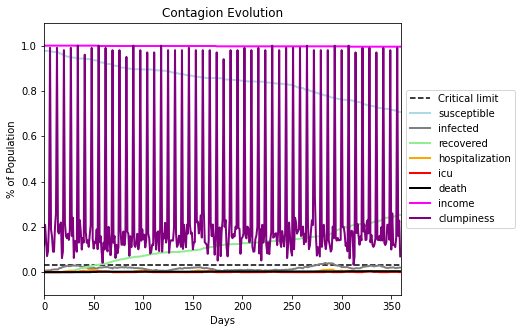

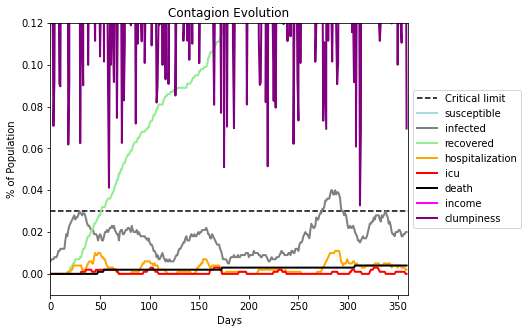

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9768436772674389 but chosen is 0.35028196905106124 for temperature 0
Max is 0.9900458300942885 but chosen is 0.11845830059863995 for temperature 0
Max is 0.9959613209113832 but chosen is 0.017131543355686663 for temperature 0
Max is 0.9892132454556074 but chosen is 0.583885358187599 for temperature 0
Max is 0.9955761729632544 but chosen is 0.9741321636612958 for temperature 0
Max is 0.9919959161743589 but chosen is -0.2716954288575998 for temperature 0
Max is 0.9925179117988049 but chosen is 0.9791549561626377 for temperature 0
Max is 0.9975833708370314 but chosen is -0.3252358970883766 for temperature 0
Max is 0.9937465021085714 but chosen is 0.056732019446124674 for temperature 0
Max is 0.9956992980686488 but chosen is 0.5353624194856041 for temperature 0
Max is 0.9949476616613584 but chosen is 0.2877234505008249 for temperature 0
Max is 0.9939003239931483 but chosen is -0.2559677949121711 for temperature 0
Max is 0.992

Max is 0.9849630628147797 but chosen is 0.36866814292379424 for temperature 0
Max is 0.9888617790153821 but chosen is -0.0007873495910479619 for temperature 0
Max is 0.9969886069276661 but chosen is 0.4684982808230047 for temperature 0
Max is 0.990318586167211 but chosen is 0.2367528739694745 for temperature 0
Max is 0.9863081380699489 but chosen is -0.39823965302259845 for temperature 0
Max is 0.9963575841772891 but chosen is 0.2214565427354455 for temperature 0
Max is 0.9941179302626569 but chosen is -0.01759376338880638 for temperature 0
Max is 0.9949372063849683 but chosen is -0.03746583854349987 for temperature 0
Max is 0.993639929612598 but chosen is 0.06016349967892126 for temperature 0
Max is 0.9892151787998495 but chosen is 0.16434706734713592 for temperature 0
Max is 0.9947576853611234 but chosen is -0.20711029137961148 for temperature 0
Max is 0.9923638520365119 but chosen is 0.10277756581034035 for temperature 0
Max is 0.9884398992995196 but chosen is 0.278300055897071 for 

Max is 0.9900945524464194 but chosen is 0.22609685441542274 for temperature 0
Max is 0.9921331464918632 but chosen is -0.02485813481311698 for temperature 0
Max is 0.9882911211351884 but chosen is 0.3981700922829302 for temperature 0
Max is 0.9848956687334247 but chosen is 0.41273305589605636 for temperature 0
Max is 0.9928300738972874 but chosen is -0.35240353174112266 for temperature 0
Max is 0.9955237113229245 but chosen is -0.03724171956924215 for temperature 0
Max is 0.9946979657494094 but chosen is 0.630746874165817 for temperature 0
Max is 0.9941606710974957 but chosen is 0.9660655916024213 for temperature 0
Max is 0.9911740191760926 but chosen is 0.9643412736079083 for temperature 0
Max is 0.9919811617160316 but chosen is 0.2163381998616028 for temperature 0
Max is 0.981494589967452 but chosen is 0.0167968943546 for temperature 0
Max is 0.993953172843152 but chosen is -0.267715197011111 for temperature 0
Max is 0.9963287863477197 but chosen is -0.37236174400307287 for temperatu

Max is 0.9895595871853373 but chosen is 0.9847060744285521 for temperature 0
Max is 0.9908970074928712 but chosen is 0.34737196318331837 for temperature 0
Max is 0.995040275198148 but chosen is -0.07705817891200456 for temperature 0
Max is 0.9942543883699256 but chosen is 0.0626427410323891 for temperature 0
Max is 0.9836642379243478 but chosen is -0.0825213032657314 for temperature 0
Max is 0.9928657256104194 but chosen is 0.07684254453162216 for temperature 0
Max is 0.9894650472952394 but chosen is 0.9786182229268847 for temperature 0
Max is 0.9889564838503614 but chosen is 0.09102682465488944 for temperature 0
Max is 0.9936788825296571 but chosen is 0.010371644332178385 for temperature 0
Max is 0.9850656558418863 but chosen is 0.6140328827318058 for temperature 0
Max is 0.9835333097957343 but chosen is 0.40194975051199056 for temperature 0
Max is 0.9953917289047348 but chosen is 0.21129126845220972 for temperature 0
Max is 0.9890545270250769 but chosen is -0.046697653260371605 for t

Max is 0.9932478196204134 but chosen is 0.5417726987795168 for temperature 0
Max is 0.9939078867487291 but chosen is 0.20237839611289232 for temperature 0
Max is 0.9906415319596759 but chosen is 0.9500688484052275 for temperature 0
Max is 0.9894647241728188 but chosen is -0.2785280044490221 for temperature 0
Max is 0.9941549873794365 but chosen is 0.2721791039313862 for temperature 0
Max is 0.9848214002589286 but chosen is 0.9808303593842506 for temperature 0
Max is 0.9962042776226355 but chosen is 0.3507076157359607 for temperature 0
Max is 0.9950572073481878 but chosen is 0.5043633386709201 for temperature 0
Max is 0.9927642188785732 but chosen is 0.9888798410757217 for temperature 0
Max is 0.9906740106734501 but chosen is -0.02542739002965294 for temperature 0
Max is 0.9894491506120592 but chosen is 0.9694829651565049 for temperature 0
Max is 0.9866337355277233 but chosen is 0.08202176415582449 for temperature 0
Max is 0.9906288034153592 but chosen is -0.17077819829760116 for temper

Max is 0.97750834059332 but chosen is 0.5578058846652919 for temperature 0
Max is 0.990964296107266 but chosen is -0.1173260169841939 for temperature 0
Max is 0.9933859256747668 but chosen is 0.5718376491656135 for temperature 0
Max is 0.9942983097655475 but chosen is 0.5856024005421172 for temperature 0
Max is 0.9913617296495572 but chosen is 0.9868413987663929 for temperature 0
Max is 0.9944966505541801 but chosen is 0.3359640427391134 for temperature 0
Max is 0.9762601305971588 but chosen is -0.13607011496712773 for temperature 0
Max is 0.9945567124405507 but chosen is 0.3997548442339486 for temperature 0
Max is 0.9885633149877365 but chosen is 0.5744446794424259 for temperature 0
Max is 0.9907399954989957 but chosen is 0.9815923165529912 for temperature 0
Max is 0.9749091014344778 but chosen is 0.052814815812049366 for temperature 0
Max is 0.9738049692049761 but chosen is 0.06782014132438029 for temperature 0
Max is 0.973291679505013 but chosen is 0.5182804778703559 for temperature

Max is 0.9903290330621398 but chosen is 0.9777909668975111 for temperature 0
Max is 0.9957205897229429 but chosen is 0.9918186398744179 for temperature 0
Max is 0.993765319389478 but chosen is 0.981987639394458 for temperature 0
Max is 0.99541406831981 but chosen is 0.9919522637060028 for temperature 0
Max is 0.9973399712979367 but chosen is 0.9912646196747835 for temperature 0
Max is 0.9968778341179276 but chosen is 0.9903941244736738 for temperature 0
Max is 0.9903400886408102 but chosen is 0.9756247168922108 for temperature 0
Max is 0.9948706406037326 but chosen is 0.9820639908466426 for temperature 0
Max is 0.9963954427634674 but chosen is 0.9851384319361433 for temperature 0
Max is 0.9929894427610415 but chosen is 0.9883690843401162 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9912289398290444 for temperature 0
Max is 0.9950701813670508 but chosen is 0.9748580419104595 for temperature 0
Max is 0.9939027723110357 but chosen is 0.9845329618099231 for temperature 0
Max

Max is 0.9893395783904676 but chosen is 0.9680506138111901 for temperature 0
Max is 0.9895031309893663 but chosen is 0.9721901376372456 for temperature 0
Max is 0.985269379884929 but chosen is 0.9825742673459689 for temperature 0
Max is 0.9961187456286481 but chosen is 0.9815832111688599 for temperature 0
Max is 0.9942056378782647 but chosen is 0.9803375262824837 for temperature 0
Max is 0.995060309359512 but chosen is 0.9756247168922108 for temperature 0
Max is 0.9903400886408102 but chosen is 0.9842669832010223 for temperature 0
Max is 0.996353219997147 but chosen is 0.9882925426080043 for temperature 0
Max is 0.996591682538321 but chosen is 0.9883856122671811 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9858634554564029 for temperature 0
tup_vec1 not in keepset of size 76
Max is 0.995060309359512 but chosen is 0.9815397686448964 for temperature 0
Max is 0.9979380188789237 but chosen is 0.9899534195869955 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9942

Max is 0.9939883602515307 but chosen is 0.991351134995649 for temperature 0
Max is 0.9951677250029598 but chosen is 0.9882524747053528 for temperature 0
Max is 0.9926750858200077 but chosen is 0.9890573539235272 for temperature 0
Max is 0.9967545553282025 but chosen is 0.9953881812771874 for temperature 0
Max is 0.9944517893041076 but chosen is 0.9823701263085399 for temperature 0
Max is 0.9970753629662436 but chosen is 0.9954096840847971 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9818599217008103 for temperature 0
Max is 0.9943627343221553 but chosen is 0.9851780160878041 for temperature 0
Max is 0.9923638520365119 but chosen is 0.9639154953757008 for temperature 0
Max is 0.9942386823163242 but chosen is 0.9826777175151635 for temperature 0
Max is 0.996471501955785 but chosen is 0.9859269438504984 for temperature 0
Max is 0.9980260052404375 but chosen is 0.989838688414111 for temperature 0
Max is 0.9956791770195184 but chosen is 0.9904932254511335 for temperature 0
Ma

Max is 0.9943394660711786 but chosen is 0.9932580720353813 for temperature 0
tup_vec1 not in keepset of size 55
Max is 0.9941270759968076 but chosen is 0.9905778578936717 for temperature 0
Max is 0.9977936343146173 but chosen is 0.9955617001210043 for temperature 0
Max is 0.996778315142896 but chosen is 0.990621978538553 for temperature 0
Max is 0.9957978447896765 but chosen is 0.9935321827397475 for temperature 0
Max is 0.9953764930561909 but chosen is 0.9809002846305171 for temperature 0
Max is 0.9963575841772891 but chosen is 0.9788585787569988 for temperature 0
Max is 0.9903400886408102 but chosen is 0.9714315730615755 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9894511676774825 for temperature 0
Max is 0.9960454563586656 but chosen is 0.9950823006442076 for temperature 0
Max is 0.9956791770195184 but chosen is 0.9949769807872004 for temperature 0
Max is 0.9935618179750995 but chosen is 0.9858212854241357 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9

Max is 0.9961503450515952 but chosen is 0.9916833643455388 for temperature 0
Max is 0.9980260052404373 but chosen is 0.9858047761465395 for temperature 0
Max is 0.9948968523242635 but chosen is 0.9816887830240616 for temperature 0
Max is 0.997086851279169 but chosen is 0.9828425593750347 for temperature 0
Max is 0.993128598949981 but chosen is 0.9792537246825711 for temperature 0
Max is 0.996778315142896 but chosen is 0.9720286579092403 for temperature 0
Max is 0.9886304123694551 but chosen is 0.9698712583004223 for temperature 0
Max is 0.9957511501793475 but chosen is 0.992837479285205 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9937994166147958 for temperature 0
Max is 0.9947033191479789 but chosen is 0.9818345312080313 for temperature 0
Max is 0.9924734412191007 but chosen is 0.9782173074483492 for temperature 0
Max is 0.9965887973037358 but chosen is 0.9700084062521716 for temperature 0
Max is 0.9923638520365119 but chosen is 0.9820112091254649 for temperature 0
Max

Max is 0.9908798214488322 but chosen is 0.9670202316514253 for temperature 0
Max is 0.9893569357509071 but chosen is 0.9264550421158129 for temperature 0
Max is 0.9919142257504707 but chosen is 0.954274904402215 for temperature 0
Max is 0.9890427513556376 but chosen is 0.9795610024099637 for temperature 0
Max is 0.9874918281693991 but chosen is 0.9518613579893599 for temperature 0
Max is 0.9947267692655767 but chosen is 0.9686274931298647 for temperature 0
Max is 0.9879783610040197 but chosen is 0.9709868671643319 for temperature 0
Max is 0.9953877382923267 but chosen is 0.9781723402850154 for temperature 0
Max is 0.9899403940623808 but chosen is 0.9675029416761067 for temperature 0
Max is 0.9932957632492619 but chosen is 0.9776373268395955 for temperature 0
Max is 0.9942509695875449 but chosen is 0.9589715217927677 for temperature 0
Max is 0.9765734795003238 but chosen is 0.9657426720729834 for temperature 0
Max is 0.9959438256067354 but chosen is 0.9683396653588506 for temperature 0


Max is 0.9892509710515558 but chosen is 0.9587990961953122 for temperature 0
Max is 0.9893569357509071 but chosen is 0.9563161036880466 for temperature 0
Max is 0.9874918281693991 but chosen is 0.9714696949765028 for temperature 0
Max is 0.9928282935814394 but chosen is 0.9757022070180023 for temperature 0
Max is 0.9890594056785429 but chosen is 0.9755078646096876 for temperature 0
Max is 0.9911469222322687 but chosen is 0.9478910421568393 for temperature 0
Max is 0.9911278162160555 but chosen is 0.9888823284144794 for temperature 0
Max is 0.9936788825296571 but chosen is 0.9701036111258158 for temperature 0
Max is 0.9856248825278797 but chosen is 0.9488020011666561 for temperature 0
tup_vec1 not in keepset of size 61
Max is 0.990432688689997 but chosen is 0.9845314748920084 for temperature 0
Max is 0.9951163639023746 but chosen is 0.9758483688703672 for temperature 0
Max is 0.9942509695875449 but chosen is 0.9628162215010444 for temperature 0
Max is 0.9877056094611544 but chosen is 0.

Max is 0.976642058251901 but chosen is 0.9693148924386878 for temperature 0
Max is 0.9893511678665866 but chosen is 0.9542738285566069 for temperature 0
Max is 0.9860662995852169 but chosen is 0.9693168285096607 for temperature 0
Max is 0.9853945539124277 but chosen is 0.9701445959237641 for temperature 0
Max is 0.9874107913044718 but chosen is 0.9547988761735118 for temperature 0
Max is 0.9849630628147797 but chosen is 0.9706289972230774 for temperature 0
Max is 0.9941179302626569 but chosen is 0.9898622948609774 for temperature 0
Max is 0.9900085992937411 but chosen is 0.9495868048911785 for temperature 0
Max is 0.9776356783970808 but chosen is 0.9063011810561251 for temperature 0
Max is 0.9607314459939663 but chosen is 0.9417223890987585 for temperature 0
Max is 0.9836531161610136 but chosen is 0.9330486461822136 for temperature 0
Max is 0.9835018314803355 but chosen is 0.972248841782761 for temperature 0
Max is 0.9884553962159918 but chosen is 0.9489765259006262 for temperature 0
M

Max is 0.9801457293756932 but chosen is 0.9619530794835174 for temperature 0
Max is 0.985914044233992 but chosen is 0.9601366527188249 for temperature 0
Max is 0.9853947603674806 but chosen is 0.9642999206300591 for temperature 0
Max is 0.9854224816781075 but chosen is 0.9291241520214345 for temperature 0
Max is 0.9775822191882304 but chosen is 0.9327864869120921 for temperature 0
Max is 0.9870656761383135 but chosen is 0.9820622557705592 for temperature 0
tup_vec1 not in keepset of size 15
Max is 0.9801186989193127 but chosen is 0.9576177260805645 for temperature 0
Max is 0.9906938527778844 but chosen is 0.9538695304074437 for temperature 0
Max is 0.9889628440438546 but chosen is 0.9688102190256246 for temperature 0
Max is 0.9805585140795381 but chosen is 0.9490560426023045 for temperature 0
Max is 0.9747805421865338 but chosen is 0.9403885486983649 for temperature 0
Max is 0.974370708235283 but chosen is 0.9583684939913335 for temperature 0
Max is 0.9874910090405248 but chosen is 0.9

Max is 0.9938836552571088 but chosen is 0.9807099953473867 for temperature 0
Max is 0.997620876542213 but chosen is 0.9724607218548461 for temperature 0
Max is 0.9899880609226154 but chosen is 0.94919102924455 for temperature 0
Max is 0.994244390529569 but chosen is 0.9631180730680112 for temperature 0
Max is 0.9939959946499086 but chosen is 0.9805041680875949 for temperature 0
Max is 0.9923998327685709 but chosen is 0.9730501991232906 for temperature 0
Max is 0.9917429596437435 but chosen is 0.9716977586738718 for temperature 0
Max is 0.9976415513237673 but chosen is 0.9900678010304405 for temperature 0
Max is 0.9945690067300863 but chosen is 0.9850936031614651 for temperature 0
Max is 0.9906843603286326 but chosen is 0.9840703617073331 for temperature 0
Max is 0.9945062206180889 but chosen is 0.9833398761346313 for temperature 0
Max is 0.9949740910305188 but chosen is 0.990086355626469 for temperature 0
Max is 0.9932049464288037 but chosen is 0.9877820043374508 for temperature 0
Max 

Max is 0.9932049464288037 but chosen is 0.9640922095782309 for temperature 0
Max is 0.9946158926327333 but chosen is 0.9755590909319872 for temperature 0
Max is 0.9939959946499086 but chosen is 0.9841004291204022 for temperature 0
Max is 0.9952143231012782 but chosen is 0.9783922388512702 for temperature 0
Max is 0.9924257849850221 but chosen is 0.990086355626469 for temperature 0
Max is 0.9955574188911881 but chosen is 0.9814711733029583 for temperature 0
Max is 0.9938353104590925 but chosen is 0.9725828158172833 for temperature 0
Max is 0.9877434402593178 but chosen is 0.9847272341518879 for temperature 0
Max is 0.994244390529569 but chosen is 0.9888751466115467 for temperature 0
Max is 0.9939003239931483 but chosen is 0.9700326073674158 for temperature 0
Max is 0.9926925666926688 but chosen is 0.9706965023898884 for temperature 0
Max is 0.9925949876233086 but chosen is 0.9815718704598435 for temperature 0
Max is 0.9945832132486518 but chosen is 0.9905010229999753 for temperature 0
M

Max is 0.9957501795422663 but chosen is 0.9892360546854206 for temperature 0
Max is 0.9956266432380156 but chosen is 0.9841716769122987 for temperature 0
Max is 0.9939883602515307 but chosen is 0.9748341118123847 for temperature 0
Max is 0.9922107826647693 but chosen is 0.9669393138406164 for temperature 0
Max is 0.9961348658775501 but chosen is 0.985803675098222 for temperature 0
tup_vec1 not in keepset of size 25
Max is 0.9926750858200077 but chosen is 0.9890573539235272 for temperature 0
Max is 0.995670810266336 but chosen is 0.9823678184874088 for temperature 0
Max is 0.9914484613531517 but chosen is 0.9692394785108366 for temperature 0
Max is 0.9919522637060028 but chosen is 0.9803929370743795 for temperature 0
Max is 0.9932708620095295 but chosen is 0.9899458032151284 for temperature 0
Max is 0.9909688187996668 but chosen is 0.9840934124969443 for temperature 0
Max is 0.995060309359512 but chosen is 0.9888940191773805 for temperature 0
Max is 0.996335174833012 but chosen is 0.982

Max is 0.9937994166147958 but chosen is 0.9849888152466746 for temperature 0
Max is 0.9940983571796698 but chosen is 0.9820907452627043 for temperature 0
Max is 0.9942691755428086 but chosen is 0.9767862038000409 for temperature 0
Max is 0.9939883602515307 but chosen is 0.9673418187135965 for temperature 0
Max is 0.9948968523242635 but chosen is 0.969130975679502 for temperature 0
Max is 0.99153553109428 but chosen is 0.9872414701876144 for temperature 0
Max is 0.9971343039843201 but chosen is 0.9889697357893018 for temperature 0
Max is 0.9941270759968076 but chosen is 0.983158202618787 for temperature 0
Max is 0.9972284811578302 but chosen is 0.9928584031752165 for temperature 0
Max is 0.9970753629662436 but chosen is 0.9954096840847971 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9847875956877827 for temperature 0
Max is 0.9927562154385025 but chosen is 0.9864480232833608 for temperature 0
Max is 0.9926646228124733 but chosen is 0.9860893761786529 for temperature 0
Max

Max is 0.9961348658775501 but chosen is 0.9807837232814363 for temperature 0
Max is 0.9939027723110357 but chosen is 0.9765675370411268 for temperature 0
Max is 0.9964421958023146 but chosen is 0.9818720485365973 for temperature 0
Max is 0.9974547294093149 but chosen is 0.9849559842793009 for temperature 0
Max is 0.9967545553282025 but chosen is 0.9814102970562084 for temperature 0
Max is 0.9939883602515307 but chosen is 0.9924734412191007 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9813412112452626 for temperature 0
Max is 0.9935570437756418 but chosen is 0.9760933040185262 for temperature 0
Max is 0.9943627343221553 but chosen is 0.9936886427788058 for temperature 0
Max is 0.9961187456286481 but chosen is 0.9879454101418443 for temperature 0
Max is 0.9971343039843199 but chosen is 0.985841498246596 for temperature 0
Max is 0.9941270759968076 but chosen is 0.9926626605411524 for temperature 0
Max is 0.9969280531044222 but chosen is 0.9828060757432696 for temperature 0


Max is 0.996442195802315 but chosen is 0.9900683211469851 for temperature 0
Max is 0.9972284811578302 but chosen is 0.9944517893041076 for temperature 0
Max is 0.9922495566800712 but chosen is 0.9840934124969443 for temperature 0
Max is 0.995060309359512 but chosen is 0.9783418843296313 for temperature 0
Max is 0.9926646228124733 but chosen is 0.98750602872575 for temperature 0
Max is 0.9962321946788398 but chosen is 0.9950017243738705 for temperature 0
Max is 0.9969976117087985 but chosen is 0.9844612846967062 for temperature 0
Max is 0.9977569844939326 but chosen is 0.9820581604046851 for temperature 0
Max is 0.9942520371919317 but chosen is 0.9714287958269785 for temperature 0
Max is 0.9903400886408102 but chosen is 0.9768525216207441 for temperature 0
Max is 0.9964218383731753 but chosen is 0.9840774166255938 for temperature 0
Max is 0.9922107826647693 but chosen is 0.9869590396639527 for temperature 0
Max is 0.9942095553770603 but chosen is 0.9834071851372923 for temperature 0
Max

Max is 0.9957978447896765 but chosen is 0.965637342937553 for temperature 0
Max is 0.9962975391094941 but chosen is 0.9807050901784781 for temperature 0
Max is 0.9953764930561909 but chosen is 0.9886800627625093 for temperature 0
Max is 0.9961329384574998 but chosen is 0.9956587053847399 for temperature 0
Max is 0.9940983571796698 but chosen is 0.9842961620674493 for temperature 0
Max is 0.9979380188789237 but chosen is 0.9883732816333272 for temperature 0
Max is 0.99613486587755 but chosen is 0.9786343523976462 for temperature 0
Max is 0.9956524950057611 but chosen is 0.9900875737908515 for temperature 0
Max is 0.9970753629662436 but chosen is 0.989646344042815 for temperature 0
Max is 0.995273324471566 but chosen is 0.9849325451712154 for temperature 0
Max is 0.9967545553282025 but chosen is 0.991276329756087 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9945508851974254 for temperature 0
Max is 0.9956709244767995 but chosen is 0.9839316224252791 for temperature 0
Max i

Max is 0.9929336561753633 but chosen is 0.9912767786988023 for temperature 0
Max is 0.9872936224846609 but chosen is 0.9801272199048586 for temperature 0
Max is 0.9936788825296571 but chosen is 0.9929333883607305 for temperature 0
Max is 0.9890375962210515 but chosen is 0.973863844572504 for temperature 0
Max is 0.9948740812240634 but chosen is 0.9623244950816697 for temperature 0
Max is 0.9807164904343701 but chosen is 0.9772551016131817 for temperature 0
Max is 0.9959331942549424 but chosen is 0.9670501954848083 for temperature 0
Max is 0.9837166015633467 but chosen is 0.9583975277571233 for temperature 0
Max is 0.9942919055153656 but chosen is 0.9559843272564222 for temperature 0
Max is 0.9772417137649942 but chosen is 0.9674428000953965 for temperature 0
Max is 0.9951163639023746 but chosen is 0.9803525707763655 for temperature 0
Max is 0.9907536275128092 but chosen is 0.9847434874980905 for temperature 0
Max is 0.9920508941173861 but chosen is 0.9730927844101063 for temperature 0


Max is 0.9584439225306208 but chosen is 0.9329878344983326 for temperature 0
Max is 0.9697123130973676 but chosen is 0.9356040145901199 for temperature 0
Max is 0.9874918281693991 but chosen is 0.9498177868986069 for temperature 0
Max is 0.9858897711656965 but chosen is 0.9484378471830804 for temperature 0
Max is 0.9954066031237797 but chosen is 0.9608240952083079 for temperature 0
Max is 0.9866759917993128 but chosen is 0.9446882221698408 for temperature 0
Max is 0.9959331942549424 but chosen is 0.9738395257812966 for temperature 0
Max is 0.9765734795003238 but chosen is 0.9717221584510867 for temperature 0
Max is 0.9946979657494094 but chosen is 0.9591464787760028 for temperature 0
Max is 0.9862215444997808 but chosen is 0.9669967749027183 for temperature 0
Max is 0.9932957632492619 but chosen is 0.9652641725295806 for temperature 0
Max is 0.988185650135793 but chosen is 0.9572262197058528 for temperature 0
Max is 0.9848198694770255 but chosen is 0.9596204928972751 for temperature 0


Max is 0.9925593953929142 but chosen is 0.9778685102215872 for temperature 0
Max is 0.9892096944955269 but chosen is 0.9671962318157612 for temperature 0
Max is 0.9916621963340759 but chosen is 0.95880755915121 for temperature 0
Max is 0.9836642379243478 but chosen is 0.949272170548602 for temperature 0
Max is 0.9858370266875501 but chosen is 0.9337758170688139 for temperature 0
Max is 0.9828550727737693 but chosen is 0.9410886156769512 for temperature 0
Max is 0.9816074582991844 but chosen is 0.9663823913004211 for temperature 0
Max is 0.9932038063401433 but chosen is 0.954938383276386 for temperature 0
Max is 0.9843481423650272 but chosen is 0.956304682931193 for temperature 0
Max is 0.9852377897144472 but chosen is 0.9551315400711886 for temperature 0
Max is 0.9854945551082345 but chosen is 0.9543334205292499 for temperature 0
Max is 0.9780152966922728 but chosen is 0.9372057745147102 for temperature 0
Max is 0.9748814800143298 but chosen is 0.9345071500373993 for temperature 0
Max 

Max is 0.9854945551082345 but chosen is 0.9616730110374943 for temperature 0
Max is 0.9928056418810843 but chosen is 0.9794467792331277 for temperature 0
Max is 0.9863081380699489 but chosen is 0.98477359514415 for temperature 0
Max is 0.9897216699602183 but chosen is 0.9804261589303299 for temperature 0
Max is 0.9871275256130951 but chosen is 0.9675629828764398 for temperature 0
Max is 0.9758214710320198 but chosen is 0.9733834302163523 for temperature 0
Max is 0.9816074582991844 but chosen is 0.9795875432798379 for temperature 0
Max is 0.9913591528737337 but chosen is 0.9843098723034577 for temperature 0
tup_vec1 not in keepset of size 37
Max is 0.9874107913044718 but chosen is 0.9853947603674806 for temperature 0
Max is 0.9891186085930245 but chosen is 0.9693470827752797 for temperature 0
Max is 0.9868478541174533 but chosen is 0.9467476147561215 for temperature 0
Max is 0.9744496857729723 but chosen is 0.9591207144345146 for temperature 0
Max is 0.9805585140795381 but chosen is 0.9

Max is 0.9871601579866294 but chosen is 0.9795564966101039 for temperature 0
Max is 0.9874281705428389 but chosen is 0.9849260827258596 for temperature 0
Max is 0.9946525518144579 but chosen is 0.9728472438656381 for temperature 0
tup_vec1 not in keepset of size 3
Max is 0.9874281705428389 but chosen is 0.9869229914073829 for temperature 0
Max is 0.9949740910305188 but chosen is 0.9843117466014759 for temperature 0
Max is 0.9949740910305188 but chosen is 0.9789289780700556 for temperature 0
Max is 0.991037459560194 but chosen is 0.9826026065775785 for temperature 0
Max is 0.9961494666819487 but chosen is 0.9749671737944094 for temperature 0
Max is 0.9910383222536782 but chosen is 0.9613475940038428 for temperature 0
Max is 0.9922018621686022 but chosen is 0.9727312588667407 for temperature 0
Max is 0.997620876542213 but chosen is 0.9851701355921728 for temperature 0
Max is 0.9968446637194017 but chosen is 0.9916012694846565 for temperature 0
Max is 0.9981522245709632 but chosen is 0.99

Max is 0.993367135070608 but chosen is 0.9769974161827021 for temperature 0
Max is 0.996090797186381 but chosen is 0.9822879550784417 for temperature 0
Max is 0.9934740766733234 but chosen is 0.9873783801765195 for temperature 0
Max is 0.9950635350569327 but chosen is 0.9665495106590717 for temperature 0
Max is 0.9952143231012781 but chosen is 0.9746594981786214 for temperature 0
Max is 0.9945062206180889 but chosen is 0.9833398761346313 for temperature 0
Max is 0.9955574188911881 but chosen is 0.9811893073083917 for temperature 0
Max is 0.9956542770504793 but chosen is 0.9624548311587097 for temperature 0
Max is 0.9860903547199066 but chosen is 0.945929475535955 for temperature 0
Max is 0.9928405437547502 but chosen is 0.9794666601835175 for temperature 0
Max is 0.9937921449566065 but chosen is 0.9766474740547577 for temperature 0
Max is 0.9914999450209642 but chosen is 0.9732257452809039 for temperature 0
Max is 0.9966484951633364 but chosen is 0.9797144603105903 for temperature 0
Ma

Max is 0.991899823246336 but chosen is 0.9542595074641862 for temperature 0
Max is 0.9978819337736007 but chosen is 0.9786028716510423 for temperature 0
Max is 0.9937142874057086 but chosen is 0.9840102115902696 for temperature 0
Max is 0.995141743897474 but chosen is 0.9843593616384883 for temperature 0
Max is 0.9927181372301189 but chosen is 0.9736973698671194 for temperature 0
Max is 0.9950611914199823 but chosen is 0.9879661139250232 for temperature 0
Max is 0.9949476616613584 but chosen is 0.9863171585523645 for temperature 0
Max is 0.9963454161338089 but chosen is 0.9820513471996284 for temperature 0
Max is 0.9953001413411189 but chosen is 0.9931774513272013 for temperature 0
Max is 0.9942826047902777 but chosen is 0.9823528852077682 for temperature 0
Max is 0.9931276942239109 but chosen is 0.9924073022504784 for temperature 0
Max is 0.9845319434943652 but chosen is 0.9591078853104457 for temperature 0
Max is 0.991341987160461 but chosen is 0.9701259838248848 for temperature 0
Ma

Max is 0.9840003249200915 but chosen is 0.9681721989315779 for temperature 0
Max is 0.9953001413411189 but chosen is 0.9794113884134957 for temperature 0
Max is 0.9937142874057086 but chosen is 0.9833269600637293 for temperature 0
Max is 0.9949476616613584 but chosen is 0.9855824801433796 for temperature 0
Max is 0.9955782046060191 but chosen is 0.9763207931169421 for temperature 0
Max is 0.9904191786535299 but chosen is 0.987414065618452 for temperature 0
Max is 0.9967179811921223 but chosen is 0.9828476044443566 for temperature 0
Max is 0.9928359531112679 but chosen is 0.978171736131842 for temperature 0
Max is 0.9938854852423264 but chosen is 0.9877966947106033 for temperature 0
Max is 0.9928947030043855 but chosen is 0.9750576833571521 for temperature 0
Max is 0.9860511746144073 but chosen is 0.961720408196874 for temperature 0
Max is 0.9805335027531632 but chosen is 0.9462802234619033 for temperature 0
Max is 0.9934328268786647 but chosen is 0.9850246213572206 for temperature 0
Ma

Max is 0.9943393484040702 but chosen is 0.9866339177555558 for temperature 0
Max is 0.9947227761190711 but chosen is 0.9746796286726539 for temperature 0
Max is 0.9927181372301189 but chosen is 0.9831776245867732 for temperature 0
Max is 0.9947886551267925 but chosen is 0.9847361912818977 for temperature 0
Max is 0.995141743897474 but chosen is 0.989597463421889 for temperature 0
Max is 0.9978819337736007 but chosen is 0.9810401311976109 for temperature 0
Max is 0.9932831421287621 but chosen is 0.9819584506751236 for temperature 0
Max is 0.9936037128115563 but chosen is 0.9893682578785405 for temperature 0
Max is 0.9954077797299062 but chosen is 0.9742872960783321 for temperature 0
Max is 0.9955581655889617 but chosen is 0.9705533519376707 for temperature 0
Max is 0.9930501786115459 but chosen is 0.9804936741567906 for temperature 0
Max is 0.9920711033601505 but chosen is 0.9716885557165417 for temperature 0
Max is 0.991341987160461 but chosen is 0.9739116455884027 for temperature 0
Ma

Max is 0.9927323770135984 but chosen is 0.9803615759354802 for temperature 0
Max is 0.9978819337736007 but chosen is 0.983913795694975 for temperature 0
Max is 0.9911747625372004 but chosen is 0.9770038649712033 for temperature 0
Max is 0.9955860437128863 but chosen is 0.9947886551267926 for temperature 0
Max is 0.991696461111725 but chosen is 0.979173481313829 for temperature 0
Max is 0.9932831421287621 but chosen is 0.9864865750127613 for temperature 0
Max is 0.9928359531112679 but chosen is 0.9753841241945248 for temperature 0
Max is 0.9957258258902107 but chosen is 0.9944415753805643 for temperature 0
Max is 0.997172598250379 but chosen is 0.985113978131865 for temperature 0
Max is 0.9920680052673453 but chosen is 0.9773415345665865 for temperature 0
Max is 0.9954077797299062 but chosen is 0.9806932939724233 for temperature 0
Max is 0.9950422184669684 but chosen is 0.98811445668851 for temperature 0
Max is 0.9967179811921223 but chosen is 0.9803322822621116 for temperature 0
Max is

Max is 0.9890545270250769 but chosen is 0.9818715832440232 for temperature 0
Max is 0.9937040078862007 but chosen is 0.963899967443095 for temperature 0
Max is 0.9954077797299062 but chosen is 0.9826361598810622 for temperature 0
Max is 0.9950611914199823 but chosen is 0.979041184212478 for temperature 0
Max is 0.9900690946207066 but chosen is 0.9656710274254392 for temperature 0
Max is 0.9881689445190451 but chosen is 0.9760173410374884 for temperature 0
Max is 0.9888509118312923 but chosen is 0.9647096032325109 for temperature 0
Max is 0.9908288002282875 but chosen is 0.9670793458944943 for temperature 0
Max is 0.9954008288921341 but chosen is 0.9911083061749095 for temperature 0
Max is 0.9946256718891509 but chosen is 0.9754702279979771 for temperature 0
Max is 0.9907907256440435 but chosen is 0.9674869063590997 for temperature 0
Max is 0.9910849516244259 but chosen is 0.9824441395885245 for temperature 0
Max is 0.9928521673885186 but chosen is 0.963004341841106 for temperature 0
Ma

Max is 0.9945728257499495 but chosen is 0.9920913274818096 for temperature 0
Max is 0.9968837747586826 but chosen is 0.9807552831038765 for temperature 0
tup_vec1 not in keepset of size 30
Max is 0.9894059788589449 but chosen is 0.9761285314567665 for temperature 0
Max is 0.9881175305461037 but chosen is 0.9860327916610981 for temperature 0
Max is 0.9948498962292762 but chosen is 0.9846432016496716 for temperature 0
Max is 0.9924422799065578 but chosen is 0.9772050594037732 for temperature 0
Max is 0.9888417350067326 but chosen is 0.9857509469107962 for temperature 0
Max is 0.9890081816526574 but chosen is 0.9757867041007462 for temperature 0
Max is 0.9923483780850909 but chosen is 0.9616129693658692 for temperature 0
Max is 0.9916999428373737 but chosen is 0.9834739071449005 for temperature 0
Max is 0.9908574733985195 but chosen is 0.9819011425996182 for temperature 0
Max is 0.9926379131601253 but chosen is 0.9542670561021209 for temperature 0
Max is 0.9821632580006983 but chosen is 0

Max is 0.9932437920605732 but chosen is 0.9403957085853302 for temperature 0
Max is 0.9916999428373737 but chosen is 0.9596686383971523 for temperature 0
Max is 0.9936086799628013 but chosen is 0.9756388218535584 for temperature 0
Max is 0.9962558664239145 but chosen is 0.9860438800583337 for temperature 0
Max is 0.9918019821613314 but chosen is 0.979760900442037 for temperature 0
Max is 0.9889155741657212 but chosen is 0.9542228998240393 for temperature 0
Max is 0.9954594673100413 but chosen is 0.9851621805359815 for temperature 0
Max is 0.9968837747586826 but chosen is 0.9837124061050238 for temperature 0
Max is 0.9948498962292762 but chosen is 0.9855933602823559 for temperature 0
Max is 0.9950419351003906 but chosen is 0.9823540624073447 for temperature 0
Max is 0.9931702300320959 but chosen is 0.9752284764977576 for temperature 0
Max is 0.9888932519717778 but chosen is 0.9644304245767279 for temperature 0
Max is 0.9950531715813226 but chosen is 0.9803408145049038 for temperature 0


Max is 0.9958876157381485 but chosen is 0.9827860305940065 for temperature 0
Max is 0.9963728509189074 but chosen is 0.9640555383468699 for temperature 0
Max is 0.9928082633148195 but chosen is 0.979461850962586 for temperature 0
Max is 0.9942147871378889 but chosen is 0.9873809962806965 for temperature 0
Max is 0.9939341293277156 but chosen is 0.9844531035217033 for temperature 0
Max is 0.9939854764859511 but chosen is 0.9797144800188565 for temperature 0
Max is 0.9922969427248863 but chosen is 0.9763370393867583 for temperature 0
Max is 0.9906461895345887 but chosen is 0.9762368738578365 for temperature 0
Max is 0.9928657256104194 but chosen is 0.9779517008181101 for temperature 0
Max is 0.9887171408243823 but chosen is 0.9728703521838263 for temperature 0
Max is 0.9962520475908407 but chosen is 0.9876240660946692 for temperature 0
Max is 0.990451486140859 but chosen is 0.9766430555817983 for temperature 0
Max is 0.9917632107593234 but chosen is 0.9776250386337046 for temperature 0
M

Max is 0.9978550690118929 but chosen is 0.9898238489580847 for temperature 0
Max is 0.9936406587255399 but chosen is 0.9797144800188565 for temperature 0
Max is 0.9867045470516418 but chosen is 0.974822565803548 for temperature 0
Max is 0.9937501587200487 but chosen is 0.982206796678311 for temperature 0
Max is 0.9940651054852623 but chosen is 0.9817768507247132 for temperature 0
tup_vec1 not in keepset of size 35
Max is 0.9923181823969544 but chosen is 0.9735557309345038 for temperature 0
Max is 0.9891756424164393 but chosen is 0.9846701770694475 for temperature 0
Max is 0.9898680341674311 but chosen is 0.981998110060078 for temperature 0
Max is 0.9953274346816732 but chosen is 0.9892011243428017 for temperature 0
Max is 0.9927219456341314 but chosen is 0.989591795571794 for temperature 0
Max is 0.995303551788011 but chosen is 0.9949866757821892 for temperature 0
Max is 0.9942010617429549 but chosen is 0.9866613663632936 for temperature 0
Max is 0.9948977941523085 but chosen is 0.9836

Max is 0.9959961904917587 but chosen is 0.9630917082497321 for temperature 0
Max is 0.9914655549209841 but chosen is 0.952641576001903 for temperature 0
Max is 0.9909571173820086 but chosen is 0.9723743338713188 for temperature 0
Max is 0.9891789215454443 but chosen is 0.9396992363552341 for temperature 0
Max is 0.9910394158277771 but chosen is 0.9732122271050587 for temperature 0
Max is 0.997430387197174 but chosen is 0.9782319414422341 for temperature 0
Max is 0.995554042722042 but chosen is 0.9765322730952803 for temperature 0
Max is 0.9947576853611234 but chosen is 0.9574666090008394 for temperature 0
Max is 0.9923675769851794 but chosen is 0.9869088970302767 for temperature 0
Max is 0.9948429237697551 but chosen is 0.9648926567654704 for temperature 0
Max is 0.9897590356821389 but chosen is 0.9635539569813355 for temperature 0
Max is 0.9917953066820638 but chosen is 0.9718599999081401 for temperature 0
Max is 0.9945380669328193 but chosen is 0.9721261326822658 for temperature 0
Ma

Max is 0.9917683649783294 but chosen is 0.969469955286623 for temperature 0
Max is 0.9911740191760926 but chosen is 0.9865316403817047 for temperature 0
Max is 0.9870069481786118 but chosen is 0.9733586119927398 for temperature 0
Max is 0.9947576853611234 but chosen is 0.9697498908521954 for temperature 0
Max is 0.995554042722042 but chosen is 0.9852665248552009 for temperature 0
Max is 0.9926710372909744 but chosen is 0.9657029982727905 for temperature 0
Max is 0.9845645142509999 but chosen is 0.9659530554086894 for temperature 0
Max is 0.9948429237697551 but chosen is 0.965648830215123 for temperature 0
Max is 0.9893596274001487 but chosen is 0.9702064242307538 for temperature 0
Max is 0.9873762125000594 but chosen is 0.9497967548963725 for temperature 0
Max is 0.9959347623680623 but chosen is 0.9797434477384932 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9820353124248816 for temperature 0
Max is 0.9963697307740914 but chosen is 0.9692794016040872 for temperature 0
Ma

Max is 0.9957258258902107 but chosen is 0.9886209852674872 for temperature 0
Max is 0.9967179811921223 but chosen is 0.9773716540689539 for temperature 0
Max is 0.9930386508751394 but chosen is 0.9763222552682533 for temperature 0
Max is 0.9954008288921341 but chosen is 0.989142682231031 for temperature 0
Max is 0.9923671372708781 but chosen is 0.9569269055252173 for temperature 0
Max is 0.9817928495683078 but chosen is 0.9560217254394144 for temperature 0
Max is 0.9892310040198469 but chosen is 0.950687672456162 for temperature 0
Max is 0.9914578330037606 but chosen is 0.9844322156778533 for temperature 0
Max is 0.988172867433715 but chosen is 0.9753178336658672 for temperature 0
Max is 0.9931206727476195 but chosen is 0.983020936056969 for temperature 0
Max is 0.9978819337736007 but chosen is 0.9739937779854866 for temperature 0
Max is 0.9906288034153592 but chosen is 0.9621659172915608 for temperature 0
Max is 0.98733449761899 but chosen is 0.9641360892903839 for temperature 0
Max i

Max is 0.9942633365508863 but chosen is 0.9847524666501636 for temperature 0
Max is 0.9969886069276661 but chosen is 0.9885981187142832 for temperature 0
Max is 0.9905371681690089 but chosen is 0.9600819434312405 for temperature 0
Max is 0.9871715729861633 but chosen is 0.9631255596518371 for temperature 0
Max is 0.9909110198435046 but chosen is 0.9734156315059939 for temperature 0
Max is 0.9928111676345494 but chosen is 0.9830489961740159 for temperature 0
Max is 0.9965365459565032 but chosen is 0.9930533091244188 for temperature 0
Max is 0.9937142874057086 but chosen is 0.9805761814169579 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9675751795026192 for temperature 0
Max is 0.9885286061053358 but chosen is 0.9749517381449608 for temperature 0
Max is 0.988314302188915 but chosen is 0.9716162914388321 for temperature 0
Max is 0.9912408937633539 but chosen is 0.9769380895159135 for temperature 0
Max is 0.9874706272754457 but chosen is 0.9694842806314027 for temperature 0


Max is 0.9904308245398754 but chosen is 0.9694670687831444 for temperature 0
Max is 0.9937198736963532 but chosen is 0.9852575336489013 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9852658564061512 for temperature 0
Max is 0.992902786170613 but chosen is 0.965835411238272 for temperature 0
Max is 0.9978819337736007 but chosen is 0.9892742052934226 for temperature 0
Max is 0.9928814144246325 but chosen is 0.9847668083524875 for temperature 0
Max is 0.9930386508751394 but chosen is 0.9717969996476711 for temperature 0
Max is 0.9954008288921341 but chosen is 0.9703041051940409 for temperature 0
Max is 0.9928359531112679 but chosen is 0.9884661830879025 for temperature 0
Max is 0.995378362698559 but chosen is 0.9805929318422523 for temperature 0
Max is 0.9934328268786647 but chosen is 0.970125983824885 for temperature 0
Max is 0.989853387364364 but chosen is 0.9479657060305715 for temperature 0
Max is 0.9963454161338089 but chosen is 0.9940645350493335 for temperature 0
Max 

Max is 0.9927213910538143 but chosen is 0.9818456697121402 for temperature 0
Max is 0.9954077797299062 but chosen is 0.9822049260500271 for temperature 0
Max is 0.9962985868605885 but chosen is 0.9909906650913985 for temperature 0
Max is 0.9969886069276661 but chosen is 0.9876781565062962 for temperature 0
Max is 0.997172598250379 but chosen is 0.9694291004312785 for temperature 0
Max is 0.9928359531112679 but chosen is 0.9760352374655409 for temperature 0
Max is 0.9937142874057086 but chosen is 0.9765414683578354 for temperature 0
Max is 0.993550626837188 but chosen is 0.9905906416526413 for temperature 0
Max is 0.9924073022504784 but chosen is 0.9884246067108181 for temperature 0
Max is 0.9930386508751394 but chosen is 0.9810429107084185 for temperature 0
Max is 0.9932831421287621 but chosen is 0.9768492537292105 for temperature 0
Max is 0.9934280722761843 but chosen is 0.974380409900059 for temperature 0
Max is 0.9930501786115459 but chosen is 0.9641490350685774 for temperature 0
Ma

Max is 0.9953783626985587 but chosen is 0.9800326094405836 for temperature 0
Max is 0.9913495304066573 but chosen is 0.9827446149516523 for temperature 0
Max is 0.9937142874057086 but chosen is 0.9561137433231329 for temperature 0
Max is 0.9880639830288203 but chosen is 0.9756650709007622 for temperature 0
Max is 0.9950611914199823 but chosen is 0.9897383858317391 for temperature 0
Max is 0.9940645350493335 but chosen is 0.9835042487342843 for temperature 0
Max is 0.9902974975788147 but chosen is 0.9833618616320727 for temperature 0
Max is 0.9904308245398754 but chosen is 0.9781813633123525 for temperature 0
Max is 0.9802259996857221 but chosen is 0.9552599110580337 for temperature 0
Max is 0.9955581655889615 but chosen is 0.9817023547107887 for temperature 0
Max is 0.9947227761190711 but chosen is 0.9848576084703486 for temperature 0
Max is 0.9898633589122365 but chosen is 0.9751860515943657 for temperature 0
Max is 0.9938916957877588 but chosen is 0.9876001854871799 for temperature 0

Max is 0.9916470486158994 but chosen is 0.9800594460943033 for temperature 0
Max is 0.9932450334980867 but chosen is 0.9720364572397197 for temperature 0
Max is 0.9893401949868433 but chosen is 0.9836567254744819 for temperature 0
Max is 0.9857205791699805 but chosen is 0.9656982627895841 for temperature 0
Max is 0.9904843986709172 but chosen is 0.9808312305004445 for temperature 0
tup_vec1 not in keepset of size 9
Max is 0.9904843986709172 but chosen is 0.969650026066034 for temperature 0
Max is 0.9881621517959324 but chosen is 0.9571755916857229 for temperature 0
Max is 0.9884320478091665 but chosen is 0.9802121321462683 for temperature 0
Max is 0.9806039328381336 but chosen is 0.9697166783947796 for temperature 0
Max is 0.98779347280509 but chosen is 0.9822847771349652 for temperature 0
Max is 0.9913306018200878 but chosen is 0.9776346507225705 for temperature 0
Max is 0.995629529611128 but chosen is 0.9689112816184319 for temperature 0
Max is 0.9936086799628013 but chosen is 0.9853

Max is 0.9923867819338857 but chosen is 0.9732265780244044 for temperature 0
Max is 0.9952786083254049 but chosen is 0.9730840903748201 for temperature 0
Max is 0.9936086799628013 but chosen is 0.9719659870936121 for temperature 0
Max is 0.990216951204758 but chosen is 0.9582513089020314 for temperature 0
Max is 0.9922813306541336 but chosen is 0.9613412848817658 for temperature 0
Max is 0.9966567867444266 but chosen is 0.97966466939765 for temperature 0
Max is 0.9916999428373737 but chosen is 0.9443204933944525 for temperature 0
Max is 0.9913950377702777 but chosen is 0.9829887888538692 for temperature 0
Max is 0.9948498962292762 but chosen is 0.9828110964597718 for temperature 0
Max is 0.9930379303544808 but chosen is 0.9717526317455477 for temperature 0
Max is 0.995629529611128 but chosen is 0.9630731120879255 for temperature 0
Max is 0.9879891939782149 but chosen is 0.9650138001295118 for temperature 0
Max is 0.9958379323001916 but chosen is 0.9868800553384209 for temperature 0
Max

Max is 0.9906461895345887 but chosen is 0.963824987075285 for temperature 0
Max is 0.9941558141483815 but chosen is 0.9912779639766077 for temperature 0
Max is 0.9972501084819452 but chosen is 0.9769570939549298 for temperature 0
Max is 0.9946614751974349 but chosen is 0.970162331167192 for temperature 0
tup_vec1 not in keepset of size 46
Max is 0.9959613209113833 but chosen is 0.9802167156216846 for temperature 0
Max is 0.9951633616473119 but chosen is 0.9748302764138761 for temperature 0
Max is 0.9903002198208998 but chosen is 0.9606335489451723 for temperature 0
Max is 0.9869109340249381 but chosen is 0.9688384415220639 for temperature 0
Max is 0.9982554966829703 but chosen is 0.9940543481027307 for temperature 0
Max is 0.998057098620504 but chosen is 0.9916184757319854 for temperature 0
Max is 0.9978550690118929 but chosen is 0.9835965779900298 for temperature 0
Max is 0.9928082633148195 but chosen is 0.9852260407544964 for temperature 0
Max is 0.9934961514382705 but chosen is 0.98

Max is 0.9923162916694126 but chosen is 0.985412977066118 for temperature 0
Max is 0.9978550690118929 but chosen is 0.9933351923725645 for temperature 0
Max is 0.9982554966829702 but chosen is 0.9812885969572224 for temperature 0
Max is 0.9872215037727474 but chosen is 0.9754953160391133 for temperature 0
Max is 0.9900053314487516 but chosen is 0.9712799497834195 for temperature 0
Max is 0.9864680602012151 but chosen is 0.9824253269448064 for temperature 0
Max is 0.9943933707855405 but chosen is 0.9928889574603379 for temperature 0
Max is 0.99719976245383 but chosen is 0.9762284919627107 for temperature 0
Max is 0.9956211867627457 but chosen is 0.9806749801162294 for temperature 0
Max is 0.9928082633148195 but chosen is 0.96277464594402 for temperature 0
Max is 0.9843975054729772 but chosen is 0.9649404578331757 for temperature 0
Max is 0.9947811873429795 but chosen is 0.9937501587200487 for temperature 0
Max is 0.993569731588953 but chosen is 0.9898498945711275 for temperature 0
Max i

Max is 0.995467939595085 but chosen is 0.9728849547942069 for temperature 0
Max is 0.9930756121479639 but chosen is 0.9876539508192379 for temperature 0
Max is 0.997430387197174 but chosen is 0.982325900194102 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9763056510628442 for temperature 0
Max is 0.9896560237700155 but chosen is 0.9858004176058892 for temperature 0
Max is 0.994160671097496 but chosen is 0.9536583120947294 for temperature 0
Max is 0.990318586167211 but chosen is 0.9285357091896441 for temperature 0
Max is 0.9893596274001487 but chosen is 0.9738575372893546 for temperature 0
Max is 0.9896622227417835 but chosen is 0.9823595172261017 for temperature 0
Max is 0.997557282390345 but chosen is 0.9693065709819749 for temperature 0
Max is 0.9855241781301498 but chosen is 0.9767672480954569 for temperature 0
Max is 0.9858543248159307 but chosen is 0.9540839172868556 for temperature 0
Max is 0.9917953066820638 but chosen is 0.9763492544447568 for temperature 0
Max i

Max is 0.9919959161743589 but chosen is 0.9661053452393601 for temperature 0
Max is 0.9933545113247484 but chosen is 0.9684239158285648 for temperature 0
Max is 0.9876505159458758 but chosen is 0.9760703346367554 for temperature 0
Max is 0.9933859256747668 but chosen is 0.9909352653251344 for temperature 0
Max is 0.9974303871971741 but chosen is 0.9839955218714904 for temperature 0
tup_vec1 not in keepset of size 56
Max is 0.99366974656809 but chosen is 0.9760156794067483 for temperature 0
Max is 0.9909887363274836 but chosen is 0.9891553573573914 for temperature 0
Max is 0.9908970074928712 but chosen is 0.9646913880527135 for temperature 0
Max is 0.9904112708220675 but chosen is 0.9456843901662073 for temperature 0
Max is 0.9873762125000594 but chosen is 0.9721710338071192 for temperature 0
Max is 0.9975044834711905 but chosen is 0.9811920791387789 for temperature 0
Max is 0.9917953066820635 but chosen is 0.9827080831856072 for temperature 0
Max is 0.9896622227417835 but chosen is 0.9

Max is 0.9924187608922816 but chosen is 0.9731787271056771 for temperature 0
Max is 0.9915906377889843 but chosen is 0.980292412634344 for temperature 0
Max is 0.9973456172466202 but chosen is 0.9951290422906001 for temperature 0
Max is 0.9972832675223934 but chosen is 0.988440658454942 for temperature 0
Max is 0.9948593607749056 but chosen is 0.9885587346777516 for temperature 0
Max is 0.9956033149070209 but chosen is 0.9899518676583832 for temperature 0
Max is 0.9942980540640098 but chosen is 0.981484267933992 for temperature 0
Max is 0.9956573182190921 but chosen is 0.9838688807146546 for temperature 0
Max is 0.9961724280297398 but chosen is 0.9865462364369905 for temperature 0
Max is 0.9924439650856162 but chosen is 0.9884964752638142 for temperature 0
Max is 0.992586889441207 but chosen is 0.9808911770447677 for temperature 0
Max is 0.9946311817922573 but chosen is 0.9678006267233472 for temperature 0
Max is 0.9799955570234713 but chosen is 0.9532558352891696 for temperature 0
Max

Max is 0.9893243808675617 but chosen is 0.9816255725418797 for temperature 0
tup_vec1 not in keepset of size 15
Max is 0.9906555145972791 but chosen is 0.981941662231859 for temperature 0
Max is 0.9901766846943152 but chosen is 0.9826192763043317 for temperature 0
Max is 0.9901724655469021 but chosen is 0.9544593034945368 for temperature 0
Max is 0.9860906973500523 but chosen is 0.981716847370264 for temperature 0
Max is 0.9883939604304354 but chosen is 0.9784244552858584 for temperature 0
Max is 0.9949152942291208 but chosen is 0.9888532356468399 for temperature 0
Max is 0.9871430728292486 but chosen is 0.9845201278738468 for temperature 0
Max is 0.9915085377851184 but chosen is 0.9881570799706356 for temperature 0
Max is 0.9937701199867518 but chosen is 0.9865343936732744 for temperature 0
Max is 0.992241650103517 but chosen is 0.9808347680194748 for temperature 0
Max is 0.9910419645050216 but chosen is 0.977208651145299 for temperature 0
Max is 0.9871746542100132 but chosen is 0.985

Max is 0.9909450417345302 but chosen is 0.9798578488913887 for temperature 0
Max is 0.9922569706388811 but chosen is 0.9640767662749317 for temperature 0
Max is 0.9934313873082088 but chosen is 0.9783650516245275 for temperature 0
Max is 0.9951066929374915 but chosen is 0.9900822769065714 for temperature 0
Max is 0.9974969866494328 but chosen is 0.9825039206900251 for temperature 0
Max is 0.9972832675223934 but chosen is 0.9628224039883578 for temperature 0
tup_vec1 not in keepset of size 63
Max is 0.9922569706388811 but chosen is 0.980015576883294 for temperature 0
Max is 0.996026101603972 but chosen is 0.99373161971188 for temperature 0
Max is 0.99567279690409 but chosen is 0.989056385460981 for temperature 0
Max is 0.9915906377889843 but chosen is 0.9826594281302362 for temperature 0
Max is 0.9945932490763691 but chosen is 0.9786009502399364 for temperature 0
Max is 0.9915930285648745 but chosen is 0.9881570799706356 for temperature 0
Max is 0.9948915887644054 but chosen is 0.991794

Max is 0.9967399662154972 but chosen is 0.9824686441489889 for temperature 0
Max is 0.9918805335135112 but chosen is 0.9717195100329918 for temperature 0
Max is 0.992495780290813 but chosen is 0.9860655844054149 for temperature 0
Max is 0.996026101603972 but chosen is 0.9901656238054133 for temperature 0
Max is 0.9965017713297106 but chosen is 0.9914565791602418 for temperature 0
Max is 0.9973949550489031 but chosen is 0.9937850627341404 for temperature 0
Max is 0.993945779937079 but chosen is 0.9857407120479165 for temperature 0
Max is 0.9949138167883438 but chosen is 0.9842667739885327 for temperature 0
Max is 0.9949471697420881 but chosen is 0.9837671501539873 for temperature 0
Max is 0.9942473287967645 but chosen is 0.9660044174494402 for temperature 0
Max is 0.9904938603567124 but chosen is 0.9794055901915001 for temperature 0
Max is 0.9942980540640098 but chosen is 0.9812289040151837 for temperature 0
Max is 0.9928318162497316 but chosen is 0.9715806826566387 for temperature 0
Ma

Max is 0.9908323674894047 but chosen is 0.968588127859373 for temperature 0
Max is 0.9865176735247464 but chosen is 0.9625223601314095 for temperature 0
Max is 0.9954496202432679 but chosen is 0.9792856220424621 for temperature 0
Max is 0.993945779937079 but chosen is 0.9852297498108381 for temperature 0
Max is 0.9964763740656791 but chosen is 0.9928793101966555 for temperature 0
Max is 0.9955447291435272 but chosen is 0.9841441392888453 for temperature 0
Max is 0.9916229921111644 but chosen is 0.9785153027910887 for temperature 0
Max is 0.9940246913850022 but chosen is 0.9813130152415185 for temperature 0
Max is 0.9931191703394983 but chosen is 0.9816307853454761 for temperature 0
Max is 0.9958153211960465 but chosen is 0.9804077605285508 for temperature 0
Max is 0.9956796030222348 but chosen is 0.99567279690409 for temperature 0
Max is 0.9972832675223934 but chosen is 0.9877439398411945 for temperature 0
Max is 0.9953716335981927 but chosen is 0.9787018576019036 for temperature 0
Max

Max is 0.9895161916420653 but chosen is 0.9769897765155315 for temperature 0
Max is 0.9888563239744023 but chosen is 0.9528982371634245 for temperature 0
Max is 0.970871312808573 but chosen is 0.9396034948765949 for temperature 0
tup_vec1 not in keepset of size 8
Max is 0.9928677189982344 but chosen is 0.9851020200877876 for temperature 0
Max is 0.9927032343626071 but chosen is 0.9720230233881868 for temperature 0
Max is 0.971696645363554 but chosen is 0.9654691078915641 for temperature 0
Max is 0.9825720044500708 but chosen is 0.9796899782001391 for temperature 0
Max is 0.9906030467083754 but chosen is 0.9707348627426365 for temperature 0
Max is 0.9923208544529235 but chosen is 0.9818903475364571 for temperature 0
Max is 0.9920772835524423 but chosen is 0.9781634911698104 for temperature 0
Max is 0.985749567309192 but chosen is 0.9446830468221605 for temperature 0
Max is 0.9943824847582465 but chosen is 0.9665916413663258 for temperature 0
Max is 0.9963811336626899 but chosen is 0.983

Max is 0.991334493649002 but chosen is 0.972452126012416 for temperature 0
Max is 0.9932817140857968 but chosen is 0.9732974680795342 for temperature 0
Max is 0.9900125071350716 but chosen is 0.9784194666869879 for temperature 0
Max is 0.9891230262464393 but chosen is 0.9773986831059233 for temperature 0
Max is 0.9892989924916065 but chosen is 0.9612199424862884 for temperature 0
Max is 0.9953126447728649 but chosen is 0.9702758459763198 for temperature 0
Max is 0.9963811336626897 but chosen is 0.9773141576800762 for temperature 0
Max is 0.9948853569331404 but chosen is 0.985539927415368 for temperature 0
Max is 0.9966097019325327 but chosen is 0.9702375459879843 for temperature 0
Max is 0.9899751500124542 but chosen is 0.9790921142288852 for temperature 0
Max is 0.9944937846931224 but chosen is 0.9777972559130221 for temperature 0
Max is 0.9943330047265398 but chosen is 0.9645137326156036 for temperature 0
Max is 0.9892499466295843 but chosen is 0.9699997153431067 for temperature 0
Ma

Max is 0.99262122615974 but chosen is 0.9659425386467546 for temperature 0
Max is 0.9802426252820348 but chosen is 0.9579777892492282 for temperature 0
Max is 0.9953113597118042 but chosen is 0.9826369596363518 for temperature 0
Max is 0.9980001647336653 but chosen is 0.9826568710666133 for temperature 0
Max is 0.9928581624061718 but chosen is 0.9714386794096882 for temperature 0
Max is 0.9963735463202018 but chosen is 0.9789403157738119 for temperature 0
Max is 0.9938293595214707 but chosen is 0.9818570102764099 for temperature 0
Max is 0.9886033488514473 but chosen is 0.9690878971332877 for temperature 0
Max is 0.9892571627457379 but chosen is 0.9867251899266205 for temperature 0
Max is 0.9928781602928141 but chosen is 0.9566513952658127 for temperature 0
Max is 0.9918581165110765 but chosen is 0.9591374752165006 for temperature 0
Max is 0.9916139973256575 but chosen is 0.9819561987089572 for temperature 0
Max is 0.9961024032105882 but chosen is 0.9728895614839106 for temperature 0
M

Max is 0.9884602214233745 but chosen is 0.9732903284505877 for temperature 0
Max is 0.9915156993465768 but chosen is 0.9877759639338493 for temperature 0
Max is 0.9955832940144993 but chosen is 0.9843886728798794 for temperature 0
Max is 0.9905131493387515 but chosen is 0.9779574007648288 for temperature 0
Max is 0.9890362782221563 but chosen is 0.9830806307344889 for temperature 0
Max is 0.9937427614211694 but chosen is 0.9711146701571425 for temperature 0
Max is 0.9908048382319042 but chosen is 0.9827410721576222 for temperature 0
Max is 0.9923272949714717 but chosen is 0.9829819661503768 for temperature 0
Max is 0.9928176234764234 but chosen is 0.9897993702046307 for temperature 0
Max is 0.9946509849985959 but chosen is 0.986030380516807 for temperature 0
Max is 0.9928323091145501 but chosen is 0.9846307226478218 for temperature 0
Max is 0.9910557746108357 but chosen is 0.9849477463754623 for temperature 0
Max is 0.9897631222146179 but chosen is 0.9659425386467546 for temperature 0


Max is 0.9972930541826849 but chosen is 0.9776423889698871 for temperature 0
Max is 0.9943689017183379 but chosen is 0.9654736022700766 for temperature 0
Max is 0.9918122133874276 but chosen is 0.9817293042615999 for temperature 0
Max is 0.9959218482526153 but chosen is 0.9880862672806591 for temperature 0
Max is 0.9961264428168561 but chosen is 0.9910974067418351 for temperature 0
Max is 0.9962647175104454 but chosen is 0.9882701098390316 for temperature 0
Max is 0.9929103218145927 but chosen is 0.9828437793712907 for temperature 0
Max is 0.9940852281525852 but chosen is 0.9794475282129088 for temperature 0
Max is 0.9937883242239494 but chosen is 0.983169080804249 for temperature 0
Max is 0.9965443613860081 but chosen is 0.9872311445196551 for temperature 0
Max is 0.9954252019215128 but chosen is 0.981436330520246 for temperature 0
Max is 0.9962672441110872 but chosen is 0.9820385665040339 for temperature 0
Max is 0.9920577472481598 but chosen is 0.9787604253112892 for temperature 0
M

Max is 0.9958247962858435 but chosen is 0.9865487502424511 for temperature 0
Max is 0.9948991476401322 but chosen is 0.9880445604726092 for temperature 0
Max is 0.9954533951046225 but chosen is 0.9628765386280715 for temperature 0
Max is 0.9910509052332981 but chosen is 0.962190669987407 for temperature 0
Max is 0.9903028555301594 but chosen is 0.9659360223620036 for temperature 0
Max is 0.99417864128316 but chosen is 0.9916827314366083 for temperature 0
Max is 0.9967100541314338 but chosen is 0.9744506138115601 for temperature 0
Max is 0.993869638135821 but chosen is 0.977802843898315 for temperature 0
Max is 0.9934401495740842 but chosen is 0.9714867133465304 for temperature 0
Max is 0.9904375426435017 but chosen is 0.9773443080082269 for temperature 0
Max is 0.9948567931498937 but chosen is 0.9738248696950685 for temperature 0
Max is 0.9921664620740773 but chosen is 0.9907017394873118 for temperature 0
Max is 0.9939419031767807 but chosen is 0.9789276276407556 for temperature 0
Max 

Max is 0.9948175433197098 but chosen is 0.9777846196785477 for temperature 0
Max is 0.9977569844939326 but chosen is 0.9864296077712644 for temperature 0
Max is 0.9945906448967065 but chosen is 0.9890741846232696 for temperature 0
Max is 0.9980260052404375 but chosen is 0.9928584031752165 for temperature 0
Max is 0.9970753629662436 but chosen is 0.9820259060861201 for temperature 0
Max is 0.9951677250029598 but chosen is -0.23689714805114395 for temperature 0
Max is 0.9880261318130696 but chosen is 0.9485226224821345 for temperature 0
Max is 0.9892064406346196 but chosen is 0.9768643381583378 for temperature 0
Max is 0.9911469222322687 but chosen is 0.9660859348603585 for temperature 0
Max is 0.9867827828749556 but chosen is 0.956846181959866 for temperature 0
Max is 0.988185650135793 but chosen is -0.23203509199096356 for temperature 0
Max is 0.9957978447896765 but chosen is 0.9891449026262661 for temperature 0
Max is 0.9973399712979367 but chosen is 0.9895049067209093 for temperature

Max is 0.9942940429207963 but chosen is 0.9799825187395043 for temperature 0
Max is 0.9925360416365528 but chosen is -0.07687607598810038 for temperature 0
Max is 0.9939485133859909 but chosen is 0.13117952997727478 for temperature 0
Max is 0.9875612718351899 but chosen is 0.9551023301161132 for temperature 0
Max is 0.993155617787133 but chosen is 0.9777823110834847 for temperature 0
Max is 0.9888615284914519 but chosen is -0.26850382460990263 for temperature 0
Max is 0.9923671372708781 but chosen is 0.9737791003110418 for temperature 0
Max is 0.9920743836256528 but chosen is 0.9685530221700934 for temperature 0
Max is 0.9909269443990465 but chosen is 0.9703041051940409 for temperature 0
Max is 0.9954008288921341 but chosen is 0.9790949227836525 for temperature 0
Max is 0.9920711033601505 but chosen is 0.04105250617875125 for temperature 0
Max is 0.9964763740656791 but chosen is -0.02702781570830997 for temperature 0
Max is 0.9948498962292762 but chosen is 0.9529621717844866 for temper

Max is 0.9928744940373234 but chosen is -0.2815429957577215 for temperature 0
Max is 0.9973456172466202 but chosen is -0.2711445629018661 for temperature 0
Max is 0.9939651249050754 but chosen is -0.2914217068422382 for temperature 0
Max is 0.9939485133859909 but chosen is 0.991537420524168 for temperature 0
Max is 0.9933066130517169 but chosen is 0.9925216027256453 for temperature 0
Max is 0.9954496202432678 but chosen is 0.9899732671967061 for temperature 0
Max is 0.9951066929374915 but chosen is 0.39088933022728345 for temperature 0
Max is 0.9949673142818448 but chosen is 0.9839438056575158 for temperature 0
Max is 0.9945085776133922 but chosen is -0.19698567179274012 for temperature 0
Max is 0.9913911390920311 but chosen is 0.9909166808551785 for temperature 0
Max is 0.9924975561247504 but chosen is 0.9726626716940233 for temperature 0
Max is 0.9938759853079564 but chosen is 0.9771026271436284 for temperature 0
Max is 0.9966097019325327 but chosen is -0.17193713619770973 for temper

Max is 0.9962033478208941 but chosen is 0.988090407399472 for temperature 0
Max is 0.996353219997147 but chosen is 0.16833682549534862 for temperature 0
Max is 0.976343415997851 but chosen is 0.9621087774109182 for temperature 0
Max is 0.9911971976113624 but chosen is 0.4031401386152196 for temperature 0
Max is 0.9780152966922728 but chosen is 0.10435291260349536 for temperature 0
Max is 0.9931702300320959 but chosen is -0.15356089230095385 for temperature 0
Max is 0.9908323674894047 but chosen is -0.6345553352085662 for temperature 0
Max is 0.9953089399077196 but chosen is 0.9798888153789385 for temperature 0
Max is 0.9888617790153821 but chosen is 0.9758830957433222 for temperature 0
Max is 0.9854975167750969 but chosen is 0.33022133014606964 for temperature 0
Max is 0.996471501955785 but chosen is 0.9898182372310252 for temperature 0
Max is 0.9961187456286481 but chosen is -0.035252204976715024 for temperature 0
Max is 0.9956452021905261 but chosen is -0.049487824905940524 for tempe

Max is 0.99541406831981 but chosen is 0.11469619972441684 for temperature 0
Max is 0.9949372063849683 but chosen is 0.39834468913392757 for temperature 0
Max is 0.9952753213042648 but chosen is -0.27963024451826823 for temperature 0
Max is 0.9919349673138271 but chosen is -0.19592984943313937 for temperature 0
Max is 0.9938446439050439 but chosen is -0.2644973152883296 for temperature 0
Max is 0.9919926630980485 but chosen is 0.28008277405174703 for temperature 0
Max is 0.9974969866494328 but chosen is 0.7606019565893972 for temperature 0
Max is 0.9942509695875449 but chosen is 0.22844837521456632 for temperature 0
Max is 0.9959347623680623 but chosen is 0.9776976548714963 for temperature 0
Max is 0.9896790331993183 but chosen is 0.07698411124352934 for temperature 0
Max is 0.9903144940591705 but chosen is 0.9721307573961766 for temperature 0
Max is 0.9917864240001467 but chosen is 0.6391680446517898 for temperature 0
Max is 0.993869638135821 but chosen is 0.2835573748031392 for temper

Max is 0.37067786956436 but chosen is 0.22113492860642767 for temperature 0
Max is 0.9956587053847399 but chosen is 0.9881193753327511 for temperature 0
Max is 0.8088529803523481 but chosen is 0.7736221047935142 for temperature 0
Max is 0.9939485133859908 but chosen is 0.10737771482422172 for temperature 0
Max is 0.40875724541502856 but chosen is 0.2690793697662192 for temperature 0
Max is 0.9908302733932766 but chosen is 0.9553411505676785 for temperature 0
Max is 0.9942282578424545 but chosen is -0.042251976146265906 for temperature 0
Max is 0.9966567867444266 but chosen is -0.025032747521118292 for temperature 0
Max is 0.6081937875634771 but chosen is 0.45487033167759205 for temperature 0
Max is 0.9938589125560198 but chosen is -0.035476990016548256 for temperature 0
Max is 0.9916862292473617 but chosen is 0.9689221545275409 for temperature 0
Max is 0.9942940429207963 but chosen is 0.9800383395939053 for temperature 0
Max is 0.08087075897508775 but chosen is -0.1266691894684298 for 

Max is 0.9922331966543073 but chosen is -0.18364292016498251 for temperature 0
Max is 0.9961024032105882 but chosen is 0.9605327556535769 for temperature 0
Max is 0.9929543814002686 but chosen is -0.07930475238660238 for temperature 0
Max is 0.547711117639006 but chosen is -0.056626845409143596 for temperature 0
Max is 0.9736012470911585 but chosen is -0.30715273877026866 for temperature 0
Max is 0.22183790172268392 but chosen is -0.11462942023316358 for temperature 0
Max is 0.13232985361950286 but chosen is -0.02502188237138552 for temperature 0
Max is 0.9929682277536379 but chosen is 0.08169550857638737 for temperature 0
Max is 0.5977824167161744 but chosen is 0.3018270543314947 for temperature 0
Max is 0.9945128079438246 but chosen is 0.9555489029749429 for temperature 0
Max is 0.9687207122169765 but chosen is -0.2375352070883404 for temperature 0
Max is 0.988456035878177 but chosen is 0.9857698634114708 for temperature 0
Max is 0.4992934825888936 but chosen is 0.0537463061231622 fo

Max is 0.9888593754459769 but chosen is 0.9762894187417464 for temperature 0
Max is 0.9931702300320959 but chosen is -0.01567841108553803 for temperature 0
Max is 0.9893395783904676 but chosen is 0.2778230273413559 for temperature 0
Max is 0.9934128571055852 but chosen is 0.17921154453234825 for temperature 0
Max is 0.9831122993137822 but chosen is -0.5221876656399906 for temperature 0
Max is 0.991411319131032 but chosen is -0.16037523555150882 for temperature 0
Max is 0.9872535762076005 but chosen is -0.2612059834699698 for temperature 0
Max is 0.9920246987170196 but chosen is 0.9855279466572002 for temperature 0
Max is 0.9837067584951383 but chosen is 0.5245298052184951 for temperature 0
Max is 0.9965697541247328 but chosen is -0.17883119929779442 for temperature 0
Max is 0.9755383051065056 but chosen is -0.1571293555814914 for temperature 0
Max is 0.9730424309402166 but chosen is 0.3401268411304622 for temperature 0
Max is 0.995728326170201 but chosen is 0.9903855840568201 for tempe

Max is 0.9935574768117341 but chosen is 0.9838315034758935 for temperature 0
Max is 0.9942691755428086 but chosen is 0.9736682876517028 for temperature 0
Max is 0.9582004313686147 but chosen is -0.05487004331784618 for temperature 0
Max is 0.9928318162497318 but chosen is 0.6537649793629303 for temperature 0
Max is 0.9841661718128628 but chosen is 0.70448186498953 for temperature 0
Max is 0.9834788224948787 but chosen is 0.9643926139960667 for temperature 0
Max is 0.9900454937170163 but chosen is 0.483885508943496 for temperature 0
Max is 0.9874918281693991 but chosen is 0.037638924397634936 for temperature 0
Max is 0.9923724387689221 but chosen is 0.2796324567839953 for temperature 0
Max is 0.9791188641844017 but chosen is 0.3104598027603228 for temperature 0
Max is 0.9949997890003651 but chosen is -0.2890588431787678 for temperature 0
Max is 0.9923483780850909 but chosen is 0.27683279738357003 for temperature 0
Max is 0.9906272194611168 but chosen is 0.22086157460160907 for temperatu

Max is 0.99305220700501 but chosen is 0.9901356764660199 for temperature 0
Max is 0.9852946620010563 but chosen is 0.9778422791336653 for temperature 0
Max is 0.9940496860861436 but chosen is 0.16587314940021988 for temperature 0
Max is 0.9860982548839025 but chosen is 0.07369566365708682 for temperature 0
Max is 0.9923232867159003 but chosen is -0.2948882545464727 for temperature 0
Max is 0.9943867328712337 but chosen is 0.6672509797712125 for temperature 0
Max is 0.9877530695713169 but chosen is 0.976579925227952 for temperature 0
Max is 0.9926925666926688 but chosen is 0.24609224666165522 for temperature 0
Max is 0.9938209561208069 but chosen is 0.20321911951218194 for temperature 0
Max is 0.9936295936529523 but chosen is 0.36852720991854393 for temperature 0
Max is 0.9863627171176258 but chosen is 0.34952496483606227 for temperature 0
Max is 0.9951830467180264 but chosen is 0.3181949592772431 for temperature 0
Max is 0.9841202372266404 but chosen is 0.3673074226667309 for temperatu

Max is 0.9939726696174109 but chosen is 0.9770110764102448 for temperature 0
Max is 0.9904461449463875 but chosen is 0.9890989860076237 for temperature 0
Max is 0.9869584940246011 but chosen is 0.6753521912065444 for temperature 0
Max is 0.9870501340157706 but chosen is 0.9607769811802498 for temperature 0
Max is 0.9874341128673931 but chosen is 0.23380575190446398 for temperature 0
Max is 0.9876628503810548 but chosen is 0.26862357773803874 for temperature 0
Max is 0.9948593607749056 but chosen is 0.9891855849005372 for temperature 0
Max is 0.9933673234626669 but chosen is 0.08457077493119664 for temperature 0
Max is 0.9926255122763116 but chosen is 0.2251877237720663 for temperature 0
Max is 0.9937231382962295 but chosen is -0.1969424501772697 for temperature 0
Max is 0.984020698245411 but chosen is 0.9807452164657531 for temperature 0
Max is 0.9910921878867645 but chosen is 0.2780237040936753 for temperature 0
Max is 0.9963294093282911 but chosen is 0.9860303766302809 for temperatur

Max is 0.9806351539623067 but chosen is 0.7273340285952382 for temperature 0
Max is 0.9933706428438266 but chosen is -0.08848653042258846 for temperature 0
Max is 0.9853294006533851 but chosen is 0.16851148289211632 for temperature 0
Max is 0.9890961401549794 but chosen is -0.26992719819774624 for temperature 0
Max is 0.9911903360680699 but chosen is 0.1683082659201709 for temperature 0
Max is 0.995010377164559 but chosen is -0.3849382579783191 for temperature 0
Max is 0.9962558664239145 but chosen is 0.01988096680591021 for temperature 0
Max is 0.9858682291695327 but chosen is 0.16562921051655688 for temperature 0
Max is 0.9836937663193407 but chosen is 0.450248692818583 for temperature 0
Max is 0.9901564749383013 but chosen is -0.07293460538497748 for temperature 0
Max is 0.9880761361661521 but chosen is 0.6882282755251523 for temperature 0
Max is 0.9819172164083154 but chosen is 0.36866814292379424 for temperature 0
Max is 0.9919805503720343 but chosen is 0.990298264063201 for tempe

Max is 0.9919213564083014 but chosen is -0.10278734341419832 for temperature 0
Max is 0.989200347964483 but chosen is -0.026652617269820694 for temperature 0
Max is 0.9891696546392686 but chosen is 0.45778611338015646 for temperature 0
Max is 0.9871275256130951 but chosen is 0.45603788235443293 for temperature 0
Max is 0.9906947204976628 but chosen is 0.2323944567141386 for temperature 0
Max is 0.9882141821634963 but chosen is 0.034116835102614214 for temperature 0
Max is 0.9908917005064912 but chosen is -0.3379066553081566 for temperature 0
Max is 0.9843624281501263 but chosen is -0.044040977809397655 for temperature 0
Max is 0.9916093522204684 but chosen is 0.13495811883352574 for temperature 0
Max is 0.9947137963312456 but chosen is 0.39730460323294775 for temperature 0
Max is 0.9944504546197103 but chosen is 0.7167633717934846 for temperature 0
Max is 0.995720589722943 but chosen is 0.15944024228261608 for temperature 0
Max is 0.9834565479838793 but chosen is 0.20209047475207928 fo

Max is 0.16163324148994698 but chosen is -0.10601956723325383 for temperature 0
Max is 0.16163324148994698 but chosen is -0.46974567465623507 for temperature 0
Max is 0.16163324148994698 but chosen is -0.1591643400235374 for temperature 0
Max is 0.16163324148994698 but chosen is -0.1387242472144732 for temperature 0
Max is 0.16163324148994698 but chosen is -0.01344133848697851 for temperature 0
Max is 0.16163324148994698 but chosen is -0.22125584123229325 for temperature 0
Max is -0.5579654748317497 but chosen is -0.6633230923321317 for temperature 0
Max is 0.9514930162795302 but chosen is 0.3099129797956666 for temperature 0
Max is 0.9514930162795302 but chosen is 0.9350223109225458 for temperature 0
Max is 0.9514930162795302 but chosen is 0.6965581708906463 for temperature 0
Max is 0.9514930162795302 but chosen is 0.28015584196777343 for temperature 0
Max is 0.9514930162795302 but chosen is 0.947964974921295 for temperature 0
Max is 0.9514930162795302 but chosen is 0.1851222338739249

Max is 0.7305652983550317 but chosen is 0.23733182834463276 for temperature 0
Max is 0.7305652983550317 but chosen is 0.7208850512380858 for temperature 0
Max is 0.2300896210135239 but chosen is 0.18144050449526566 for temperature 0
Max is 0.9722318708528674 but chosen is 0.2508773290265829 for temperature 0
Max is 0.9722318708528674 but chosen is -0.25805470887753484 for temperature 0
Max is 0.23657063402671338 but chosen is 0.052723225800098014 for temperature 0
Max is 0.23657063402671338 but chosen is -0.24314763268851305 for temperature 0
Max is 0.23657063402671338 but chosen is -0.1800192125258101 for temperature 0
Max is 0.23657063402671338 but chosen is 0.16640634486128705 for temperature 0
Max is 0.23657063402671338 but chosen is -0.20849484987704409 for temperature 0
Max is 0.23657063402671338 but chosen is -0.22700867533343164 for temperature 0
Max is 0.9904131905599752 but chosen is 0.1892079042638662 for temperature 0
Max is 0.9904131905599752 but chosen is 0.25074335111726

Max is 0.2959192375642914 but chosen is -0.628652504891552 for temperature 0
Max is 0.2959192375642914 but chosen is -0.48230544226224115 for temperature 0
Max is 0.2959192375642914 but chosen is 0.042264479612727716 for temperature 0
Max is 0.2959192375642914 but chosen is -0.5715239034448772 for temperature 0
Max is 0.2959192375642914 but chosen is -0.04344979776214474 for temperature 0
Max is 0.9900994597187266 but chosen is 0.9755104213760283 for temperature 0
Max is 0.9900994597187266 but chosen is 0.9856377405038279 for temperature 0
Max is 0.9900994597187266 but chosen is 0.24021371688252596 for temperature 0
Max is 0.9900994597187266 but chosen is 0.5770895336840285 for temperature 0
Max is 0.40222170147374786 but chosen is 0.12199544809323706 for temperature 0
Max is 0.40222170147374786 but chosen is 0.28781304235096483 for temperature 0
Max is 0.40222170147374786 but chosen is 0.2769304559176033 for temperature 0
Max is 0.40222170147374786 but chosen is 0.3391954937885585 for

Max is 0.025641614481867053 but chosen is -0.36051211871769756 for temperature 0
Max is 0.025641614481867053 but chosen is -0.40402035151008453 for temperature 0
Max is -0.40741658864249647 but chosen is -0.62505788449126 for temperature 0
Max is 0.995141743897474 but chosen is 0.2870372588162082 for temperature 0
Max is 0.995141743897474 but chosen is 0.982842538222856 for temperature 0
Max is 0.995141743897474 but chosen is 0.3379407911724221 for temperature 0
Max is 0.995141743897474 but chosen is 0.10489674159762491 for temperature 0
Max is 0.9761534322804768 but chosen is 0.4292078169483166 for temperature 0
Max is 0.9761534322804768 but chosen is 0.39190755655015413 for temperature 0
Max is 0.9761534322804768 but chosen is 0.34884400807439836 for temperature 0
Max is 0.9761534322804768 but chosen is 0.17257168183385166 for temperature 0
Max is 0.9761534322804768 but chosen is 0.24600293041959753 for temperature 0
Max is 0.9742016045036083 but chosen is 0.27765045204351385 for tem

Max is 0.24500230125039985 but chosen is 0.22554909585021168 for temperature 0
Max is 0.17661625663115216 but chosen is -0.14513541118285184 for temperature 0
Max is 0.17661625663115216 but chosen is -0.03562687925768592 for temperature 0
Max is 0.17661625663115216 but chosen is -0.2232696822305722 for temperature 0
Max is 0.037098747712091686 but chosen is -0.20213713920360643 for temperature 0
Max is 0.037098747712091686 but chosen is -0.6458800357396475 for temperature 0
Max is 0.037098747712091686 but chosen is -0.6212146112320941 for temperature 0
Max is -0.29560114949404426 but chosen is -0.5803961667801959 for temperature 0
Max is 0.34139186138029737 but chosen is -0.1901716573384325 for temperature 0
Max is 0.34139186138029737 but chosen is -0.14467669973022418 for temperature 0
Max is 0.34139186138029737 but chosen is -0.04421624634143194 for temperature 0
Max is 0.34139186138029737 but chosen is -0.1059340055159444 for temperature 0
Max is 0.34139186138029737 but chosen is -0

Max is -0.1188698777960158 but chosen is -0.2182693903608559 for temperature 0
Max is -0.1188698777960158 but chosen is -0.27360712414228566 for temperature 0
Max is -0.1188698777960158 but chosen is -0.127576101562773 for temperature 0
Max is -0.1188698777960158 but chosen is -0.30867232575226305 for temperature 0
Max is -0.20147618820972682 but chosen is -0.3105744459542211 for temperature 0
Max is -0.20147618820972682 but chosen is -0.20553284746292355 for temperature 0
Max is 0.32363611915174273 but chosen is 0.010509196010329937 for temperature 0
Max is 0.32363611915174273 but chosen is -0.26329325919336977 for temperature 0
Max is 0.32363611915174273 but chosen is -0.061869114548797524 for temperature 0
Max is 0.1266117851841621 but chosen is 0.12102127964467248 for temperature 0
Max is 0.1266117851841621 but chosen is 0.11253476241691683 for temperature 0
Max is 0.1266117851841621 but chosen is 0.07709299613237507 for temperature 0
Max is -0.04314970313294222 but chosen is -0.05

Max is 0.20237589994640048 but chosen is 0.08162036344914432 for temperature 0
Max is 0.9910682804085211 but chosen is -0.2623827339149487 for temperature 0
Max is 0.20800685410052572 but chosen is 0.1895749902289845 for temperature 0
Max is 0.20800685410052572 but chosen is 0.02744909568228983 for temperature 0
Max is 0.20800685410052572 but chosen is -0.24010929218415025 for temperature 0
Max is 0.20800685410052572 but chosen is -0.28953578019701887 for temperature 0
Max is 0.20800685410052572 but chosen is -0.09865658029870823 for temperature 0
Max is 0.20800685410052572 but chosen is -0.2892033533318024 for temperature 0
Max is 0.3472982135760836 but chosen is -0.29122786733693384 for temperature 0
Max is 0.3472982135760836 but chosen is -0.23805029115292425 for temperature 0
Max is 0.3472982135760836 but chosen is 0.2192705207230882 for temperature 0
Max is 0.3472982135760836 but chosen is -0.09889885442070248 for temperature 0
Max is -0.1445328394706682 but chosen is -0.250883874

Max is -0.1829160746037899 but chosen is -0.2755249743970893 for temperature 0
Max is -0.1829160746037899 but chosen is -0.3236810367118479 for temperature 0
Max is -0.1829160746037899 but chosen is -0.23715518301761623 for temperature 0
Max is -0.3018736189132032 but chosen is -0.318616247669695 for temperature 0
Max is -0.014835927943209475 but chosen is -0.23322745967061043 for temperature 0
Max is -0.014835927943209475 but chosen is -0.38057109898287955 for temperature 0
Max is -0.15386271823268874 but chosen is -0.34162102630813596 for temperature 0
Max is -0.15386271823268874 but chosen is -0.2562155173659831 for temperature 0
Max is -0.15386271823268874 but chosen is -0.2250287600239593 for temperature 0
Max is -0.15386271823268874 but chosen is -0.2426205526772999 for temperature 0
Max is -0.15386271823268874 but chosen is -0.2836631587632734 for temperature 0
Max is 0.9871137620874963 but chosen is 0.7077200953099744 for temperature 0
Max is 0.9871137620874963 but chosen is 0.

Max is 0.992652415057398 but chosen is 0.05708677562762615 for temperature 0
Max is 0.992652415057398 but chosen is 0.06801886038354864 for temperature 0
Max is 0.992652415057398 but chosen is 0.34773280796974265 for temperature 0
Max is 0.992652415057398 but chosen is 0.978032205748864 for temperature 0
Max is 0.992652415057398 but chosen is 0.6518036479661463 for temperature 0
Max is 0.992652415057398 but chosen is 0.2495060777897728 for temperature 0
Max is 0.992652415057398 but chosen is 0.15429922212414193 for temperature 0
Max is 0.992652415057398 but chosen is 0.9867827828749556 for temperature 0
Max is 0.964422070290479 but chosen is 0.2956899221677666 for temperature 0
Max is 0.983767901327562 but chosen is 0.3598206828339704 for temperature 0
Max is 0.983767901327562 but chosen is 0.2766687563643951 for temperature 0
Max is 0.983767901327562 but chosen is -0.23856075367530413 for temperature 0
Max is 0.983767901327562 but chosen is -0.12616804795233344 for temperature 0
Max i

Max is 0.6898963688202284 but chosen is 0.03910596086099708 for temperature 0
Max is 0.6898963688202284 but chosen is 0.659344191565809 for temperature 0
Max is 0.6127391470664396 but chosen is 0.0893135054003174 for temperature 0
Max is 0.6127391470664396 but chosen is 0.07964897171003561 for temperature 0
Max is 0.6127391470664396 but chosen is -0.375885451513868 for temperature 0
Max is 0.6127391470664396 but chosen is -0.3505376645625152 for temperature 0
Max is 0.6055449776115878 but chosen is 0.4252502287937188 for temperature 0
Max is 0.6055449776115878 but chosen is -0.06396149204732014 for temperature 0
Max is 0.6055449776115878 but chosen is -0.07130442719566181 for temperature 0
Max is 0.6055449776115878 but chosen is -0.18141846761016567 for temperature 0
Max is 0.6055449776115878 but chosen is 0.09229580935827075 for temperature 0
Max is 0.6055449776115878 but chosen is -0.07358373843750207 for temperature 0
Max is 0.6055449776115878 but chosen is -0.0019340853648227446 fo

Max is 0.21773686974804973 but chosen is -0.1787889032999289 for temperature 0
Max is 0.21773686974804973 but chosen is 0.21378866037406993 for temperature 0
Max is 0.3660935733827494 but chosen is -0.07853559601093603 for temperature 0
Max is 0.10102550088573307 but chosen is -0.21245003575442364 for temperature 0
Max is -0.01927671757923099 but chosen is -0.05968974360249147 for temperature 0
Max is -0.08935774263250527 but chosen is -0.6415929059004762 for temperature 0
Max is -0.5624799161915227 but chosen is -0.6180792993299673 for temperature 0
Max is -0.5624799161915227 but chosen is -0.6213047778812755 for temperature 0
Max is 0.35828172553962156 but chosen is -0.17293692541958083 for temperature 0
Max is 0.35828172553962156 but chosen is -0.17906996162776773 for temperature 0
Max is 0.35828172553962156 but chosen is -0.04218974633422754 for temperature 0
Max is -0.2752986576867089 but chosen is -0.3453476335426879 for temperature 0
Max is -0.2752986576867089 but chosen is -0.2

Max is 0.13684457733845565 but chosen is -0.1949284168869913 for temperature 0
Max is 0.13684457733845565 but chosen is 0.07510948032802585 for temperature 0
Max is 0.13684457733845565 but chosen is -0.20335343066548248 for temperature 0
Max is 0.13684457733845565 but chosen is 0.025091804137085057 for temperature 0
Max is 0.1262456870810339 but chosen is -0.0755275699498987 for temperature 0
Max is 0.1262456870810339 but chosen is -0.061247688420981265 for temperature 0
Max is 0.5897582011186345 but chosen is 0.30348149301326294 for temperature 0
Max is 0.5897582011186345 but chosen is -0.447794430867683 for temperature 0
Max is 0.5897582011186345 but chosen is -0.27179830831196267 for temperature 0
Max is 0.5897582011186345 but chosen is -0.032735525447648406 for temperature 0
Max is 0.5897582011186345 but chosen is 0.05389537117501142 for temperature 0
Max is 0.5897582011186345 but chosen is -0.048703368471368295 for temperature 0
Max is 0.5897582011186345 but chosen is -0.057805086

Max is 0.06068725325174902 but chosen is -0.29528169502925394 for temperature 0
Max is 0.06068725325174902 but chosen is -0.02380224220652215 for temperature 0
Max is 0.06068725325174902 but chosen is -0.24076685527055658 for temperature 0
Max is -0.10715919444646074 but chosen is -0.3295545716272995 for temperature 0
Max is -0.21605868923593968 but chosen is -0.35378495093146317 for temperature 0
Max is 0.9860522612258995 but chosen is 0.3661726350323248 for temperature 0
Max is 0.9860522612258995 but chosen is 0.9681009420818315 for temperature 0
Max is 0.9860522612258995 but chosen is 0.4798393655316565 for temperature 0
Max is 0.9860522612258995 but chosen is 0.23866641205720693 for temperature 0
Max is 0.9860522612258995 but chosen is 0.125062049126093 for temperature 0
Max is 0.36367660890822795 but chosen is 0.23205272144874264 for temperature 0
Max is 0.30235817986443264 but chosen is 0.20364432952256145 for temperature 0
Max is 0.3344013914254844 but chosen is -0.5433757865796

Max is -0.06587998140547285 but chosen is -0.4394416476857655 for temperature 0
Max is 0.9808350415419282 but chosen is 0.2286189509002072 for temperature 0
Max is 0.9808350415419282 but chosen is 0.02945279812367382 for temperature 0
Max is 0.9637494851443699 but chosen is 0.9604288559677595 for temperature 0
Max is 0.9637494851443699 but chosen is 0.1268713113266985 for temperature 0
Max is 0.9637494851443699 but chosen is 0.32769016559316494 for temperature 0
Max is 0.7036571700816414 but chosen is 0.18326495097157897 for temperature 0
Max is 0.9828738054176553 but chosen is 0.718775736635735 for temperature 0
Max is 0.9828738054176553 but chosen is 0.729460168402784 for temperature 0
Max is 0.9828738054176553 but chosen is 0.19991159295620972 for temperature 0
Max is 0.9828738054176553 but chosen is 0.6529071321363256 for temperature 0
Max is 0.9828738054176553 but chosen is 0.2471002696417556 for temperature 0
Max is 0.9828738054176553 but chosen is -0.2681755290441576 for tempera

Max is 0.9883648538018759 but chosen is 0.2692548738759765 for temperature 0
Max is 0.9883648538018759 but chosen is 0.22080780037389727 for temperature 0
Max is 0.9883648538018759 but chosen is 0.7052328130062658 for temperature 0
Max is 0.9883648538018759 but chosen is 0.3094404699570368 for temperature 0
Max is 0.9883648538018759 but chosen is 0.985042886572716 for temperature 0
Max is 0.9883648538018759 but chosen is 0.03999916913171945 for temperature 0
Max is 0.9864948023379424 but chosen is 0.9799776429670214 for temperature 0
Max is 0.9864948023379424 but chosen is 0.9785897617750384 for temperature 0
Max is 0.9724271799602862 but chosen is 0.20950311428800195 for temperature 0
Max is 0.9724271799602862 but chosen is 0.10368439476076356 for temperature 0
Max is 0.9724271799602862 but chosen is 0.2455097330540389 for temperature 0
Max is 0.6944949336163057 but chosen is 0.005832968649004273 for temperature 0
Max is 0.6944949336163057 but chosen is 0.07764091002797584 for tempera

Max is 0.07765079512335958 but chosen is -0.4739431854011574 for temperature 0
Max is 0.07765079512335958 but chosen is -0.5100387021128386 for temperature 0
Max is 0.07765079512335958 but chosen is -0.06066207044202045 for temperature 0
Max is 0.07765079512335958 but chosen is -0.6181964436603912 for temperature 0
Max is 0.032356131066271124 but chosen is 0.0055603685390016675 for temperature 0
Max is 0.032356131066271124 but chosen is -0.7239978601925787 for temperature 0
Max is 0.032356131066271124 but chosen is -0.12094200266125182 for temperature 0
Max is 0.9726848261220374 but chosen is 0.02454707725717267 for temperature 0
Max is 0.9726848261220374 but chosen is 0.17386940052608454 for temperature 0
Max is 0.4534825292095475 but chosen is 0.4257740507588532 for temperature 0
Max is 0.4534825292095475 but chosen is 0.050897178638728974 for temperature 0
Max is 0.3761540585355815 but chosen is -0.007957221440050352 for temperature 0
Max is 0.3761540585355815 but chosen is 0.033364

Max is -0.04381147773999129 but chosen is -0.6060084084509154 for temperature 0
Max is -0.5889253252066109 but chosen is -0.592805310224701 for temperature 0
Max is 0.9778179573411101 but chosen is -0.09618650728144494 for temperature 0
Max is 0.9778179573411101 but chosen is -0.28460931920357163 for temperature 0
Max is 0.9778179573411101 but chosen is 0.277076602045309 for temperature 0
Max is 0.9778179573411101 but chosen is -0.1675288847849819 for temperature 0
Max is 0.9778179573411101 but chosen is -0.21558547321133262 for temperature 0
Max is 0.9778179573411101 but chosen is 0.08234815303691569 for temperature 0
Max is 0.9778179573411101 but chosen is 0.2766296619161609 for temperature 0
Max is 0.9778179573411101 but chosen is -0.21146633177376695 for temperature 0
Max is 0.9778179573411101 but chosen is -0.24777885562194926 for temperature 0
Max is 0.9778179573411101 but chosen is -0.24610210875715427 for temperature 0
Max is 0.2377154858286847 but chosen is 0.00470681331274235

Max is 0.4125914819950102 but chosen is -0.03342344208752043 for temperature 0
Max is 0.4125914819950102 but chosen is -0.20959343805789318 for temperature 0
Max is 0.4125914819950102 but chosen is 0.009829894501858935 for temperature 0
Max is 0.18492870546290902 but chosen is -0.03940561905241939 for temperature 0
Max is 0.18492870546290902 but chosen is -0.14714204601952907 for temperature 0
Max is 0.18492870546290902 but chosen is -0.14959638597394753 for temperature 0
Max is 0.18492870546290902 but chosen is -0.1820141555418034 for temperature 0
Max is 0.9780794863634517 but chosen is 0.1597404098417949 for temperature 0
Max is 0.9780794863634517 but chosen is 0.22179718374677096 for temperature 0
Max is 0.9780794863634517 but chosen is -0.25353098309040056 for temperature 0
Max is 0.9780794863634517 but chosen is -0.2520144772568584 for temperature 0
Max is 0.9780794863634517 but chosen is 0.053617061379881384 for temperature 0
Max is 0.21563303651720125 but chosen is -0.095409507

Max is 0.03285347768989665 but chosen is -0.1516836998515637 for temperature 0
Max is 0.03285347768989665 but chosen is -0.040313979866109934 for temperature 0
Max is 0.03285347768989665 but chosen is -0.4489237056515628 for temperature 0
Max is 0.03285347768989665 but chosen is -0.05196408463459384 for temperature 0
Max is 0.3641173748028225 but chosen is -0.13869563239876995 for temperature 0
Max is 0.3641173748028225 but chosen is -0.1468862649283849 for temperature 0
Max is 0.3641173748028225 but chosen is -0.18676961401678055 for temperature 0
Max is 0.3641173748028225 but chosen is -0.10666085040117737 for temperature 0
Max is 0.3641173748028225 but chosen is -0.4463814843465158 for temperature 0
Max is -0.5216771792661932 but chosen is -0.6605719515172874 for temperature 0
Max is 0.28885164735345986 but chosen is -0.5204131078838851 for temperature 0
Max is 0.28885164735345986 but chosen is -0.41595070511339854 for temperature 0
Max is -0.016734647490611012 but chosen is -0.1056

Max is 0.5846344023952632 but chosen is -0.05307236637417624 for temperature 0
Max is 0.33743508951908263 but chosen is -0.14699447444658098 for temperature 0
Max is 0.024704142547511136 but chosen is -0.13796958304998927 for temperature 0
Max is -0.18212285038622675 but chosen is -0.24533816422894641 for temperature 0
Max is -0.18212285038622675 but chosen is -0.4146402740855722 for temperature 0
Max is 0.9885885014742448 but chosen is 0.04209649236552998 for temperature 0
Max is 0.9885885014742448 but chosen is -0.019527016763915876 for temperature 0
Max is 0.9885885014742448 but chosen is 0.4578592803412677 for temperature 0
Max is 0.9885885014742448 but chosen is 0.16078105579299828 for temperature 0
Max is 0.3751949915157503 but chosen is -0.028912384349249504 for temperature 0
Max is 0.030399075068304637 but chosen is -0.12145216278674718 for temperature 0
Max is 0.9715986672224658 but chosen is 0.29735478560493767 for temperature 0
Max is 0.9715986672224658 but chosen is 0.25529

Max is 0.9882252846145058 but chosen is 0.5413964512961007 for temperature 0
Max is 0.9882252846145058 but chosen is 0.2470927111713895 for temperature 0
Max is 0.5156518795187458 but chosen is 0.06131456457376383 for temperature 0
Max is 0.5156518795187458 but chosen is 0.050800723461766444 for temperature 0
Max is 0.5156518795187458 but chosen is 0.18671126061795995 for temperature 0
Max is 0.5156518795187458 but chosen is 0.03633231770236151 for temperature 0
Max is 0.4903987344700169 but chosen is 0.10701575617088857 for temperature 0
Max is 0.4903987344700169 but chosen is 0.1152599317256128 for temperature 0
Max is 0.4903987344700169 but chosen is 0.4413506396908288 for temperature 0
Max is 0.4903987344700169 but chosen is 0.14482965256194097 for temperature 0
Max is 0.9949740910305188 but chosen is -0.3125260501645759 for temperature 0
Max is 0.5285880805253556 but chosen is 0.2785762190792723 for temperature 0
Max is 0.5285880805253556 but chosen is 0.3348409401555996 for tempe

Max is 0.9747323567933946 but chosen is -0.024629186104543083 for temperature 0
Max is 0.9747323567933946 but chosen is 0.34192936978612976 for temperature 0
Max is 0.9747323567933946 but chosen is 0.31159436148678904 for temperature 0
Max is 0.18065267023700182 but chosen is 0.08994434623509234 for temperature 0
Max is 0.9887264554999288 but chosen is 0.31333239244562805 for temperature 0
Max is 0.9887264554999288 but chosen is 0.1011222401238759 for temperature 0
Max is 0.9887264554999288 but chosen is 0.9791846806150852 for temperature 0
Max is 0.9887264554999288 but chosen is -0.39848542520682967 for temperature 0
Max is 0.9887264554999288 but chosen is 0.9765099597193974 for temperature 0
Max is 0.2787163606603798 but chosen is 0.021580736556361724 for temperature 0
Max is 0.9776766387266722 but chosen is 0.976088309279608 for temperature 0
Max is 0.9694736173306531 but chosen is 0.31668191525662776 for temperature 0
Max is 0.9694736173306531 but chosen is 0.3788094270037721 for t

Max is 0.9525370955567077 but chosen is -0.22798153251395592 for temperature 0
Max is 0.9525370955567077 but chosen is 0.20015761644359562 for temperature 0
Max is 0.5998940690117397 but chosen is 0.23229829367975882 for temperature 0
Max is 0.5998940690117397 but chosen is 0.23353669979604014 for temperature 0
Max is 0.5998940690117397 but chosen is 0.29077675927753915 for temperature 0
Max is 0.5998940690117397 but chosen is 0.22655599209261423 for temperature 0
Max is 0.5998940690117397 but chosen is 0.2100089727143293 for temperature 0
Max is 0.18522488885270214 but chosen is -0.26535638817269064 for temperature 0
Max is 0.18522488885270214 but chosen is 0.10415977240022935 for temperature 0
Max is 0.18522488885270214 but chosen is -0.13275740669813452 for temperature 0
Max is 0.18522488885270214 but chosen is -0.2465146702418654 for temperature 0
Max is 0.18522488885270214 but chosen is 0.175239413434824 for temperature 0
Max is 0.18522488885270214 but chosen is -0.288352027477522

Max is 0.953928103438146 but chosen is 0.6400668300454374 for temperature 0
Max is 0.953928103438146 but chosen is 0.3038774476311692 for temperature 0
Max is 0.9431411910654373 but chosen is 0.3140578859863109 for temperature 0
Max is 0.9431411910654373 but chosen is 0.2617469720695012 for temperature 0
Max is 0.977726098675407 but chosen is 0.1736738242283567 for temperature 0
Max is 0.977726098675407 but chosen is 0.17383719811175005 for temperature 0
Max is 0.977726098675407 but chosen is 0.559081310213187 for temperature 0
Max is 0.977726098675407 but chosen is 0.06228009478152502 for temperature 0
Max is 0.977726098675407 but chosen is 0.2995976151911435 for temperature 0
Max is 0.977726098675407 but chosen is 0.31762449382433033 for temperature 0
Max is 0.977726098675407 but chosen is 0.9758970193504338 for temperature 0
Max is 0.977726098675407 but chosen is 0.9771038704658845 for temperature 0
Max is 0.977726098675407 but chosen is 0.27407416418762015 for temperature 0
Max is 

Max is 0.9658449025839932 but chosen is -0.2841986901760323 for temperature 0
Max is 0.9658449025839932 but chosen is 0.7320991597672201 for temperature 0
Max is 0.9658449025839932 but chosen is 0.028203715009144804 for temperature 0
Max is 0.9658449025839932 but chosen is 0.15347134894694706 for temperature 0
Max is 0.9658449025839932 but chosen is -0.4397874379862669 for temperature 0
Max is 0.6913287744092541 but chosen is 0.6538546855599786 for temperature 0
Max is 0.6913287744092541 but chosen is -0.16003603276111478 for temperature 0
Max is 0.6913287744092541 but chosen is 0.17042793221271105 for temperature 0
Max is 0.9890573632123827 but chosen is 0.984020698245411 for temperature 0
Max is 0.9890573632123827 but chosen is 0.23644763983087705 for temperature 0
Max is 0.9879756526173598 but chosen is 0.9828490902495135 for temperature 0
Max is 0.9879756526173598 but chosen is 0.04591281358354128 for temperature 0
Max is 0.9879756526173598 but chosen is 0.6510196214971662 for temp

Max is 0.27781971537979405 but chosen is -0.5738461819165063 for temperature 0
Max is 0.27781971537979405 but chosen is 0.09037241501652221 for temperature 0
Max is 0.27781971537979405 but chosen is -0.06056760553104852 for temperature 0
Max is 0.27781971537979405 but chosen is -0.22061318460167667 for temperature 0
Max is 0.27781971537979405 but chosen is -0.6331190227076879 for temperature 0
Max is -0.011265718466952672 but chosen is -0.5795161944350651 for temperature 0
Max is -0.011265718466952672 but chosen is -0.517764874867798 for temperature 0
Max is 0.325215665913893 but chosen is -0.0891829841832556 for temperature 0
Max is 0.325215665913893 but chosen is -0.49549704183649196 for temperature 0
Max is -0.08883777782890327 but chosen is -0.16621018562717238 for temperature 0
Max is -0.08883777782890327 but chosen is -0.11651319780308084 for temperature 0
Max is -0.18770240548209563 but chosen is -0.516092900696136 for temperature 0
Max is -0.18770240548209563 but chosen is -0.5

Max is 0.043605094642983296 but chosen is -0.20109915476349755 for temperature 0
Max is 0.043605094642983296 but chosen is -0.04796043631662716 for temperature 0
Max is -0.5222197127925823 but chosen is -0.5954962555494704 for temperature 0
Max is -0.5222197127925823 but chosen is -0.6118052623832152 for temperature 0
Max is 0.5927634200652088 but chosen is 0.08081768379460244 for temperature 0
Max is 0.5927634200652088 but chosen is -0.199068732071592 for temperature 0
Max is 0.5927634200652088 but chosen is -0.002497348269013838 for temperature 0
Max is 0.5927634200652088 but chosen is 0.3833506014156266 for temperature 0
Max is 0.5927634200652088 but chosen is -0.4156342221653395 for temperature 0
Max is -0.07428617266912028 but chosen is -0.08762497184961826 for temperature 0
Max is -0.07428617266912028 but chosen is -0.18020917375985723 for temperature 0
Max is -0.07428617266912028 but chosen is -0.15314483006042248 for temperature 0
Max is 0.41894380303781664 but chosen is 0.0003

Max is 0.5358346723341453 but chosen is 0.30715728472047765 for temperature 0
Max is 0.5358346723341453 but chosen is 0.26749643003735374 for temperature 0
Max is 0.5358346723341453 but chosen is 0.40842150580593345 for temperature 0
Max is 0.5358346723341453 but chosen is 0.2251852366379099 for temperature 0
Max is 0.5358346723341453 but chosen is -0.17674205427762657 for temperature 0
Max is 0.5358346723341453 but chosen is 0.43684578021685244 for temperature 0
Max is 0.42348411376488543 but chosen is 0.15986722461621178 for temperature 0
Max is 0.42348411376488543 but chosen is 0.2149192014707274 for temperature 0
Max is 0.5664326653216256 but chosen is 0.034171988727017266 for temperature 0
Max is 0.5664326653216256 but chosen is 0.1045730759341687 for temperature 0
Max is 0.5664326653216256 but chosen is 0.003073783415593209 for temperature 0
Max is 0.5664326653216256 but chosen is 0.3401268411304622 for temperature 0
Max is 0.5664326653216256 but chosen is -0.16633722089885486 fo

Max is -0.056052382272029 but chosen is -0.08941160252128344 for temperature 0
Max is -0.056052382272029 but chosen is -0.2105226522683356 for temperature 0
Max is -0.056052382272029 but chosen is -0.3319806905463845 for temperature 0
Max is -0.056052382272029 but chosen is -0.197661054107336 for temperature 0
Max is 0.9891449026262661 but chosen is 0.039567806733220336 for temperature 0
Max is 0.9891449026262661 but chosen is 0.1519867228788248 for temperature 0
Max is 0.08941746464188405 but chosen is -0.20349836560103052 for temperature 0
Max is 0.08941746464188405 but chosen is -0.26593595863614583 for temperature 0
Max is -0.14419902639191604 but chosen is -0.26979640261028803 for temperature 0
Max is -0.14419902639191604 but chosen is -0.2897008727736903 for temperature 0
Max is -0.14419902639191604 but chosen is -0.2521674520506162 for temperature 0
Max is 0.9678597935521261 but chosen is 0.4573356521810333 for temperature 0
Max is 0.9678597935521261 but chosen is 0.278069449327

Max is 0.2783755043568282 but chosen is 0.025733842626947414 for temperature 0
Max is 0.2783755043568282 but chosen is -0.13856271386229774 for temperature 0
Max is 0.2783755043568282 but chosen is -0.1257012031669368 for temperature 0
Max is -0.073734875905323 but chosen is -0.5684820450311189 for temperature 0
Max is -0.6398187304431465 but chosen is -0.6597667354617334 for temperature 0
Max is 0.9836392446611458 but chosen is 0.36103017185420394 for temperature 0
Max is 0.9836392446611458 but chosen is 0.5752346891811981 for temperature 0
Max is 0.9836392446611458 but chosen is 0.3395766725497386 for temperature 0
Max is 0.9836392446611458 but chosen is 0.21797764132860156 for temperature 0
Max is 0.3937966178538644 but chosen is 0.38327837980564944 for temperature 0
Max is 0.3937966178538644 but chosen is 0.3007045512868304 for temperature 0
Max is 0.3937966178538644 but chosen is -0.1754288663363353 for temperature 0
Max is 0.3937966178538644 but chosen is -0.2743845019912279 for 

Max is 0.9662165666053214 but chosen is 0.21592744506659337 for temperature 0
Max is 0.9662165666053214 but chosen is 0.2249976572063882 for temperature 0
Max is 0.25409784602001606 but chosen is 0.21929519329806263 for temperature 0
Max is 0.25409784602001606 but chosen is -0.13830073229060078 for temperature 0
Max is 0.25409784602001606 but chosen is 0.17254753989176355 for temperature 0
Max is 0.4163336746253349 but chosen is -0.24069703601060843 for temperature 0
Max is 0.4163336746253349 but chosen is 0.0032098906043568974 for temperature 0
Max is 0.4163336746253349 but chosen is -0.353011021602735 for temperature 0
Max is -0.04271163866813776 but chosen is -0.29540741570070644 for temperature 0
Max is -0.04271163866813776 but chosen is -0.2907484436833706 for temperature 0
Max is -0.04271163866813776 but chosen is -0.26858374256798534 for temperature 0
Max is -0.04271163866813776 but chosen is -0.37578369131735273 for temperature 0
Max is -0.237296281237543 but chosen is -0.41503

Max is 0.4615033997620964 but chosen is -0.3924837213461484 for temperature 0
Max is 0.4615033997620964 but chosen is -0.031008439691301178 for temperature 0
Max is 0.4615033997620964 but chosen is -0.010249813507962627 for temperature 0
Max is 0.4615033997620964 but chosen is -0.327101416954933 for temperature 0
Max is -0.1894434103265688 but chosen is -0.33176697503326824 for temperature 0
Max is -0.1894434103265688 but chosen is -0.32684623181910977 for temperature 0
Max is -0.21459549812156575 but chosen is -0.37726480832171916 for temperature 0
Max is -0.21459549812156575 but chosen is -0.3395402087428915 for temperature 0
Max is 0.294244883511376 but chosen is -0.08295310845193307 for temperature 0
Max is 0.294244883511376 but chosen is -0.6564310252481017 for temperature 0
Max is 0.294244883511376 but chosen is -0.10291008370662665 for temperature 0
Max is 0.294244883511376 but chosen is -0.08652719708757156 for temperature 0
Max is -0.05053502998156452 but chosen is -0.14312330

Max is 0.9724376623733193 but chosen is 0.41408095056570693 for temperature 0
Max is 0.9724376623733193 but chosen is 0.13279084035632935 for temperature 0
Max is 0.9724376623733193 but chosen is 0.9665048480720351 for temperature 0
Max is 0.9724376623733193 but chosen is 0.06179233232972767 for temperature 0
Max is 0.9724376623733193 but chosen is -0.09653273020435263 for temperature 0
Max is 0.9724376623733193 but chosen is 0.06222226844675907 for temperature 0
Max is 0.9724376623733193 but chosen is -0.5921077646097406 for temperature 0
Max is 0.9724376623733193 but chosen is 0.3737707469253864 for temperature 0
Max is 0.9724376623733193 but chosen is 0.4011803175789451 for temperature 0
Max is 0.9724376623733193 but chosen is -0.1543532540607573 for temperature 0
Max is 0.9724376623733193 but chosen is 0.39992931593452574 for temperature 0
Max is 0.9724376623733193 but chosen is 0.9374839280972991 for temperature 0
Max is 0.9724376623733193 but chosen is 0.9111557475627706 for temp

Max is 0.9965214916468939 but chosen is 0.4146172979810476 for temperature 0
Max is 0.9965214916468939 but chosen is -0.18218643427366396 for temperature 0
Max is 0.9965214916468939 but chosen is 0.3182232950445684 for temperature 0
Max is 0.9965214916468939 but chosen is 0.7163624083308701 for temperature 0
Max is 0.9965214916468939 but chosen is 0.12142028868974708 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6309739043314571 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6993274268259251 for temperature 0
Max is 0.9965214916468939 but chosen is 0.32018151746841933 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6510992608466689 for temperature 0
Max is 0.9965214916468939 but chosen is 0.6624595653229419 for temperature 0
Max is 0.9965214916468939 but chosen is -0.1996874564791682 for temperature 0
Max is 0.9965214916468939 but chosen is 0.5664370548781787 for temperature 0
Max is 0.9965214916468939 but chosen is 0.05138545444314584 for tempera

Max is 0.9898615128093528 but chosen is 0.41593007112048075 for temperature 0
Max is 0.9898615128093528 but chosen is 0.9751952213563367 for temperature 0
Max is 0.9898615128093528 but chosen is 0.04050439788971527 for temperature 0
Max is 0.9898615128093528 but chosen is 0.4499096848882018 for temperature 0
Max is 0.9898615128093528 but chosen is 0.057726298495347834 for temperature 0
Max is 0.9898615128093528 but chosen is -0.2774961279607637 for temperature 0
Max is 0.9898615128093528 but chosen is 0.581340623808881 for temperature 0
Max is 0.010485159827034218 but chosen is -0.04845139776764896 for temperature 0
Max is 0.010485159827034218 but chosen is -0.0888260834677619 for temperature 0
Max is 0.9928390579719433 but chosen is -0.14172099174048 for temperature 0
Max is 0.9928390579719433 but chosen is 0.06308842181082891 for temperature 0
Max is 0.9928390579719433 but chosen is 0.25502380180689105 for temperature 0
Max is 0.9887076580243525 but chosen is 0.5237564786859995 for t

Max is 0.9954252019215128 but chosen is 0.5411689556350805 for temperature 0
Max is 0.9954252019215128 but chosen is 0.09503224776464764 for temperature 0
Max is 0.9954252019215128 but chosen is -0.2124174356409438 for temperature 0
Max is 0.9954252019215128 but chosen is 0.015143470206782386 for temperature 0
Max is 0.9954252019215128 but chosen is -0.029940328330598814 for temperature 0
Max is 0.9954252019215128 but chosen is 0.9894465159532473 for temperature 0
Max is 0.9954252019215128 but chosen is -0.04398459463586981 for temperature 0
Max is 0.27393416319435243 but chosen is 0.04947097574984368 for temperature 0
Max is 0.27393416319435243 but chosen is 0.14246435731972437 for temperature 0
Max is 0.27393416319435243 but chosen is -0.3016382328688085 for temperature 0
Max is 0.9917956379848358 but chosen is 0.7025496917915824 for temperature 0
Max is 0.9917956379848358 but chosen is 0.6885340647103179 for temperature 0
Max is 0.9917956379848358 but chosen is 0.9738151968978018 fo

Max is 0.9923141679587546 but chosen is 0.26792096723062714 for temperature 0
Max is 0.9923141679587546 but chosen is 0.12054575911273487 for temperature 0
Max is 0.9923141679587546 but chosen is 0.48551766472065544 for temperature 0
Max is 0.9923141679587546 but chosen is 0.4712880546240793 for temperature 0
Max is 0.9923141679587546 but chosen is 0.056048636710712564 for temperature 0
Max is 0.9936049944903688 but chosen is 0.14078626765768668 for temperature 0
Max is 0.9936049944903688 but chosen is 0.9720566385609005 for temperature 0
Max is 0.9936049944903688 but chosen is 0.38609624667049147 for temperature 0
Max is 0.9936049944903688 but chosen is 0.08701140715413698 for temperature 0
Max is 0.48896172079562095 but chosen is -0.2975955777033856 for temperature 0
Max is 0.9966087743847842 but chosen is 0.5230526294581413 for temperature 0
Max is 0.9966087743847842 but chosen is -0.322167620214595 for temperature 0
Max is 0.9966087743847842 but chosen is 0.46283634181374994 for te

Max is 0.996335174833012 but chosen is 0.29278951391876756 for temperature 0
Max is 0.996335174833012 but chosen is 0.39320474992763244 for temperature 0
Max is 0.996335174833012 but chosen is -0.36064803986327326 for temperature 0
Max is 0.996335174833012 but chosen is 0.3411546126356382 for temperature 0
Max is 0.996335174833012 but chosen is 0.17185495891988845 for temperature 0
Max is 0.996335174833012 but chosen is 0.4919742168130862 for temperature 0
Max is 0.996335174833012 but chosen is 0.9896635694478635 for temperature 0
Max is 0.996335174833012 but chosen is 0.9843212622907974 for temperature 0
Max is 0.9929460094602884 but chosen is 0.20683532285172093 for temperature 0
Max is 0.9929460094602884 but chosen is 0.12384519382631663 for temperature 0
Max is 0.9929460094602884 but chosen is 0.45249207216545656 for temperature 0
Max is 0.9929460094602884 but chosen is 0.17426330110348132 for temperature 0
Max is 0.9953783626985587 but chosen is 0.27902347376848013 for temperature

Max is 0.9869971029103324 but chosen is -0.16315136815489933 for temperature 0
Max is 0.9869971029103324 but chosen is 0.4423638450754669 for temperature 0
Max is 0.9869971029103324 but chosen is 0.062213243772681136 for temperature 0
Max is 0.9869971029103324 but chosen is 0.6230423943361614 for temperature 0
Max is 0.9869971029103324 but chosen is 0.2629721553520061 for temperature 0
Max is 0.9869971029103324 but chosen is 0.03057839188378539 for temperature 0
Max is 0.9869971029103324 but chosen is -0.1793566552050898 for temperature 0
Max is 0.9869971029103324 but chosen is 0.48951674051301497 for temperature 0
Max is 0.26476579608370326 but chosen is -0.145687115409831 for temperature 0
Max is 0.26476579608370326 but chosen is -0.5972536214293387 for temperature 0
Max is 0.9900085992937411 but chosen is -0.0814406060469676 for temperature 0
Max is 0.9900085992937411 but chosen is -0.008477086583348085 for temperature 0
Max is 0.9900085992937411 but chosen is 0.9278060216378141 for

Max is 0.9925544681387993 but chosen is 0.9829578382135604 for temperature 0
Max is 0.9925544681387993 but chosen is 0.5432796743921056 for temperature 0
Max is 0.9925544681387993 but chosen is 0.10742968350156464 for temperature 0
Max is 0.9925544681387993 but chosen is 0.1639893993564601 for temperature 0
Max is 0.9925544681387993 but chosen is 0.9844878339889149 for temperature 0
Max is 0.9925544681387993 but chosen is -0.1473076555500821 for temperature 0
Max is 0.9928143640705089 but chosen is -0.10214756802642433 for temperature 0
Max is 0.9928143640705089 but chosen is 0.9789814245855566 for temperature 0
Max is 0.9928143640705089 but chosen is 0.4068282069418781 for temperature 0
Max is 0.9928143640705089 but chosen is 0.0651665768412237 for temperature 0
Max is 0.9928143640705089 but chosen is 0.6925193936045451 for temperature 0
Max is 0.9928143640705089 but chosen is 0.37073136025309633 for temperature 0
Max is 0.9928143640705089 but chosen is 0.6924970065644556 for temperat

Max is 0.9897548051744568 but chosen is 0.2585015798603595 for temperature 0
Max is 0.9897548051744568 but chosen is 0.014151755866437838 for temperature 0
Max is 0.9897548051744568 but chosen is -0.20884482146540984 for temperature 0
Max is 0.9897548051744568 but chosen is -0.1678335366295798 for temperature 0
Max is 0.9897548051744568 but chosen is -0.23597728221445513 for temperature 0
Max is 0.9897548051744568 but chosen is -0.42284762831790096 for temperature 0
Max is 0.9897548051744568 but chosen is -0.13989113056538754 for temperature 0
Max is 0.9897548051744568 but chosen is 0.38165475262776444 for temperature 0
Max is 0.9897548051744568 but chosen is -0.21516313140921842 for temperature 0
Max is 0.9897548051744568 but chosen is -0.2314411457913443 for temperature 0
Max is 0.9954008288921341 but chosen is 0.18526441838987767 for temperature 0
Max is 0.9954008288921341 but chosen is 0.3175420907837943 for temperature 0
Max is 0.9954008288921341 but chosen is -0.09023771854071012

Max is 0.9901407481907779 but chosen is 0.1820426910129634 for temperature 0
Max is 0.9901407481907779 but chosen is -0.1133609553131068 for temperature 0
Max is 0.9901407481907779 but chosen is -0.0541473254578865 for temperature 0
Max is 0.9901407481907779 but chosen is -0.3666719887488329 for temperature 0
Max is 0.9901407481907779 but chosen is 0.08528483320349611 for temperature 0
Max is 0.9901407481907779 but chosen is 0.2184796666162123 for temperature 0
Max is 0.9901407481907779 but chosen is 0.9782471935267417 for temperature 0
Max is 0.9901407481907779 but chosen is 0.1702167307641861 for temperature 0
Max is 0.9901407481907779 but chosen is 0.30384096347492995 for temperature 0
Max is 0.9753189007054087 but chosen is -0.16265059060695225 for temperature 0
Max is 0.9904840566125761 but chosen is 0.45778611338015646 for temperature 0
Max is 0.9904840566125761 but chosen is 0.19419039622993664 for temperature 0
Max is 0.9904840566125761 but chosen is 0.42005407441287657 for tem

Max is 0.9951711104966153 but chosen is 0.07290956206208869 for temperature 0
Max is 0.9951711104966153 but chosen is 0.014464957216407238 for temperature 0
Max is 0.9951711104966153 but chosen is 0.12208767879206332 for temperature 0
Max is 0.9951711104966153 but chosen is 0.03619791027278948 for temperature 0
Max is 0.9951711104966153 but chosen is 0.9790748745500075 for temperature 0
Max is 0.9951711104966153 but chosen is 0.9940926087174895 for temperature 0
Max is 0.9951711104966153 but chosen is 0.06449271220083098 for temperature 0
Max is 0.9951711104966153 but chosen is 0.9786528207490368 for temperature 0
Max is 0.9951711104966153 but chosen is 0.09324485469587573 for temperature 0
Max is 0.9951711104966153 but chosen is 0.4780908265098167 for temperature 0
Max is 0.9951711104966153 but chosen is 0.17187535450183203 for temperature 0
Max is 0.9951711104966153 but chosen is 0.45353422736734234 for temperature 0
Max is 0.9951711104966153 but chosen is 0.1902481785021642 for temp

Max is 0.9961329384574998 but chosen is -0.34156806752725183 for temperature 0
Max is 0.9961329384574998 but chosen is 0.3663122250039857 for temperature 0
Max is 0.9961329384574998 but chosen is 0.9837241002598677 for temperature 0
Max is 0.9961329384574998 but chosen is 0.015265124198069264 for temperature 0
Max is 0.9961329384574998 but chosen is 0.0905890723967455 for temperature 0
Max is 0.9961329384574998 but chosen is 0.9745622969165334 for temperature 0
Max is 0.9961329384574998 but chosen is 0.25614417309454235 for temperature 0
Max is 0.9961329384574998 but chosen is 0.19375106769899367 for temperature 0
Max is 0.9961329384574998 but chosen is 0.22709140291382768 for temperature 0
Max is 0.9961329384574998 but chosen is 0.07966231841330497 for temperature 0
Max is 0.9961329384574998 but chosen is -0.13482331369274825 for temperature 0
Max is -0.24156604900549675 but chosen is -0.34448581058693684 for temperature 0
Max is 0.9967545553282025 but chosen is 0.07477638606456884 fo

Max is 0.9949214475747594 but chosen is 0.9905493128418514 for temperature 0
Max is 0.9949214475747594 but chosen is 0.3319352051565586 for temperature 0
Max is 0.9908008672818222 but chosen is 0.5986777788443766 for temperature 0
Max is 0.9908008672818222 but chosen is -0.19971770947622866 for temperature 0
Max is 0.2230459683098968 but chosen is 0.1855182681607246 for temperature 0
Max is 0.9962725655022886 but chosen is -0.14342119835917716 for temperature 0
Max is 0.9962725655022886 but chosen is 0.2295452438845237 for temperature 0
Max is 0.9962725655022886 but chosen is -0.358856093193622 for temperature 0
Max is 0.9962725655022886 but chosen is 0.11190182080042445 for temperature 0
Max is 0.9962725655022886 but chosen is 0.3346898185777968 for temperature 0
Max is 0.9962725655022886 but chosen is -0.26226525560766917 for temperature 0
Max is 0.9962725655022886 but chosen is -0.31112673660870677 for temperature 0
Max is 0.9962725655022886 but chosen is 0.3356525162620795 for temp

Max is 0.9875006057790691 but chosen is -0.20386574927737833 for temperature 0
Max is 0.9875006057790691 but chosen is 0.9705538469977785 for temperature 0
Max is 0.9875006057790691 but chosen is -0.648446746890108 for temperature 0
Max is 0.9875006057790691 but chosen is -0.17647505416997045 for temperature 0
Max is 0.9875006057790691 but chosen is 0.3423683839352155 for temperature 0
Max is 0.9875006057790691 but chosen is 0.9615738049145485 for temperature 0
Max is 0.9875006057790691 but chosen is 0.928966294752896 for temperature 0
Max is 0.9875006057790691 but chosen is -0.4314773290302673 for temperature 0
Max is 0.9875006057790691 but chosen is -0.046489341115024396 for temperature 0
Max is 0.9875006057790691 but chosen is 0.5640175728562122 for temperature 0
Max is 0.9875006057790691 but chosen is 0.5902136993995611 for temperature 0
Max is 0.9875006057790691 but chosen is 0.5428335675597481 for temperature 0
Max is 0.9875006057790691 but chosen is 0.4692820861406217 for temper

Max is 0.9862215444997808 but chosen is 0.3088980706980026 for temperature 0
Max is 0.9862215444997808 but chosen is 0.35209539094661013 for temperature 0
Max is 0.9862215444997808 but chosen is -0.29923167910626364 for temperature 0
Max is 0.9862215444997808 but chosen is 0.9513477313040573 for temperature 0
Max is 0.9862215444997808 but chosen is -0.2494734464066777 for temperature 0
Max is 0.9862215444997808 but chosen is 0.30516504272006445 for temperature 0
Max is 0.9862215444997808 but chosen is 0.728858851825868 for temperature 0
Max is 0.9862215444997808 but chosen is 0.7375338496599151 for temperature 0
Max is 0.9862215444997808 but chosen is -0.11356729011421465 for temperature 0
Max is 0.9862215444997808 but chosen is 0.9699704290316223 for temperature 0
Max is 0.9862215444997808 but chosen is 0.19428857599067786 for temperature 0
Max is 0.9862215444997808 but chosen is 0.9618118776199585 for temperature 0
Max is 0.9862215444997808 but chosen is -0.07818823500447401 for temp

Max is 0.9911469222322687 but chosen is 0.23441221406251345 for temperature 0
Max is 0.9911469222322687 but chosen is 0.2735027333736621 for temperature 0
Max is 0.9911469222322687 but chosen is 0.3560366083562772 for temperature 0
Max is 0.9911469222322687 but chosen is 0.974443063284344 for temperature 0
Max is 0.9911469222322687 but chosen is 0.2452989429267703 for temperature 0
Max is 0.9911469222322687 but chosen is -0.045788682222260554 for temperature 0
Max is 0.9911469222322687 but chosen is 0.35429015897274063 for temperature 0
Max is 0.9911469222322687 but chosen is -0.06570902461858825 for temperature 0
Max is 0.9805569115049363 but chosen is 0.42705112636209264 for temperature 0
Max is 0.9805569115049363 but chosen is 0.029286118603475162 for temperature 0
Max is 0.9805569115049363 but chosen is 0.965437609344743 for temperature 0
Max is 0.9805569115049363 but chosen is 0.0767755803259172 for temperature 0
Max is 0.9805569115049363 but chosen is 0.13147918038754142 for temp

Max is 0.9907988093151048 but chosen is 0.972725632978238 for temperature 0
Max is 0.9907988093151048 but chosen is 0.9517554183746668 for temperature 0
Max is 0.9907988093151048 but chosen is 0.5617164940927917 for temperature 0
Max is 0.9880623409832937 but chosen is 0.9741882097766031 for temperature 0
Max is 0.9880623409832937 but chosen is 0.05646963389265275 for temperature 0
Max is 0.9880623409832937 but chosen is 0.24947332443600367 for temperature 0
Max is 0.9880623409832937 but chosen is 0.22840089497570504 for temperature 0
Max is 0.9798615784555325 but chosen is -0.20711029137961148 for temperature 0
Max is 0.9947576853611234 but chosen is 0.6275953073095156 for temperature 0
Max is 0.9947576853611234 but chosen is 0.6568993483416117 for temperature 0
Max is 0.6629969695405685 but chosen is -0.20711029137961148 for temperature 0
Max is 0.6629969695405685 but chosen is -0.19915116004647856 for temperature 0
Max is 0.9956573182190921 but chosen is 0.9838688807146546 for tempe

Max is 0.9959347623680623 but chosen is 0.5657812398262803 for temperature 0
Max is 0.9959347623680623 but chosen is 0.19315598047289234 for temperature 0
Max is 0.9959347623680623 but chosen is -0.009598858044575175 for temperature 0
Max is 0.9959347623680623 but chosen is -0.15474208091818245 for temperature 0
Max is 0.9959347623680623 but chosen is 0.19389781589199356 for temperature 0
Max is 0.9959347623680623 but chosen is -0.019507900670035945 for temperature 0
Max is 0.9959347623680623 but chosen is -0.8149371603625573 for temperature 0
Max is 0.9959347623680623 but chosen is 0.5775723264928131 for temperature 0
Max is 0.9959347623680623 but chosen is 0.5556895175021271 for temperature 0
Max is 0.9959347623680623 but chosen is 0.5850419592213828 for temperature 0
Max is 0.9959347623680623 but chosen is 0.4716419995128912 for temperature 0
Max is 0.9948886103361596 but chosen is 0.47248617912487995 for temperature 0
Max is 0.9948886103361596 but chosen is -0.20524222519699645 for

Max is 0.9961164390949627 but chosen is 0.258793330448664 for temperature 0
Max is 0.9961164390949627 but chosen is 0.9948855734374229 for temperature 0
Max is 0.9961164390949627 but chosen is 0.12813667959013936 for temperature 0
Max is 0.9961164390949627 but chosen is 0.24285769228819865 for temperature 0
Max is 0.10767105633006649 but chosen is -0.2525285223719328 for temperature 0
Max is -0.22320820856346607 but chosen is -0.2883202927401066 for temperature 0
Max is 0.9947005536245368 but chosen is 0.6702345585830489 for temperature 0
Max is 0.9947005536245368 but chosen is 0.13177561549723804 for temperature 0
Max is 0.9947005536245368 but chosen is 0.28008984971956946 for temperature 0
Max is 0.9947005536245368 but chosen is 0.31541500432020697 for temperature 0
Max is 0.9947005536245368 but chosen is 0.05728731026695336 for temperature 0
Max is 0.9947005536245368 but chosen is -0.2132677709868621 for temperature 0
Max is 0.9947005536245368 but chosen is 0.6822880270384387 for te

Max is 0.9942386823163242 but chosen is 0.2540078264126752 for temperature 0
Max is 0.9942386823163242 but chosen is 0.19238001804545257 for temperature 0
Max is 0.9942386823163242 but chosen is 0.35861785065520896 for temperature 0
Max is 0.9942386823163242 but chosen is 0.3339367231500708 for temperature 0
Max is 0.9942386823163242 but chosen is 0.9870682934578653 for temperature 0
Max is 0.9942386823163242 but chosen is -0.24632610301174684 for temperature 0
Max is 0.9942386823163242 but chosen is 0.33622771504329985 for temperature 0
Max is 0.9942386823163242 but chosen is 0.31926946586538596 for temperature 0
Max is 0.9942386823163242 but chosen is 0.4538043982693947 for temperature 0
Max is 0.9942386823163242 but chosen is -0.45524393367264704 for temperature 0
Max is 0.9942386823163242 but chosen is 0.1427661821601699 for temperature 0
Max is 0.9942386823163242 but chosen is -0.30810058513946115 for temperature 0
Max is 0.11972537955104623 but chosen is -0.014433992193618617 for

Max is 0.9930935742548164 but chosen is 0.9895402338293656 for temperature 0
Max is 0.9930935742548164 but chosen is -0.21084415001075388 for temperature 0
Max is 0.9930935742548164 but chosen is 0.9861411966143422 for temperature 0
Max is 0.9930935742548164 but chosen is 0.9899087234001892 for temperature 0
Max is 0.9930935742548164 but chosen is 0.9845545720106913 for temperature 0
Max is 0.9930935742548164 but chosen is -0.005153209157613719 for temperature 0
Max is 0.9930935742548164 but chosen is 0.0709224426980437 for temperature 0
Max is 0.9930935742548164 but chosen is 0.5467198330628981 for temperature 0
Max is 0.9930935742548164 but chosen is -0.12748171289410756 for temperature 0
Max is 0.9930935742548164 but chosen is 0.18922049317467918 for temperature 0
Max is 0.9930935742548164 but chosen is 0.3523325764413527 for temperature 0
Max is 0.995060309359512 but chosen is -0.2528874863093808 for temperature 0
Max is 0.995060309359512 but chosen is 0.4085785512661437 for temper

Max is 0.9909368991279751 but chosen is 0.9772942629595325 for temperature 0
Max is 0.9815925950658618 but chosen is 0.29841949970102655 for temperature 0
Max is 0.9815925950658618 but chosen is -0.3057684889911855 for temperature 0
Max is 0.9815925950658618 but chosen is 0.23301314895337388 for temperature 0
Max is 0.9815925950658618 but chosen is 0.7150081727006165 for temperature 0
Max is 0.9815925950658618 but chosen is 0.040535743171055065 for temperature 0
Max is 0.9815925950658618 but chosen is 0.21311260975360513 for temperature 0
Max is 0.9815925950658618 but chosen is 0.26414669859447315 for temperature 0
Max is 0.9815925950658618 but chosen is -0.07902439678947801 for temperature 0
Max is 0.9815925950658618 but chosen is -0.20922153141094108 for temperature 0
Max is 0.9815925950658618 but chosen is 0.2984518428837241 for temperature 0
Max is 0.9815925950658618 but chosen is 0.2659674984138245 for temperature 0
Max is 0.9815925950658618 but chosen is 0.7119714490218962 for te

Max is 0.9912865469785604 but chosen is -0.28526148871716883 for temperature 0
Max is 0.9912865469785604 but chosen is 0.6190691458302129 for temperature 0
Max is 0.9912865469785604 but chosen is 0.9764030525151448 for temperature 0
Max is 0.9912865469785604 but chosen is 0.12636482985097297 for temperature 0
Max is 0.9912865469785604 but chosen is 0.9762768357832834 for temperature 0
Max is 0.9912865469785604 but chosen is 0.988099030311788 for temperature 0
Max is 0.9912865469785604 but chosen is 0.031306057187734194 for temperature 0
Max is 0.9912865469785604 but chosen is -0.08714318769530521 for temperature 0
Max is 0.9912865469785604 but chosen is -0.26949052115126887 for temperature 0
Max is 0.9912865469785604 but chosen is -0.459435090419557 for temperature 0
Max is 0.9912865469785604 but chosen is 0.9865999802560921 for temperature 0
Max is 0.9912865469785604 but chosen is -0.23392881875424035 for temperature 0
Max is 0.9912865469785604 but chosen is 0.7013500027453321 for tem

Max is 0.9944480700031826 but chosen is -0.2824680867334662 for temperature 0
Max is 0.9944480700031826 but chosen is -0.17349773911791103 for temperature 0
Max is 0.9944480700031826 but chosen is 0.06854607611117429 for temperature 0
Max is 0.9944480700031826 but chosen is 0.26784040654954727 for temperature 0
Max is 0.9944480700031826 but chosen is 0.9828032303351556 for temperature 0
Max is 0.9944480700031826 but chosen is 0.3160110591713273 for temperature 0
Max is 0.9944480700031826 but chosen is 0.25113611928741125 for temperature 0
Max is 0.9944480700031826 but chosen is 0.9789872867868694 for temperature 0
Max is 0.9944480700031826 but chosen is 0.32883524472256476 for temperature 0
Max is 0.9944480700031826 but chosen is 0.356313275817521 for temperature 0
Max is 0.9944480700031826 but chosen is 0.19508769953031108 for temperature 0
Max is 0.9944480700031826 but chosen is -0.6236430319105779 for temperature 0
Max is 0.4118650040776075 but chosen is 0.32627177381834166 for temp

Max is 0.9947266019784292 but chosen is 0.9822967899655387 for temperature 0
Max is 0.9947266019784292 but chosen is -0.0116501260060059 for temperature 0
Max is 0.9947266019784292 but chosen is 0.12920163648578145 for temperature 0
Max is 0.9947266019784292 but chosen is 0.31429963484427126 for temperature 0
Max is 0.9947266019784292 but chosen is 0.02242597535664223 for temperature 0
Max is 0.9947266019784292 but chosen is 0.05482206944361767 for temperature 0
Max is 0.9947266019784292 but chosen is 0.9775620427865163 for temperature 0
Max is 0.9947266019784292 but chosen is 0.6702182493526001 for temperature 0
Max is 0.9947266019784292 but chosen is 0.09980939869975888 for temperature 0
Max is 0.9947266019784292 but chosen is 0.18899367914055826 for temperature 0
Max is 0.9947266019784292 but chosen is -0.22641498307545657 for temperature 0
Max is 0.9947266019784292 but chosen is 0.07759359985757151 for temperature 0
Max is 0.9947266019784292 but chosen is 0.983317417087824 for temp

Max is 0.9956657192076346 but chosen is 0.2670937004188315 for temperature 0
Max is 0.9956657192076346 but chosen is -0.03602789068903748 for temperature 0
Max is 0.9956657192076346 but chosen is -0.277607204677705 for temperature 0
Max is 0.9956657192076346 but chosen is -0.2984246113095831 for temperature 0
Max is 0.9913182301145819 but chosen is 0.34399238330613735 for temperature 0
Max is 0.2426212182798088 but chosen is 0.020861568474913442 for temperature 0
Max is 0.9949257445147077 but chosen is 0.5934705339013959 for temperature 0
Max is 0.9949257445147077 but chosen is 0.6418866238795768 for temperature 0
Max is 0.9949257445147077 but chosen is 0.9758071650750664 for temperature 0
Max is 0.9949257445147077 but chosen is 0.24627183617709653 for temperature 0
Max is 0.9949257445147077 but chosen is 0.04580916918232438 for temperature 0
Max is 0.9949257445147077 but chosen is 0.22489405534481705 for temperature 0
Max is 0.9949257445147077 but chosen is -0.016940085981915022 for t

Max is 0.99153553109428 but chosen is -0.33024766959432367 for temperature 0
Max is 0.99153553109428 but chosen is 0.4439132605620738 for temperature 0
Max is 0.9963535082678375 but chosen is 0.24981487814522485 for temperature 0
Max is 0.9963535082678375 but chosen is 0.4153993974852064 for temperature 0
Max is 0.9963535082678375 but chosen is 0.1556525902374795 for temperature 0
Max is 0.9963535082678375 but chosen is 0.9817755941077468 for temperature 0
Max is 0.9963535082678375 but chosen is 0.4121414584677014 for temperature 0
Max is 0.9963535082678375 but chosen is 0.1818012041035002 for temperature 0
Max is 0.9963535082678375 but chosen is 0.41014129804139376 for temperature 0
Max is 0.9963535082678375 but chosen is -0.005052936378822954 for temperature 0
Max is 0.9963535082678375 but chosen is -0.35190543481917086 for temperature 0
Max is 0.9963535082678375 but chosen is -0.30398728413566795 for temperature 0
Max is 0.9963535082678375 but chosen is -0.03896749007616155 for temp

Max is 0.9932441053714043 but chosen is -0.07295670686346266 for temperature 0
Max is 0.9624527467528589 but chosen is 0.40784991168813856 for temperature 0
Max is 0.9972406974966297 but chosen is 0.37182250217997176 for temperature 0
Max is 0.9972406974966297 but chosen is 0.3508444085616527 for temperature 0
Max is 0.9917665658176754 but chosen is 0.3455851039219052 for temperature 0
Max is 0.9917665658176754 but chosen is -0.07907351911640843 for temperature 0
Max is 0.9917665658176754 but chosen is 0.9826249971934427 for temperature 0
Max is 0.9980260052404375 but chosen is 0.9862430985693426 for temperature 0
Max is 0.9980260052404375 but chosen is 0.39940909771399496 for temperature 0
Max is 0.9980260052404375 but chosen is 0.9785338725577466 for temperature 0
Max is 0.9980260052404375 but chosen is 0.380238626049192 for temperature 0
Max is 0.9980260052404375 but chosen is 0.9934919699469548 for temperature 0
Max is 0.9980260052404375 but chosen is -0.2816335666133565 for temper

Max is 0.9970220663065849 but chosen is -0.19262654920705713 for temperature 0
Max is 0.9970220663065849 but chosen is 0.15905786587243126 for temperature 0
Max is 0.9970220663065849 but chosen is 0.5057316096446186 for temperature 0
Max is 0.9970220663065849 but chosen is 0.13973973573922804 for temperature 0
Max is 0.9970220663065849 but chosen is 0.5453033902474812 for temperature 0
Max is 0.9970220663065849 but chosen is -0.03237926864874386 for temperature 0
Max is 0.9970220663065849 but chosen is 0.5050570765771372 for temperature 0
Max is 0.9970220663065849 but chosen is 0.4909682628748771 for temperature 0
Max is 0.9970220663065849 but chosen is 0.47512660539537016 for temperature 0
Max is 0.9970220663065849 but chosen is 0.9889390264658845 for temperature 0
Max is 0.9970220663065849 but chosen is 0.41789111833045295 for temperature 0
Max is 0.9978900997063935 but chosen is -0.16754195160136806 for temperature 0
Max is 0.9978900997063935 but chosen is 0.4823197040897157 for tem

Max is 0.9899277899274573 but chosen is 0.9744380141745231 for temperature 0
Max is 0.9899277899274573 but chosen is -0.07663594515932068 for temperature 0
Max is 0.9899277899274573 but chosen is 0.02470676863219475 for temperature 0
Max is 0.9899277899274573 but chosen is 0.479693036788809 for temperature 0
Max is 0.9899277899274573 but chosen is 0.11089979394690554 for temperature 0
Max is 0.9899277899274573 but chosen is 0.473168686697541 for temperature 0
Max is 0.9814940573877191 but chosen is 0.1327626494160516 for temperature 0
Max is 0.9814940573877191 but chosen is 0.974629293734552 for temperature 0
Max is 0.9724008604943061 but chosen is -0.1864800303615729 for temperature 0
Max is 0.9724008604943061 but chosen is -0.278578231314062 for temperature 0
Max is 0.9883239285994377 but chosen is 0.19207363632987964 for temperature 0
Max is 0.9883239285994377 but chosen is -0.1254495241434419 for temperature 0
Max is 0.4469109449656821 but chosen is -0.1539486511207773 for temperat

Max is 0.988402768242816 but chosen is -0.10101202211070892 for temperature 0
Max is 0.988402768242816 but chosen is 0.14603774720145904 for temperature 0
Max is 0.988402768242816 but chosen is 0.4984035507094288 for temperature 0
Max is 0.988402768242816 but chosen is 0.5675854009022097 for temperature 0
Max is 0.988402768242816 but chosen is 0.5315345598415461 for temperature 0
Max is 0.988402768242816 but chosen is 0.05881718286489066 for temperature 0
Max is 0.988402768242816 but chosen is 0.2391032750188145 for temperature 0
Max is 0.988402768242816 but chosen is -0.279188309604347 for temperature 0
Max is 0.988402768242816 but chosen is 0.4273862572042676 for temperature 0
Max is 0.988402768242816 but chosen is -0.18320749713211196 for temperature 0
Max is 0.988402768242816 but chosen is 0.41567007646537374 for temperature 0
Max is 0.988402768242816 but chosen is 0.46396211053793246 for temperature 0
Max is -0.25461279496841227 but chosen is -0.2957710112577792 for temperature 0


Max is 0.9905142425280477 but chosen is 0.05315265428231476 for temperature 0
Max is 0.9905142425280477 but chosen is -0.025423383057968048 for temperature 0
Max is 0.9905142425280477 but chosen is 0.9693299998988903 for temperature 0
Max is 0.9905142425280477 but chosen is 0.11000616243060508 for temperature 0
Max is 0.9905142425280477 but chosen is -0.34805316095607186 for temperature 0
Max is 0.9693909774521582 but chosen is 0.5623512199094468 for temperature 0
Max is 0.989562691591136 but chosen is 0.950004298955856 for temperature 0
Max is 0.989562691591136 but chosen is 0.5743738551771383 for temperature 0
Max is 0.989562691591136 but chosen is 0.12062548818788285 for temperature 0
Max is 0.989562691591136 but chosen is 0.0024532118576509575 for temperature 0
Max is 0.989562691591136 but chosen is 0.41396749845858166 for temperature 0
Max is 0.989562691591136 but chosen is 0.455305060636796 for temperature 0
Max is 0.989562691591136 but chosen is 0.18863630866330483 for temperatu

Max is 0.997216102398666 but chosen is 0.14383490982148076 for temperature 0
Max is 0.9930169428845937 but chosen is 0.3032162081194483 for temperature 0
Max is 0.9930169428845937 but chosen is -0.1892074767227801 for temperature 0
Max is 0.9930169428845937 but chosen is 0.16467199165832536 for temperature 0
Max is 0.9353209986363096 but chosen is -0.17965780238291812 for temperature 0
Max is 0.9829848561940229 but chosen is -0.3817755281000286 for temperature 0
Max is 0.9829848561940229 but chosen is 0.3606812197474044 for temperature 0
Max is 0.9829848561940229 but chosen is 0.44071158224193624 for temperature 0
Max is 0.9829848561940229 but chosen is 0.32593815413515653 for temperature 0
Max is 0.9829848561940229 but chosen is -0.3579433943155679 for temperature 0
Max is 0.9829848561940229 but chosen is -0.004798775551692214 for temperature 0
Max is 0.9829848561940229 but chosen is -0.3744340570647373 for temperature 0
Max is 0.9829848561940229 but chosen is 0.4147258991971334 for t

Max is 0.9933663765282248 but chosen is 0.024051641404083078 for temperature 0
Max is 0.9930951772814596 but chosen is 0.5907163496916286 for temperature 0
Max is 0.9930951772814596 but chosen is 0.9770607361716124 for temperature 0
Max is 0.9930951772814596 but chosen is 0.1028211888437141 for temperature 0
Max is 0.9930951772814596 but chosen is -0.20505927352601294 for temperature 0
Max is 0.9930951772814596 but chosen is 0.08287200733157962 for temperature 0
Max is 0.9930951772814596 but chosen is 0.6063882877984826 for temperature 0
Max is 0.9930951772814596 but chosen is -0.017418309527182124 for temperature 0
Max is 0.9930951772814596 but chosen is 0.4064336112684521 for temperature 0
Max is 0.9930951772814596 but chosen is 0.45041987883508744 for temperature 0
Max is 0.9930951772814596 but chosen is -0.23677376519779375 for temperature 0
Max is 0.9930951772814596 but chosen is 0.6056146452801491 for temperature 0
Max is 0.9930951772814596 but chosen is 0.10303115666635346 for t

Max is 0.9853442174524895 but chosen is 0.5312902878166224 for temperature 0
Max is 0.9853442174524895 but chosen is 0.4183703994527477 for temperature 0
Max is 0.9853442174524895 but chosen is -0.17558799093732108 for temperature 0
Max is 0.9853442174524895 but chosen is -0.46791878710489504 for temperature 0
Max is 0.9853442174524895 but chosen is -0.10869475299959143 for temperature 0
Max is 0.9853442174524895 but chosen is 0.438222822705005 for temperature 0
Max is 0.13635577862903425 but chosen is -0.13371979795333058 for temperature 0
Max is 0.9924680099996626 but chosen is 0.9665074362585491 for temperature 0
Max is 0.9924680099996626 but chosen is 0.731011019667216 for temperature 0
Max is 0.9924680099996626 but chosen is 0.2539671546549788 for temperature 0
Max is 0.9924680099996626 but chosen is 0.1099081898696092 for temperature 0
Max is 0.9924680099996626 but chosen is 0.17881839473361233 for temperature 0
Max is 0.9924680099996626 but chosen is 0.11267292310968324 for temp

Max is 0.9943689017183379 but chosen is 0.4610943196726758 for temperature 0
Max is 0.9943689017183379 but chosen is 0.9685567988538052 for temperature 0
Max is 0.12373582121442724 but chosen is 0.024313813493944642 for temperature 0
Max is 0.12373582121442724 but chosen is -0.03772184691795209 for temperature 0
Max is -0.19688744239021364 but chosen is -0.21290775102029003 for temperature 0
Max is 0.9970220663065847 but chosen is 0.33313014711308664 for temperature 0
Max is 0.9970220663065847 but chosen is -0.01919552325732207 for temperature 0
Max is 0.9970220663065847 but chosen is 0.09217330718227126 for temperature 0
Max is 0.9970220663065847 but chosen is 0.9847127604025769 for temperature 0
Max is 0.9970220663065847 but chosen is 0.02601976717200269 for temperature 0
Max is 0.9970220663065847 but chosen is 0.18556996843759455 for temperature 0
Max is 0.9970220663065847 but chosen is 0.3521863540831081 for temperature 0
Max is 0.9970220663065847 but chosen is -0.02719603279021817

Max is 0.9904843986709172 but chosen is -0.19877444013714202 for temperature 0
Max is 0.9904843986709172 but chosen is 0.6394125145632918 for temperature 0
Max is 0.9904843986709172 but chosen is 0.9716089763826863 for temperature 0
Max is 0.9904843986709172 but chosen is 0.22292143640484577 for temperature 0
Max is 0.9904843986709172 but chosen is 0.4961660455500958 for temperature 0
Max is 0.9904843986709172 but chosen is 0.45512231473164616 for temperature 0
Max is 0.9904843986709172 but chosen is 0.6399732253133705 for temperature 0
Max is 0.9904843986709172 but chosen is 0.9703238257492915 for temperature 0
Max is 0.9904843986709172 but chosen is 0.5656851279199955 for temperature 0
Max is 0.9928677189982344 but chosen is 0.9791230051560719 for temperature 0
Max is 0.9928677189982344 but chosen is 0.12923079827044395 for temperature 0
Max is 0.9928677189982344 but chosen is -0.03566028768338748 for temperature 0
Max is 0.9928677189982344 but chosen is -0.6531204263957368 for tempe

Max is 0.9950875735360459 but chosen is 0.42150446254106483 for temperature 0
Max is 0.9950875735360459 but chosen is 0.17000281017869928 for temperature 0
Max is 0.9950875735360459 but chosen is 0.16567421366370375 for temperature 0
Max is 0.9950875735360459 but chosen is 0.9886173432287966 for temperature 0
Max is 0.9950875735360459 but chosen is -0.22296230196195826 for temperature 0
Max is 0.9950875735360459 but chosen is 0.6161599750601251 for temperature 0
Max is 0.662483768218716 but chosen is -0.145051634247734 for temperature 0
Max is 0.10883174032449032 but chosen is -0.19398888169557651 for temperature 0
Max is 0.9924437376810787 but chosen is 0.6378493078965218 for temperature 0
Max is 0.9924437376810787 but chosen is 0.6469720195587748 for temperature 0
Max is 0.9924437376810787 but chosen is -0.1708571029314288 for temperature 0
Max is 0.9924437376810787 but chosen is 0.351090291911254 for temperature 0
Max is 0.9924437376810787 but chosen is 0.006122462330048599 for temp

Max is 0.9930855583324576 but chosen is 0.15412131936798565 for temperature 0
Max is 0.9930855583324576 but chosen is 0.2788243187099549 for temperature 0
Max is 0.9930855583324576 but chosen is 0.06600380974559493 for temperature 0
Max is 0.9930855583324576 but chosen is 0.14966542897790958 for temperature 0
Max is 0.9930855583324576 but chosen is 0.7722360070096393 for temperature 0
Max is 0.9930855583324576 but chosen is 0.7755242071721864 for temperature 0
Max is 0.9872454817732236 but chosen is -0.05101410767792826 for temperature 0
Max is 0.9952753213042648 but chosen is 0.19969679507120608 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9769873807436292 for temperature 0
Max is 0.9849611063114666 but chosen is 0.7541347332401103 for temperature 0
Max is 0.9849611063114666 but chosen is 0.3269001166239811 for temperature 0
Max is 0.9849611063114666 but chosen is 0.3955161614925514 for temperature 0
Max is 0.9849611063114666 but chosen is 0.2933095768097982 for tempera

Max is 0.9967070641369412 but chosen is 0.41690789834072983 for temperature 0
Max is 0.9967070641369412 but chosen is -0.25909249023449205 for temperature 0
Max is 0.9967070641369412 but chosen is 0.17271884657691028 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9948282996721838 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9825056371822714 for temperature 0
Max is 0.9967070641369412 but chosen is 0.22193136886883363 for temperature 0
Max is 0.9967070641369412 but chosen is -0.2879347825110653 for temperature 0
Max is 0.9967070641369412 but chosen is 0.08269934759971968 for temperature 0
Max is 0.9967070641369412 but chosen is -0.3869743458500408 for temperature 0
Max is 0.9967070641369412 but chosen is 0.41156563734767576 for temperature 0
Max is 0.9967070641369412 but chosen is 0.3569538625915103 for temperature 0
Max is 0.9967070641369412 but chosen is 0.9893249650508202 for temperature 0
Max is 0.9967070641369412 but chosen is -0.252246068371185 for temp

Max is 0.9936771676830265 but chosen is -0.02630557850100244 for temperature 0
Max is 0.9936771676830265 but chosen is 0.9721332667916739 for temperature 0
Max is 0.9936771676830265 but chosen is -0.07904564348869594 for temperature 0
Max is 0.9936771676830265 but chosen is 0.9850347203242771 for temperature 0
Max is 0.9936771676830265 but chosen is -0.0015652783469509133 for temperature 0
Max is 0.9861090771132393 but chosen is -0.17778890040579023 for temperature 0
Max is 0.9861090771132393 but chosen is -0.5399776617545293 for temperature 0
Max is 0.9893616048087861 but chosen is -0.13400832630920723 for temperature 0
Max is 0.9893616048087861 but chosen is 0.22885565511772935 for temperature 0
Max is 0.9893616048087861 but chosen is -0.07535461262310374 for temperature 0
Max is 0.9893616048087861 but chosen is 0.503521107945516 for temperature 0
Max is 0.9893616048087861 but chosen is 0.24033481051406305 for temperature 0
Max is 0.9893616048087861 but chosen is 0.5191510647957621 f

Max is 0.9958669521522292 but chosen is 0.986373775036966 for temperature 0
Max is 0.9958669521522292 but chosen is 0.9751505568217279 for temperature 0
Max is 0.9958669521522292 but chosen is 0.45917002189024325 for temperature 0
Max is -0.11832254565818476 but chosen is -0.1516514083663836 for temperature 0
Max is 0.9913591528737337 but chosen is -0.0780173503779989 for temperature 0
Max is 0.9913591528737337 but chosen is -0.09351930242694917 for temperature 0
Max is 0.9913591528737337 but chosen is -0.1230494967251657 for temperature 0
Max is 0.9913591528737337 but chosen is -0.4789454102475947 for temperature 0
Max is 0.9913591528737337 but chosen is -0.6247024410579157 for temperature 0
Max is 0.9871798465194169 but chosen is -0.26617063213002445 for temperature 0
Max is 0.9871798465194169 but chosen is -0.08634633358977295 for temperature 0
Max is 0.3547353076199183 but chosen is 0.26476579608370326 for temperature 0
Max is 0.9956524950057611 but chosen is 0.21383874633865776 fo

Max is 0.9899498133800134 but chosen is 0.24747152908114378 for temperature 0
Max is 0.9899498133800134 but chosen is 0.3462290478362614 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9424002344418296 for temperature 0
Max is 0.9899498133800134 but chosen is 0.2517102683353942 for temperature 0
Max is 0.9899498133800134 but chosen is 0.01067228421901931 for temperature 0
Max is 0.9899498133800134 but chosen is -0.17588672917890424 for temperature 0
Max is 0.9899498133800134 but chosen is 0.2492199691617435 for temperature 0
Max is 0.9899498133800134 but chosen is 0.20620674213773144 for temperature 0
Max is 0.9899498133800134 but chosen is 0.9735600400513201 for temperature 0
Max is 0.9899498133800134 but chosen is 0.39961613043367816 for temperature 0
Max is 0.9899498133800134 but chosen is 0.3436272449851643 for temperature 0
Max is 0.9899498133800134 but chosen is -0.2586787195745183 for temperature 0
Max is 0.9899498133800134 but chosen is 0.32531917366700325 for tempe

Max is 0.9910027566080022 but chosen is -0.1398309640005493 for temperature 0
Max is 0.9910027566080022 but chosen is -0.09923028678725543 for temperature 0
Max is 0.9910027566080022 but chosen is -0.044926566490369246 for temperature 0
Max is 0.9910027566080022 but chosen is -0.2544245392969795 for temperature 0
Max is 0.9910027566080022 but chosen is 0.3961811488735972 for temperature 0
Max is 0.9910027566080022 but chosen is 0.39061202089416003 for temperature 0
Max is 0.9910027566080022 but chosen is 0.9675032327388317 for temperature 0
Max is 0.9910027566080022 but chosen is 0.9726451045145779 for temperature 0
Max is 0.9910027566080022 but chosen is 0.05924503304937515 for temperature 0
Max is 0.9910027566080022 but chosen is 0.3769478124018874 for temperature 0
Max is 0.9910027566080022 but chosen is 0.24855391309454686 for temperature 0
Max is 0.9910027566080022 but chosen is -0.07731560413464476 for temperature 0
Max is 0.9910027566080022 but chosen is -0.2447677685038073 for 

Max is 0.9946614751974349 but chosen is 0.3921732993963127 for temperature 0
Max is -0.18928745159335222 but chosen is -0.25649866501402546 for temperature 0
Max is 0.998369773603538 but chosen is 0.21040322790474572 for temperature 0
Max is 0.998369773603538 but chosen is 0.05903419358146526 for temperature 0
Max is 0.33146673095506396 but chosen is 0.2895162721352036 for temperature 0
Max is 0.33146673095506396 but chosen is 0.28030198502155845 for temperature 0
Max is 0.9868027604854656 but chosen is 0.30747258740676386 for temperature 0
Max is 0.9850157671159374 but chosen is 0.03264608178322487 for temperature 0
Max is 0.9850157671159374 but chosen is 0.2565700214004509 for temperature 0
Max is 0.9850157671159374 but chosen is 0.2937140873778397 for temperature 0
Max is 0.9850157671159374 but chosen is 0.6688294260444052 for temperature 0
Max is 0.9850157671159374 but chosen is 0.9723558778485424 for temperature 0
Max is 0.9850157671159374 but chosen is 0.2767819689936953 for temp

Max is 0.9932961700113448 but chosen is 0.4002676555327589 for temperature 0
Max is 0.9932961700113448 but chosen is -0.058391743510161354 for temperature 0
Max is 0.9860972285656647 but chosen is 0.13147918038754142 for temperature 0
Max is 0.9860972285656647 but chosen is 0.1735095273149879 for temperature 0
Max is 0.9860972285656647 but chosen is -0.11610881583827891 for temperature 0
Max is 0.9860972285656647 but chosen is 0.10681431688307032 for temperature 0
Max is 0.9860972285656647 but chosen is 0.9493996265998097 for temperature 0
Max is 0.9909615779323185 but chosen is -0.20473648488182236 for temperature 0
Max is 0.9909615779323185 but chosen is 0.6505186107158146 for temperature 0
Max is 0.9909615779323185 but chosen is 0.6298652817540084 for temperature 0
Max is 0.9909615779323185 but chosen is 0.6141374446210572 for temperature 0
Max is 0.9909615779323185 but chosen is 0.5760015302095717 for temperature 0
Max is 0.9909615779323185 but chosen is -0.027304339254126026 for t

Max is 0.9944658905310746 but chosen is 0.980003041465154 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9809747940152694 for temperature 0
Max is 0.9944658905310746 but chosen is -0.07123152959361614 for temperature 0
Max is 0.9944658905310746 but chosen is 0.28972013260074553 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9787255372696211 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9683825209310772 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9842238509197174 for temperature 0
Max is 0.9944658905310746 but chosen is 0.9864877794467323 for temperature 0
Max is 0.9944658905310746 but chosen is 0.21626647417188105 for temperature 0
Max is 0.9944658905310746 but chosen is 0.24085594505580032 for temperature 0
Max is 0.9884275653408102 but chosen is 0.7262778938238343 for temperature 0
Max is 0.9884275653408102 but chosen is 0.6051323318532013 for temperature 0
Max is 0.9948671936883031 but chosen is 0.032553129367768906 for tempera

Max is 0.9936788825296571 but chosen is -0.02876563219148546 for temperature 0
Max is 0.9936788825296571 but chosen is -0.004916344700799352 for temperature 0
Max is 0.9936788825296571 but chosen is -0.34026468810750204 for temperature 0
Max is 0.9972501084819453 but chosen is 0.03166512299749766 for temperature 0
Max is 0.9972501084819453 but chosen is 0.4670584825975447 for temperature 0
Max is 0.9972501084819453 but chosen is 0.39813209992107357 for temperature 0
Max is 0.9972501084819453 but chosen is 0.986331949926354 for temperature 0
Max is 0.9972501084819453 but chosen is 0.06417362982255148 for temperature 0
Max is 0.9972501084819453 but chosen is 0.08901988402988323 for temperature 0
Max is 0.9972501084819453 but chosen is 0.420897738830533 for temperature 0
Max is 0.9972501084819453 but chosen is 0.03717454644865276 for temperature 0
Max is 0.9972501084819453 but chosen is -0.01618177547656717 for temperature 0
Max is 0.9972501084819453 but chosen is -0.1594054006069464 for 

Max is 0.9904831266531304 but chosen is 0.06837512008166399 for temperature 0
Max is 0.9904831266531304 but chosen is 0.6218074102700497 for temperature 0
Max is 0.9904831266531304 but chosen is 0.4140041611940146 for temperature 0
Max is -0.022002447214063258 but chosen is -0.054018210641399195 for temperature 0
Max is -0.022002447214063258 but chosen is -0.1701696760095664 for temperature 0
Max is 0.9954252019215128 but chosen is 0.2720757900973984 for temperature 0
Max is 0.9954252019215128 but chosen is -0.13579549977400562 for temperature 0
Max is 0.9954252019215128 but chosen is 0.9893520028753373 for temperature 0
Max is 0.9954252019215128 but chosen is 0.6399681589846067 for temperature 0
Max is 0.9954252019215128 but chosen is 0.3986611511318092 for temperature 0
Max is 0.9954252019215128 but chosen is 0.5863519058338518 for temperature 0
Max is 0.9954252019215128 but chosen is 0.6848887018754866 for temperature 0
Max is 0.9954252019215128 but chosen is 0.4547180703476099 for 

Max is 0.9863508720491961 but chosen is 0.1926397734312677 for temperature 0
Max is 0.9863508720491961 but chosen is -0.08187365388632244 for temperature 0
Max is 0.263461907162989 but chosen is 0.24442354296163157 for temperature 0
Max is 0.99362094246992 but chosen is 0.9786248725304056 for temperature 0
Max is 0.99362094246992 but chosen is 0.9668028877407774 for temperature 0
Max is 0.99362094246992 but chosen is 0.5719003550283596 for temperature 0
Max is 0.98161762609055 but chosen is -0.031187670361663547 for temperature 0
Max is 0.03288285570155424 but chosen is -0.14970698323776202 for temperature 0
Max is 0.9880259803903283 but chosen is -0.02747082069001084 for temperature 0
Max is 0.9880259803903283 but chosen is 0.13512316738025298 for temperature 0
Max is 0.9880259803903283 but chosen is 0.18716510695282618 for temperature 0
Max is 0.9880259803903283 but chosen is 0.07621267355888742 for temperature 0
Max is 0.9880259803903283 but chosen is 0.019446637612454378 for temper

Max is 0.995101777569561 but chosen is 0.43557700690831286 for temperature 0
Max is 0.995101777569561 but chosen is 0.9908574733985195 for temperature 0
Max is 0.995101777569561 but chosen is 0.9810493255749795 for temperature 0
Max is 0.995101777569561 but chosen is -0.1422794089830376 for temperature 0
Max is 0.2979735635310312 but chosen is -0.19514495158300488 for temperature 0
Max is 0.9881689445190451 but chosen is 0.23275896370849677 for temperature 0
Max is 0.9881689445190451 but chosen is 0.21634683303361718 for temperature 0
Max is 0.9881689445190451 but chosen is 0.04993635648874778 for temperature 0
Max is 0.9881689445190451 but chosen is 0.2814171188525343 for temperature 0
Max is 0.9881689445190451 but chosen is 0.9678615168387588 for temperature 0
Max is 0.9881689445190451 but chosen is 0.6332829859930547 for temperature 0
Max is 0.9881689445190451 but chosen is -0.06623782897666664 for temperature 0
Max is 0.9881689445190451 but chosen is 0.25658991139015463 for tempera

Max is 0.9905097573312691 but chosen is 0.9832615484424376 for temperature 0
Max is 0.9905097573312691 but chosen is 0.37747401799054914 for temperature 0
Max is 0.9905097573312691 but chosen is 0.36511940463680026 for temperature 0
Max is 0.9905097573312691 but chosen is 0.5454768773706933 for temperature 0
Max is 0.9953187031978317 but chosen is 0.22050263473647824 for temperature 0
Max is 0.9953187031978317 but chosen is 0.009063120383371637 for temperature 0
Max is 0.9953187031978317 but chosen is 0.046273457660344165 for temperature 0
Max is 0.9953187031978317 but chosen is 0.9862092241636153 for temperature 0
Max is 0.9953187031978317 but chosen is 0.06831183181791325 for temperature 0
Max is 0.9953187031978317 but chosen is 0.26522286665745143 for temperature 0
Max is 0.9953187031978317 but chosen is 0.06680298325757385 for temperature 0
Max is 0.9953187031978317 but chosen is -0.035172267250945785 for temperature 0
Max is 0.9953187031978317 but chosen is 0.1498488640292454 for 

Max is 0.9937205174546957 but chosen is -0.43511762154010886 for temperature 0
Max is 0.683877701826037 but chosen is 0.6375865872553801 for temperature 0
Max is 0.683877701826037 but chosen is -0.1585974335170619 for temperature 0
Max is 0.9962672441110872 but chosen is 0.6676581894717042 for temperature 0
Max is 0.9962672441110872 but chosen is -0.16222128741297265 for temperature 0
Max is 0.9962672441110872 but chosen is 0.15236116177957051 for temperature 0
Max is 0.9962672441110872 but chosen is -0.20124512851945942 for temperature 0
Max is 0.9962672441110872 but chosen is 0.9701644976183479 for temperature 0
Max is 0.9962672441110872 but chosen is -0.22533052931885988 for temperature 0
Max is 0.9962672441110872 but chosen is 0.9894618884095989 for temperature 0
Max is 0.5208664401638813 but chosen is 0.317036138686436 for temperature 0
Max is 0.5208664401638813 but chosen is 0.3407371030751009 for temperature 0
Max is 0.5208664401638813 but chosen is 0.3838047232200293 for temper

Max is 0.9945189580306647 but chosen is 0.9710803067441495 for temperature 0
Max is 0.9945189580306647 but chosen is 0.10552997053033082 for temperature 0
Max is 0.40364718673358996 but chosen is -0.21269016539052252 for temperature 0
Max is 0.9792350305457128 but chosen is 0.9446067536993629 for temperature 0
Max is 0.9792350305457128 but chosen is 0.34321992130718004 for temperature 0
Max is 0.9792350305457128 but chosen is 0.41611948126840786 for temperature 0
Max is 0.9792350305457128 but chosen is 0.9326421050970417 for temperature 0
Max is 0.9792350305457128 but chosen is 0.458052266681937 for temperature 0
Max is 0.9792350305457128 but chosen is 0.3498619751712187 for temperature 0
Max is 0.9792350305457128 but chosen is -0.21551079019397287 for temperature 0
Max is 0.9792350305457128 but chosen is -0.4828141476173831 for temperature 0
Max is 0.9792350305457128 but chosen is -0.3957043258682822 for temperature 0
Max is 0.9792350305457128 but chosen is 0.3756407718172576 for temp

Max is 0.9881621517959324 but chosen is 0.1870782601764192 for temperature 0
Max is 0.9881621517959324 but chosen is 0.3589903382449886 for temperature 0
Max is 0.9881621517959324 but chosen is 0.9608655215992551 for temperature 0
Max is 0.9881621517959324 but chosen is 0.9742437045885852 for temperature 0
Max is 0.26623419241929996 but chosen is 0.1395682670555503 for temperature 0
Max is 0.9964347577390412 but chosen is 0.9801852000020812 for temperature 0
Max is 0.9964347577390412 but chosen is 0.2784041346836836 for temperature 0
Max is 0.9964347577390412 but chosen is 0.3385903991895741 for temperature 0
Max is 0.9889527633201497 but chosen is 0.08890350922849777 for temperature 0
Max is -0.38915606541707176 but chosen is -0.41444496309660445 for temperature 0
Max is 0.9973399712979368 but chosen is 0.2454810467167751 for temperature 0
Max is 0.9973399712979368 but chosen is -0.4652111997577987 for temperature 0
Max is 0.9973399712979368 but chosen is 0.990267144860894 for tempera

Max is 0.990318586167211 but chosen is 0.167481696441665 for temperature 0
Max is 0.990318586167211 but chosen is 0.36024932106968494 for temperature 0
Max is 0.990318586167211 but chosen is 0.9797968740601721 for temperature 0
Max is 0.990318586167211 but chosen is 0.9657648241471918 for temperature 0
Max is 0.990318586167211 but chosen is 0.01194956291312314 for temperature 0
Max is 0.990318586167211 but chosen is 0.9614010601829756 for temperature 0
Max is 0.990318586167211 but chosen is 0.34819873670505236 for temperature 0
Max is 0.990318586167211 but chosen is -0.2541216062387092 for temperature 0
Max is 0.9853442174524895 but chosen is 0.06401870046317956 for temperature 0
Max is 0.9853442174524895 but chosen is 0.05790289247911091 for temperature 0
Max is 0.9853442174524895 but chosen is -0.07085801964390083 for temperature 0
Max is 0.9853442174524895 but chosen is 0.4427453161186985 for temperature 0
Max is 0.9853442174524895 but chosen is 0.9379262652438631 for temperature 0


Max is 0.9909330626399758 but chosen is 0.32259970068043037 for temperature 0
Max is 0.9909330626399758 but chosen is 0.19458636447981284 for temperature 0
Max is 0.9909330626399758 but chosen is 0.9729388507788201 for temperature 0
Max is 0.10510205274275566 but chosen is -0.7214593145118252 for temperature 0
Max is 0.9758585262602943 but chosen is 0.07368207846071007 for temperature 0
Max is 0.9758585262602943 but chosen is 0.1474875515314683 for temperature 0
Max is 0.9758585262602943 but chosen is 0.9376099682352246 for temperature 0
Max is 0.9758585262602943 but chosen is 0.18200307934272533 for temperature 0
Max is 0.9758585262602943 but chosen is 0.9391039981307524 for temperature 0
Max is 0.9758585262602943 but chosen is -0.5239920151556263 for temperature 0
Max is 0.9758585262602943 but chosen is 0.18277096958583627 for temperature 0
Max is 0.9758585262602943 but chosen is 0.057839048911964404 for temperature 0
Max is 0.9758585262602943 but chosen is 0.9440676508915794 for tem

Max is 0.9892096944955269 but chosen is 0.9805526542566697 for temperature 0
Max is 0.9892096944955269 but chosen is 0.9482938078021808 for temperature 0
Max is 0.9892096944955269 but chosen is -0.01405012843592264 for temperature 0
Max is 0.9892096944955269 but chosen is 0.26914120837455285 for temperature 0
Max is 0.9892096944955269 but chosen is -0.04650091984119611 for temperature 0
Max is 0.9892096944955269 but chosen is 0.23972176804987805 for temperature 0
Max is 0.9892096944955269 but chosen is 0.3871882327806638 for temperature 0
Max is 0.9892096944955269 but chosen is -0.6512478895271869 for temperature 0
Max is 0.9892096944955269 but chosen is -0.05356374098845192 for temperature 0
Max is 0.9892096944955269 but chosen is 0.4284550893628088 for temperature 0
Max is 0.9892096944955269 but chosen is 0.2682456046051909 for temperature 0
Max is 0.9892096944955269 but chosen is 0.25498743964284215 for temperature 0
Max is 0.9892096944955269 but chosen is -0.3615994580294761 for te

Max is 0.9975593621524858 but chosen is 0.987609908816004 for temperature 0
Max is 0.9975593621524858 but chosen is -0.15639035717955355 for temperature 0
Max is 0.9975593621524858 but chosen is -0.19647589305778668 for temperature 0
Max is 0.9975593621524858 but chosen is 0.11927230229270938 for temperature 0
Max is 0.9975593621524858 but chosen is 0.9906100182934726 for temperature 0
Max is 0.9975593621524858 but chosen is 0.1273164973770226 for temperature 0
Max is 0.9975593621524858 but chosen is 0.08727786491595678 for temperature 0
Max is 0.9975593621524858 but chosen is 0.9850138179144566 for temperature 0
Max is 0.9975593621524858 but chosen is 0.37995555265949954 for temperature 0
Max is 0.9975593621524858 but chosen is -0.6400745911290476 for temperature 0
Max is 0.9975593621524858 but chosen is 0.5240728938860354 for temperature 0
Max is 0.9975593621524858 but chosen is 0.5772833723823088 for temperature 0
Max is 0.9975593621524858 but chosen is -0.027218963863141207 for tem

Max is 0.9937883242239495 but chosen is 0.9874474815586166 for temperature 0
Max is 0.9937883242239495 but chosen is -0.15920974069193863 for temperature 0
Max is 0.9937883242239495 but chosen is 0.28059441288053727 for temperature 0
Max is 0.9937883242239495 but chosen is 0.6356807674012743 for temperature 0
Max is 0.9937883242239495 but chosen is -0.06134488558119022 for temperature 0
Max is 0.9937883242239495 but chosen is -0.06219884131189416 for temperature 0
Max is 0.9937883242239495 but chosen is -0.019130048706152227 for temperature 0
Max is 0.9937883242239495 but chosen is -0.010954620141345555 for temperature 0
Max is 0.9937883242239495 but chosen is -0.04286497367851522 for temperature 0
Max is 0.9937883242239495 but chosen is 0.3859170203841025 for temperature 0
Max is 0.9937883242239495 but chosen is 0.12637373552412567 for temperature 0
Max is 0.9937883242239495 but chosen is -0.08018612953388563 for temperature 0
Max is 0.9937883242239495 but chosen is -0.014913983106711

Max is 0.9953764276398519 but chosen is 0.43851246782405534 for temperature 0
Max is 0.9953764276398519 but chosen is -0.11368588836747127 for temperature 0
Max is 0.9953764276398519 but chosen is 0.9824753266611193 for temperature 0
Max is 0.9953764276398519 but chosen is 0.9823662509300581 for temperature 0
Max is 0.9953764276398519 but chosen is 0.024280738136747214 for temperature 0
Max is 0.9953764276398519 but chosen is 0.028901789859026507 for temperature 0
Max is 0.9953764276398519 but chosen is 0.9794275079021899 for temperature 0
Max is 0.9953764276398519 but chosen is 0.9826618812472161 for temperature 0
Max is 0.9953764276398519 but chosen is 0.9882427318559069 for temperature 0
Max is 0.990742350626103 but chosen is -0.11898204775505282 for temperature 0
Max is 0.9904537037108214 but chosen is -0.030897416099634374 for temperature 0
Max is 0.9904537037108214 but chosen is 0.3671396215247795 for temperature 0
Max is 0.9904537037108214 but chosen is 0.5896999985551495 for te

Max is 0.9963378416925325 but chosen is 0.21833524470278426 for temperature 0
Max is 0.9963378416925325 but chosen is 0.974779742724873 for temperature 0
Max is 0.9963378416925325 but chosen is 0.42089773883053294 for temperature 0
Max is 0.9963378416925325 but chosen is 0.16189719981088224 for temperature 0
Max is 0.9956657192076346 but chosen is 0.5470613607097335 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9815765684587897 for temperature 0
Max is 0.9956657192076346 but chosen is 0.34516122878515265 for temperature 0
Max is 0.9956657192076346 but chosen is 0.29258497150144264 for temperature 0
Max is 0.9956657192076346 but chosen is 0.581728813555869 for temperature 0
Max is 0.9956657192076346 but chosen is 0.5537573044653835 for temperature 0
Max is 0.9956657192076346 but chosen is 0.5517414443093306 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9744621948068788 for temperature 0
Max is 0.9956657192076346 but chosen is 0.9743607028231098 for temperatur

Max is 0.9915906377889843 but chosen is 0.25688126051843746 for temperature 0
Max is 0.9915906377889843 but chosen is -0.1720634977850397 for temperature 0
Max is 0.9915906377889843 but chosen is -0.05726222663296321 for temperature 0
Max is 0.9915906377889843 but chosen is 0.05189049498988469 for temperature 0
Max is 0.9915906377889843 but chosen is 0.7710878630512804 for temperature 0
Max is 0.9915906377889843 but chosen is 0.9743539302226192 for temperature 0
Max is 0.9915906377889843 but chosen is -0.22005158717717302 for temperature 0
Max is 0.9915906377889843 but chosen is 0.03906679713882106 for temperature 0
Max is 0.9915906377889843 but chosen is -0.3984870166352483 for temperature 0
Max is 0.9915906377889843 but chosen is 0.03442006484568433 for temperature 0
Max is 0.43280313681881794 but chosen is 0.4291477934257293 for temperature 0
Max is 0.43280313681881794 but chosen is 0.39639891227753626 for temperature 0
Max is 0.43280313681881794 but chosen is 0.31874091226884693 fo

Max is 0.9864352284849931 but chosen is 0.9836265390729171 for temperature 0
Max is 0.9908798214488322 but chosen is 0.2662388393552765 for temperature 0
Max is 0.9908798214488322 but chosen is 0.6830627306710122 for temperature 0
Max is 0.9908798214488322 but chosen is -0.38386137433106154 for temperature 0
Max is 0.9908798214488322 but chosen is 0.32602067356987763 for temperature 0
Max is 0.9862539845303728 but chosen is 0.11197909299063209 for temperature 0
Max is 0.04205929271995474 but chosen is -0.2898095904428716 for temperature 0
Max is 0.04205929271995474 but chosen is -0.18877349550384762 for temperature 0
Max is -0.5640213217724304 but chosen is -0.5972536214293387 for temperature 0
Max is 0.9955574188911881 but chosen is 0.05101139062184207 for temperature 0
Max is 0.9955574188911881 but chosen is 0.5336815298279497 for temperature 0
Max is 0.9955574188911881 but chosen is 0.39095010119783447 for temperature 0
Max is 0.9955574188911881 but chosen is 0.9891626415147873 for 

Max is 0.9956542770504794 but chosen is -0.31030500193193544 for temperature 0
Max is 0.1218405832398286 but chosen is 0.007063565204948633 for temperature 0
Max is 0.9900732592097697 but chosen is 0.9823135349720946 for temperature 0
Max is 0.9900732592097697 but chosen is 0.01462954513359016 for temperature 0
Max is 0.9900732592097697 but chosen is 0.0814168694931039 for temperature 0
Max is 0.9900732592097697 but chosen is 0.13604507510547958 for temperature 0
Max is 0.9900732592097697 but chosen is -0.2030880866796427 for temperature 0
Max is 0.9900732592097697 but chosen is 0.31870240169179603 for temperature 0
Max is 0.9911971976113624 but chosen is 0.20738526359900214 for temperature 0
Max is 0.9911971976113624 but chosen is 0.34038276233046877 for temperature 0
Max is 0.9911971976113624 but chosen is 0.4218898818958776 for temperature 0
Max is 0.9911971976113624 but chosen is 0.4049961621351754 for temperature 0
Max is 0.9911971976113624 but chosen is 0.9530911997195578 for tem

Max is 0.995994413059552 but chosen is 0.26725310266624797 for temperature 0
Max is 0.995994413059552 but chosen is 0.028891260359927676 for temperature 0
Max is 0.995994413059552 but chosen is 0.30895517644739734 for temperature 0
Max is 0.995994413059552 but chosen is 0.9868391588051623 for temperature 0
Max is 0.995994413059552 but chosen is 0.10318765278431852 for temperature 0
Max is 0.995994413059552 but chosen is 0.3025838765095127 for temperature 0
Max is 0.995994413059552 but chosen is 0.3595911442191123 for temperature 0
Max is 0.995994413059552 but chosen is -0.14877482854861804 for temperature 0
Max is 0.995994413059552 but chosen is 0.3645675742656988 for temperature 0
Max is 0.995994413059552 but chosen is 0.43460861408685725 for temperature 0
Max is 0.995994413059552 but chosen is 0.16552673921318725 for temperature 0
Max is 0.995994413059552 but chosen is -0.10515962311443884 for temperature 0
Max is 0.9946493393369066 but chosen is -0.2933742021122973 for temperature 0

Max is 0.9876592314637349 but chosen is 0.3032887033026079 for temperature 0
Max is 0.9876592314637349 but chosen is 0.9764111182378473 for temperature 0
Max is 0.9876592314637349 but chosen is 0.31421015620643716 for temperature 0
Max is 0.9876592314637349 but chosen is 0.17909260024992393 for temperature 0
Max is 0.9876592314637349 but chosen is 0.182305140775227 for temperature 0
Max is 0.96886664871491 but chosen is 0.5418561836806337 for temperature 0
Max is 0.96886664871491 but chosen is 0.053727663771952566 for temperature 0
Max is 0.9948499360042683 but chosen is 0.9734808619370338 for temperature 0
Max is 0.9948499360042683 but chosen is 0.2960164220110429 for temperature 0
Max is 0.9948499360042683 but chosen is 0.31212299067439475 for temperature 0
Max is 0.9948499360042683 but chosen is 0.9813251820367251 for temperature 0
Max is 0.9948499360042683 but chosen is 0.9747331290824931 for temperature 0
Max is 0.12104895038171262 but chosen is 0.0758507883062861 for temperature 

Max is 0.9966097019325327 but chosen is 0.5285131519568511 for temperature 0
Max is 0.9966097019325327 but chosen is 0.969101887649207 for temperature 0
Max is 0.9966097019325327 but chosen is 0.10139934465577592 for temperature 0
Max is 0.9939055735530886 but chosen is 0.9796701671396908 for temperature 0
Max is 0.9974547294093149 but chosen is 0.012087157048493901 for temperature 0
Max is 0.9974547294093149 but chosen is 0.3850718266723595 for temperature 0
Max is 0.9974547294093149 but chosen is 0.17928918323991375 for temperature 0
Max is 0.9862642251365487 but chosen is -0.23862862986760944 for temperature 0
Max is 0.9862642251365487 but chosen is -0.2472983793836458 for temperature 0
Max is 0.9862642251365487 but chosen is 0.9650810923373601 for temperature 0
Max is 0.9862642251365487 but chosen is 0.1526621222091439 for temperature 0
Max is 0.9862642251365487 but chosen is -0.22668223782790883 for temperature 0
Max is 0.9941168491355479 but chosen is 0.9803400085655135 for tempe

Max is 0.9942282578424545 but chosen is -0.01797280082944212 for temperature 0
Max is 0.9942282578424545 but chosen is 0.6545965202971687 for temperature 0
Max is 0.9942282578424545 but chosen is 0.98185634949442 for temperature 0
Max is 0.981893616783955 but chosen is -0.10945357972054004 for temperature 0
Max is 0.981893616783955 but chosen is -0.052236480043402346 for temperature 0
Max is 0.981893616783955 but chosen is -0.4997241974694476 for temperature 0
Max is 0.981893616783955 but chosen is -0.2018056615686614 for temperature 0
Max is 0.981893616783955 but chosen is 0.5317048761272309 for temperature 0
Max is 0.981893616783955 but chosen is -0.19316200134081304 for temperature 0
Max is 0.981893616783955 but chosen is 0.037999820410518956 for temperature 0
Max is 0.981893616783955 but chosen is 0.9576483737362528 for temperature 0
Max is 0.981893616783955 but chosen is -0.0886191478511654 for temperature 0
Max is 0.9805792000814637 but chosen is -0.11478606002196533 for temperat

Max is 0.9904112708220675 but chosen is -0.11454154284165934 for temperature 0
Max is 0.9904112708220675 but chosen is 0.11842060838054516 for temperature 0
Max is 0.9904112708220675 but chosen is 0.5049975433095263 for temperature 0
Max is 0.9904112708220675 but chosen is 0.5937242958828239 for temperature 0
Max is 0.2426212182798088 but chosen is 0.16567421366370375 for temperature 0
Max is 0.9826496620113568 but chosen is 0.5350700851258274 for temperature 0
Max is 0.9826496620113568 but chosen is -0.2008943675969239 for temperature 0
Max is 0.9826496620113568 but chosen is -0.027680512397764204 for temperature 0
Max is 0.9826496620113568 but chosen is 0.9639345882778065 for temperature 0
Max is 0.9826496620113568 but chosen is -0.25202087991022143 for temperature 0
Max is 0.9826496620113568 but chosen is 0.20561364198591392 for temperature 0
Max is 0.9826496620113568 but chosen is 0.15120891698256927 for temperature 0
Max is 0.9826496620113568 but chosen is 0.13083746907666413 for 

Max is 0.9903106744330338 but chosen is 0.05406365918343416 for temperature 0
Max is 0.9903106744330338 but chosen is 0.5973663802396402 for temperature 0
Max is 0.9972930541826849 but chosen is 0.5880220659447585 for temperature 0
Max is 0.9972930541826849 but chosen is 0.9898884586655073 for temperature 0
Max is 0.9972930541826849 but chosen is 0.3544398239113102 for temperature 0
Max is 0.9972930541826849 but chosen is 0.3331673269498984 for temperature 0
Max is 0.9972930541826849 but chosen is 0.9718543315971685 for temperature 0
Max is 0.9972930541826849 but chosen is 0.5021889027665118 for temperature 0
Max is 0.9972930541826849 but chosen is -0.18678481546239434 for temperature 0
Max is -0.03772184691795211 but chosen is -0.2695747186648976 for temperature 0
Max is -0.03772184691795211 but chosen is -0.07835697029540752 for temperature 0
Max is -0.03772184691795211 but chosen is -0.22830166975595284 for temperature 0
Max is 0.9965443613860081 but chosen is 0.3902123824481637 for

Max is 0.9926710372909744 but chosen is -0.14757018528737445 for temperature 0
Max is 0.9926710372909744 but chosen is 0.19075462144910044 for temperature 0
Max is 0.9928082633148195 but chosen is 0.9702845015556968 for temperature 0
Max is 0.9928082633148195 but chosen is 0.19568529923352948 for temperature 0
Max is 0.9928082633148195 but chosen is 0.49757012345916407 for temperature 0
Max is 0.9928082633148195 but chosen is 0.09818251650630361 for temperature 0
Max is 0.9928082633148195 but chosen is -0.0521616622412968 for temperature 0
Max is 0.9928082633148195 but chosen is 0.2343347020683158 for temperature 0
Max is 0.9928082633148195 but chosen is 0.9906734102238202 for temperature 0
Max is 0.9928082633148195 but chosen is -0.04564678823120106 for temperature 0
Max is 0.9928082633148195 but chosen is 0.09586172067166204 for temperature 0
Max is 0.9928082633148195 but chosen is 0.09178981962278746 for temperature 0
Max is 0.9928082633148195 but chosen is 0.05992751597472622 for t

Max is 0.9794976793827322 but chosen is -0.16078049180442774 for temperature 0
Max is 0.9794976793827322 but chosen is -0.3655266083071542 for temperature 0
Max is 0.9794976793827322 but chosen is -0.35833607154027547 for temperature 0
Max is 0.9794976793827322 but chosen is 0.9446872125087498 for temperature 0
Max is 0.9794976793827322 but chosen is 0.9204017373968426 for temperature 0
Max is 0.9794976793827322 but chosen is -0.19685290960563195 for temperature 0
Max is 0.9794976793827322 but chosen is 0.6382338404396438 for temperature 0
Max is 0.9794976793827322 but chosen is 0.22979140298872935 for temperature 0
Max is 0.9794976793827322 but chosen is 0.9304503008766439 for temperature 0
Max is 0.9794976793827322 but chosen is 0.18083857043859292 for temperature 0
Max is 0.9794976793827322 but chosen is 0.1915916635981241 for temperature 0
Max is 0.6629969695405685 but chosen is 0.18236240576409526 for temperature 0
Max is 0.9928282935814394 but chosen is 0.17793426563704506 for te

Max is 0.9948429237697551 but chosen is 0.08650816448670667 for temperature 0
Max is 0.9948429237697551 but chosen is -0.27782929576533094 for temperature 0
Max is 0.9948429237697551 but chosen is 0.5659994853779018 for temperature 0
Max is 0.9948429237697551 but chosen is 0.6045107510225387 for temperature 0
Max is 0.9948429237697551 but chosen is 0.6535164143015737 for temperature 0
Max is 0.9948429237697551 but chosen is 0.19568537642149533 for temperature 0
Max is 0.9948429237697551 but chosen is 0.4980310206981261 for temperature 0
Max is 0.9948429237697551 but chosen is -0.0958420667399926 for temperature 0
Max is 0.9948429237697551 but chosen is 0.03618036474936889 for temperature 0
Max is 0.9948429237697551 but chosen is 0.9684734608845438 for temperature 0
Max is 0.9948429237697551 but chosen is 0.20514985165959687 for temperature 0
Max is 0.9950514778616729 but chosen is 0.9888043119615921 for temperature 0
Max is 0.9950514778616729 but chosen is 0.9870715368047573 for temper

Max is 0.9947227761190711 but chosen is 0.20414586100009194 for temperature 0
Max is 0.9931967859567314 but chosen is -0.10081725544833262 for temperature 0
Max is 0.9931967859567314 but chosen is -0.1190264373815825 for temperature 0
Max is 0.9931967859567314 but chosen is -0.0878754422589422 for temperature 0
Max is 0.9931967859567314 but chosen is 0.9697992628012571 for temperature 0
Max is 0.9931967859567314 but chosen is 0.5528677034957461 for temperature 0
Max is 0.9931967859567314 but chosen is 0.6266613298352095 for temperature 0
Max is 0.9931967859567314 but chosen is 0.5612145664374876 for temperature 0
Max is 0.7704003304317255 but chosen is -0.18351570749589888 for temperature 0
Max is 0.9931076473243238 but chosen is -0.19003573693569514 for temperature 0
Max is 0.9931076473243238 but chosen is 0.2687589759993065 for temperature 0
Max is 0.9931076473243238 but chosen is 0.6441257320239203 for temperature 0
Max is 0.9931076473243238 but chosen is 0.9921331464918632 for temp

Max is 0.9952753213042648 but chosen is -0.2420305936952083 for temperature 0
Max is 0.9952753213042648 but chosen is -0.02613811096255844 for temperature 0
Max is 0.9952753213042648 but chosen is 0.25612788788637275 for temperature 0
Max is 0.9952753213042648 but chosen is 0.9941732826034182 for temperature 0
Max is 0.9912454313604371 but chosen is 0.4191006149799152 for temperature 0
Max is 0.9863940282780873 but chosen is 0.17342110019680482 for temperature 0
Max is 0.9863940282780873 but chosen is 0.5305281144389773 for temperature 0
Max is 0.9863940282780873 but chosen is 0.4550237670905444 for temperature 0
Max is 0.9863940282780873 but chosen is -0.2052404488822013 for temperature 0
Max is 0.9863940282780873 but chosen is 0.21612484311415397 for temperature 0
Max is 0.9863940282780873 but chosen is -0.032746476474528864 for temperature 0
Max is 0.9863940282780873 but chosen is 0.9560916824279988 for temperature 0
Max is 0.9863940282780873 but chosen is 0.08381287625054575 for te

Max is 0.9939686735580476 but chosen is 0.09075130564901462 for temperature 0
Max is 0.9939686735580476 but chosen is 0.04338796759899174 for temperature 0
Max is 0.9939686735580476 but chosen is 0.19069892325639456 for temperature 0
Max is 0.9939686735580476 but chosen is -0.25502205667457145 for temperature 0
Max is 0.9939686735580476 but chosen is 0.37556243952751855 for temperature 0
Max is 0.9939686735580476 but chosen is 0.9919481988336835 for temperature 0
Max is 0.9939686735580476 but chosen is -0.09975228780157197 for temperature 0
Max is 0.9939686735580476 but chosen is 0.6076154935528333 for temperature 0
Max is 0.9939686735580476 but chosen is -0.19731386024078398 for temperature 0
Max is 0.9939686735580476 but chosen is 0.09817138544392962 for temperature 0
Max is 0.9939686735580476 but chosen is 0.5108170288292685 for temperature 0
Max is 0.9939686735580476 but chosen is 0.9818243209035766 for temperature 0
Max is 0.9611546526963014 but chosen is 0.536980404039008 for tem

Max is 0.9915075726147794 but chosen is 0.24582663175632383 for temperature 0
Max is 0.9915075726147794 but chosen is 0.34424941162033684 for temperature 0
Max is 0.9915075726147794 but chosen is 0.2550136905852124 for temperature 0
Max is 0.9915075726147794 but chosen is 0.2639587062813821 for temperature 0
Max is 0.9915075726147794 but chosen is 0.9774324501914656 for temperature 0
Max is 0.9915075726147794 but chosen is 0.9883998659882022 for temperature 0
Max is 0.9915075726147794 but chosen is 0.23765809811936112 for temperature 0
Max is 0.9915085377851184 but chosen is 0.9795575950937314 for temperature 0
Max is 0.9915085377851184 but chosen is 0.4486340225963091 for temperature 0
Max is 0.9915085377851184 but chosen is -0.10651622722751916 for temperature 0
Max is 0.9915085377851184 but chosen is 0.9845201278738468 for temperature 0
Max is 0.9954066031237797 but chosen is 0.3432339071465266 for temperature 0
Max is 0.9954066031237797 but chosen is 0.7276944297193182 for temperat

Max is 0.9954533951046225 but chosen is -0.06929904471783702 for temperature 0
Max is 0.9954533951046225 but chosen is 0.013567384715057097 for temperature 0
Max is 0.9954533951046225 but chosen is 0.0006829648003889167 for temperature 0
Max is 0.9954533951046225 but chosen is 0.9722977838628569 for temperature 0
Max is 0.9954533951046225 but chosen is -0.02137131603199551 for temperature 0
Max is 0.368656462562045 but chosen is -0.10700992823179399 for temperature 0
Max is 0.9939852176800392 but chosen is 0.7146450057248767 for temperature 0
Max is 0.4475858091653531 but chosen is 0.02535271719318064 for temperature 0
Max is 0.4475858091653531 but chosen is 0.18741003260086228 for temperature 0
Max is 0.9955782046060191 but chosen is 0.18747597858908355 for temperature 0
Max is 0.9955782046060191 but chosen is -0.11947246563115649 for temperature 0
Max is 0.9955782046060191 but chosen is 0.20518404781914998 for temperature 0
Max is 0.9955782046060191 but chosen is 0.9651164951212818 f

Max is 0.9895680365452054 but chosen is 0.32617998965131595 for temperature 0
Max is 0.9895680365452054 but chosen is -0.37141227849420694 for temperature 0
Max is 0.9895680365452054 but chosen is -0.5721804100036216 for temperature 0
Max is 0.9899886393533587 but chosen is -0.08714043422722517 for temperature 0
Max is 0.9899886393533587 but chosen is 0.0037050969761342496 for temperature 0
Max is 0.9899886393533587 but chosen is 0.6498228463975391 for temperature 0
Max is 0.9899886393533587 but chosen is 0.5969603712944693 for temperature 0
Max is 0.9899886393533587 but chosen is 0.9877786633008965 for temperature 0
Max is 0.9899886393533587 but chosen is 0.19377013597426718 for temperature 0
Max is 0.9899886393533587 but chosen is 0.9771952896373935 for temperature 0
Max is 0.0853127070398893 but chosen is 0.07970642465067124 for temperature 0
Max is 0.9887502107742481 but chosen is 0.4866917688149683 for temperature 0
Max is 0.9887502107742481 but chosen is 0.18211020523524432 for t

Max is 0.9929333883607305 but chosen is 0.20147085305499432 for temperature 0
Max is 0.9929333883607305 but chosen is 0.7088200345894176 for temperature 0
Max is 0.9929333883607305 but chosen is 0.2213940860610379 for temperature 0
Max is 0.9929333883607305 but chosen is 0.21156058002173872 for temperature 0
Max is 0.9929333883607305 but chosen is -0.3121878719969612 for temperature 0
Max is 0.9929333883607305 but chosen is 0.09203517197052404 for temperature 0
Max is 0.9929333883607305 but chosen is 0.9719841279436807 for temperature 0
Max is 0.9929333883607305 but chosen is 0.6791858548409851 for temperature 0
Max is 0.9929333883607305 but chosen is 0.18481304781018257 for temperature 0
Max is 0.9929333883607305 but chosen is 0.2339109810531858 for temperature 0
Max is 0.33405924425510464 but chosen is 0.06467741380022286 for temperature 0
Max is 0.9942509695875449 but chosen is 0.2759435282910538 for temperature 0
Max is 0.9942509695875449 but chosen is 0.9656293280897966 for temper

Max is 0.9940375954439047 but chosen is 0.14131687625467823 for temperature 0
Max is 0.9940375954439047 but chosen is -0.023502343924455767 for temperature 0
Max is 0.9940375954439047 but chosen is 0.5696114545989797 for temperature 0
Max is 0.9940375954439047 but chosen is -0.07998458754273673 for temperature 0
Max is 0.9940375954439047 but chosen is -0.08621716064552246 for temperature 0
Max is 0.9940375954439047 but chosen is 0.6449004552142605 for temperature 0
Max is 0.9940375954439047 but chosen is 0.9860945617648673 for temperature 0
Max is 0.9860521271918834 but chosen is 0.6507631526802379 for temperature 0
Max is 0.9860521271918834 but chosen is -0.07025316644040457 for temperature 0
Max is 0.9860521271918834 but chosen is 0.5082443388736395 for temperature 0
Max is 0.9860521271918834 but chosen is 0.5174511701518173 for temperature 0
Max is 0.9860521271918834 but chosen is 0.9853391597174311 for temperature 0
Max is 0.9860521271918834 but chosen is 0.614062433777962 for temp

Max is 0.9922813306541336 but chosen is 0.5632090841803463 for temperature 0
Max is 0.9922813306541336 but chosen is 0.9753361165902453 for temperature 0
Max is 0.9922813306541336 but chosen is 0.6335080097268825 for temperature 0
Max is 0.9922813306541336 but chosen is 0.566719384500999 for temperature 0
Max is 0.9922813306541336 but chosen is -0.05583150805360284 for temperature 0
Max is 0.9922813306541336 but chosen is -0.008104066454633659 for temperature 0
Max is 0.9922813306541336 but chosen is 0.9723903664692942 for temperature 0
Max is 0.9922813306541336 but chosen is 0.12131350236399642 for temperature 0
Max is 0.9922813306541336 but chosen is 0.98152344961735 for temperature 0
Max is 0.9922813306541336 but chosen is -0.2316090207291949 for temperature 0
Max is 0.9922813306541336 but chosen is 0.5806243448261291 for temperature 0
Max is 0.9922813306541336 but chosen is 0.11707914650147462 for temperature 0
Max is 0.11884243249856591 but chosen is -0.234810187611466 for tempera

Max is 0.9893596274001487 but chosen is 0.23665669536557465 for temperature 0
Max is 0.9893596274001487 but chosen is -0.7574772925500948 for temperature 0
Max is 0.9893596274001487 but chosen is 0.18231089526613564 for temperature 0
Max is 0.9932049464288037 but chosen is 0.1764587047416962 for temperature 0
Max is 0.9932049464288037 but chosen is 0.3759620379298571 for temperature 0
Max is 0.9932049464288037 but chosen is -0.21534887132194952 for temperature 0
Max is 0.9932049464288037 but chosen is 0.6217489412834529 for temperature 0
Max is 0.9932049464288037 but chosen is -0.16752257194484305 for temperature 0
Max is 0.9932049464288037 but chosen is 0.376127613092796 for temperature 0
Max is 0.9932049464288037 but chosen is -0.17438676383449417 for temperature 0
Max is 0.9932049464288037 but chosen is 0.5065847106363361 for temperature 0
Max is 0.9932049464288037 but chosen is 0.37935642047813173 for temperature 0
Max is 0.9932049464288037 but chosen is 0.46077630882757203 for tem

Max is 0.9973399712979367 but chosen is 0.992861829116771 for temperature 0
Max is 0.38865339017040607 but chosen is 0.37054353725636135 for temperature 0
Max is 0.38865339017040607 but chosen is 0.24807333242050886 for temperature 0
Max is 0.9911740191760923 but chosen is 0.5202160294999214 for temperature 0
Max is 0.9911740191760923 but chosen is -0.7093806729447438 for temperature 0
Max is 0.9911740191760923 but chosen is 0.4068214677326837 for temperature 0
Max is 0.9911740191760923 but chosen is 0.13601796523086385 for temperature 0
Max is 0.9911740191760923 but chosen is 0.21573944511114831 for temperature 0
Max is 0.9911740191760923 but chosen is 0.9706277074061113 for temperature 0
Max is 0.9911740191760923 but chosen is 0.5501412791412844 for temperature 0
Max is 0.9911740191760923 but chosen is 0.5351631272279035 for temperature 0
Max is 0.9911740191760923 but chosen is 0.2485822451902419 for temperature 0
Max is 0.9911740191760923 but chosen is -0.01876992169502998 for tempe

Max is 0.9950531715813226 but chosen is 0.04915150743260052 for temperature 0
Max is 0.3886533901704061 but chosen is -0.0686814740117196 for temperature 0
Max is 0.2805399253706719 but chosen is 0.2606116064443852 for temperature 0
Max is 0.9930220543555416 but chosen is 0.5516028768176467 for temperature 0
Max is 0.9930220543555416 but chosen is 0.3666841366269504 for temperature 0
Max is 0.9930220543555416 but chosen is -0.15925780687101238 for temperature 0
Max is 0.9930220543555416 but chosen is -0.31359358172641516 for temperature 0
Max is 0.9930220543555416 but chosen is 0.9834106359176646 for temperature 0
Max is 0.9930220543555416 but chosen is 0.32212062298626787 for temperature 0
Max is 0.9930220543555416 but chosen is 0.4318922615383009 for temperature 0
Max is 0.9930220543555416 but chosen is 0.9737762224000613 for temperature 0
Max is 0.9930220543555416 but chosen is -0.42758152198539895 for temperature 0
Max is 0.9930220543555416 but chosen is 0.9791990955270268 for temp

Max is 0.9956708102663362 but chosen is 0.22965901205851913 for temperature 0
Max is 0.9956708102663362 but chosen is -0.156281312271448 for temperature 0
Max is 0.9956708102663362 but chosen is 0.18640831172428424 for temperature 0
Max is 0.9956708102663362 but chosen is 0.27658181532279474 for temperature 0
Max is 0.9956708102663362 but chosen is -0.15775770600843442 for temperature 0
Max is 0.9956708102663362 but chosen is 0.979739262824603 for temperature 0
Max is 0.9956708102663362 but chosen is 0.2034859071321702 for temperature 0
Max is 0.9956708102663362 but chosen is -0.3829858394096179 for temperature 0
Max is 0.9956708102663362 but chosen is -0.3348065254723663 for temperature 0
Max is 0.9919969918439722 but chosen is 0.1492277377468933 for temperature 0
Max is 0.9919969918439722 but chosen is 0.15926668877214004 for temperature 0
Max is 0.9919969918439722 but chosen is 0.9751708334262281 for temperature 0
Max is 0.9919969918439722 but chosen is 0.14093095242449813 for tempe

Max is 0.9962520475908407 but chosen is 0.12799835509540275 for temperature 0
Max is 0.9962520475908407 but chosen is 0.24846387358820976 for temperature 0
Max is 0.9962520475908407 but chosen is 0.2301408218304259 for temperature 0
Max is 0.9962520475908407 but chosen is -0.055472425415392844 for temperature 0
Max is 0.9962520475908407 but chosen is 0.9694410915423732 for temperature 0
Max is 0.9962520475908407 but chosen is 0.0298304777657793 for temperature 0
Max is 0.9962520475908407 but chosen is 0.12634406923512395 for temperature 0
Max is 0.26769708819517424 but chosen is 0.2675552268727715 for temperature 0
Max is 0.26769708819517424 but chosen is 0.041138170136458777 for temperature 0
Max is 0.9954708711681508 but chosen is 0.14347062482734285 for temperature 0
Max is 0.9954708711681508 but chosen is 0.978229229348502 for temperature 0
Max is 0.9954708711681508 but chosen is 0.9928557650379821 for temperature 0
Max is 0.9954708711681508 but chosen is 0.38767319077388457 for te

Max is 0.9949866757821894 but chosen is 0.11551197930121068 for temperature 0
Max is 0.9949866757821894 but chosen is 0.9868692212335216 for temperature 0
Max is 0.9949866757821894 but chosen is 0.10548320842200068 for temperature 0
Max is 0.9949866757821894 but chosen is 0.9875514091798946 for temperature 0
Max is 0.9949866757821894 but chosen is 0.986808942346076 for temperature 0
Max is 0.9949866757821894 but chosen is 0.4431653037762573 for temperature 0
Max is 0.9949866757821894 but chosen is 0.5390899073970866 for temperature 0
Max is 0.9949866757821894 but chosen is 0.9797166698890779 for temperature 0
Max is 0.9949866757821894 but chosen is -0.005056397027241326 for temperature 0
Max is 0.9949866757821894 but chosen is 0.4402350935626153 for temperature 0
Max is 0.9949866757821894 but chosen is -0.04034451248398685 for temperature 0
Max is 0.9949866757821894 but chosen is 0.9942010617429549 for temperature 0
Max is 0.9949866757821894 but chosen is 0.9897913306532843 for tempera

Max is 0.9929181032557142 but chosen is -0.5285479818622995 for temperature 0
Max is 0.9929181032557142 but chosen is 0.4468454442444701 for temperature 0
Max is 0.9929181032557142 but chosen is -0.20332514545766886 for temperature 0
Max is 0.991983280568052 but chosen is -0.10997996163822965 for temperature 0
Max is 0.991983280568052 but chosen is 0.9870569381594888 for temperature 0
Max is 0.991983280568052 but chosen is 0.5374054660675412 for temperature 0
Max is 0.991983280568052 but chosen is 0.6903784432590677 for temperature 0
Max is 0.991983280568052 but chosen is -0.17620697567493626 for temperature 0
Max is 0.991983280568052 but chosen is -0.2601275034767848 for temperature 0
Max is 0.991983280568052 but chosen is 0.5530530588466712 for temperature 0
Max is 0.991983280568052 but chosen is -0.2678113736268678 for temperature 0
Max is 0.991983280568052 but chosen is 0.48117775181315364 for temperature 0
Max is 0.5690363314761734 but chosen is -0.3371244067527373 for temperature

Max is 0.9963697307740914 but chosen is -0.17763591943636564 for temperature 0
Max is 0.9963697307740914 but chosen is 0.4661013449842362 for temperature 0
Max is 0.9963697307740914 but chosen is 0.6567636109150263 for temperature 0
Max is 0.9963697307740914 but chosen is 0.6592620854437242 for temperature 0
Max is 0.9963697307740914 but chosen is 0.06350966054042649 for temperature 0
Max is 0.9932949705170063 but chosen is 0.9816406828320626 for temperature 0
Max is 0.9932949705170063 but chosen is 0.5949144587882306 for temperature 0
Max is 0.9932949705170063 but chosen is 0.1263454438303487 for temperature 0
Max is 0.9932949705170063 but chosen is 0.20546819669242364 for temperature 0
Max is 0.9932949705170063 but chosen is 0.9764871911284889 for temperature 0
Max is 0.9932949705170063 but chosen is 0.9662165666053214 for temperature 0
Max is 0.9932949705170063 but chosen is 0.12413469224018187 for temperature 0
Max is 0.9932949705170063 but chosen is 0.2111826046602597 for temperat

Max is 0.9964222171123321 but chosen is 0.011583943366594239 for temperature 0
Max is 0.9964222171123321 but chosen is -0.05477947250097963 for temperature 0
Max is 0.9964222171123321 but chosen is -0.045927458013752955 for temperature 0
Max is 0.9964222171123321 but chosen is 0.9751593997299767 for temperature 0
Max is 0.9964222171123321 but chosen is 0.6952215303176172 for temperature 0
Max is 0.9964222171123321 but chosen is -0.08607994612188229 for temperature 0
Max is 0.9964222171123321 but chosen is 0.9912176694561083 for temperature 0
Max is 0.9964222171123321 but chosen is 0.9920340474835341 for temperature 0
Max is 0.9964222171123321 but chosen is -0.1458227555800495 for temperature 0
Max is 0.9964222171123321 but chosen is -0.312259402730727 for temperature 0
Max is 0.9964222171123321 but chosen is 0.025475871003469607 for temperature 0
Max is 0.9964222171123321 but chosen is -0.21780046767350056 for temperature 0
Max is 0.9964222171123321 but chosen is 0.9960057289264029 for

Max is 0.9931336981293709 but chosen is 0.62977976147232 for temperature 0
Max is 0.9931336981293709 but chosen is 0.6042894869045058 for temperature 0
Max is 0.9931336981293709 but chosen is 0.439738000008847 for temperature 0
Max is 0.9931336981293709 but chosen is -0.3159111589885223 for temperature 0
Max is 0.9931336981293709 but chosen is 0.5262863176882744 for temperature 0
Max is 0.9931336981293709 but chosen is -0.22302406991037155 for temperature 0
Max is 0.9931336981293709 but chosen is -0.2788683865081078 for temperature 0
Max is 0.9931336981293709 but chosen is 0.47186949931887257 for temperature 0
Max is 0.9931336981293709 but chosen is 0.3702448278278959 for temperature 0
Max is 0.9931336981293709 but chosen is 0.9754049337049834 for temperature 0
Max is 0.9931336981293709 but chosen is 0.9915156993465765 for temperature 0
Max is 0.9931336981293709 but chosen is 0.9895479019465278 for temperature 0
Max is 0.9931336981293709 but chosen is -0.10740933187108336 for temperatu

Max is 0.985069368512722 but chosen is 0.11471772575157037 for temperature 0
Max is 0.985069368512722 but chosen is -0.023479515560344142 for temperature 0
Max is -0.006548631581716337 but chosen is -0.08758690996306046 for temperature 0
Max is -0.006548631581716337 but chosen is -0.371530106984444 for temperature 0
Max is 0.9949997890003651 but chosen is 0.48834853515443777 for temperature 0
Max is 0.9949997890003651 but chosen is -0.18593323336466025 for temperature 0
Max is 0.9949997890003651 but chosen is 0.9921466387900681 for temperature 0
Max is 0.9949997890003651 but chosen is -0.3039787900833979 for temperature 0
Max is 0.9949997890003651 but chosen is 0.9736460657702606 for temperature 0
Max is 0.9949997890003651 but chosen is -0.014979748617012031 for temperature 0
Max is 0.9949997890003651 but chosen is 0.9724438025266824 for temperature 0
Max is 0.9949997890003651 but chosen is -0.09385197358809258 for temperature 0
Max is 0.9949997890003651 but chosen is 0.982964315712810

Max is 0.9975044834711905 but chosen is 0.9616203948552161 for temperature 0
Max is 0.9975044834711905 but chosen is -0.2611143731466557 for temperature 0
Max is 0.9975044834711905 but chosen is 0.9782994491456648 for temperature 0
Max is 0.9975044834711905 but chosen is 0.057033501376408696 for temperature 0
Max is 0.9975044834711905 but chosen is 0.9606381875811654 for temperature 0
Max is 0.9975044834711905 but chosen is 0.12463992388256234 for temperature 0
Max is 0.9975044834711905 but chosen is -0.0625863595748787 for temperature 0
Max is 0.9975044834711905 but chosen is -0.12692113816713127 for temperature 0
Max is 0.9975044834711905 but chosen is 0.27108539252689595 for temperature 0
Max is 0.3719956700672522 but chosen is 0.05411674721976645 for temperature 0
Max is 0.3719956700672522 but chosen is 0.18331744996670737 for temperature 0
Max is 0.9923511009421451 but chosen is 0.01938532321406858 for temperature 0
Max is 0.9923511009421451 but chosen is 0.9805731297447149 for te

Max is 0.993566707219404 but chosen is 0.9654691078915641 for temperature 0
Max is 0.993566707219404 but chosen is 0.19747769801871964 for temperature 0
Max is 0.993566707219404 but chosen is 0.97120444610261 for temperature 0
Max is 0.993566707219404 but chosen is 0.951492783806863 for temperature 0
Max is 0.993566707219404 but chosen is 0.6150278777727863 for temperature 0
Max is 0.993566707219404 but chosen is -0.05021524600123203 for temperature 0
Max is 0.993566707219404 but chosen is 0.9629216158587651 for temperature 0
Max is 0.993566707219404 but chosen is -0.1231082272975748 for temperature 0
Max is 0.993566707219404 but chosen is 0.9713104087113302 for temperature 0
Max is 0.993566707219404 but chosen is 0.20319054025045605 for temperature 0
Max is 0.993566707219404 but chosen is 0.5447263920282638 for temperature 0
Max is 0.993566707219404 but chosen is -0.5071776643864673 for temperature 0
Max is 0.993566707219404 but chosen is -0.5442944181734589 for temperature 0
Max is 0

avg restaurant similarity 0.17102561903009117
avg restaurant similarity 0.2855001771225233
avg restaurant similarity 0.17829465736767394
avg restaurant similarity 0.0790002895450608
avg restaurant similarity 0.1429635579821728
avg restaurant similarity 0.10021435333482476
avg restaurant similarity 0.23647430995773636
avg restaurant similarity 0.08217087303695891
avg restaurant similarity 0.1892096524355868
avg restaurant similarity 0.1531784050530669
avg restaurant similarity 0.06903904293036332
avg restaurant similarity 0.12025603366865124
avg restaurant similarity 0.22333081498425017
avg restaurant similarity 0.1492444969861305
avg restaurant similarity 0.2564534354905869
avg restaurant similarity 0.16508833378376567
avg restaurant similarity 0.22995900831947433
avg restaurant similarity 0.1859858380128977
avg restaurant similarity 0.1147467023526469
avg restaurant similarity 0.24095046409822193
avg restaurant similarity 0.14315351698176818
avg restaurant similarity 0.237008302702675

(<function dict.items>, <function dict.items>, <function dict.items>)

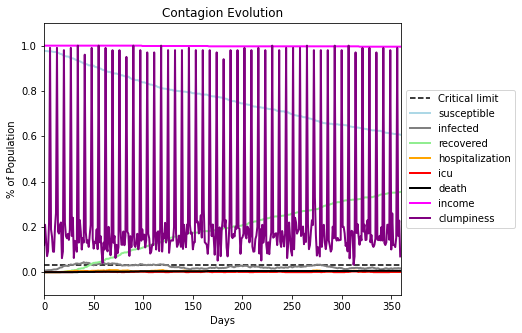

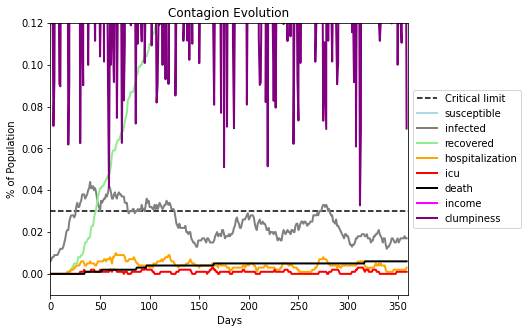

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675]
Max is 0.9768436772674389 but chosen is 0.9476859811624938 for temperature -0.9
Max is 0.9892820261698999 but chosen is 0.9542403590616713 for temperature -0.9
Max is 0.990607392442993 but chosen is 0.9071596998437507 for temperature -0.9
Max is 0.9896560237700155 but chosen is 0.9762692012482552 for temperature -0.9
Max is 0.9945085776133922 but chosen is 0.9905758298131292 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.7229126677879943 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9889793361750504 for temperature -0.9
Max is 0.9942745208138555 but chosen is 0.6980822346330893 for temperature -0.9
Max is 0.9937465021085714 but chosen is 0.9689112107201844 for temperature -0.9
Max is 0.991037459560194 but chosen is 0.9791338296363239 for temperature -0.9
Max is 0.9955574188911881 but chosen is 0.9816551090244022 for temperature -0.9
Max is 0.9948886103361596 but chosen is 0.5319592450714326 for tempe

Max is 0.9974547294093149 but chosen is 0.46762497550243165 for temperature -0.9
Max is 0.9917796560147036 but chosen is 0.9749284309625067 for temperature -0.9
Max is 0.9909615779323185 but chosen is 0.9637555320664509 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.6233030492636219 for temperature -0.9
Max is 0.9952475200982457 but chosen is 0.6545965202971687 for temperature -0.9
Max is 0.993566707219404 but chosen is 0.9615965944433791 for temperature -0.9
Max is 0.9943330047265398 but chosen is 0.42080371692299995 for temperature -0.9
Max is 0.9944382857839332 but chosen is 0.9682654996566353 for temperature -0.9
Max is 0.9954522735147888 but chosen is 0.9825032103479597 for temperature -0.9
Max is 0.9964740988555589 but chosen is 0.9893772954426665 for temperature -0.9
Max is 0.9941667449336055 but chosen is 0.7220151929211072 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.5149193764797045 for temperature -0.9
Max is 0.9910550027013728 but chosen is

Max is 0.9949446982160631 but chosen is 0.624398239819183 for temperature -0.9
Max is 0.9922865777971884 but chosen is 0.7589986230417203 for temperature -0.9
Max is 0.991729779065474 but chosen is 0.9687405291204888 for temperature -0.9
Max is 0.9953187031978317 but chosen is 0.5115723120798362 for temperature -0.9
Max is 0.9943393484040702 but chosen is 0.9686514118437962 for temperature -0.9
Max is 0.9910849516244259 but chosen is 0.9717094301934648 for temperature -0.9
Max is 0.9847419156564873 but chosen is 0.9699934440082235 for temperature -0.9
Max is 0.9926466888433889 but chosen is 0.9787941987364029 for temperature -0.9
Max is 0.9913591528737337 but chosen is 0.9545008747620974 for temperature -0.9
Max is 0.9974303871971741 but chosen is 0.6610006870239362 for temperature -0.9
Max is 0.9980001647336653 but chosen is 0.5752484871055534 for temperature -0.9
Max is 0.9888216679623478 but chosen is 0.3107317865011906 for temperature -0.9
Max is 0.9930506503428677 but chosen is 0.

Max is 0.9947450727173619 but chosen is 0.9923638845703739 for temperature -0.9
Max is 0.9954496202432678 but chosen is 0.9862399438208366 for temperature -0.9
Max is 0.9895239552198826 but chosen is 0.6447579345989979 for temperature -0.9
Max is 0.9946496926260617 but chosen is 0.6515326862012973 for temperature -0.9
Max is 0.9845645142509999 but chosen is 0.6549943106539512 for temperature -0.9
Max is 0.9932213260603127 but chosen is 0.5494786962466376 for temperature -0.9
Max is 0.9893453136587848 but chosen is 0.9891118250048208 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.9606780604408649 for temperature -0.9
Max is 0.9894577703630502 but chosen is 0.6785697133901002 for temperature -0.9
Max is 0.9869608802231461 but chosen is 0.6633882189761107 for temperature -0.9
Max is 0.9857190709895026 but chosen is 0.4341089539833869 for temperature -0.9
Max is 0.9894739062576375 but chosen is 0.40639878518029554 for temperature -0.9
Max is 0.9828550727737693 but chosen is

Max is 0.9933613932144768 but chosen is 0.984487564460074 for temperature -0.9
Max is 0.9852620643817113 but chosen is 0.3157110955818946 for temperature -0.9
Max is 0.9973244109694556 but chosen is 0.9833299604514528 for temperature -0.9
Max is 0.9908390232984652 but chosen is 0.9809679035448047 for temperature -0.9
Max is 0.9882717437785082 but chosen is 0.5329547182117647 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.2966260773629104 for temperature -0.9
Max is 0.9922610303624013 but chosen is 0.9878719618045491 for temperature -0.9
Max is 0.9875075486086498 but chosen is 0.9814739331334996 for temperature -0.9
Max is 0.9942633365508863 but chosen is 0.5368001924895761 for temperature -0.9
Max is 0.9944937846931224 but chosen is 0.9760403513434076 for temperature -0.9
Max is 0.9940651054852623 but chosen is 0.9768840286744229 for temperature -0.9
Max is 0.9951633616473119 but chosen is 0.9897565475556738 for temperature -0.9
Max is 0.9920143282145033 but chosen is 0

Max is 0.9774237769095078 but chosen is 0.9534791657462506 for temperature -0.9
Max is 0.9926537840221915 but chosen is 0.09121425046105094 for temperature -0.9
Max is 0.9887042485560409 but chosen is 0.19169576155338636 for temperature -0.9
Max is 0.9957290163918396 but chosen is 0.4592431732312478 for temperature -0.9
Max is 0.991920488242446 but chosen is 0.9918738409984603 for temperature -0.9
Max is 0.9877595583259359 but chosen is 0.97740252500486 for temperature -0.9
Max is 0.9950805307754229 but chosen is -0.2574201591651379 for temperature -0.9
Max is 0.9922400735275568 but chosen is 0.971357506127748 for temperature -0.9
Max is 0.9881192319103225 but chosen is 0.3480419703048643 for temperature -0.9
Max is 0.9882605584363763 but chosen is -0.20972753042041006 for temperature -0.9
Max is 0.983362886634224 but chosen is 0.33537059344521775 for temperature -0.9
Max is 0.9923671372708781 but chosen is -0.1507151452606921 for temperature -0.9
Max is 0.9874986680805135 but chosen i

Max is 0.9962725655022886 but chosen is 0.9793969461439075 for temperature -0.9
Max is 0.9965887973037358 but chosen is 0.9670533199806461 for temperature -0.9
Max is 0.9930506503428677 but chosen is 0.9680506138111901 for temperature -0.9
Max is 0.9939724012951734 but chosen is 0.9708027536052406 for temperature -0.9
Max is 0.9903400886408102 but chosen is 0.9714315730615755 for temperature -0.9
Max is 0.9952753213042648 but chosen is 0.9878319418514113 for temperature -0.9
Max is 0.9964347577390412 but chosen is 0.9824414900783984 for temperature -0.9
Max is 0.9942520371919317 but chosen is 0.9873702375372048 for temperature -0.9
Max is 0.9961503450515952 but chosen is 0.9916420171683289 for temperature -0.9
Max is 0.9964421958023146 but chosen is 0.9739855033599949 for temperature -0.9
Max is 0.9957978447896765 but chosen is 0.9891703363786212 for temperature -0.9
Max is 0.9967545553282025 but chosen is 0.9892610243910879 for temperature -0.9
Max is 0.9970753629662436 but chosen is 

Max is 0.9930506503428677 but chosen is 0.9716123417866281 for temperature -0.9
Max is 0.9977569844939326 but chosen is 0.9774707340834197 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9836624484632327 for temperature -0.9
Max is 0.9967545553282025 but chosen is 0.9960013277196096 for temperature -0.9
Max is 0.9969280531044222 but chosen is 0.9931129388336164 for temperature -0.9
Max is 0.9967514261723833 but chosen is 0.9941784250657406 for temperature -0.9
Max is 0.9978422495233421 but chosen is 0.9754148712033682 for temperature -0.9
Max is 0.9956587053847399 but chosen is 0.9833950522745255 for temperature -0.9
Max is 0.9962725655022886 but chosen is 0.9847662950302005 for temperature -0.9
Max is 0.994140544678861 but chosen is 0.9901535021975764 for temperature -0.9
Max is 0.9957764752429167 but chosen is 0.9819488221232314 for temperature -0.9
Max is 0.9973540804526791 but chosen is 0.9755400005668223 for temperature -0.9
Max is 0.9974547294093149 but chosen is 0

Max is 0.9946844250393884 but chosen is 0.9824547595776045 for temperature -0.9
Max is 0.9957978447896765 but chosen is 0.9860417148084196 for temperature -0.9
Max is 0.9961329384574998 but chosen is 0.9912539734287333 for temperature -0.9
Max is 0.9922107826647693 but chosen is 0.9893872345884688 for temperature -0.9
Max is 0.9956587053847399 but chosen is 0.9643594091708446 for temperature -0.9
Max is 0.9903400886408102 but chosen is 0.9756936611467165 for temperature -0.9
Max is 0.9947164839505158 but chosen is 0.9836503712067924 for temperature -0.9
Max is 0.9978422495233421 but chosen is 0.9920570780677666 for temperature -0.9
Max is 0.9979380188789237 but chosen is 0.9918822552329666 for temperature -0.9
Max is 0.9954920614243861 but chosen is 0.9870210426088656 for temperature -0.9
Max is 0.9963575841772891 but chosen is 0.985269379884929 for temperature -0.9
Max is 0.996353219997147 but chosen is 0.9853490093755941 for temperature -0.9
Max is 0.9909966289703053 but chosen is 0.

Max is 0.9964218383731753 but chosen is 0.9953246662394434 for temperature -0.9
Max is 0.9980260052404373 but chosen is 0.9861083354000157 for temperature -0.9
Max is 0.9961329384574998 but chosen is 0.9799755669701549 for temperature -0.9
tup_vec1 not in keepset of size 36
Max is 0.9956785169976592 but chosen is 0.9869735521943253 for temperature -0.9
Max is 0.9944517893041076 but chosen is 0.9841379158950988 for temperature -0.9
Max is 0.9964421958023146 but chosen is 0.9837047263052558 for temperature -0.9
Max is 0.9909966289703053 but chosen is 0.9778468387854777 for temperature -0.9
Max is 0.997086851279169 but chosen is 0.9871706386313072 for temperature -0.9
Max is 0.9964715019557848 but chosen is 0.9850509907875665 for temperature -0.9
Max is 0.9956524950057611 but chosen is 0.984601787866048 for temperature -0.9
Max is 0.9961187456286481 but chosen is 0.9747568802196034 for temperature -0.9
Max is 0.9880758814135385 but chosen is 0.9791567863496116 for temperature -0.9
Max is 

Max is 0.9959331942549424 but chosen is 0.9439857654954456 for temperature -0.9
Max is 0.9906415319596759 but chosen is 0.9821775708208365 for temperature -0.9
Max is 0.988185650135793 but chosen is 0.9558536181363388 for temperature -0.9
Max is 0.9933973491226458 but chosen is 0.9775179956541016 for temperature -0.9
Max is 0.9880261318130696 but chosen is 0.9350544613929698 for temperature -0.9
Max is 0.9744132914835381 but chosen is 0.9375107480151704 for temperature -0.9
Max is 0.9899403940623808 but chosen is 0.9625612424192785 for temperature -0.9
Max is 0.9892509710515558 but chosen is 0.9749747149925999 for temperature -0.9
Max is 0.9953877382923267 but chosen is 0.9769045759504709 for temperature -0.9
Max is 0.9948740812240634 but chosen is 0.9742117992422863 for temperature -0.9
Max is 0.9862350832519612 but chosen is 0.9579029208230305 for temperature -0.9
Max is 0.9897079480772578 but chosen is 0.9893262112196053 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0

Max is 0.9940621998096878 but chosen is 0.9620003411193796 for temperature -0.9
Max is 0.9946979657494094 but chosen is 0.9714820245538752 for temperature -0.9
Max is 0.9892151787998495 but chosen is 0.9690814392665326 for temperature -0.9
Max is 0.9944870996574955 but chosen is 0.9732352029330187 for temperature -0.9
Max is 0.9928282935814394 but chosen is 0.9673082605184453 for temperature -0.9
Max is 0.9866759917993128 but chosen is 0.9694739929338448 for temperature -0.9
Max is 0.9936788825296571 but chosen is 0.9719269553683779 for temperature -0.9
Max is 0.9886634043083559 but chosen is 0.9385800193931833 for temperature -0.9
Max is 0.979999972354827 but chosen is 0.9492157094762792 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.9283970136999792 for temperature -0.9
Max is 0.9794976793827322 but chosen is 0.9399327458806734 for temperature -0.9
Max is 0.9954066031237797 but chosen is 0.9724050156084398 for temperature -0.9
Max is 0.9868027604854656 but chosen is 0

Max is 0.9838836597084343 but chosen is 0.9679220108604295 for temperature -0.9
Max is 0.9944870996574955 but chosen is 0.9766705619333657 for temperature -0.9
Max is 0.9897734552681454 but chosen is 0.9798635577060594 for temperature -0.9
Max is 0.9933973491226458 but chosen is 0.9346730423187518 for temperature -0.9
Max is 0.9866759917993128 but chosen is 0.9619994278490595 for temperature -0.9
Max is 0.9923319078179824 but chosen is 0.9672099973944047 for temperature -0.9
Max is 0.9906415319596759 but chosen is 0.9802747495496875 for temperature -0.9
Max is 0.9901342763878007 but chosen is 0.9521596595545402 for temperature -0.9
Max is 0.9903810426807881 but chosen is 0.9645305329909214 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.9878257167194684 for temperature -0.9
Max is 0.9915699264049523 but chosen is 0.9887799764237344 for temperature -0.9
Max is 0.9897622324482244 but chosen is 0.9206785801539398 for temperature -0.9
Max is 0.976785660343546 but chosen is 0

Max is 0.9715892517961489 but chosen is 0.9570001931412607 for temperature -0.9
Max is 0.9832520772318784 but chosen is 0.9405567750464364 for temperature -0.9
Max is 0.9843481423650273 but chosen is 0.9808589072769407 for temperature -0.9
Max is 0.9720707929668977 but chosen is 0.9303374245551115 for temperature -0.9
Max is 0.9732251383736681 but chosen is 0.8921824189057366 for temperature -0.9
Max is 0.965796608765642 but chosen is 0.9154300033812337 for temperature -0.9
Max is 0.9915257390635929 but chosen is 0.9699667391815874 for temperature -0.9
Max is 0.9742742701809411 but chosen is 0.9546482472015037 for temperature -0.9
Max is 0.9794978699625952 but chosen is 0.9482599590266938 for temperature -0.9
Max is 0.9875417865410032 but chosen is 0.9662432642548164 for temperature -0.9
Max is 0.975450145546547 but chosen is 0.9379373868431939 for temperature -0.9
Max is 0.9887627105421893 but chosen is 0.9503254802080225 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.

Max is 0.9854224816781075 but chosen is 0.9291241520214345 for temperature -0.9
Max is 0.9775822191882304 but chosen is 0.9327864869120921 for temperature -0.9
Max is 0.9870656761383135 but chosen is 0.9820622557705592 for temperature -0.9
tup_vec1 not in keepset of size 15
Max is 0.9801186989193127 but chosen is 0.9576177260805645 for temperature -0.9
Max is 0.9906938527778844 but chosen is 0.9538695304074437 for temperature -0.9
Max is 0.9889628440438546 but chosen is 0.9688102190256246 for temperature -0.9
Max is 0.9805585140795381 but chosen is 0.9490560426023045 for temperature -0.9
Max is 0.9747805421865338 but chosen is 0.9403885486983649 for temperature -0.9
Max is 0.974370708235283 but chosen is 0.9583684939913335 for temperature -0.9
Max is 0.9874910090405248 but chosen is 0.9811055306334748 for temperature -0.9
Max is 0.9751840997829384 but chosen is 0.964191774679303 for temperature -0.9
Max is 0.9786526964701091 but chosen is 0.9240725230621704 for temperature -0.9
Max is 

Max is 0.98414041811675 but chosen is 0.9699643990455034 for temperature -0.9
Max is 0.9945062206180889 but chosen is 0.9724653430170632 for temperature -0.9
Max is 0.9924441167525038 but chosen is 0.9672030542253607 for temperature -0.9
Max is 0.9917213454441329 but chosen is 0.9822493783838147 for temperature -0.9
Max is 0.9968446637194017 but chosen is 0.9796180546105763 for temperature -0.9
Max is 0.9905493128418514 but chosen is 0.9807494719534692 for temperature -0.9
Max is 0.9854071741322878 but chosen is 0.9699113277110092 for temperature -0.9
Max is 0.9901822015449712 but chosen is 0.9863187105883803 for temperature -0.9
tup_vec1 not in keepset of size 4
Max is 0.9890231734693236 but chosen is 0.9885170105297179 for temperature -0.9
Max is 0.9953066003676265 but chosen is 0.9703014984482222 for temperature -0.9
Max is 0.9942975572023278 but chosen is 0.9824972808313037 for temperature -0.9
Max is 0.9947351443501258 but chosen is 0.9622282398982831 for temperature -0.9
Max is 0

Max is 0.9891663689361379 but chosen is 0.9832690904984417 for temperature -0.9
Max is 0.9889451625748235 but chosen is 0.9883000163131284 for temperature -0.9
Max is 0.9946056392744976 but chosen is 0.9921108298891279 for temperature -0.9
Max is 0.9978900997063935 but chosen is 0.9848682457176166 for temperature -0.9
Max is 0.9907897679885287 but chosen is 0.9612958285912292 for temperature -0.9
Max is 0.994244390529569 but chosen is 0.9513773065621727 for temperature -0.9
Max is 0.9819947776108859 but chosen is 0.9788385066418281 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.9831511851340756 for temperature -0.9
Max is 0.990704431060449 but chosen is 0.9748983529894276 for temperature -0.9
Max is 0.9912438756075234 but chosen is 0.9749699947826549 for temperature -0.9
tup_vec1 not in keepset of size 12
Max is 0.9905802369409709 but chosen is 0.981927011611666 for temperature -0.9
Max is 0.9902789473338618 but chosen is 0.9829926650380031 for temperature -0.9
Max is 0

Max is 0.9949147488784132 but chosen is 0.977552978114918 for temperature -0.9
Max is 0.9952753213042648 but chosen is 0.9795118634323197 for temperature -0.9
Max is 0.99153553109428 but chosen is 0.9694839303764298 for temperature -0.9
Max is 0.9939724012951734 but chosen is 0.9736476997168496 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.9913555516079835 for temperature -0.9
Max is 0.9946844250393884 but chosen is 0.9888415460756603 for temperature -0.9
Max is 0.993128598949981 but chosen is 0.9537082873825516 for temperature -0.9
Max is 0.9930506503428677 but chosen is 0.9670533199806461 for temperature -0.9
Max is 0.9965887973037358 but chosen is 0.9793969461439075 for temperature -0.9
Max is 0.9962725655022886 but chosen is 0.9885758795021056 for temperature -0.9
Max is 0.9970753629662436 but chosen is 0.9869821436029281 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9737316054185537 for temperature -0.9
Max is 0.9948224554286047 but chosen is 0.98

Max is 0.9939055735530886 but chosen is 0.9810993564416653 for temperature -0.9
Max is 0.9979380188789237 but chosen is 0.991588316048709 for temperature -0.9
Max is 0.9964715019557848 but chosen is 0.9842291971830546 for temperature -0.9
Max is 0.9921553035356936 but chosen is 0.9893664541291108 for temperature -0.9
Max is 0.9967545553282025 but chosen is 0.9856758045170116 for temperature -0.9
Max is 0.9962321946788398 but chosen is 0.9844617251958532 for temperature -0.9
Max is 0.9961329384574998 but chosen is 0.9801299641315059 for temperature -0.9
Max is 0.9935570437756418 but chosen is 0.9766339901790967 for temperature -0.9
Max is 0.9964347577390412 but chosen is 0.9944966505541801 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9894156772964966 for temperature -0.9
Max is 0.9963575841772891 but chosen is 0.9856257915846192 for temperature -0.9
Max is 0.996335174833012 but chosen is 0.9780042717214776 for temperature -0.9
Max is 0.9962725655022886 but chosen is 0.

Max is 0.9937088302963692 but chosen is 0.9796144293506921 for temperature -0.9
Max is 0.996442195802315 but chosen is 0.9757630117593684 for temperature -0.9
Max is 0.991924200975276 but chosen is 0.9670533199806461 for temperature -0.9
Max is 0.9965887973037358 but chosen is 0.9867297279473044 for temperature -0.9
Max is 0.9961459091341196 but chosen is 0.9863064311083486 for temperature -0.9
Max is 0.9951677250029598 but chosen is 0.9882596013697572 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9841450704405272 for temperature -0.9
Max is 0.9952753213042648 but chosen is 0.9744167225859561 for temperature -0.9
Max is 0.9933335322345321 but chosen is 0.9828081184054264 for temperature -0.9
Max is 0.996335174833012 but chosen is 0.9774186720233339 for temperature -0.9
Max is 0.9956524950057611 but chosen is 0.9794700694177092 for temperature -0.9
Max is 0.9961187456286481 but chosen is 0.9956266432380156 for temperature -0.9
Max is 0.9977936343146173 but chosen is 0.9

Max is 0.9962033478208941 but chosen is 0.9848656805519074 for temperature -0.9
Max is 0.9918823360302756 but chosen is 0.9612285971880373 for temperature -0.9
Max is 0.9869821436029284 but chosen is 0.9817335509275021 for temperature -0.9
Max is 0.9967070641369412 but chosen is 0.9901535021975763 for temperature -0.9
Max is 0.9956524950057611 but chosen is 0.9797902917899732 for temperature -0.9
Max is 0.9894128278556386 but chosen is 0.9818962144205378 for temperature -0.9
Max is 0.9962321946788398 but chosen is 0.9751875501565875 for temperature -0.9
Max is 0.9910546193829325 but chosen is 0.9866950134264834 for temperature -0.9
Max is 0.9952842923767286 but chosen is 0.9931416053188412 for temperature -0.9
Max is 0.9899727268225638 but chosen is 0.9837031879300935 for temperature -0.9
Max is 0.9970753629662436 but chosen is 0.9830856320834408 for temperature -0.9
Max is 0.9916059967778983 but chosen is 0.9851847005199654 for temperature -0.9
Max is 0.9963351748330123 but chosen is 

Max is 0.9942520371919317 but chosen is 0.9831631225931735 for temperature -0.9
Max is 0.9955617001210043 but chosen is 0.9836301233183766 for temperature -0.9
Max is 0.9933296166382101 but chosen is 0.9854046320206842 for temperature -0.9
Max is 0.9911807933138003 but chosen is 0.9838386949425458 for temperature -0.9
Max is 0.9897112604618281 but chosen is 0.9826831464133648 for temperature -0.9
Max is 0.9879142084260444 but chosen is 0.9810316642047491 for temperature -0.9
Max is 0.9920246987170196 but chosen is 0.9886772165220611 for temperature -0.9
Max is 0.99722848115783 but chosen is 0.9936965811408581 for temperature -0.9
tup_vec1 not in keepset of size 1
Max is 0.9935570437756418 but chosen is 0.9813817078283522 for temperature -0.9
Max is 0.9922107826647693 but chosen is 0.9860537674370716 for temperature -0.9
Max is 0.9962033478208941 but chosen is 0.987614717945624 for temperature -0.9
Max is 0.9957511501793475 but chosen is 0.992837479285205 for temperature -0.9
Max is 0.9

Max is 0.9886634043083559 but chosen is 0.9613881207540685 for temperature -0.9
Max is 0.9893569357509071 but chosen is 0.9445589879938127 for temperature -0.9
Max is 0.9942509695875449 but chosen is 0.9558547669349583 for temperature -0.9
Max is 0.9940621998096878 but chosen is 0.9614423329106772 for temperature -0.9
Max is 0.9926832036278902 but chosen is 0.9781839981582559 for temperature -0.9
Max is 0.9892064406346196 but chosen is 0.9579013067700692 for temperature -0.9
Max is 0.9889104406725305 but chosen is 0.9625606041694097 for temperature -0.9
Max is 0.9933973491226458 but chosen is 0.9789839761522907 for temperature -0.9
Max is 0.9922406848144203 but chosen is 0.9863725001156989 for temperature -0.9
Max is 0.9892509710515558 but chosen is 0.9587784870859074 for temperature -0.9
Max is 0.9866759917993128 but chosen is 0.9333566272024252 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9856753086808665 for temperature -0.9
Max is 0.9944870996574953 but chosen is 

Max is 0.9919114869057581 but chosen is 0.9778441535299153 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0.9593309779682252 for temperature -0.9
Max is 0.9808350415419282 but chosen is 0.9762312773586135 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.9715824634155896 for temperature -0.9
Max is 0.9919142257504707 but chosen is 0.9730476442136498 for temperature -0.9
Max is 0.9880261318130696 but chosen is 0.9594365780222713 for temperature -0.9
Max is 0.976785660343546 but chosen is 0.954604460356335 for temperature -0.9
Max is 0.9947267692655767 but chosen is 0.9692138849177142 for temperature -0.9
Max is 0.987631028814247 but chosen is 0.9572489437760836 for temperature -0.9
Max is 0.9901342763878007 but chosen is 0.9711691512403468 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9790832264167507 for temperature -0.9
Max is 0.9933973491226458 but chosen is 0.9747119705813162 for temperature -0.9
Max is 0.9842270896392924 but chosen is 0.9

Max is 0.9913591528737337 but chosen is 0.9760929606848415 for temperature -0.9
Max is 0.9916621963340759 but chosen is 0.946524574992778 for temperature -0.9
tup_vec1 not in keepset of size 24
Max is 0.9925593953929142 but chosen is 0.9605890600782341 for temperature -0.9
Max is 0.9759819688250978 but chosen is 0.9728205762554368 for temperature -0.9
Max is 0.9838234647845603 but chosen is 0.9757425432619408 for temperature -0.9
Max is 0.9687906837819438 but chosen is 0.9386253009859329 for temperature -0.9
Max is 0.9951710239036987 but chosen is 0.961709008626533 for temperature -0.9
Max is 0.9788772520157967 but chosen is 0.9575687103669822 for temperature -0.9
Max is 0.9853947603674806 but chosen is 0.9834788224948787 for temperature -0.9
Max is 0.9671192100701247 but chosen is 0.9182462075379383 for temperature -0.9
Max is 0.9779021789585235 but chosen is 0.974370708235283 for temperature -0.9
Max is 0.9813371616901486 but chosen is 0.9526340646460084 for temperature -0.9
Max is 0

Max is 0.9916621963340759 but chosen is 0.969285089629849 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9255326003472051 for temperature -0.9
Max is 0.9881192319103225 but chosen is 0.9657366033760421 for temperature -0.9
Max is 0.9895680365452054 but chosen is 0.9248322652208115 for temperature -0.9
Max is 0.9836531161610136 but chosen is 0.9494950228902148 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.9494112264747349 for temperature -0.9
Max is 0.990607392442993 but chosen is 0.9481161338424686 for temperature -0.9
Max is 0.9881867604658098 but chosen is 0.9604489361860391 for temperature -0.9
Max is 0.9925593953929142 but chosen is 0.9543965614925538 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.9053229384266721 for temperature -0.9
Max is 0.9783208469290721 but chosen is 0.8926670910736297 for temperature -0.9
Max is 0.9923678137824523 but chosen is 0.9632145149243193 for temperature -0.9
Max is 0.988479466616804 but chosen is 0.96

Max is 0.9908460453061537 but chosen is 0.981927741613071 for temperature -0.9
Max is 0.9955308895903989 but chosen is 0.9811220960171181 for temperature -0.9
Max is 0.9940002137615623 but chosen is 0.9883889815738037 for temperature -0.9
Max is 0.997620876542213 but chosen is 0.9939301001062628 for temperature -0.9
Max is 0.9950635350569327 but chosen is 0.9862289647089525 for temperature -0.9
Max is 0.993367135070608 but chosen is 0.9691827530900184 for temperature -0.9
Max is 0.9945062206180889 but chosen is 0.9848642645969578 for temperature -0.9
Max is 0.9966087743847842 but chosen is 0.9690070434302182 for temperature -0.9
Max is 0.9899479698181008 but chosen is 0.9863187105883803 for temperature -0.9
Max is 0.9926491029885819 but chosen is 0.9888210370798965 for temperature -0.9
Max is 0.9937921449566065 but chosen is 0.9764899947817913 for temperature -0.9
Max is 0.9942549615311325 but chosen is 0.9647362312799314 for temperature -0.9
Max is 0.9945781482487874 but chosen is 0.9

Max is 0.9959943947778871 but chosen is 0.9767480610204878 for temperature -0.9
Max is 0.9928004099064595 but chosen is 0.9826323686007348 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9854071741322878 for temperature -0.9
Max is 0.9897883359247078 but chosen is 0.9640922095782309 for temperature -0.9
Max is 0.9903216744487876 but chosen is 0.9769140748402133 for temperature -0.9
Max is 0.9926491029885819 but chosen is 0.977459070967724 for temperature -0.9
Max is 0.9861924841806567 but chosen is 0.97263319954579 for temperature -0.9
Max is 0.9871570204766289 but chosen is 0.9613672967678089 for temperature -0.9
Max is 0.9945062206180889 but chosen is 0.9724653430170632 for temperature -0.9
Max is 0.993367135070608 but chosen is 0.9769974161827021 for temperature -0.9
Max is 0.9951688191393497 but chosen is 0.9907102859746008 for temperature -0.9
Max is 0.9945128079438246 but chosen is 0.9880120557665174 for temperature -0.9
tup_vec1 not in keepset of size 31
Max is 0.

Max is 0.9926491029885819 but chosen is 0.9835831990270286 for temperature -0.9
Max is 0.9912088338417137 but chosen is 0.9779424138634226 for temperature -0.9
Max is 0.9945319001617692 but chosen is 0.9875158418365199 for temperature -0.9
Max is 0.9954077797299062 but chosen is 0.9608283934143558 for temperature -0.9
Max is 0.9910849516244259 but chosen is 0.9676635916932756 for temperature -0.9
Max is 0.9955860437128863 but chosen is 0.9773692303983653 for temperature -0.9
Max is 0.9955782046060191 but chosen is 0.9746054555491888 for temperature -0.9
Max is 0.9928359531112679 but chosen is 0.9853624639814464 for temperature -0.9
Max is 0.9937040078862007 but chosen is 0.9639220135890904 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.9510267914844935 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.9847654849746368 for temperature -0.9
Max is 0.9967179811921223 but chosen is 0.9921598946829112 for temperature -0.9
Max is 0.9951272506481531 but chosen is 

Max is 0.9927181372301189 but chosen is 0.9747544251434493 for temperature -0.9
Max is 0.9917706597645264 but chosen is 0.9807111049149746 for temperature -0.9
Max is 0.9959940623907642 but chosen is 0.9856354571373632 for temperature -0.9
Max is 0.9978819337736007 but chosen is 0.985055408047186 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.9863614262851035 for temperature -0.9
Max is 0.9965658844881623 but chosen is 0.9915157453962532 for temperature -0.9
Max is 0.997172598250379 but chosen is 0.9872334562616395 for temperature -0.9
Max is 0.993550626837188 but chosen is 0.976232198966983 for temperature -0.9
Max is 0.9950422184669684 but chosen is 0.9806932939724232 for temperature -0.9
Max is 0.9954077797299062 but chosen is 0.9827448987288547 for temperature -0.9
Max is 0.9947886551267925 but chosen is 0.9838649737657967 for temperature -0.9
Max is 0.9937198736963532 but chosen is 0.976533967437978 for temperature -0.9
Max is 0.9942904142308283 but chosen is 0.9749

Max is 0.9930501786115459 but chosen is 0.9702601340754144 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.9694793370466418 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9804758337330872 for temperature -0.9
Max is 0.9917504166948532 but chosen is 0.9770038649712033 for temperature -0.9
Max is 0.9955860437128863 but chosen is 0.9834205021917712 for temperature -0.9
Max is 0.9938854852423264 but chosen is 0.9833655464253108 for temperature -0.9
Max is 0.9904191786535299 but chosen is 0.9688438070038453 for temperature -0.9
Max is 0.9937142874057086 but chosen is 0.9548978625560501 for temperature -0.9
Max is 0.9837857492360917 but chosen is 0.9790462753779923 for temperature -0.9
Max is 0.9968714684812539 but chosen is 0.9713906837038225 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.9743450907134776 for temperature -0.9
Max is 0.9920680052673453 but chosen is 0.9807429048688859 for temperature -0.9
Max is 0.9946256718891509 but chosen is 0

Max is 0.9920743836256528 but chosen is 0.9786786535405757 for temperature -0.9
Max is 0.9908288002282875 but chosen is 0.9655395570062213 for temperature -0.9
Max is 0.9963454161338089 but chosen is 0.9763858294795378 for temperature -0.9
Max is 0.9885883019283112 but chosen is 0.9736952679350277 for temperature -0.9
Max is 0.9946713042095946 but chosen is 0.9935574967166695 for temperature -0.9
Max is 0.9965365459565032 but chosen is 0.988220536328722 for temperature -0.9
tup_vec1 not in keepset of size 30
Max is 0.9928814144246325 but chosen is 0.9833655464253107 for temperature -0.9
Max is 0.9894994914467021 but chosen is 0.9852266351088402 for temperature -0.9
Max is 0.9953001413411189 but chosen is 0.9772108571888501 for temperature -0.9
Max is 0.9950611914199823 but chosen is 0.9916337738121089 for temperature -0.9
Max is 0.9969886069276661 but chosen is 0.9809829090075289 for temperature -0.9
Max is 0.9930386508751394 but chosen is 0.9731518990232034 for temperature -0.9
Max is

Max is 0.9925567758136021 but chosen is 0.9754566082169515 for temperature -0.9
Max is 0.9928359531112679 but chosen is 0.9751282734867521 for temperature -0.9
Max is 0.9949476616613584 but chosen is 0.9816716802006582 for temperature -0.9
Max is 0.9941295924918989 but chosen is 0.9694291004312785 for temperature -0.9
Max is 0.9884661830879025 but chosen is 0.98455945847861 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9687865840910062 for temperature -0.9
Max is 0.9903706498278825 but chosen is 0.981195628254256 for temperature -0.9
Max is 0.9963454161338089 but chosen is 0.9843241553579788 for temperature -0.9
Max is 0.9896378460238753 but chosen is 0.9881595273792643 for temperature -0.9
Max is 0.9955611181883085 but chosen is 0.9942633365508863 for temperature -0.9
Max is 0.9911747625372004 but chosen is 0.9858123183960462 for temperature -0.9
Max is 0.9944838479662083 but chosen is 0.985876388421465 for temperature -0.9
Max is 0.9899444142648373 but chosen is 0.96

Max is 0.9936086799628013 but chosen is 0.9756388218535584 for temperature -0.9
Max is 0.9962558664239145 but chosen is 0.9870487803183497 for temperature -0.9
Max is 0.9936771676830265 but chosen is 0.9732856484939683 for temperature -0.9
Max is 0.9944504546197103 but chosen is 0.9846538358536105 for temperature -0.9
Max is 0.9888615284914519 but chosen is 0.9625379234533191 for temperature -0.9
Max is 0.9822764187880281 but chosen is 0.9388209650526813 for temperature -0.9
Max is 0.9913950377702777 but chosen is 0.9703035126770245 for temperature -0.9
Max is 0.9954594673100413 but chosen is 0.9799090075654177 for temperature -0.9
Max is 0.9888216679623478 but chosen is 0.9661581135081041 for temperature -0.9
Max is 0.9902743797179809 but chosen is 0.9788111363970421 for temperature -0.9
Max is 0.9911122054888365 but chosen is 0.9791278685339042 for temperature -0.9
Max is 0.991277362719849 but chosen is 0.9597961068893337 for temperature -0.9
Max is 0.9891615391777909 but chosen is 0

Max is 0.9952786083254049 but chosen is 0.9893105751927378 for temperature -0.9
Max is 0.9950321394421144 but chosen is 0.9866290604161788 for temperature -0.9
Max is 0.9908438697924233 but chosen is 0.9622715856994458 for temperature -0.9
Max is 0.9923867819338857 but chosen is 0.9713460894166944 for temperature -0.9
Max is 0.9925779513361402 but chosen is 0.9810827154407055 for temperature -0.9
Max is 0.991277362719849 but chosen is 0.9775007458579034 for temperature -0.9
Max is 0.9942282578424545 but chosen is 0.9749381420372268 for temperature -0.9
Max is 0.993953172843152 but chosen is 0.9766165117969954 for temperature -0.9
Max is 0.995101777569561 but chosen is 0.9761960654509816 for temperature -0.9
Max is 0.992097844290539 but chosen is 0.9862657376978643 for temperature -0.9
Max is 0.9944504546197103 but chosen is 0.9805573364967195 for temperature -0.9
Max is 0.9893168924434687 but chosen is 0.9808522307741758 for temperature -0.9
Max is 0.9923483780850909 but chosen is 0.96

Max is 0.9948496873763438 but chosen is 0.9740328011067633 for temperature -0.9
Max is 0.9814242302278843 but chosen is 0.962835957163943 for temperature -0.9
Max is 0.9940926087174895 but chosen is 0.9732042514533098 for temperature -0.9
Max is 0.9923474272686428 but chosen is 0.9749586418851417 for temperature -0.9
Max is 0.9905788531228122 but chosen is 0.9794971296202164 for temperature -0.9
Max is 0.9934900211712977 but chosen is 0.9887114502727008 for temperature -0.9
Max is 0.9911102735289901 but chosen is 0.9811646692920774 for temperature -0.9
Max is 0.9823463041594669 but chosen is 0.9559080036772082 for temperature -0.9
Max is 0.9906771556422325 but chosen is 0.9789233148817815 for temperature -0.9
Max is 0.997754262154387 but chosen is 0.9801190059234117 for temperature -0.9
Max is 0.9901663557117493 but chosen is 0.9738606805979109 for temperature -0.9
Max is 0.9951624308396444 but chosen is 0.9817678285918408 for temperature -0.9
Max is 0.9869164248363491 but chosen is 0.

Max is 0.9918576649278872 but chosen is 0.9771601505599402 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9774088768793076 for temperature -0.9
Max is 0.9972501084819452 but chosen is 0.989215158466322 for temperature -0.9
Max is 0.9911221045510109 but chosen is 0.9802483080466707 for temperature -0.9
Max is 0.9929613952422154 but chosen is 0.9808107391531519 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.9824518176763753 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.985679321467849 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9886302365249787 for temperature -0.9
Max is 0.9923181823969544 but chosen is 0.9811373757220759 for temperature -0.9
Max is 0.9934617848514948 but chosen is 0.9851157499618687 for temperature -0.9
Max is 0.9924157760133683 but chosen is 0.9766400926913461 for temperature -0.9
Max is 0.9946124001377068 but chosen is 0.9879534748677 for temperature -0.9
Max is 0.997754262154387 but chosen is 0.9907

Max is 0.9848956687334247 but chosen is 0.9441941268203896 for temperature -0.9
Max is 0.989562691591136 but chosen is 0.9667559076259672 for temperature -0.9
Max is 0.9873762125000594 but chosen is 0.9730841849547565 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.9772662377305592 for temperature -0.9
Max is 0.9975044834711905 but chosen is 0.9798787213366269 for temperature -0.9
Max is 0.9895629890628785 but chosen is 0.9809396326161344 for temperature -0.9
Max is 0.9956632345583425 but chosen is 0.9785876830790706 for temperature -0.9
Max is 0.9914841599531427 but chosen is 0.9693593685591492 for temperature -0.9
Max is 0.9918395004266325 but chosen is 0.9792672238538721 for temperature -0.9
tup_vec1 not in keepset of size 43
Max is 0.9875581024671259 but chosen is 0.9722018778322629 for temperature -0.9
Max is 0.9903756176919556 but chosen is 0.9892239358393901 for temperature -0.9
Max is 0.9932949705170063 but chosen is 0.9691670439437778 for temperature -0.9
Max is

Max is 0.9914655549209841 but chosen is 0.9782482514361763 for temperature -0.9
Max is 0.9894308566251638 but chosen is 0.9806980367853385 for temperature -0.9
tup_vec1 not in keepset of size 30
Max is 0.9871061394691563 but chosen is 0.9798082323353754 for temperature -0.9
Max is 0.9933545113247484 but chosen is 0.9855516708119132 for temperature -0.9
Max is 0.9894242538697805 but chosen is 0.9733856899964644 for temperature -0.9
Max is 0.9882198518472286 but chosen is 0.950858479154622 for temperature -0.9
Max is 0.984487564460074 but chosen is 0.9754508683673452 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.981978864253569 for temperature -0.9
Max is 0.9901634511111255 but chosen is 0.985172239119305 for temperature -0.9
Max is 0.9956632345583425 but chosen is 0.9864034346389577 for temperature -0.9
Max is 0.9933613932144768 but chosen is 0.9425866324331083 for temperature -0.9
Max is 0.973899641093746 but chosen is 0.9467922523348036 for temperature -0.9
Max is 0.9

Max is 0.9969886069276661 but chosen is 0.979176623600574 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.9649730996449039 for temperature -0.9
Max is 0.9937142874057086 but chosen is 0.9797159571096559 for temperature -0.9
Max is 0.9968714684812539 but chosen is 0.9862045485072074 for temperature -0.9
Max is 0.9928359531112679 but chosen is 0.9830657259396074 for temperature -0.9
Max is 0.9965658844881623 but chosen is 0.9936689091748833 for temperature -0.9
Max is 0.9961164390949627 but chosen is 0.9869952755056757 for temperature -0.9
Max is 0.9937198736963532 but chosen is 0.9928428784889525 for temperature -0.9
Max is 0.9914539531262148 but chosen is 0.9764978279813812 for temperature -0.9
Max is 0.9929184312138462 but chosen is 0.9789172304891472 for temperature -0.9
Max is 0.9928814144246325 but chosen is 0.9636444480231667 for temperature -0.9
Max is 0.9905371681690089 but chosen is 0.9848679824666102 for temperature -0.9
Max is 0.9951272506481531 but chosen is 0

Max is 0.9955782046060191 but chosen is 0.9809517293284046 for temperature -0.9
Max is 0.9916337738121089 but chosen is 0.9859427703587431 for temperature -0.9
Max is 0.9930501786115459 but chosen is 0.9739937779854866 for temperature -0.9
Max is 0.9978819337736007 but chosen is 0.9820408405518076 for temperature -0.9
Max is 0.9912486879079598 but chosen is 0.9782604395319151 for temperature -0.9
Max is 0.9927181372301189 but chosen is 0.9831110340712224 for temperature -0.9
Max is 0.9963454161338089 but chosen is 0.9777873977265669 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.983433432915575 for temperature -0.9
Max is 0.9967835442635911 but chosen is 0.9936602994142008 for temperature -0.9
Max is 0.9955581655889615 but chosen is 0.9942101441913894 for temperature -0.9
Max is 0.9950422184669682 but chosen is 0.9827673093690951 for temperature -0.9
Max is 0.9899498133800134 but chosen is 0.976579925227952 for temperature -0.9
Max is 0.9941896915858442 but chosen is 0.

Max is 0.9967179811921223 but chosen is 0.985463831167573 for temperature -0.9
Max is 0.9931206727476195 but chosen is 0.9718544672658933 for temperature -0.9
Max is 0.9946226604034517 but chosen is 0.9789348814401364 for temperature -0.9
Max is 0.9940310326964997 but chosen is 0.98641353824572 for temperature -0.9
Max is 0.9963454161338089 but chosen is 0.9836074637792686 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.9850246213572206 for temperature -0.9
Max is 0.9904463789839957 but chosen is 0.9864148065598543 for temperature -0.9
Max is 0.9932253526469081 but chosen is 0.9789995140077088 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.9863614262851035 for temperature -0.9
Max is 0.9965658844881623 but chosen is 0.9825550787548449 for temperature -0.9
Max is 0.9874445699483174 but chosen is 0.9708504735074596 for temperature -0.9
Max is 0.9941896915858442 but chosen is 0.9848345535705885 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.97

Max is 0.991696461111725 but chosen is 0.98139194020243 for temperature -0.9
Max is 0.9949476616613584 but chosen is 0.9816716802006582 for temperature -0.9
Max is 0.997172598250379 but chosen is 0.9924897462344157 for temperature -0.9
Max is 0.9967179811921223 but chosen is 0.9759073966967385 for temperature -0.9
Max is 0.9870102993757364 but chosen is 0.979882080927632 for temperature -0.9
Max is 0.9929382988346374 but chosen is 0.9781960437009342 for temperature -0.9
Max is 0.9899498133800134 but chosen is 0.9755481032406278 for temperature -0.9
Max is 0.9947227761190711 but chosen is 0.9872296476416123 for temperature -0.9
Max is 0.9955611181883085 but chosen is 0.9901845112491344 for temperature -0.9
Max is 0.9938854852423264 but chosen is 0.9725239210839316 for temperature -0.9
Max is 0.9911520603095184 but chosen is 0.9803972498132562 for temperature -0.9
Max is 0.9941896915858442 but chosen is 0.9837491532921151 for temperature -0.9
Max is 0.9944415753805643 but chosen is 0.992

Max is 0.9801429918833856 but chosen is 0.9719958273843392 for temperature -0.9
Max is 0.9928521673885186 but chosen is 0.9565720992087888 for temperature -0.9
Max is 0.9543000226461384 but chosen is 0.9417739241910259 for temperature -0.9
Max is 0.9953001413411189 but chosen is 0.9925686871396919 for temperature -0.9
Max is 0.9967179811921223 but chosen is 0.9845801025008265 for temperature -0.9
Max is 0.9944658905310745 but chosen is 0.9660557256827321 for temperature -0.9
Max is 0.9968714684812539 but chosen is 0.9924887940484394 for temperature -0.9
Max is 0.9928428784889521 but chosen is 0.9779359387057774 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.9802814683003038 for temperature -0.9
Max is 0.9963454161338089 but chosen is 0.9827234484546178 for temperature -0.9
Max is 0.9941896915858442 but chosen is 0.9788464109951619 for temperature -0.9
Max is 0.9978819337736007 but chosen is 0.989597463421889 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.9

Max is 0.9945728257499495 but chosen is 0.9843535320190535 for temperature -0.9
Max is 0.9948498962292762 but chosen is 0.9749033531655148 for temperature -0.9
Max is 0.9894059788589449 but chosen is 0.9733544372761691 for temperature -0.9
Max is 0.9935071201600073 but chosen is 0.9639040263087532 for temperature -0.9
Max is 0.9861291949397593 but chosen is 0.9536404516876615 for temperature -0.9
Max is 0.9908311061116876 but chosen is 0.9855933602823559 for temperature -0.9
Max is 0.9950419351003906 but chosen is 0.9824425575385257 for temperature -0.9
Max is 0.9894391598870562 but chosen is 0.971835700496173 for temperature -0.9
Max is 0.9900475101588104 but chosen is 0.9762311085776259 for temperature -0.9
Max is 0.9924422799065578 but chosen is 0.9747930871508655 for temperature -0.9
Max is 0.9920948009777529 but chosen is 0.9829680430742754 for temperature -0.9
Max is 0.9942940429207963 but chosen is 0.9770607361716124 for temperature -0.9
Max is 0.9917864240001467 but chosen is 0

Max is 0.9903144940591705 but chosen is 0.9731478727639864 for temperature -0.9
Max is 0.9879891939782149 but chosen is 0.97889434512283 for temperature -0.9
Max is 0.9869089949190498 but chosen is 0.961070392404031 for temperature -0.9
Max is 0.9891379587458178 but chosen is 0.9792007918902795 for temperature -0.9
Max is 0.9954594673100413 but chosen is 0.9749635362517473 for temperature -0.9
Max is 0.9939383491208547 but chosen is 0.9459423391789606 for temperature -0.9
Max is 0.9916999428373737 but chosen is 0.9689004829758618 for temperature -0.9
Max is 0.9918019821613314 but chosen is 0.9794015567235601 for temperature -0.9
Max is 0.9936086799628016 but chosen is 0.9744299757304958 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.9597923873610885 for temperature -0.9
Max is 0.9875612718351899 but chosen is 0.9810795492370463 for temperature -0.9
tup_vec1 not in keepset of size 36
Max is 0.991729779065474 but chosen is 0.9543271907618939 for temperature -0.9
Max is 0.

Max is 0.9924402175266086 but chosen is 0.9800397335769607 for temperature -0.9
Max is 0.989595580979875 but chosen is 0.9735333693676389 for temperature -0.9
Max is 0.9886797085833238 but chosen is 0.9872992517238097 for temperature -0.9
Max is 0.9922399507089129 but chosen is 0.9758245672075032 for temperature -0.9
Max is 0.9837137878195034 but chosen is 0.9667774841698353 for temperature -0.9
Max is 0.9844259795594273 but chosen is 0.9750073682307956 for temperature -0.9
Max is 0.9939360354205492 but chosen is 0.9775004204827829 for temperature -0.9
Max is 0.9815049045408654 but chosen is 0.9634665696574193 for temperature -0.9
tup_vec1 not in keepset of size 3
Max is 0.9830860832161312 but chosen is 0.961830553480631 for temperature -0.9
Max is 0.9844035340076737 but chosen is 0.9835749826425791 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.9706817795426983 for temperature -0.9
Max is 0.997754262154387 but chosen is 0.9677559770676202 for temperature -0.9
Max is 0.

Max is 0.9958876157381485 but chosen is 0.9861353646992483 for temperature -0.9
Max is 0.998057098620504 but chosen is 0.9855648698787246 for temperature -0.9
Max is 0.9951711104966154 but chosen is 0.9901436596718334 for temperature -0.9
Max is 0.9941558141483815 but chosen is 0.9779668393710733 for temperature -0.9
Max is 0.9961390229641288 but chosen is 0.9640982759575165 for temperature -0.9
Max is 0.9922141471813944 but chosen is 0.9794046786867538 for temperature -0.9
Max is 0.9953274346816732 but chosen is 0.9871101845611585 for temperature -0.9
Max is 0.9967349541873306 but chosen is 0.9857061017247245 for temperature -0.9
Max is 0.9941701329121324 but chosen is 0.9708435616002636 for temperature -0.9
Max is 0.9940070052062258 but chosen is 0.9838135467181494 for temperature -0.9
Max is 0.9911221045510109 but chosen is 0.9667774841698353 for temperature -0.9
Max is 0.9933922189426171 but chosen is 0.974589150956325 for temperature -0.9
Max is 0.9961002293247788 but chosen is 0.

Max is 0.9853496377629113 but chosen is 0.9751582365802405 for temperature -0.9
Max is 0.9839479490564386 but chosen is 0.9686622293866569 for temperature -0.9
Max is 0.989014689866114 but chosen is 0.959809230641767 for temperature -0.9
Max is 0.99366974656809 but chosen is 0.9801590110418271 for temperature -0.9
Max is 0.9923675769851794 but chosen is 0.9703516112215801 for temperature -0.9
Max is 0.9974303871971741 but chosen is 0.9690144136422822 for temperature -0.9
Max is 0.9885990521975482 but chosen is 0.9864551203143771 for temperature -0.9
Max is 0.9918697806951937 but chosen is 0.9691601310109994 for temperature -0.9
Max is 0.994160671097496 but chosen is 0.9590626979728847 for temperature -0.9
Max is 0.9935867047216667 but chosen is 0.9752594158154436 for temperature -0.9
Max is 0.9919811617160316 but chosen is 0.9760366049563654 for temperature -0.9
Max is 0.9883981381658953 but chosen is 0.9634466351579251 for temperature -0.9
Max is 0.9820185031919869 but chosen is 0.965

Max is 0.9873041718978334 but chosen is 0.9790911867812933 for temperature -0.9
Max is 0.9891241435641787 but chosen is 0.9828275746544437 for temperature -0.9
Max is 0.9909887363274836 but chosen is 0.9839790938197955 for temperature -0.9
Max is 0.995554042722042 but chosen is 0.9827712931982935 for temperature -0.9
Max is 0.9898853292087426 but chosen is 0.9607586696066402 for temperature -0.9
Max is 0.9894308566251638 but chosen is 0.9733315919193829 for temperature -0.9
Max is 0.9954640904036111 but chosen is 0.9800782639584414 for temperature -0.9
Max is 0.9945380669328193 but chosen is 0.9655367817120121 for temperature -0.9
Max is 0.9963697307740914 but chosen is 0.9689494327837042 for temperature -0.9
Max is 0.9897590356821389 but chosen is 0.9670276626228795 for temperature -0.9
Max is 0.9883284049479518 but chosen is 0.964077558969735 for temperature -0.9
Max is 0.9898894405690756 but chosen is 0.9823882024006684 for temperature -0.9
Max is 0.9888525050262232 but chosen is 0.

Max is 0.9967399662154972 but chosen is 0.9937529383365565 for temperature -0.9
Max is 0.9954522735147887 but chosen is 0.9923045067539644 for temperature -0.9
Max is 0.9953771563802011 but chosen is 0.9703505169908503 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.9668722679243923 for temperature -0.9
Max is 0.9939485133859909 but chosen is 0.9691327542903359 for temperature -0.9
Max is 0.9910027566080022 but chosen is 0.9838036118186178 for temperature -0.9
Max is 0.9974969866494328 but chosen is 0.9788429957699526 for temperature -0.9
Max is 0.9943968915795891 but chosen is 0.9683725382323637 for temperature -0.9
Max is 0.9928318162497316 but chosen is 0.9813496929545156 for temperature -0.9
Max is 0.996042146582612 but chosen is 0.9770769348642685 for temperature -0.9
Max is 0.9934313873082088 but chosen is 0.9662427745364657 for temperature -0.9
Max is 0.9955888466170218 but chosen is 0.9826960193461685 for temperature -0.9
Max is 0.996026101603972 but chosen is 0.

Max is 0.9964763740656795 but chosen is 0.9693615627166468 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.9821281800606064 for temperature -0.9
Max is 0.9953716335981927 but chosen is 0.9730363654917112 for temperature -0.9
Max is 0.996026101603972 but chosen is 0.9819427768962807 for temperature -0.9
Max is 0.9952182345174108 but chosen is 0.9861334417293847 for temperature -0.9
Max is 0.9975833708370314 but chosen is 0.9900266221202678 for temperature -0.9
Max is 0.9951066929374915 but chosen is 0.9929067105875674 for temperature -0.9
Max is 0.9949641779126642 but chosen is 0.9919336229341513 for temperature -0.9
Max is 0.9972832675223934 but chosen is 0.9883220995543227 for temperature -0.9
Max is 0.9954522735147887 but chosen is 0.9878658315128526 for temperature -0.9
Max is 0.9973949550489031 but chosen is 0.9801185861175113 for temperature -0.9
Max is 0.9908197164652608 but chosen is 0.974651783514788 for temperature -0.9
Max is 0.9945562407804641 but chosen is 0.

Max is 0.9955888466170218 but chosen is 0.9784055079231819 for temperature -0.9
Max is 0.992241650103517 but chosen is 0.9829168462884983 for temperature -0.9
Max is 0.9970958912650181 but chosen is 0.9806561741430697 for temperature -0.9
Max is 0.992586889441207 but chosen is 0.9876792059650595 for temperature -0.9
Max is 0.9964222171123321 but chosen is 0.9846519490982928 for temperature -0.9
Max is 0.9942980540640098 but chosen is 0.9875986573341763 for temperature -0.9
Max is 0.9952012869667923 but chosen is 0.9839844131843537 for temperature -0.9
Max is 0.9948873918172488 but chosen is 0.9946311817922573 for temperature -0.9
Max is 0.9932205648468154 but chosen is 0.9776404127099662 for temperature -0.9
Max is 0.9865176735247464 but chosen is 0.9846815594182131 for temperature -0.9
Max is 0.9973949550489031 but chosen is 0.9670449054547422 for temperature -0.9
Max is 0.9789656037367418 but chosen is 0.9469131736030392 for temperature -0.9
Max is 0.9943968915795891 but chosen is 0.

Max is 0.995096722149861 but chosen is 0.9783557037490014 for temperature -0.9
Max is 0.9954496202432678 but chosen is 0.9713618356489405 for temperature -0.9
Max is 0.9921331464918632 but chosen is 0.9615982326098272 for temperature -0.9
Max is 0.9809929779201515 but chosen is 0.9792615653391054 for temperature -0.9
Max is 0.9898803742185532 but chosen is 0.98388413787372 for temperature -0.9
Max is 0.9890200946645198 but chosen is 0.9786261645097007 for temperature -0.9
Max is 0.993330377314835 but chosen is 0.9901736478838327 for temperature -0.9
tup_vec1 not in keepset of size 10
Max is 0.9955888466170218 but chosen is 0.9814848393848654 for temperature -0.9
Max is 0.9811380819663224 but chosen is 0.9798441463663972 for temperature -0.9
Max is 0.9945562407804639 but chosen is 0.9903115888158136 for temperature -0.9
Max is 0.9877844684034723 but chosen is 0.9742204901122676 for temperature -0.9
Max is 0.980293557648704 but chosen is 0.9723626766602442 for temperature -0.9
Max is 0.9

Max is 0.9944382857839332 but chosen is 0.9825956242691108 for temperature -0.9
Max is 0.9956033149070209 but chosen is 0.9788831414713445 for temperature -0.9
Max is 0.9918805335135112 but chosen is 0.9813054956198598 for temperature -0.9
Max is 0.9923971657750735 but chosen is 0.9923449683402996 for temperature -0.9
Max is 0.9949495502798685 but chosen is 0.9872900492208205 for temperature -0.9
Max is 0.997559722955745 but chosen is 0.9928478302315166 for temperature -0.9
Max is 0.9955888466170218 but chosen is 0.9801927778471365 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.978417851521593 for temperature -0.9
Max is 0.9948671936883031 but chosen is 0.9937890315772214 for temperature -0.9
Max is 0.996042146582612 but chosen is 0.9927374781612323 for temperature -0.9
Max is 0.9965697541247328 but chosen is 0.978377451754905 for temperature -0.9
Max is 0.9941667449336055 but chosen is 0.9838284104239138 for temperature -0.9
Max is 0.9961724280297398 but chosen is 0.98

Max is 0.9966097019325327 but chosen is 0.9818565277966813 for temperature -0.9
Max is 0.9965262831941389 but chosen is 0.9769812281615383 for temperature -0.9
Max is 0.9906178892942356 but chosen is 0.9838593182348824 for temperature -0.9
Max is 0.9928598300746 but chosen is 0.9699178173868188 for temperature -0.9
Max is 0.9906966805436326 but chosen is 0.9574314147164603 for temperature -0.9
Max is 0.9896421415495481 but chosen is 0.9710896651664356 for temperature -0.9
Max is 0.9854975167750969 but chosen is 0.9755551670789046 for temperature -0.9
Max is 0.9900125071350716 but chosen is 0.9725827401708843 for temperature -0.9
Max is 0.9908540734532606 but chosen is 0.9837279658143272 for temperature -0.9
Max is 0.9960626206083563 but chosen is 0.9567451293122832 for temperature -0.9
Max is 0.9930282261917299 but chosen is 0.9783109301368176 for temperature -0.9
Max is 0.9943824847582465 but chosen is 0.9719661808105508 for temperature -0.9
Max is 0.9938759853079564 but chosen is 0.9

Max is 0.983362886634224 but chosen is 0.967397916832311 for temperature -0.9
Max is 0.9738429188009404 but chosen is 0.9406792568238294 for temperature -0.9
Max is 0.9924975561247504 but chosen is 0.9729579102669149 for temperature -0.9
Max is 0.9888563239744023 but chosen is 0.9756324107901814 for temperature -0.9
Max is 0.9929449112190436 but chosen is 0.9650936661933387 for temperature -0.9
Max is 0.9919326762942872 but chosen is 0.979828306046501 for temperature -0.9
Max is 0.9931392822211234 but chosen is 0.9739532441145284 for temperature -0.9
Max is 0.9942088346431928 but chosen is 0.9864432616897649 for temperature -0.9
Max is 0.9928390440747492 but chosen is 0.9887437181873103 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.976190008645843 for temperature -0.9
Max is 0.9876266082416307 but chosen is 0.9827576405731941 for temperature -0.9
Max is 0.9878719618045491 but chosen is 0.9796528541161524 for temperature -0.9
Max is 0.9929190446058453 but chosen is 0.98

Max is 0.9849865834669198 but chosen is 0.959252005732289 for temperature -0.9
Max is 0.9819224180161423 but chosen is 0.9743097523755533 for temperature -0.9
Max is 0.9923774300950959 but chosen is 0.973143866924804 for temperature -0.9
Max is 0.9848501832012443 but chosen is 0.9793674162914697 for temperature -0.9
tup_vec1 not in keepset of size 3
Max is 0.9956311237737031 but chosen is 0.9849412701699427 for temperature -0.9
Max is 0.9975593621524858 but chosen is 0.9908481460940957 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.9807092814442342 for temperature -0.9
Max is 0.9928744940373234 but chosen is 0.9776852646854428 for temperature -0.9
Max is 0.992535518567068 but chosen is 0.9796234864268122 for temperature -0.9
Max is 0.9959361514530988 but chosen is 0.990065110830599 for temperature -0.9
Max is 0.9950514778616729 but chosen is 0.9826899426398282 for temperature -0.9
Max is 0.996042009749652 but chosen is 0.9830713906623803 for temperature -0.9
Max is 0.99

Max is 0.995433934447935 but chosen is 0.9822830487086973 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9810869316859163 for temperature -0.9
Max is 0.9937205174546957 but chosen is 0.9726100687162157 for temperature -0.9
Max is 0.9959310984687739 but chosen is 0.982598725236548 for temperature -0.9
Max is 0.9959801666134683 but chosen is 0.9876228318854001 for temperature -0.9
Max is 0.9959361514530988 but chosen is 0.9833397959553872 for temperature -0.9
Max is 0.9928581624061718 but chosen is 0.9760216407918673 for temperature -0.9
Max is 0.9975593621524858 but chosen is 0.9817245518972004 for temperature -0.9
Max is 0.9923774300950959 but chosen is 0.9754420040152794 for temperature -0.9
Max is 0.9950678475704363 but chosen is 0.9870645219424511 for temperature -0.9
Max is 0.9928744940373234 but chosen is 0.9648675157674792 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.9853388188029392 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.

Max is 0.9920077221144843 but chosen is 0.9800710903626538 for temperature -0.9
Max is 0.9949673142818448 but chosen is 0.9846667190682038 for temperature -0.9
Max is 0.9946496922821096 but chosen is 0.9898739855525448 for temperature -0.9
Max is 0.9961264428168561 but chosen is 0.984744856840583 for temperature -0.9
Max is 0.99417864128316 but chosen is 0.9704358316156633 for temperature -0.9
tup_vec1 not in keepset of size 43
Max is 0.9959218482526153 but chosen is 0.9924337599031179 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.980204583462667 for temperature -0.9
Max is 0.9944697558849936 but chosen is 0.9776338949030328 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9820433895323933 for temperature -0.9
Max is 0.9918122133874276 but chosen is 0.9851098443906753 for temperature -0.9
Max is 0.9919349673138271 but chosen is 0.9751209280588982 for temperature -0.9
Max is 0.9906443318775631 but chosen is 0.9800498065404708 for temperature -0.9
Max is 0.

Max is 0.9970683085419458 but chosen is 0.984756828339441 for temperature -0.9
Max is 0.9954252019215128 but chosen is 0.9771824114866848 for temperature -0.9
Max is 0.9892816970071481 but chosen is 0.9523607470473967 for temperature -0.9
Max is 0.9874442944029415 but chosen is 0.9691132107419365 for temperature -0.9
Max is 0.9938865825414199 but chosen is 0.9824997993901418 for temperature -0.9
Max is 0.98775827734352 but chosen is 0.9781613768221489 for temperature -0.9
Max is 0.9925333580405292 but chosen is 0.9902334673688132 for temperature -0.9
Max is 0.9952098568337299 but chosen is 0.9877334242341221 for temperature -0.9
Max is 0.989951892434879 but chosen is 0.9896252042758539 for temperature -0.9
Max is 0.9906574296638921 but chosen is 0.9729852182904104 for temperature -0.9
Max is 0.9940852281525852 but chosen is 0.9797937526764473 for temperature -0.9
Max is 0.9912348558405158 but chosen is 0.9795233468924653 for temperature -0.9
Max is 0.9872434718143172 but chosen is 0.98

Max is 0.995060309359512 but chosen is 0.9860886094188807 for temperature -0.9
Max is 0.9967514261723833 but chosen is 0.988981029194413 for temperature -0.9
Max is 0.9953917289047348 but chosen is 0.989307268525131 for temperature -0.9
Max is 0.9979380188789237 but chosen is 0.9937089490353841 for temperature -0.9
Max is 0.9939027723110357 but chosen is 0.9876498625788683 for temperature -0.9
Max is 0.996591682538321 but chosen is 0.9909085565844605 for temperature -0.9
Max is 0.9961503450515952 but chosen is 0.9771920840597834 for temperature -0.9
Max is 0.9923620353147934 but chosen is 0.9782261830546151 for temperature -0.9
Max is 0.9961187456286481 but chosen is 0.9800710024436886 for temperature -0.9
Max is 0.9923638520365119 but chosen is -0.3490413372117954 for temperature -0.9
Max is 0.9901342763878007 but chosen is 0.9844428550648593 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9672228877660152 for temperature -0.9
Max is 0.9959331942549424 but chosen is 0.9

Max is 0.9965017713297109 but chosen is 0.9847381011966783 for temperature -0.9
Max is 0.9928300738972874 but chosen is 0.9645938280892524 for temperature -0.9
Max is 0.9941667449336055 but chosen is 0.9765541504345603 for temperature -0.9
Max is 0.9915906377889843 but chosen is 0.9850612289540867 for temperature -0.9
Max is 0.9923971657750735 but chosen is 0.9743846233845822 for temperature -0.9
Max is 0.9904938603567124 but chosen is 0.9581483331765664 for temperature -0.9
Max is 0.9809929779201515 but chosen is 0.9491407999103493 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.9899499422146585 for temperature -0.9
Max is 0.9973456172466202 but chosen is 0.26454396585697304 for temperature -0.9
Max is 0.9928814144246325 but chosen is 0.9713978408083433 for temperature -0.9
Max is 0.9955860437128861 but chosen is 0.9800289133356456 for temperature -0.9
Max is 0.9965658844881623 but chosen is 0.9862096230956214 for temperature -0.9
Max is 0.9940310326964997 but chosen is

Max is 0.9954496202432678 but chosen is 0.9807605066619601 for temperature -0.9
Max is 0.9910027566080022 but chosen is 0.9770193106184496 for temperature -0.9
Max is 0.9965214916468939 but chosen is 0.9842064314108702 for temperature -0.9
Max is 0.9948873918172488 but chosen is 0.9766215388250955 for temperature -0.9
Max is 0.9954522735147888 but chosen is 0.9773571651116473 for temperature -0.9
Max is 0.9923449683402996 but chosen is 0.9790921227772966 for temperature -0.9
Max is 0.9933066130517169 but chosen is 0.9752186130462437 for temperature -0.9
Max is 0.9940246913850022 but chosen is 0.5530878238342196 for temperature -0.9
Max is 0.9943867328712337 but chosen is 0.45205935343739095 for temperature -0.9
Max is 0.9973949550489031 but chosen is 0.43245374069109055 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9762325762303311 for temperature -0.9
Max is 0.9945189580306647 but chosen is 0.9834916045635567 for temperature -0.9
Max is 0.9914403265128819 but chosen i

Max is 0.9961494666819489 but chosen is 0.511186179363072 for temperature -0.9
Max is 0.9914655549209841 but chosen is 0.9462340293346901 for temperature -0.9
Max is 0.9873762125000594 but chosen is 0.4631754684079801 for temperature -0.9
Max is 0.9955308895903989 but chosen is 0.986490380683937 for temperature -0.9
Max is 0.9925949876233086 but chosen is 0.571786418846129 for temperature -0.9
Max is 0.9885990521975482 but chosen is 0.5737196519749144 for temperature -0.9
Max is 0.994244390529569 but chosen is 0.98003889093654 for temperature -0.9
Max is 0.9973244109694556 but chosen is 0.9858575615817046 for temperature -0.9
Max is 0.9976415513237673 but chosen is 0.542321550216962 for temperature -0.9
Max is 0.9896622227417835 but chosen is 0.9713074494352 for temperature -0.9
Max is 0.9887922648485571 but chosen is 0.9681620181978677 for temperature -0.9
Max is 0.9927080261568534 but chosen is 0.5450235085851723 for temperature -0.9
Max is 0.9972406974966297 but chosen is 0.63051000

Max is 0.9925225920138936 but chosen is 0.9763439340828428 for temperature -0.9
Max is 0.9926379131601253 but chosen is 0.9671138452748156 for temperature -0.9
Max is 0.9888932519717778 but chosen is 0.9590704063943434 for temperature -0.9
Max is 0.9904831266531304 but chosen is 0.9843936605772579 for temperature -0.9
Max is 0.9953859590844178 but chosen is 0.9857871539663784 for temperature -0.9
Max is 0.9900475101588104 but chosen is 0.9649088893437023 for temperature -0.9
Max is 0.9916470486158994 but chosen is 0.9835997054981617 for temperature -0.9
Max is 0.991729779065474 but chosen is 0.9733816040315159 for temperature -0.9
Max is 0.985749567309192 but chosen is 0.9781634911698104 for temperature -0.9
Max is 0.9920772835524423 but chosen is 0.5932421673824302 for temperature -0.9
Max is 0.990607392442993 but chosen is 0.9752864949713489 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.9726547005028165 for temperature -0.9
Max is 0.9918651681705885 but chosen is 0.9

Max is 0.9925017697581263 but chosen is 0.9790572292760215 for temperature -0.9
Max is 0.9932361428906024 but chosen is 0.9776266459038953 for temperature -0.9
Max is 0.9974400183546689 but chosen is 0.6039290856167707 for temperature -0.9
Max is 0.9896790331993183 but chosen is 0.6359042930002183 for temperature -0.9
Max is 0.991330878414994 but chosen is 0.6782677211246295 for temperature -0.9
Max is 0.9963697307740914 but chosen is 0.966066575037339 for temperature -0.9
Max is 0.9904112708220675 but chosen is 0.9807943687500952 for temperature -0.9
Max is 0.990621339329808 but chosen is 0.9825487141622118 for temperature -0.9
Average similarity between family and home is 0.9932500506828128 at temperature -1
Max is 0.4510229337754279 but chosen is 0.28072491946974426 for temperature -0.9
Max is 0.9942056378782647 but chosen is 0.9817273001745765 for temperature -0.9
Max is 0.9979380188789237 but chosen is 0.9899534195869955 for temperature -0.9
Max is 0.9974547294093149 but chosen is

Max is 0.9855072035373033 but chosen is -0.08452206386084951 for temperature -0.9
Max is 0.9871469674073768 but chosen is -0.23573041543606219 for temperature -0.9
Max is 0.9903115888158138 but chosen is 0.9711778588030722 for temperature -0.9
Max is 0.9838123454538434 but chosen is 0.9627214562843958 for temperature -0.9
Max is 0.994512019076664 but chosen is 0.4157661634559209 for temperature -0.9
Max is 0.6202622643357826 but chosen is 0.4988138087188279 for temperature -0.9
Max is 0.989276057518467 but chosen is 0.9522515623043414 for temperature -0.9
Max is 0.9934650580931402 but chosen is -0.1948438190332529 for temperature -0.9
Max is 0.9936569289917468 but chosen is 0.4458189916987085 for temperature -0.9
Max is 0.9956033149070209 but chosen is 0.988516245259906 for temperature -0.9
Max is 0.9851634714523195 but chosen is -0.6110683594714204 for temperature -0.9
Max is 0.597253806484731 but chosen is 0.5740468869044918 for temperature -0.9
Max is 0.9926960642885633 but chosen i

Max is 0.9929631471667688 but chosen is 0.06427165594928792 for temperature -0.9
Max is 0.63037713947712 but chosen is 0.5386433799714505 for temperature -0.9
Max is 0.9875173916208899 but chosen is 0.26604770889702356 for temperature -0.9
Max is 0.6848323355748184 but chosen is 0.3652347724329688 for temperature -0.9
Max is 0.9894308566251638 but chosen is 0.974973938578332 for temperature -0.9
Max is 0.9947576853611234 but chosen is 0.46191671190830635 for temperature -0.9
Max is 0.11597792468259595 but chosen is 0.04185887071819871 for temperature -0.9
Max is 0.5514524206252007 but chosen is 0.3202115336176397 for temperature -0.9
Max is 0.9953066003676265 but chosen is 0.11712909062691622 for temperature -0.9
Max is 0.9943712476129342 but chosen is 0.9808221690797918 for temperature -0.9
Max is -0.05901760814751297 but chosen is -0.10978083423042831 for temperature -0.9
Max is 0.9891221827197333 but chosen is 0.6068881517807792 for temperature -0.9
Average similarity between studen

Max is 0.9931695905094934 but chosen is 0.7039980160122182 for temperature -0.9
Max is 0.9907715046609523 but chosen is 0.972391787908968 for temperature -0.9
Max is 0.9901634511111255 but chosen is 0.5559414377273911 for temperature -0.9
Max is 0.9918651681705885 but chosen is 0.46814890386942126 for temperature -0.9
Max is 0.2592247962697847 but chosen is 0.06531983631505957 for temperature -0.9
Max is 0.9867537459178319 but chosen is -0.15405273566047537 for temperature -0.9
Max is 0.9952143231012781 but chosen is -0.06558348306391278 for temperature -0.9
Max is 0.9890331409271054 but chosen is 0.002703498068716973 for temperature -0.9
Max is 0.9889981821087716 but chosen is 0.3719956700672522 for temperature -0.9
Max is 0.9854224816781075 but chosen is 0.0006993181372892069 for temperature -0.9
Max is 0.9889051306426979 but chosen is 0.24772146317715396 for temperature -0.9
Max is 0.24400549701720045 but chosen is 0.12007600385433032 for temperature -0.9
Max is 0.9855675503432109 b

Max is 0.9911445280634736 but chosen is 0.6776124143013362 for temperature -0.9
Max is 0.9951388343984915 but chosen is 0.36950687130866866 for temperature -0.9
Max is 0.3953778986947671 but chosen is 0.1800438071694185 for temperature -0.9
Max is 0.9930698671220736 but chosen is 0.9814242183195951 for temperature -0.9
Max is 0.23486075023269604 but chosen is 0.12428983947540045 for temperature -0.9
Max is 0.9948968523242637 but chosen is 0.2949571073631047 for temperature -0.9
Max is 0.9923642399145574 but chosen is -0.03330232790145238 for temperature -0.9
Max is 0.9923998327685709 but chosen is 0.4028954056258374 for temperature -0.9
Max is 0.9817801791355142 but chosen is 0.9460482396277469 for temperature -0.9
Max is 0.9816654695092125 but chosen is 0.9639657170372351 for temperature -0.9
Max is 0.4171172592623819 but chosen is 0.2074375687955723 for temperature -0.9
Max is 0.24245787204397073 but chosen is 0.02250756378357277 for temperature -0.9
Max is 0.9852466049363855 but cho

Max is 0.9933973491226458 but chosen is 0.3590857821878337 for temperature -0.9
Max is 0.9813868957459775 but chosen is 0.26155929321232535 for temperature -0.9
Max is 0.9961045390856131 but chosen is 0.9863321356820345 for temperature -0.9
Max is 0.9947050097617687 but chosen is 0.4882553357737464 for temperature -0.9
Max is 0.9857776313386547 but chosen is 0.555949407293911 for temperature -0.9
Max is 0.15662603199564057 but chosen is 0.08713135936526771 for temperature -0.9
Max is 0.9896424986838446 but chosen is -0.11828612970248978 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.23156307394423725 for temperature -0.9
Max is 0.9936016048763382 but chosen is -0.20318251318544853 for temperature -0.9
Max is 0.41830376043290046 but chosen is 0.27714681407507197 for temperature -0.9
Max is 0.9926908324117317 but chosen is 0.9863054335854942 for temperature -0.9
Max is 0.3865276496675319 but chosen is 0.20441874056307305 for temperature -0.9
Max is 0.3023241555515799 but 

Max is 0.992535518567068 but chosen is 0.9702869019835774 for temperature -0.9
Max is 0.9892132454556074 but chosen is -0.05093067723635433 for temperature -0.9
Max is 0.9874857360416855 but chosen is 0.3887423850521609 for temperature -0.9
Max is 0.9843641188463456 but chosen is 0.270887875262385 for temperature -0.9
Max is 0.9876288225128464 but chosen is 0.950887259401693 for temperature -0.9
Max is 0.993330377314835 but chosen is 0.39977510650878095 for temperature -0.9
Max is 0.9935867811474016 but chosen is 0.5346804209774014 for temperature -0.9
Max is 0.9856997065002466 but chosen is 0.9793558686892938 for temperature -0.9
Max is 0.3687724565064488 but chosen is 0.05441842894768709 for temperature -0.9
Max is 0.9909521830359966 but chosen is 0.3060961084678648 for temperature -0.9
Max is 0.9912508318730692 but chosen is 0.9757470288498873 for temperature -0.9
Max is 0.9892614653323777 but chosen is 0.9762711196623045 for temperature -0.9
Max is 0.9974969866494328 but chosen is 

Max is 0.9957857567286407 but chosen is 0.026352415839227632 for temperature -0.9
Max is 0.9870069481786118 but chosen is 0.5512033226244658 for temperature -0.9
Max is 0.9777960949139127 but chosen is 0.048266403791590674 for temperature -0.9
Max is 0.4316637458130203 but chosen is 0.29506031840679287 for temperature -0.9
Max is 0.9888583986097532 but chosen is 0.44576220208019435 for temperature -0.9
Max is 0.98558735175363 but chosen is 0.7279595258773754 for temperature -0.9
Max is 0.41086746159843046 but chosen is 0.19526764675715966 for temperature -0.9
Max is 0.9957764752429167 but chosen is 0.9913647789658204 for temperature -0.9
Max is 0.9885058362443296 but chosen is 0.9853219813619294 for temperature -0.9
Max is 0.9906938527778844 but chosen is 0.9829057806783368 for temperature -0.9
Max is 0.9858873559903489 but chosen is 0.9741109138730448 for temperature -0.9
Max is 0.9961329384574998 but chosen is 0.3387155211399156 for temperature -0.9
Max is 0.4498172507381627 but chos

Average similarity between workers is 0.44338186301541693 at temperature -0.9
Max is 0.2596193895288833 but chosen is -0.40260341561388496 for temperature -0.9
Max is 0.2596193895288833 but chosen is -0.09003650917226937 for temperature -0.9
Max is 0.2596193895288833 but chosen is -0.06878684475939363 for temperature -0.9
Max is 0.2596193895288833 but chosen is -0.4324167123957674 for temperature -0.9
Max is 0.2596193895288833 but chosen is -0.08597336265711934 for temperature -0.9
Max is 0.2596193895288833 but chosen is -0.06508870007496878 for temperature -0.9
Max is -0.35141773395858433 but chosen is -0.547716680349769 for temperature -0.9
Max is 0.35235666620073414 but chosen is -0.062197572532216965 for temperature -0.9
Max is 0.35235666620073414 but chosen is 0.06584668350044162 for temperature -0.9
Max is 0.036692213649437505 but chosen is -0.4416534658523546 for temperature -0.9
Max is 0.036692213649437505 but chosen is -0.001295641791401711 for temperature -0.9
Max is -0.04387

Max is 0.38947347415950634 but chosen is 0.14267278135030015 for temperature -0.9
Max is 0.38947347415950634 but chosen is -0.2396828489153404 for temperature -0.9
Max is 0.38947347415950634 but chosen is 0.09609239790695301 for temperature -0.9
Max is 0.1639836041392705 but chosen is 0.06343319723670025 for temperature -0.9
Max is 0.1639836041392705 but chosen is -0.04326130226932933 for temperature -0.9
Max is 0.1639836041392705 but chosen is -0.10536573887565254 for temperature -0.9
Max is 0.1639836041392705 but chosen is 0.01939290937384691 for temperature -0.9
Max is 0.1639836041392705 but chosen is -0.22888663599812104 for temperature -0.9
Max is 0.1639836041392705 but chosen is -0.08998577636495259 for temperature -0.9
Max is -0.03701888479955149 but chosen is -0.12011161170239194 for temperature -0.9
Max is -0.04470436631926524 but chosen is -0.12634116647134105 for temperature -0.9
Max is -0.04470436631926524 but chosen is -0.6406175427709193 for temperature -0.9
Max is -0.044

Max is 0.9844857399240395 but chosen is 0.6980999375834627 for temperature -0.9
Max is 0.9844857399240395 but chosen is 0.2617760921082007 for temperature -0.9
Max is 0.9844857399240395 but chosen is 0.21862996146883662 for temperature -0.9
Max is 0.9844857399240395 but chosen is 0.6731637666272916 for temperature -0.9
Max is 0.9844857399240395 but chosen is 0.0465142956332245 for temperature -0.9
Max is 0.9844857399240395 but chosen is 0.6409241306027037 for temperature -0.9
Max is 0.6966022742876238 but chosen is 0.26454396585697304 for temperature -0.9
Max is 0.6966022742876238 but chosen is -0.21158999648169705 for temperature -0.9
Max is 0.4325686939213 but chosen is 0.028284134656018072 for temperature -0.9
Max is -0.15341692154400216 but chosen is -0.21245270058107424 for temperature -0.9
Max is -0.15341692154400216 but chosen is -0.25962729734034007 for temperature -0.9
Max is -0.29625210013487563 but chosen is -0.3466906697607786 for temperature -0.9
Max is -0.2962521001348756

Max is 0.37130345099895035 but chosen is 0.02351111539738085 for temperature -0.9
Max is 0.37130345099895035 but chosen is 0.10904128647595607 for temperature -0.9
Max is 0.37130345099895035 but chosen is -0.051360131953232586 for temperature -0.9
Max is 0.37130345099895035 but chosen is 0.21932130716554768 for temperature -0.9
Max is 0.37130345099895035 but chosen is 0.15783227009981984 for temperature -0.9
Max is 0.1997018727741518 but chosen is 0.10466506001876076 for temperature -0.9
Max is -0.19407085456766954 but chosen is -0.30281075012759023 for temperature -0.9
Max is -0.09357466751383758 but chosen is -0.1348313281994936 for temperature -0.9
Max is -0.09357466751383758 but chosen is -0.5814416684297558 for temperature -0.9
Max is -0.09357466751383758 but chosen is -0.15948546877951877 for temperature -0.9
Max is -0.1574246790104548 but chosen is -0.30247840139751453 for temperature -0.9
Max is -0.1574246790104548 but chosen is -0.6191256923911146 for temperature -0.9
Max is -

Max is 0.9808350415419282 but chosen is -0.20006323703450812 for temperature -0.9
Max is 0.9808350415419282 but chosen is 0.9739465003360102 for temperature -0.9
Max is 0.9808350415419282 but chosen is 0.9604288559677595 for temperature -0.9
Max is 0.9808350415419282 but chosen is 0.2964977698677788 for temperature -0.9
Max is 0.9808350415419282 but chosen is 0.1268713113266985 for temperature -0.9
Max is 0.9637494851443699 but chosen is 0.7036571700816414 for temperature -0.9
Max is 0.9637494851443699 but chosen is 0.02945279812367382 for temperature -0.9
Max is 0.32769016559316494 but chosen is 0.2286189509002072 for temperature -0.9
Max is 0.2185514501004028 but chosen is -0.043918392791103635 for temperature -0.9
Max is 0.2185514501004028 but chosen is -0.10557548548429534 for temperature -0.9
Max is 0.07342969265244635 but chosen is -0.02079618045166407 for temperature -0.9
Max is 0.07342969265244635 but chosen is -0.5317873403462935 for temperature -0.9
Max is 0.07342969265244635

Max is 0.4222573925775726 but chosen is -0.11917210657509161 for temperature -0.9
Max is 0.4222573925775726 but chosen is -0.31725779308358865 for temperature -0.9
Max is 0.14014464873625967 but chosen is -0.10746333395408542 for temperature -0.9
Max is 0.14014464873625967 but chosen is -0.188023529197635 for temperature -0.9
Max is 0.14014464873625967 but chosen is -0.31115681296475983 for temperature -0.9
Max is 0.14014464873625967 but chosen is -0.25978909341342304 for temperature -0.9
Max is 0.14014464873625967 but chosen is -0.12009732202381121 for temperature -0.9
Max is 0.14014464873625967 but chosen is -0.4297619951191605 for temperature -0.9
Max is 0.2857921371623149 but chosen is -0.6157849107561353 for temperature -0.9
Max is 0.2857921371623149 but chosen is -0.6321260813892754 for temperature -0.9
Max is -0.10054712150327871 but chosen is -0.15357750069070272 for temperature -0.9
Max is -0.10054712150327871 but chosen is -0.5327529112498124 for temperature -0.9
Max is -0.29

Max is 0.4796714073321429 but chosen is -0.19283650940396024 for temperature -0.9
Max is 0.4796714073321429 but chosen is -0.5808644377039716 for temperature -0.9
Max is 0.4796714073321429 but chosen is -0.5476020588765449 for temperature -0.9
Max is -0.14707462161223445 but chosen is -0.24764551681020464 for temperature -0.9
Max is -0.14707462161223445 but chosen is -0.1786442351795514 for temperature -0.9
Max is -0.5263341382873334 but chosen is -0.6178543391947117 for temperature -0.9
Max is 0.5411974760390602 but chosen is 0.3505430949999687 for temperature -0.9
Max is 0.3550939641322607 but chosen is 0.3445777144918875 for temperature -0.9
Max is 0.3550939641322607 but chosen is -0.14918983459416615 for temperature -0.9
Max is 0.34706866784519197 but chosen is 0.3075637242052848 for temperature -0.9
Max is 0.3448280268808287 but chosen is 0.3140425382615203 for temperature -0.9
Max is 0.9700073789583449 but chosen is 0.15725477841936483 for temperature -0.9
Max is 0.56852705222040

Max is 0.38959667846035123 but chosen is 0.23670970426522872 for temperature -0.9
Max is 0.38959667846035123 but chosen is -0.008180196068825047 for temperature -0.9
Max is 0.38959667846035123 but chosen is 0.11978895857856617 for temperature -0.9
Max is 0.38959667846035123 but chosen is 0.14654842190406403 for temperature -0.9
Max is 0.20817938997229596 but chosen is -0.04858702235300317 for temperature -0.9
Max is 0.20817938997229596 but chosen is -0.3191594857660174 for temperature -0.9
Max is 0.20817938997229596 but chosen is -0.042188029737539816 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.4362156932727947 for temperature -0.9
Max is 0.3632196938702459 but chosen is 0.04585840916269888 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.11495842805397548 for temperature -0.9
Max is 0.3632196938702459 but chosen is -0.43486736872279336 for temperature -0.9
Max is 0.3632196938702459 but chosen is 0.024020237408634997 for temperature -0.9
Max is 0.3632

Max is 0.9703505169908503 but chosen is 0.30402918058832895 for temperature -0.9
Max is 0.6701836595237376 but chosen is -0.39311466577868437 for temperature -0.9
Max is 0.6701836595237376 but chosen is 0.6286476526408266 for temperature -0.9
Max is 0.6701836595237376 but chosen is 0.2949396634387354 for temperature -0.9
Max is 0.6701836595237376 but chosen is -0.1560819895958696 for temperature -0.9
Max is 0.6701836595237376 but chosen is 0.5948832900212915 for temperature -0.9
Max is 0.6701836595237376 but chosen is 0.10632303354681404 for temperature -0.9
Max is 0.6701836595237376 but chosen is -0.21707004209112032 for temperature -0.9
Max is 0.6701836595237376 but chosen is 0.6560292905399145 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.15927721592683472 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.20177257624959397 for temperature -0.9
Max is 0.1835887665203243 but chosen is -0.01591550834096251 for temperature -0.9
Max is 0.1835887665203243 b

Max is 0.9916303710715964 but chosen is 0.6870040751704448 for temperature -0.9
Max is 0.9916303710715964 but chosen is -0.025769243305903508 for temperature -0.9
Max is 0.9916303710715964 but chosen is 0.6735782270250533 for temperature -0.9
Max is 0.9916303710715964 but chosen is 0.18529841709495296 for temperature -0.9
Max is 0.9916303710715964 but chosen is -0.24497968042891843 for temperature -0.9
Max is 0.9916303710715964 but chosen is -0.15659256756548554 for temperature -0.9
Max is 0.6268484915819839 but chosen is 0.1851150124954895 for temperature -0.9
Max is 0.6268484915819839 but chosen is 0.15164907469303254 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.9748765884953335 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.14083563518881562 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.9744676158568524 for temperature -0.9
Max is 0.9847413327243624 but chosen is 0.21017221584976994 for temperature -0.9
Max is 0.9705329326345106 but

Max is -0.11041251545559848 but chosen is -0.3288305485834402 for temperature -0.9
Max is -0.11041251545559848 but chosen is -0.15576496875081663 for temperature -0.9
Max is -0.11041251545559848 but chosen is -0.32009107088020033 for temperature -0.9
Max is -0.11041251545559848 but chosen is -0.2258622919853753 for temperature -0.9
Max is -0.11041251545559848 but chosen is -0.22865550311594543 for temperature -0.9
Max is -0.11041251545559848 but chosen is -0.14451726934124354 for temperature -0.9
Max is 0.18535642154647408 but chosen is -0.2237358213648847 for temperature -0.9
Max is 0.18535642154647408 but chosen is 0.17945208693041134 for temperature -0.9
Max is 0.18535642154647408 but chosen is 0.11676869198948168 for temperature -0.9
Max is 0.18535642154647408 but chosen is -0.19129638970566695 for temperature -0.9
Max is 0.06597775844338798 but chosen is -0.26306211924617456 for temperature -0.9
Max is 0.06597775844338798 but chosen is -0.06619166190438605 for temperature -0.9
Max

Max is 0.9864954886973493 but chosen is 0.3423864966997773 for temperature -0.9
Max is 0.9864954886973493 but chosen is 0.21703513850953438 for temperature -0.9
Max is 0.9864954886973493 but chosen is 0.1644223863970244 for temperature -0.9
Max is 0.9864954886973493 but chosen is 0.6840121645071604 for temperature -0.9
Max is 0.9799073645785119 but chosen is 0.9724116631739376 for temperature -0.9
Max is 0.9799073645785119 but chosen is 0.165128584056639 for temperature -0.9
Max is 0.34250706596038627 but chosen is -0.0340542106220209 for temperature -0.9
Max is 0.026752670996360244 but chosen is -0.4823486577552251 for temperature -0.9
Max is 0.026752670996360244 but chosen is -0.4404856996351535 for temperature -0.9
Max is 0.026752670996360244 but chosen is -0.09004767608676076 for temperature -0.9
Max is 0.026752670996360244 but chosen is -0.4558840012379934 for temperature -0.9
Max is 0.026752670996360244 but chosen is -0.5546475692714712 for temperature -0.9
Max is 0.0267526709963

Max is 0.9745782509407425 but chosen is -0.3024075877661729 for temperature -0.9
Max is 0.9745782509407425 but chosen is -0.06911982078185215 for temperature -0.9
Max is 0.9745782509407425 but chosen is -0.2701779331547351 for temperature -0.9
Max is 0.15640013875927067 but chosen is -0.052123456466074816 for temperature -0.9
Max is 0.15640013875927067 but chosen is -0.23471226793477012 for temperature -0.9
Max is 0.15640013875927067 but chosen is -0.18651694418264034 for temperature -0.9
Max is 0.9638441500123373 but chosen is 0.41424536178596966 for temperature -0.9
Max is 0.9638441500123373 but chosen is 0.11388219191162484 for temperature -0.9
Max is 0.9638441500123373 but chosen is 0.446549880431076 for temperature -0.9
Max is 0.9638441500123373 but chosen is -0.05949194987391079 for temperature -0.9
Max is 0.9638441500123373 but chosen is 0.4884983833818617 for temperature -0.9
Max is 0.9638441500123373 but chosen is 0.1006104052260993 for temperature -0.9
Max is 0.96384415001233

Max is 0.9811740489644065 but chosen is 0.9799832548863058 for temperature -0.9
Max is 0.9811740489644065 but chosen is 0.6883014957855168 for temperature -0.9
Max is 0.9811740489644065 but chosen is 0.31025779093561506 for temperature -0.9
Max is 0.9811740489644065 but chosen is 0.9768724117472303 for temperature -0.9
Max is 0.4081868815680182 but chosen is 0.21226087524979864 for temperature -0.9
Max is 0.22213321569136257 but chosen is -0.17737219919033145 for temperature -0.9
Max is 0.22213321569136257 but chosen is -0.024787248961064757 for temperature -0.9
Max is 0.22213321569136257 but chosen is -0.03061187496224908 for temperature -0.9
Max is 0.22213321569136257 but chosen is -0.11071137460751497 for temperature -0.9
Max is 0.22213321569136257 but chosen is -0.16217510987942046 for temperature -0.9
Max is 0.22213321569136257 but chosen is -0.21778625114269204 for temperature -0.9
Max is -0.6235709232677966 but chosen is -0.6399451663778082 for temperature -0.9
Max is -0.6235709

Max is 0.17485440690151768 but chosen is 0.08193411213927815 for temperature -0.9
Max is 0.102268421206947 but chosen is -0.17828849404864058 for temperature -0.9
Max is 0.42039052020552714 but chosen is 0.03792150769486597 for temperature -0.9
Max is 0.42039052020552714 but chosen is -0.1435786674115906 for temperature -0.9
Max is 0.42039052020552714 but chosen is 0.026954646046978024 for temperature -0.9
Max is 0.42039052020552714 but chosen is -0.2583959814941316 for temperature -0.9
Max is -0.141634334782892 but chosen is -0.29301074382242864 for temperature -0.9
Max is -0.25183837822565425 but chosen is -0.3346278408086553 for temperature -0.9
Max is -0.25183837822565425 but chosen is -0.35588265240811456 for temperature -0.9
Max is 0.30817603075169697 but chosen is 0.020787433204863107 for temperature -0.9
Max is 0.30817603075169697 but chosen is 0.01183137288747862 for temperature -0.9
Max is 0.30817603075169697 but chosen is -0.1256563049842693 for temperature -0.9
Max is 0.129

Max is 0.36901781839644027 but chosen is 0.24168791611688337 for temperature -0.9
Max is 0.36901781839644027 but chosen is 0.3185201747627627 for temperature -0.9
Max is 0.9794863164217282 but chosen is 0.6501450553879767 for temperature -0.9
Max is 0.7371897836694232 but chosen is -0.2738065997856742 for temperature -0.9
Max is 0.7371897836694232 but chosen is 0.7176305847130053 for temperature -0.9
Max is 0.7011480763833511 but chosen is 0.2573136316051831 for temperature -0.9
Max is 0.7011480763833511 but chosen is -0.1392130407539874 for temperature -0.9
Max is 0.7011480763833511 but chosen is 0.12475528434668191 for temperature -0.9
Max is 0.24621372528349345 but chosen is 0.20257506571573164 for temperature -0.9
Max is 0.974693727859478 but chosen is 0.06461947327886186 for temperature -0.9
Max is 0.974693727859478 but chosen is 0.961748173544617 for temperature -0.9
Max is 0.974693727859478 but chosen is 0.6507466645623073 for temperature -0.9
Max is 0.974693727859478 but chosen

Max is 0.995141743897474 but chosen is 0.982842538222856 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.34884400807439836 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.10489674159762491 for temperature -0.9
Max is 0.995141743897474 but chosen is 0.2889452559492753 for temperature -0.9
Max is 0.9761534322804768 but chosen is 0.24600293041959753 for temperature -0.9
Max is 0.9761534322804768 but chosen is 0.3379407911724221 for temperature -0.9
Max is 0.4292078169483166 but chosen is 0.2870372588162082 for temperature -0.9
Max is 0.9735112699170049 but chosen is 0.01037553404485424 for temperature -0.9
Max is 0.9735112699170049 but chosen is 0.06280619946551516 for temperature -0.9
Max is 0.9735112699170049 but chosen is 0.1210055704097348 for temperature -0.9
Max is 0.9735112699170049 but chosen is -0.025428283814293903 for temperature -0.9
Max is 0.9735112699170049 but chosen is -0.09977336617341129 for temperature -0.9
Max is 0.9735112699170049 but chose

Max is 0.9837899493102837 but chosen is 0.195563229343738 for temperature -0.9
Max is 0.9837899493102837 but chosen is 0.9752804701862309 for temperature -0.9
Max is 0.967838339684289 but chosen is 0.20237589994640048 for temperature -0.9
Max is 0.967838339684289 but chosen is 0.4778860448759406 for temperature -0.9
Max is 0.967838339684289 but chosen is 0.34468921424616367 for temperature -0.9
Max is 0.967838339684289 but chosen is 0.1522076701658488 for temperature -0.9
Max is 0.967838339684289 but chosen is 0.258021303409275 for temperature -0.9
Max is 0.967838339684289 but chosen is 0.08162036344914432 for temperature -0.9
Max is 0.24659720284890588 but chosen is -0.16692893203920953 for temperature -0.9
Max is 0.24659720284890588 but chosen is -0.0014020150764351182 for temperature -0.9
Max is 0.24659720284890588 but chosen is -0.00480637527899 for temperature -0.9
Max is 0.24659720284890588 but chosen is -0.09243982135725992 for temperature -0.9
Max is -0.17461383451556423 but ch

Max is 0.9938854852423264 but chosen is 0.16318301336815522 for temperature -0.9
Max is 0.9938854852423264 but chosen is 0.2800691751986515 for temperature -0.9
Max is 0.9938854852423264 but chosen is 0.9833655464253108 for temperature -0.9
Max is 0.9938854852423264 but chosen is 0.2972734196891825 for temperature -0.9
Max is 0.9938854852423264 but chosen is 0.3496163323834543 for temperature -0.9
Max is 0.9819291694115792 but chosen is 0.25013523944323146 for temperature -0.9
Max is 0.9819291694115792 but chosen is 0.49111542776978023 for temperature -0.9
Max is 0.9819291694115792 but chosen is 0.051016001595002115 for temperature -0.9
Max is 0.9819291694115792 but chosen is 0.5216921880557357 for temperature -0.9
Max is 0.568863547275149 but chosen is 0.04334230548352708 for temperature -0.9
Max is 0.568863547275149 but chosen is 0.060634544491080314 for temperature -0.9
Max is 0.568863547275149 but chosen is -0.06909230426613233 for temperature -0.9
Max is 0.23533603680375814 but ch

Max is -0.03562687925768592 but chosen is -0.20213713920360643 for temperature -0.9
Max is -0.5803961667801959 but chosen is -0.6212146112320941 for temperature -0.9
Max is 0.04620161891575461 but chosen is -0.6393738373023735 for temperature -0.9
Max is 0.013273075573703701 but chosen is -0.6188502777285884 for temperature -0.9
Max is 0.013273075573703701 but chosen is -0.18762172329725466 for temperature -0.9
Max is -0.06865554069660289 but chosen is -0.6290907114979281 for temperature -0.9
Max is -0.06865554069660289 but chosen is -0.11808334157427981 for temperature -0.9
Max is 0.27208995438682454 but chosen is -0.07567191539312673 for temperature -0.9
Max is 0.27208995438682454 but chosen is -0.2602496423103294 for temperature -0.9
Max is -0.0020017084975078423 but chosen is -0.03932028220901458 for temperature -0.9
Max is -0.09407710454269752 but chosen is -0.60824274943168 for temperature -0.9
Max is -0.5417937722053572 but chosen is -0.6224658793498872 for temperature -0.9
Max 

Max is -0.03088606337615219 but chosen is -0.08931959202706788 for temperature -0.9
Max is -0.033360883508677316 but chosen is -0.3938458207229688 for temperature -0.9
Max is -0.033360883508677316 but chosen is -0.2929751217342115 for temperature -0.9
Max is -0.033360883508677316 but chosen is -0.18485550930145037 for temperature -0.9
Max is -0.2991944989004668 but chosen is -0.33773634690540943 for temperature -0.9
Max is 0.9870894161247752 but chosen is 0.9673055681599614 for temperature -0.9
Max is 0.9870894161247752 but chosen is 0.18998500931753046 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.285913816112942 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.23992667061160783 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.15474287357805677 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.2868783114588662 for temperature -0.9
Max is 0.9789172304891472 but chosen is 0.5433321077982058 for temperature -0.9
Max is 0.978917230

Max is -0.052348654514473444 but chosen is -0.5276268008303739 for temperature -0.9
Max is -0.052348654514473444 but chosen is -0.5698494771578217 for temperature -0.9
Max is -0.052348654514473444 but chosen is -0.1556978902950728 for temperature -0.9
Max is -0.052348654514473444 but chosen is -0.6299728379710833 for temperature -0.9
Max is -0.20236454393518433 but chosen is -0.5466046651781991 for temperature -0.9
Max is -0.20236454393518433 but chosen is -0.4855670349938658 for temperature -0.9
Max is 0.6822230608723681 but chosen is -0.15235407504378892 for temperature -0.9
Max is 0.6822230608723681 but chosen is -0.20132458631028083 for temperature -0.9
Max is 0.6822230608723681 but chosen is 0.6651277874751342 for temperature -0.9
Max is 0.6822230608723681 but chosen is 0.19676180966115328 for temperature -0.9
Max is 0.6308215943720324 but chosen is -0.40171028565273087 for temperature -0.9
Max is 0.19396613638138324 but chosen is -0.016081866603738306 for temperature -0.9
Max is 

Max is 0.6234289748337543 but chosen is -0.06170215050019525 for temperature -0.9
Max is 0.6234289748337543 but chosen is -0.15179824084873866 for temperature -0.9
Max is 0.34217016210660806 but chosen is -0.3842679831128376 for temperature -0.9
Max is 0.34217016210660806 but chosen is 0.12958630994881032 for temperature -0.9
Max is -0.07663653198706057 but chosen is -0.11563403655736833 for temperature -0.9
Max is 0.9825795915313342 but chosen is 0.5121949583138607 for temperature -0.9
Max is 0.4033771658766494 but chosen is 0.3448487360013374 for temperature -0.9
Max is 0.4033771658766494 but chosen is 0.28110735859451 for temperature -0.9
Max is 0.4033771658766494 but chosen is 0.0766228540017255 for temperature -0.9
Max is 0.40319589171848547 but chosen is 0.2497835909713528 for temperature -0.9
Max is 0.40319589171848547 but chosen is -0.08513650842568639 for temperature -0.9
Max is 0.40319589171848547 but chosen is 0.26950779759087307 for temperature -0.9
Max is 0.403195891718485

Max is 0.9739274834383601 but chosen is 0.21537515209405464 for temperature -0.9
Max is 0.61473156553901 but chosen is 0.28631317884001245 for temperature -0.9
Max is 0.61473156553901 but chosen is 0.31612516620242204 for temperature -0.9
Max is 0.61473156553901 but chosen is 0.32278966503605594 for temperature -0.9
Max is 0.61473156553901 but chosen is 0.28204866926178196 for temperature -0.9
Max is 0.61473156553901 but chosen is 0.22709955843114962 for temperature -0.9
Max is 0.6562806411189024 but chosen is 0.4781847064896921 for temperature -0.9
Max is 0.6562806411189024 but chosen is -0.21570911262112394 for temperature -0.9
Max is 0.6562806411189024 but chosen is -0.023023467452962982 for temperature -0.9
Max is 0.6562806411189024 but chosen is -0.04065181204852487 for temperature -0.9
Max is 0.6562806411189024 but chosen is -0.17210079335932663 for temperature -0.9
Max is 0.6562806411189024 but chosen is 0.04330343208488506 for temperature -0.9
Max is 0.6562806411189024 but chos

Max is 0.9781704761697143 but chosen is 0.3911864568405427 for temperature -0.9
Max is 0.5760334068818841 but chosen is 0.2828842382832851 for temperature -0.9
Max is 0.5760334068818841 but chosen is 0.3205697370417843 for temperature -0.9
Max is 0.5760334068818841 but chosen is 0.2309442125030443 for temperature -0.9
Max is 0.4255117408805028 but chosen is 0.39427054895145863 for temperature -0.9
Max is 0.4255117408805028 but chosen is 0.1944915345424482 for temperature -0.9
Max is 0.2792783718753555 but chosen is -0.6160194471887331 for temperature -0.9
Max is 0.2792783718753555 but chosen is -0.22705200599671752 for temperature -0.9
Max is 0.2792783718753555 but chosen is 0.05424011083022774 for temperature -0.9
Max is 0.2792783718753555 but chosen is -0.6250220921766211 for temperature -0.9
Max is 0.2792783718753555 but chosen is -0.054028658032070215 for temperature -0.9
Max is 0.2792783718753555 but chosen is -0.06863742335771705 for temperature -0.9
Max is 0.2792783718753555 but

Max is 0.3216843377483204 but chosen is 0.26533368386997813 for temperature -0.9
Max is 0.3216843377483204 but chosen is -0.17598520771504864 for temperature -0.9
Max is 0.3216843377483204 but chosen is -0.22218270129088527 for temperature -0.9
Max is 0.3190113679735989 but chosen is 0.25233474949601475 for temperature -0.9
Max is 0.3190113679735989 but chosen is 0.17615729057128665 for temperature -0.9
Max is 0.3063560571681585 but chosen is -0.6921959478579517 for temperature -0.9
Max is -0.0007211336137692019 but chosen is -0.2635518481735003 for temperature -0.9
Max is -0.0007211336137692019 but chosen is -0.18691736576906218 for temperature -0.9
Max is -0.0007211336137692019 but chosen is -0.7151845149043464 for temperature -0.9
Max is -0.1815515529196599 but chosen is -0.6968661504958409 for temperature -0.9
Max is 0.21240947897944978 but chosen is -0.059833250038949896 for temperature -0.9
Max is 0.21240947897944978 but chosen is -0.49479513975959205 for temperature -0.9
Max is 

Max is 0.5461822547638848 but chosen is 0.05437506755337045 for temperature -0.9
Max is 0.5461822547638848 but chosen is 0.2631380215310673 for temperature -0.9
Max is 0.5461822547638848 but chosen is -0.02555762858866151 for temperature -0.9
Max is 0.473550903291094 but chosen is 0.14085884370735927 for temperature -0.9
Max is 0.4518136448278971 but chosen is -0.3269530102081113 for temperature -0.9
Max is 0.053608824160695574 but chosen is -0.19970474039286445 for temperature -0.9
Max is 0.053608824160695574 but chosen is -0.3033848286876724 for temperature -0.9
Max is 0.053608824160695574 but chosen is -0.37554529710545104 for temperature -0.9
Max is -0.0364467158542682 but chosen is -0.31509802496799666 for temperature -0.9
Max is -0.0364467158542682 but chosen is -0.25634482424607535 for temperature -0.9
Max is 0.35285190327180677 but chosen is 0.039616354403736294 for temperature -0.9
Max is 0.35285190327180677 but chosen is -0.3091172537155818 for temperature -0.9
Max is -0.0193

Max is 0.11927560731740272 but chosen is -0.005594303429437475 for temperature -0.9
Max is 0.11927560731740272 but chosen is 0.06669845012678388 for temperature -0.9
Max is 0.11927560731740272 but chosen is -0.26033815626109746 for temperature -0.9
Max is -0.2287220450865795 but chosen is -0.27210947299390226 for temperature -0.9
Max is 0.5721947361451172 but chosen is 0.06250860971844037 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.12322986373654102 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.1383770326933934 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.19492775289610278 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.05142850642619191 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.13391964982062782 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.2136932436924188 for temperature -0.9
Max is 0.35638898301313077 but chosen is -0.1696526386977994 for temperature -0.9
Max is 0.

Max is -0.04051269876974588 but chosen is -0.12209491602379328 for temperature -0.9
Max is -0.05803995630473309 but chosen is -0.06986054562504847 for temperature -0.9
Max is -0.05803995630473309 but chosen is -0.6127940571921279 for temperature -0.9
Max is -0.05803995630473309 but chosen is -0.24310003908219796 for temperature -0.9
Max is -0.05803995630473309 but chosen is -0.6339778597197355 for temperature -0.9
Max is 0.44229346770607736 but chosen is 0.004846985716037334 for temperature -0.9
Max is -0.035686853366001844 but chosen is -0.3385711331915676 for temperature -0.9
Max is -0.1251071112143971 but chosen is -0.28223962202719616 for temperature -0.9
Max is -0.1251071112143971 but chosen is -0.20755492869385883 for temperature -0.9
Max is -0.30079877190435816 but chosen is -0.3362460385405642 for temperature -0.9
Max is 0.12455284476031579 but chosen is 0.020651527871885244 for temperature -0.9
Max is 0.12455284476031579 but chosen is 0.0652816098981319 for temperature -0.9
Ma

Max is 0.987368916213392 but chosen is 0.619808177640866 for temperature -0.9
Max is 0.6598954753716214 but chosen is 0.17965064452204121 for temperature -0.9
Max is 0.3503232387943888 but chosen is -0.09495794430128227 for temperature -0.9
Max is 0.3503232387943888 but chosen is -0.42298831603294257 for temperature -0.9
Max is 0.3503232387943888 but chosen is -0.027364978085846484 for temperature -0.9
Max is 0.3503232387943888 but chosen is -0.47701927722111487 for temperature -0.9
Max is 0.3503232387943888 but chosen is -0.18407595280037814 for temperature -0.9
Max is -0.04263309581703568 but chosen is -0.10154903833754264 for temperature -0.9
Max is -0.04263309581703568 but chosen is -0.592577438334556 for temperature -0.9
Max is -0.48911062682488476 but chosen is -0.4900552525065133 for temperature -0.9
Max is 0.1575230605796774 but chosen is 0.13833385891439123 for temperature -0.9
Max is 0.07731824784228421 but chosen is 0.024009281456972054 for temperature -0.9
Max is -0.1366706

Max is 0.5475306607657631 but chosen is -0.13627875963363537 for temperature -0.9
Max is 0.5475306607657631 but chosen is 0.04475228617852095 for temperature -0.9
Max is 0.5475306607657631 but chosen is 0.3539088915727984 for temperature -0.9
Max is -0.03208014416960311 but chosen is -0.20676613054370138 for temperature -0.9
Max is -0.04650809045452766 but chosen is -0.3134248060437019 for temperature -0.9
Max is -0.04780872670980717 but chosen is -0.5168280282889134 for temperature -0.9
Max is 0.9818915651766273 but chosen is -0.14009441896878344 for temperature -0.9
Max is 0.49148575084397367 but chosen is 0.3133853274162568 for temperature -0.9
Max is 0.49148575084397367 but chosen is 0.2638502785313337 for temperature -0.9
Max is 0.33694110132372407 but chosen is 0.16806026575204375 for temperature -0.9
Max is 0.33694110132372407 but chosen is 0.09594089847473888 for temperature -0.9
Max is 0.33694110132372407 but chosen is -0.21516313140921842 for temperature -0.9
Max is 0.3857241

Max is 0.960117946482877 but chosen is 0.28270232741538287 for temperature -0.9
Max is 0.960117946482877 but chosen is 0.6554907480967119 for temperature -0.9
Max is 0.7134182757936837 but chosen is 0.23019132216499624 for temperature -0.9
Max is 0.7134182757936837 but chosen is 0.29217960800831455 for temperature -0.9
Max is 0.7134182757936837 but chosen is 0.6787271928038584 for temperature -0.9
Max is 0.7134182757936837 but chosen is -0.19297636626850445 for temperature -0.9
Max is 0.7134182757936837 but chosen is 0.6997060198602655 for temperature -0.9
Max is 0.7134182757936837 but chosen is 0.07718984946339998 for temperature -0.9
Max is 0.7134182757936837 but chosen is -0.4387035849795875 for temperature -0.9
Max is 0.38182621562378993 but chosen is 0.19059927631023615 for temperature -0.9
Max is 0.38182621562378993 but chosen is -0.21040086218721143 for temperature -0.9
Max is 0.38182621562378993 but chosen is -0.07996315778277716 for temperature -0.9
Max is 0.38182621562378993 

Max is -0.01344133848697851 but chosen is -0.5871972393559368 for temperature -0.9
Max is -0.01344133848697851 but chosen is -0.1387242472144732 for temperature -0.9
Max is -0.01344133848697851 but chosen is -0.5637817423124 for temperature -0.9
Max is -0.10601956723325383 but chosen is -0.22125584123229325 for temperature -0.9
Max is -0.10601956723325383 but chosen is -0.1591643400235374 for temperature -0.9
Max is -0.46974567465623507 but chosen is -0.5579654748317497 for temperature -0.9
Max is 0.988173372477516 but chosen is 0.9857063512133329 for temperature -0.9
Max is 0.988173372477516 but chosen is 0.9607367712859396 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.2952911814963554 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.18479080208776172 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.3378532807050591 for temperature -0.9
Max is 0.9736413385265443 but chosen is 0.21333934266849808 for temperature -0.9
Max is 0.973641338526544

Max is 0.9768436772674389 but chosen is 0.42085803350024414 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9431558241528928 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9188474337166764 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.49016734038496557 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9665581750220772 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.4627374676442196 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.4181940879632533 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.46193232710009224 for temperature -0.9
Max is 0.9768436772674389 but chosen is -0.03292674374280322 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.5170500030161026 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.9159751390451437 for temperature -0.9
Max is 0.9768436772674389 but chosen is 0.3134525144695191 for temperature -0.9
Max is 0.9768436772674389 but chose

Max is 0.99262122615974 but chosen is 0.9687983618164872 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.5657731979264885 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.6903784432590677 for temperature -0.9
Max is 0.99262122615974 but chosen is 0.9771694365970744 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.6002761392840209 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.9597295059631674 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.9715929903217307 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.6747094605281924 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.965739504792224 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.9675272154417006 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.09275686489493708 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.7112929099151931 for temperature -0.9
Max is 0.991473561025265 but chosen is 0.543014305448249

Max is 0.9931084160931494 but chosen is 0.7570947301618751 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.9620028773643687 for temperature -0.9
Max is 0.9931084160931494 but chosen is 0.7586418395633344 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.26644200625828107 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.9682225287082267 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.7431134492505641 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.2695845586308125 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.28032582734503864 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.3619905788584752 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.7741619438533327 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.9731729701822933 for temperature -0.9
Max is 0.9959438256067354 but chosen is 0.3289197235062529 for temperature -0.9
Max is 0.9959438256067354 but chosen i

Max is 0.9915623114432861 but chosen is 0.9690758254693282 for temperature -0.9
Max is 0.9915623114432861 but chosen is 0.5743445816543435 for temperature -0.9
Max is 0.9915623114432861 but chosen is 0.5215742016439613 for temperature -0.9
Max is -0.07978613802297778 but chosen is -0.09317673806834156 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.7067073729596142 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6094532831427273 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6682036429997205 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6560499153561599 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.99304114535765 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6500363395797969 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.6415145363973818 for temperature -0.9
Max is 0.9948567931498937 but chosen is 0.9631908172352324 for temperature -0.9
Max is 0.9948567931498937 but chosen i

Max is 0.9847805880791775 but chosen is 0.9648053749611618 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.5688740727337263 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.966789578634073 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.6156765755552596 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.9833961992156255 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.6050728132078683 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.5755855433250611 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.5795450350305531 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.9748893732889896 for temperature -0.9
Max is 0.9847805880791775 but chosen is 0.5604287707365679 for temperature -0.9
Max is 0.9932478196204134 but chosen is 0.968459223016752 for temperature -0.9
Max is 0.9932478196204134 but chosen is 0.9657110553897735 for temperature -0.9
Max is 0.9932478196204134 but chosen is 0.

Max is 0.9908030240574629 but chosen is 0.4810164267530787 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.9745674580648793 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.9731617985180957 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.9776185551999644 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.4583011597894585 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.975176997801906 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.5344777242772987 for temperature -0.9
Max is 0.9908030240574629 but chosen is 0.9805701443156374 for temperature -0.9
Max is 0.9952143231012782 but chosen is 0.9951281828437492 for temperature -0.9
Max is 0.9952143231012782 but chosen is 0.9902213646292974 for temperature -0.9
Max is 0.9952143231012782 but chosen is 0.641070752856092 for temperature -0.9
Max is 0.9952143231012782 but chosen is 0.5453432185797085 for temperature -0.9
Max is 0.9952143231012782 but chosen is 0.

Max is 0.9955832940144993 but chosen is 0.5863045742409823 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9938972390035677 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.06351017675640303 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9788983879579609 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.4626310760747179 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9895828309401111 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.9840899205353619 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.034190006634091226 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.022053898388633347 for temperature -0.9
Max is 0.9955832940144993 but chosen is 0.42933363293236215 for temperature -0.9
Max is 0.9960466684061736 but chosen is 0.43228994243713886 for temperature -0.9
Max is 0.9960466684061736 but chosen is 0.9858508445160715 for temperature -0.9
Max is 0.9960466684061736 but cho

Max is 0.9891844365296623 but chosen is 0.9737856543704557 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9727769354422101 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9833891882728442 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.986140658755353 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9790795161732406 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9429477758929348 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9788497170517656 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.980372919710968 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.3503567952427303 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9851694687656498 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.3470189324572651 for temperature -0.9
Max is 0.9891844365296623 but chosen is 0.9856951446815845 for temperature -0.9
Max is 0.9811050729039068 but chosen is 0.

Max is 0.9966150280254076 but chosen is 0.9757870567915404 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.983592761693024 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9946571374084779 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9821777223607819 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.6328573517286895 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.6441042643167317 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.571393604778815 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9856609601552568 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.44226005592279855 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9938133376291999 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.9920167746804915 for temperature -0.9
Max is 0.9966150280254076 but chosen is 0.977160204716377 for temperature -0.9
Max is 0.9930917248519219 but chosen is 0.

Max is 0.9954533951046225 but chosen is 0.9846405590873212 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9899458342344323 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9908522582286811 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.97841947092631 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.49819161975560994 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9822096831521901 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.6132226296561833 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9886874182687633 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.5166807557739269 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9829138609374832 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.5675917408942356 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0.9929247643353533 for temperature -0.9
Max is 0.9954533951046225 but chosen is 0

Max is 0.9928082633148195 but chosen is 0.9693848255849997 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9790925901822654 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9850105804439263 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.5224103680123011 for temperature -0.9
Max is 0.9928082633148195 but chosen is 0.9893790719618162 for temperature -0.9
Max is 0.9940070052062258 but chosen is 0.9805893485354844 for temperature -0.9
Max is 0.9940070052062258 but chosen is 0.13156177265631921 for temperature -0.9
Max is 0.9896530465282225 but chosen is 0.11428629333171579 for temperature -0.9
Max is 0.9896530465282225 but chosen is 0.3081253049451757 for temperature -0.9
Max is 0.9896530465282225 but chosen is 0.7081838850301699 for temperature -0.9
Max is 0.9896530465282225 but chosen is 0.10754000661854272 for temperature -0.9
Max is 0.9896530465282225 but chosen is 0.11241611826579204 for temperature -0.9
Max is 0.9896530465282225 but chosen

Max is 0.9962481851317921 but chosen is 0.9857396707248622 for temperature -0.9
Max is 0.9962481851317921 but chosen is 0.9790120644182676 for temperature -0.9
Max is 0.9962481851317921 but chosen is 0.9917253707743481 for temperature -0.9
Max is 0.9962481851317921 but chosen is 0.642085430762891 for temperature -0.9
Max is 0.9962481851317921 but chosen is 0.6888966921193318 for temperature -0.9
Max is 0.9852546880604551 but chosen is 0.8071152703146275 for temperature -0.9
Max is 0.9852546880604551 but chosen is 0.11712410397063679 for temperature -0.9
Max is 0.9852546880604551 but chosen is 0.29431203465231165 for temperature -0.9
Max is 0.9951356734448125 but chosen is 0.7269323607420551 for temperature -0.9
Max is 0.9951356734448125 but chosen is 0.987111744660102 for temperature -0.9
Max is 0.9951356734448125 but chosen is 0.6794007910403115 for temperature -0.9
Max is 0.9951356734448125 but chosen is 0.7760485861474562 for temperature -0.9
Max is 0.9951356734448125 but chosen is 

Max is 0.993091724851922 but chosen is 0.1963363433053704 for temperature -0.9
Max is 0.993091724851922 but chosen is 0.991825991104802 for temperature -0.9
Max is 0.993091724851922 but chosen is 0.643280098883169 for temperature -0.9
Max is 0.993091724851922 but chosen is 0.4058490473900765 for temperature -0.9
Max is 0.9893712348178715 but chosen is 0.15484074862134006 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.6673567473247072 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.7205641029912385 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.9834725955089603 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.6544738108333935 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.9719744856432445 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.6080325644866558 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.6943209341924368 for temperature -0.9
Max is 0.9944483974438315 but chosen is 0.977

Max is 0.9951739006789265 but chosen is 0.5549640697293913 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9825132079077747 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.48578023788217706 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9925840850540745 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.39474179913981144 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.4941607519994791 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9765005394976769 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9922464631829842 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9855861879134515 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.416517384190285 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.5585860447505481 for temperature -0.9
Max is 0.9951739006789265 but chosen is 0.9829847451017387 for temperature -0.9
Max is 0.9951739006789265 but chosen is

Max is 0.9934328268786647 but chosen is 0.9620743887113886 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.3466802661009998 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.3788991632951302 for temperature -0.9
Max is 0.9934328268786647 but chosen is 0.29515584277984047 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.5667910812611061 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.9696692058607408 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.9631608320923444 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.9663717301038848 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.5136544572425368 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.9781484137999028 for temperature -0.9
Max is 0.991765496909927 but chosen is 0.5270618539163197 for temperature -0.9
Max is 0.9901174887460308 but chosen is 0.490879992409941 for temperature -0.9
Max is 0.9901174887460308 but chosen is 0.97742

Max is 0.9964715019557848 but chosen is 0.9849268664643952 for temperature -0.9
Max is 0.9964715019557848 but chosen is 0.9768856325911957 for temperature -0.9
Max is 0.9964715019557848 but chosen is 0.2281262217888825 for temperature -0.9
Max is -0.07082682243302196 but chosen is -0.07998066822016332 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.42464595281083556 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.41834707309119884 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.4977837790041715 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.45183390360852926 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.4900360823998549 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.943846790837586 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.9461012803355878 for temperature -0.9
Max is 0.985914044233992 but chosen is 0.47395587346785173 for temperature -0.9
Max is 0.9804430048164028 but chosen is 0

Max is 0.9719061907172404 but chosen is 0.9477438754127616 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.9369785503977208 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.9607818660335553 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.9160264578903246 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.9518776009002148 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.513337835521534 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.47166532488312407 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.40834436790395673 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.5061813256620842 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.4268782957679936 for temperature -0.9
Max is 0.9719061907172404 but chosen is 0.9407761561136223 for temperature -0.9
Max is 0.9925225920138936 but chosen is 0.971710379878582 for temperature -0.9
Max is 0.9925225920138936 but chosen is 

Max is 0.9958876157381485 but chosen is 0.9753372176486346 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.9801244265281293 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.9696703117805415 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.49484155536105484 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.49353423630318244 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.9860805515501242 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.9843910705484435 for temperature -0.9
Max is 0.9958876157381485 but chosen is 0.9833075159837951 for temperature -0.9
Max is 0.2853914409191839 but chosen is 0.12428181139341164 for temperature -0.9
Max is 0.9910550027013728 but chosen is 0.48563373664154325 for temperature -0.9
Max is 0.9910550027013728 but chosen is 0.6003410571587716 for temperature -0.9
Max is 0.9927219456341314 but chosen is 0.9825292793270518 for temperature -0.9
Max is 0.9927219456341314 but chosen

Max is 0.9937652416920554 but chosen is 0.9836962651089866 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.6647977354692778 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9906739715906163 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.6637286725761883 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.6663737695447312 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9858510086428814 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9795981103411118 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9830269445916531 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9704471352330593 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9482009332806034 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9824499579287637 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9913993092313583 for temperature -0.9
Max is 0.9937652416920554 but chosen is 

Max is 0.9961503450515952 but chosen is 0.9904932254511337 for temperature -0.9
Max is 0.9961503450515952 but chosen is 0.9918963554824072 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.5274969090471877 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.9407557183801053 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.5115296910430894 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.9555908077558536 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.9336186256103939 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.5039087228096566 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.545040953702742 for temperature -0.9
Max is 0.9802370385860741 but chosen is 0.4952737377365394 for temperature -0.9
Max is 0.9785199114130319 but chosen is 0.5758753106108411 for temperature -0.9
Max is 0.9785199114130319 but chosen is 0.5672049847601414 for temperature -0.9
Max is 0.9785199114130319 but chosen is 0

Max is 0.9960310336328294 but chosen is 0.4106044770178858 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.5430158314923572 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.9927504243174793 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.057609206709356625 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.5719731701731916 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.9919835524298987 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.0959925959466461 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.5052185093869038 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.9933706428438266 for temperature -0.9
Max is 0.995433934447935 but chosen is -0.03442731650524138 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.9915676731214911 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.9932854096668624 for temperature -0.9
Max is 0.995433934447935 but chosen is 0.989931

Max is 0.9853686454083836 but chosen is 0.6319062089501201 for temperature -0.9
Max is 0.9853686454083836 but chosen is 0.9696673122628422 for temperature -0.9
Max is 0.9853686454083836 but chosen is 0.5224336408461094 for temperature -0.9
Max is 0.9909965203216794 but chosen is 0.9601208106115128 for temperature -0.9
Max is 0.9909965203216794 but chosen is 0.6024280506763232 for temperature -0.9
Max is 0.9909965203216794 but chosen is 0.9762689607591033 for temperature -0.9
Max is 0.9909965203216794 but chosen is 0.3510880632346679 for temperature -0.9
Max is 0.9922600332058438 but chosen is 0.984836966601317 for temperature -0.9
Max is 0.9922600332058438 but chosen is 0.5738914360305033 for temperature -0.9
Max is 0.9922600332058438 but chosen is 0.562573348519071 for temperature -0.9
Max is -0.07562433411920962 but chosen is -0.08424586806765691 for temperature -0.9
Max is 0.9918328392164895 but chosen is 0.973436902160512 for temperature -0.9
Max is 0.9918328392164895 but chosen is

Max is 0.9955502544697687 but chosen is 0.9695990435275288 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.7048762398870704 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.9788273343669475 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.6448833137178842 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.635371037028251 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.6491031457719065 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.604999166266231 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.979360806966503 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.5783413740714618 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.9732928931721498 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.6221864495001075 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.9774701394634625 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.9

Max is 0.9965365459565032 but chosen is 0.45723692858787524 for temperature -0.9
Max is 0.9965365459565032 but chosen is 0.9838509880813734 for temperature -0.9
Max is 0.9965365459565032 but chosen is 0.5139160060345698 for temperature -0.9
Max is 0.9965365459565032 but chosen is 0.5036125348954579 for temperature -0.9
Max is 0.9965365459565032 but chosen is 0.5109137988816257 for temperature -0.9
Max is 0.725147783918081 but chosen is -0.0056370543950361625 for temperature -0.9
Max is 0.05243987411593863 but chosen is 0.044867018424394105 for temperature -0.9
Max is 0.9915699264049523 but chosen is 0.7146924351060048 for temperature -0.9
Max is 0.9915699264049523 but chosen is 0.7859101529953489 for temperature -0.9
Max is 0.9915699264049523 but chosen is 0.7026112801371348 for temperature -0.9
Max is 0.9915699264049523 but chosen is 0.7380592886594124 for temperature -0.9
Max is 0.988669545596472 but chosen is 0.725147783918081 for temperature -0.9
Max is 0.988669545596472 but chosen

Max is 0.9874258742925636 but chosen is 0.9832858414525886 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9701402099119287 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9797873808506176 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.5836238146497715 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9774467293342187 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9860420439599689 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9737416824835438 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.5256377470593538 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9656076965662842 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9781369429296619 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.5268033967939859 for temperature -0.9
Max is 0.9874258742925636 but chosen is 0.9758686363219555 for temperature -0.9
Max is 0.9874258742925636 but chosen is 

Max is 0.9889155741657212 but chosen is 0.9500580562717232 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6752460782763249 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.5709531734067722 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9484551439460082 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6464398090478021 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6221740701239798 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9646090137780093 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.654004718381804 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.9761834075932369 for temperature -0.9
Max is 0.9889155741657212 but chosen is 0.6778561906422205 for temperature -0.9
Max is 0.9819666712011708 but chosen is 0.6675670933057377 for temperature -0.9
Max is 0.9953801462925401 but chosen is 0.9821898049076269 for temperature -0.9
Max is 0.9953801462925401 but chosen is 0

Max is 0.9911469222322687 but chosen is 0.667798464687658 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.6752497886769093 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9828219431710304 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.6374829507645001 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9710349993172329 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9719405699533284 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9594924878918984 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9472975670153212 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.660677152694132 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.972985632482975 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.6787770872814292 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.9611911898845188 for temperature -0.9
Max is 0.9911469222322687 but chosen is 0.6

Max is 0.9829830644315659 but chosen is 0.9755974012740133 for temperature -0.9
Max is 0.9829830644315659 but chosen is 0.4211472642619932 for temperature -0.9
Max is 0.9829830644315659 but chosen is 0.9682698853507394 for temperature -0.9
Max is 0.9829830644315659 but chosen is 0.4176331091209016 for temperature -0.9
Max is 0.9829830644315659 but chosen is 0.9698220702345491 for temperature -0.9
Max is 0.9829830644315659 but chosen is 0.9679953732096946 for temperature -0.9
Max is 0.9820767190344462 but chosen is 0.34911088436797344 for temperature -0.9
Max is 0.9946256718891509 but chosen is 0.49071068986547245 for temperature -0.9
Max is 0.9946256718891509 but chosen is 0.9844027419661666 for temperature -0.9
Max is 0.4287640914062442 but chosen is 0.3441599379596957 for temperature -0.9
Max is 0.38474764280468315 but chosen is -0.10661083725889456 for temperature -0.9
Max is 0.38474764280468315 but chosen is 0.2590741608738715 for temperature -0.9
Max is 0.38474764280468315 but cho

Max is 0.9910358043002204 but chosen is 0.9867243575233307 for temperature -0.9
Max is 0.9910358043002204 but chosen is 0.05274420539482314 for temperature -0.9
Max is 0.9910358043002204 but chosen is 0.5053834260431896 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.40604549714924526 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.40962041211609534 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9795208976953835 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9782113769736451 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9765956015994269 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.39999421590699225 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9827405731450509 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.35159188438841005 for temperature -0.9
Max is 0.9939019984786357 but chosen is 0.9696768117790241 for temperature -0.9
Max is 0.9939019984786357 but chose

Max is 0.990580963644241 but chosen is 0.9659841299133303 for temperature -0.9
Max is 0.990580963644241 but chosen is 0.9765179501568388 for temperature -0.9
Max is 0.946620124356432 but chosen is 0.19222462353237338 for temperature -0.9
Max is 0.57809830379255 but chosen is 0.13087423220392722 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.9642537019375654 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.6363180735529962 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.57809830379255 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.5701054867660851 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.5464435424278147 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.9441941268203896 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.968029689030549 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.5208188141508018 for temperature -0.9
Max is 0.9816747907306695 but chosen is 0.9499

Max is 0.9896056266952139 but chosen is 0.9580009024827805 for temperature -0.9
Max is 0.9896056266952139 but chosen is 0.9564597189784295 for temperature -0.9
Max is 0.001652794744631284 but chosen is -0.06969918647600257 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.557979923551458 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.5701437887331021 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.964265523217237 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.9767084042025586 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.5876982012061981 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.9760478934909312 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.5692925256483373 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.9760871959028947 for temperature -0.9
Max is 0.9949446982160631 but chosen is 0.5443574837840243 for temperature -0.9
Max is 0.6920793314595066 but chosen i

Max is 0.987102201372012 but chosen is 0.9859063329399306 for temperature -0.9
Max is 0.987102201372012 but chosen is 0.5085509557732047 for temperature -0.9
Max is 0.987102201372012 but chosen is 0.21369549883757177 for temperature -0.9
Max is 0.987102201372012 but chosen is 0.9717094301934648 for temperature -0.9
Max is 0.987102201372012 but chosen is 0.9781530209152057 for temperature -0.9
Max is 0.987102201372012 but chosen is 0.9739436304866742 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.9835439118120347 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.3277965508579508 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.979885962784256 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.25524852266088305 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.9618431116573906 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.9823753520096978 for temperature -0.9
Max is 0.991899823246336 but chosen is 0.4408803301

Max is 0.9956452021905261 but chosen is 0.9758573566294034 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.9777913187616546 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.47844179735411063 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.5697571514501539 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.9807173630445558 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.4939306922219415 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.4629262076847541 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.4762752600357699 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.9877774482411228 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.5198265651104563 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.9677715397352735 for temperature -0.9
Max is 0.9956452021905261 but chosen is 0.9880011803185431 for temperature -0.9
Max is 0.9956452021905261 but chosen is

Max is 0.9920711033601505 but chosen is 0.97935215872335 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.5832396976804793 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.9795195637746898 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.5312731512536346 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.9719368821699265 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.541183346611574 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.5395218403541744 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.5072869840921607 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.4454857149942212 for temperature -0.9
Max is 0.9920711033601505 but chosen is 0.9800532616933272 for temperature -0.9
Max is 0.9858524317190495 but chosen is 0.12474449521491543 for temperature -0.9
Max is 0.9858524317190495 but chosen is 0.5059072776868812 for temperature -0.9
Max is 0.9858524317190495 but chosen is 0.

Max is 0.9866318132565407 but chosen is 0.23980153617470443 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.5737459467550681 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.9793721126246131 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.6972868155728785 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.685647155778022 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.947474581155131 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.2635565400648333 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.3042849592155706 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.5676321520721649 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.49777447199971536 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.5251008106725421 for temperature -0.9
Max is 0.982113409226914 but chosen is 0.6710156806667277 for temperature -0.9
Max is 0.48427860789749955 but chosen is 0.23324461

Max is 0.9953556647350343 but chosen is 0.5740600076497622 for temperature -0.9
Max is 0.9953556647350343 but chosen is 0.5581279474294716 for temperature -0.9
Max is 0.9953556647350343 but chosen is 0.9631392833523366 for temperature -0.9
Max is 0.9953556647350343 but chosen is 0.6011313816270504 for temperature -0.9
Max is 0.9953556647350343 but chosen is 0.9834727918203587 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.23497252111132627 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.9678422787978598 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.2331095813186532 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.25047122584444226 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.2241782157531595 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.252738226271655 for temperature -0.9
Max is 0.9894349156293896 but chosen is 0.7182608834617188 for temperature -0.9
Max is 0.9894349156293896 but chosen is

Max is 0.9921221031163907 but chosen is 0.9674563905870657 for temperature -0.9
Max is 0.9921221031163907 but chosen is 0.9617206726323453 for temperature -0.9
Max is 0.9921221031163907 but chosen is 0.9645845312840412 for temperature -0.9
Max is 0.9865005179292246 but chosen is 0.9681151524368725 for temperature -0.9
Max is 0.9865005179292246 but chosen is 0.583273381026833 for temperature -0.9
Max is 0.9865005179292246 but chosen is 0.6827561086531327 for temperature -0.9
Max is 0.9865005179292246 but chosen is 0.9612440580300601 for temperature -0.9
Max is 0.9865005179292246 but chosen is 0.9788384703627344 for temperature -0.9
Max is 0.9865005179292246 but chosen is 0.9780688229280143 for temperature -0.9
Max is 0.6627967623731091 but chosen is 0.4521060760085925 for temperature -0.9
Max is 0.6627967623731091 but chosen is -0.005388703715635496 for temperature -0.9
Max is 0.4204886263129714 but chosen is -0.25990945770776347 for temperature -0.9
Max is 0.9936746631776521 but chosen

Max is 0.9949214475747594 but chosen is 0.5047080744526244 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.9849260827258597 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.9814707246732478 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.9793176326187712 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.9882977347602122 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.46796865345738653 for temperature -0.9
Max is 0.9949214475747594 but chosen is 0.4667910987623133 for temperature -0.9
Max is 0.9922052673346212 but chosen is 0.5404850886843864 for temperature -0.9
Max is 0.9922052673346212 but chosen is 0.051373560705261175 for temperature -0.9
Max is 0.9922052673346212 but chosen is 0.9897658098909669 for temperature -0.9
Max is 0.9922052673346212 but chosen is 0.5656858864906883 for temperature -0.9
Max is 0.9922052673346212 but chosen is 0.9895839919748571 for temperature -0.9
Max is 0.9922052673346212 but chosen 

Max is 0.9917540316056903 but chosen is 0.5314631678596061 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.4161687311991957 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.17347897536327328 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9775908403182028 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9790376980817723 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9850529580081279 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.5388209006963635 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9781736297364112 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9901682902846238 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.1700387278666596 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.9788435706778681 for temperature -0.9
Max is 0.9917540316056903 but chosen is 0.16929745864780163 for temperature -0.9
Max is 0.9917540316056903 but chosen i

Max is 0.9901510127397017 but chosen is 0.9775519631250111 for temperature -0.9
Max is 0.9871831002976013 but chosen is 0.4883034730388528 for temperature -0.9
Max is 0.9871831002976013 but chosen is 0.5151838879858238 for temperature -0.9
Max is 0.9871831002976013 but chosen is 0.451019774546052 for temperature -0.9
Max is 0.9871831002976013 but chosen is 0.9732042514533101 for temperature -0.9
Max is 0.9871831002976013 but chosen is 0.9722496800842279 for temperature -0.9
Max is 0.9939027723110357 but chosen is 0.9821055702209334 for temperature -0.9
Max is 0.9939027723110357 but chosen is 0.9817318349137035 for temperature -0.9
Max is 0.9939027723110357 but chosen is 0.9775121614991115 for temperature -0.9
Max is 0.9939027723110357 but chosen is 0.9844369557308918 for temperature -0.9
Max is 0.9939027723110357 but chosen is 0.9765675370411268 for temperature -0.9
Max is 0.9894465818131579 but chosen is 0.10102698686575393 for temperature -0.9
Max is 0.9949147488784132 but chosen is 

Max is 0.9942473287967645 but chosen is 0.9849009142432953 for temperature -0.9
Max is 0.9942473287967645 but chosen is 0.9881452472825739 for temperature -0.9
Max is 0.9942473287967645 but chosen is 0.7353892705451118 for temperature -0.9
Max is 0.8071152703146275 but chosen is 0.2651114529556896 for temperature -0.9
Max is 0.7501050869707528 but chosen is 0.20873957094453494 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.8105029973967964 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.782525288157295 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.9787501044367081 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.7776455518134127 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.7736203504384637 for temperature -0.9
Max is 0.9912767786988023 but chosen is 0.9635819922579362 for temperature -0.9
Max is 0.9922569706388811 but chosen is 0.9688703944622624 for temperature -0.9
Max is 0.9922569706388811 but chosen is 

Max is 0.981893616783955 but chosen is 0.9357668476827293 for temperature -0.9
Max is 0.981893616783955 but chosen is 0.20464790703593763 for temperature -0.9
Max is 0.981893616783955 but chosen is 0.9374936350368611 for temperature -0.9
Max is 0.981893616783955 but chosen is 0.2529102131391136 for temperature -0.9
Max is 0.981893616783955 but chosen is 0.21085877350718268 for temperature -0.9
Max is 0.981893616783955 but chosen is -0.013249950921792309 for temperature -0.9
Max is 0.981893616783955 but chosen is 0.9686784642932427 for temperature -0.9
Max is 0.981893616783955 but chosen is -0.008904887219478443 for temperature -0.9
Max is 0.981893616783955 but chosen is 0.9289065860619856 for temperature -0.9
Max is 0.47867079017766984 but chosen is 0.3441599379596955 for temperature -0.9
Max is 0.47867079017766984 but chosen is 0.4122610765527034 for temperature -0.9
Max is 0.9956542770504793 but chosen is 0.534605225240904 for temperature -0.9
Max is 0.9956542770504793 but chosen is 

Max is 0.9973399712979367 but chosen is 0.9762652839362103 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9926727099216394 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.9760790539188312 for temperature -0.9
Max is 0.9973399712979367 but chosen is 0.357149072235299 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9840719517695136 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9858805698110246 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.38833820279064013 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9869305107475235 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.9763495813559001 for temperature -0.9
Max is 0.9941270759968076 but chosen is 0.983158202618787 for temperature -0.9
Max is 0.989205686579315 but chosen is 0.9683479001861134 for temperature -0.9
Max is 0.989205686579315 but chosen is 0.5600722000778716 for temperature -0.9
Max is 0.989205686579315 but chosen is 0.97

Max is 0.9958853875756227 but chosen is 0.9674692634240106 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.46183591349562036 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.970687993827018 for temperature -0.9
Max is 0.9958853875756227 but chosen is 0.9940749914571934 for temperature -0.9
Max is 0.06526161979690562 but chosen is -0.033732388670243765 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.9835829296843526 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.9858524317190495 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.10985152975730508 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.9882827205727174 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.12324041460338614 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.07931513755385028 for temperature -0.9
Max is 0.997215742658296 but chosen is 0.10198104461454219 for temperature -0.9
Max is 0.997215742658296 but chosen is 

Max is 0.9948853569331404 but chosen is 0.46193930257123583 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.4961418026253799 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9800962339177108 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.49266677633175554 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.30550507207889066 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.370300930410818 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.5098610275613464 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.9726992984286356 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.29658377485088283 for temperature -0.9
Max is 0.9948853569331404 but chosen is 0.6028059636079388 for temperature -0.9
Max is 0.9658227447084297 but chosen is 0.47586124905382743 for temperature -0.9
Max is 0.9658227447084297 but chosen is 0.9397863226398112 for temperature -0.9
Max is 0.9898829810413432 but chosen

Max is 0.9916614991302108 but chosen is 0.7265944618354538 for temperature -0.9
Max is 0.21121911281110423 but chosen is 0.13087423220392722 for temperature -0.9
Max is 0.21121911281110423 but chosen is 0.14131773021085042 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0.9744083529996733 for temperature -0.9
Max is 0.9929333883607305 but chosen is 0.985211737664047 for temperature -0.9
Max is 0.9975833708370314 but chosen is 0.9789715698300492 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.9919112404891022 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.9876327454388363 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.6544549099792989 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.9855458618232649 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.6568190397257352 for temperature -0.9
Max is 0.9970638611207661 but chosen is 0.9776584080943366 for temperature -0.9
Max is 0.9970638611207661 but chosen 

Max is 0.9931191703394983 but chosen is 0.7436159075221965 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.7586038753045102 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.9821799871035994 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.7582927616296281 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.825798286341346 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.9677851645795403 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.727124539956682 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.7850468417061928 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.9823135244508089 for temperature -0.9
Max is 0.9931191703394983 but chosen is 0.7067233441488158 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.9617992795795084 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.6969394615217026 for temperature -0.9
Max is 0.9905254768375327 but chosen is 0.

Max is 0.9919926630980485 but chosen is 0.9892564058436201 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9900859065501831 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.725911736502642 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9568592759466295 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9714329495513796 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6807564021027178 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.71613329639043 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6842946606390605 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9694933047067448 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.6119629947446968 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9541055294580711 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9836088951754696 for temperature -0.9
Max is 0.9919926630980485 but chosen is 0.9

Max is 0.9944133081086063 but chosen is 0.5436183347086905 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.6087485129071627 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.9750963302864212 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.44817680693458783 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.06083042933872794 for temperature -0.9
Max is 0.9944133081086063 but chosen is -0.01808130706292342 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.030374318368308124 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.0016872631102014648 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.9926787919420836 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.6383445677259302 for temperature -0.9
Max is 0.9944133081086063 but chosen is -0.027138387854001328 for temperature -0.9
Max is 0.9944133081086063 but chosen is 0.9704832344561823 for temperature -0.9
Max is 0.9946056392744977 bu

Max is 0.9949866757821894 but chosen is 0.42885711990436043 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.9874990891498749 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.42105569570969664 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.98149774294691 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.4113036944378882 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.9875514091798946 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.988533102006037 for temperature -0.9
Max is 0.9949866757821894 but chosen is 0.984362220541862 for temperature -0.9
Max is 0.13055052073309664 but chosen is 0.021572002349160027 for temperature -0.9
Max is 0.13055052073309664 but chosen is 0.014550090978974488 for temperature -0.9
Max is 0.13055052073309664 but chosen is 0.0755752030246852 for temperature -0.9
Max is 0.9962520475908407 but chosen is 0.9539229769553014 for temperature -0.9
Max is 0.9962520475908407 but chose

Max is 0.9948915887644054 but chosen is 0.9852907225904165 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9859280384331346 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.7579989301402317 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9865343936732744 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.61773157604929 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9900078818935186 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9806834883357004 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.6119493920373501 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9881692045843607 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9700570082245235 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.9849751725662849 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.6584868658446859 for temperature -0.9
Max is 0.9948915887644054 but chosen is 0.

Max is 0.9943538793552585 but chosen is 0.9747386364190128 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.5530530588466712 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.978769019632419 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9890909987422599 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.5208312158124248 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9632480499425059 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9863622463694424 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9904999468007031 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.5282149516540475 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9859699954758281 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9901185591270153 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0.9785887197918407 for temperature -0.9
Max is 0.9943538793552585 but chosen is 0

Max is 0.9940621998096878 but chosen is 0.6995298611961529 for temperature -0.9
Max is 0.9722705768311434 but chosen is 0.7399449795735669 for temperature -0.9
Max is 0.9914539655996821 but chosen is 0.9818982981308695 for temperature -0.9
Max is 0.9914539655996821 but chosen is 0.990323898268418 for temperature -0.9
Max is 0.9914539655996821 but chosen is 0.7672383941668445 for temperature -0.9
Max is 0.9914539655996821 but chosen is 0.9777936474703824 for temperature -0.9
Max is 0.9914539655996821 but chosen is 0.6966960366302534 for temperature -0.9
Max is 0.024226497103020342 but chosen is -0.07876986366017924 for temperature -0.9
Max is 0.9927181372301189 but chosen is 0.4875029056889444 for temperature -0.9
Max is 0.9927181372301189 but chosen is 0.5406214638833406 for temperature -0.9
Max is 0.9927181372301189 but chosen is 0.979814407190336 for temperature -0.9
Max is 0.9927181372301189 but chosen is 0.9831110340712224 for temperature -0.9
Max is 0.9927181372301189 but chosen i

Max is 0.9904308245398754 but chosen is 0.6202106382096396 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.9674637604364839 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.4928757914114816 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.5602614740240736 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.5213910365870132 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.9737298177772338 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.9665065654655636 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.6185147377249629 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.9546394091305098 for temperature -0.9
Max is 0.9904308245398754 but chosen is 0.5843064749810705 for temperature -0.9
Max is 0.9327487156724056 but chosen is 0.19077002753494302 for temperature -0.9
Max is 0.9327487156724056 but chosen is 0.1171241039706368 for temperature -0.9
Max is 0.9327487156724056 but chosen is

Max is 0.9877056094611544 but chosen is 0.9855602399064293 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.7889204469742934 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9672460728228929 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9631788525422719 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.8359332223389098 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.9614382507497812 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.780473685630047 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.7954927536363504 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.7915318238918331 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.7949602089652823 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.969646138099301 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.7783714321016658 for temperature -0.9
Max is 0.9877056094611544 but chosen is 0.

Max is 0.9959961904917587 but chosen is 0.9695936369854332 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.6541980963817969 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.9794457675106826 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.6355906697345706 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.5934300171065072 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.590481807157325 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.6449689564200862 for temperature -0.9
Max is 0.9959961904917587 but chosen is 0.6442860593685046 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.5320085880178236 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.9797881674814454 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.4634741654010297 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0.9597616596186823 for temperature -0.9
Max is 0.9930180948389837 but chosen is 0

Max is 0.976343415997851 but chosen is 0.9402406031277581 for temperature -0.9
Max is 0.976343415997851 but chosen is 0.9406792568238294 for temperature -0.9
Max is 0.976343415997851 but chosen is 0.24732429051158838 for temperature -0.9
Max is 0.7109567870888017 but chosen is 0.545194322996476 for temperature -0.9
Max is 0.7109567870888017 but chosen is -0.07711580272194084 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9425247921630714 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9513215075109451 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9631714197603028 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9373406872253863 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9089460203059194 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.910255465293615 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.9658407384194088 for temperature -0.9
Max is 0.9898829810413432 but chosen is 0.

Max is 0.9903106744330338 but chosen is 0.5729394793641872 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9712495134121224 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9803207202258817 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9704502818357008 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9748249147125486 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9790572292760215 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.969885660276409 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9787447419442066 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.9819009373890532 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.5174266589154195 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.6637853361949585 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0.5828791600852484 for temperature -0.9
Max is 0.9903106744330338 but chosen is 0

Max is 0.9938237378450262 but chosen is 0.761720523892469 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9819473494236551 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.7323939008371337 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.8601739189954872 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9858762677597328 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.7768177355889361 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.7396206022840155 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9646029159322573 for temperature -0.9
Max is 0.9938237378450262 but chosen is 0.9891855849005372 for temperature -0.9
Max is 0.6346254978022289 but chosen is -0.06202454079372727 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.9863773040629328 for temperature -0.9
Max is 0.9962672441110872 but chosen is 0.9842939211376298 for temperature -0.9
Max is 0.9962672441110872 but chosen is

Max is 0.9907235108416879 but chosen is 0.974873811702748 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9732623438911823 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9675734292063853 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.3131142305130409 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9679961383394735 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9805933274090756 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.5683909108168611 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.9820043926530106 for temperature -0.9
Max is 0.9907235108416879 but chosen is 0.29661220071594435 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0.9817416597942193 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0.36721827699021997 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0.97563168148204 for temperature -0.9
Max is 0.9928677189982344 but chosen is 0

Max is 0.9825873936229188 but chosen is 0.5756111139186186 for temperature -0.9
Max is 0.9825873936229188 but chosen is 0.9425068104925629 for temperature -0.9
Max is 0.9825873936229188 but chosen is 0.6057111458729519 for temperature -0.9
Max is 0.9825873936229188 but chosen is 0.6229596211312551 for temperature -0.9
Max is 0.995578204606019 but chosen is 0.3755819424655148 for temperature -0.9
Max is 0.995578204606019 but chosen is 0.966020448996349 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.22254000736675134 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.3379447969632877 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.254717714995953 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.44337046517375356 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.97695991654075 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.9895249514669682 for temperature -0.9
Max is 0.9914064417845314 but chosen is 0.21

Max is 0.9931702300320959 but chosen is 0.9675235146813216 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9681378651621328 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9851464994436011 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.6246354549984001 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5591280304849092 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.43086681483062744 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.9843726867325703 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.9895828309401111 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.9736686229043757 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.9708673621727641 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.5572846199314899 for temperature -0.9
Max is 0.9942391264237378 but chosen is 0.09092876252146047 for temperature -0.9
Max is 0.11400913494090112 but chosen 

Max is 0.9783169501374389 but chosen is 0.07498971141525303 for temperature -0.9
Max is 0.9783169501374389 but chosen is 0.5533846552938678 for temperature -0.9
Max is 0.18382263102667 but chosen is 0.024136449202100067 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9853665550523067 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5992566329246867 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9666283064062434 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9754993387266752 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9707728661490094 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9749796585477721 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9734040339420855 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.5551907445645579 for temperature -0.9
Max is 0.9931702300320959 but chosen is 0.9752284764977576 for temperature -0.9
Max is 0.9931702300320959 but chosen is

Max is 0.9921879413644911 but chosen is 0.6405090812816472 for temperature -0.9
Max is 0.9921879413644911 but chosen is 0.6501843701470426 for temperature -0.9
Max is 0.9921879413644911 but chosen is 0.6070341591769769 for temperature -0.9
Max is 0.9921879413644911 but chosen is 0.6432172778389028 for temperature -0.9
Max is 0.9602868797547575 but chosen is 0.6627245532843502 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.6127886553189505 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.9671786063229362 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.97177942232703 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.6178503915823709 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.9505894087869508 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.9772750968347426 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.615403024852775 for temperature -0.9
Max is 0.9919542435130415 but chosen is 0.9

Max is 0.9929449112190436 but chosen is 0.9812860577048472 for temperature -0.9
Max is 0.9929449112190436 but chosen is 0.9712642667854012 for temperature -0.9
Max is 0.9929449112190436 but chosen is 0.9919326762942872 for temperature -0.9
Max is 0.9929449112190436 but chosen is 0.9881149855616083 for temperature -0.9
Max is 0.9929449112190436 but chosen is 0.9534054702626638 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.20398486917004513 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.2600836304438019 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.9827809135045188 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.36596928083554686 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.4469576408242352 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.13518845666237767 for temperature -0.9
Max is 0.9933364914753884 but chosen is 0.5094556269012674 for temperature -0.9
Max is 0.9933364914753884 but chosen 

Max is 0.9859140442339919 but chosen is 0.9655140894300656 for temperature -0.9
Max is 0.9859140442339919 but chosen is 0.944444726660717 for temperature -0.9
Max is 0.9859140442339919 but chosen is 0.9598632416058404 for temperature -0.9
Max is 0.9859140442339919 but chosen is 0.5058503590829032 for temperature -0.9
Max is 0.9859140442339919 but chosen is 0.9490560426023045 for temperature -0.9
Max is 0.9859140442339919 but chosen is 0.9186956296276134 for temperature -0.9
Max is 0.9859140442339919 but chosen is 0.9541360121010609 for temperature -0.9
Max is 0.9923678137824522 but chosen is -0.03897719539039 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.9727550203789747 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.9674823546321515 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.5187067351247632 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.9744127602671335 for temperature -0.9
Max is 0.9923678137824522 but chosen is 0.

Max is 0.9951830467180264 but chosen is 0.9924654553034826 for temperature -0.9
Max is 0.9951830467180264 but chosen is 0.9859739814900967 for temperature -0.9
Max is 0.9951830467180264 but chosen is 0.9839277386411958 for temperature -0.9
Max is 0.9951830467180264 but chosen is 0.6384565549623357 for temperature -0.9
Max is 0.9951830467180264 but chosen is 0.6452413047030634 for temperature -0.9
Max is 0.9951830467180264 but chosen is 0.9796698232486025 for temperature -0.9
Max is 0.04456966652963467 but chosen is -0.34967738049471414 for temperature -0.9
Max is 0.9939485133859909 but chosen is 0.6946429207523573 for temperature -0.9
Max is 0.9939485133859909 but chosen is 0.982460460739899 for temperature -0.9
Max is 0.9939485133859909 but chosen is 0.9581047917734705 for temperature -0.9
Max is 0.9939485133859909 but chosen is 0.6980108107045273 for temperature -0.9
Max is 0.9939485133859909 but chosen is 0.9859495207731437 for temperature -0.9
Max is 0.9939485133859909 but chosen i

Max is 0.9933277584938732 but chosen is 0.9839475985072653 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9829554957855133 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9900833971103303 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9556615691832816 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9816116106934973 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9862605634535357 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.2765316263198084 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9740503538033862 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9709022039774107 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.9909446009633764 for temperature -0.9
Max is 0.9933277584938732 but chosen is 0.44655776441275374 for temperature -0.9
Max is 0.9785088740748109 but chosen is 0.4825412255244084 for temperature -0.9
Max is 0.9785088740748109 but chosen is

Max is 0.9920306946725318 but chosen is 0.9699453203540568 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.687903199835667 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.6510340829840379 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.9825096075981866 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.9748733213469011 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.5264775013720139 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.9700043511027171 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.6320499719002487 for temperature -0.9
Max is 0.9920306946725318 but chosen is 0.9763278761993623 for temperature -0.9
Max is 0.9868180440567093 but chosen is 0.9705529030602371 for temperature -0.9
Max is 0.9868180440567093 but chosen is -0.015208830927621311 for temperature -0.9
Max is 0.9868180440567093 but chosen is 0.9538869915154055 for temperature -0.9
Max is 0.9868180440567093 but chosen i

Max is 0.9947351443501258 but chosen is 0.5496312133475947 for temperature -0.9
Max is 0.4901253805082948 but chosen is 0.2619330467950313 for temperature -0.9
Max is 0.996090797186381 but chosen is 0.9849260827258596 for temperature -0.9
Max is 0.9973244109694556 but chosen is 0.981154513982556 for temperature -0.9
Max is 0.9973244109694556 but chosen is 0.5128480689405718 for temperature -0.9
Max is 0.9973244109694556 but chosen is 0.9731430705889371 for temperature -0.9
Max is 0.9899498133800132 but chosen is 0.3064430766176013 for temperature -0.9
Max is 0.9899498133800132 but chosen is 0.27666799217185273 for temperature -0.9
Max is 0.9899498133800132 but chosen is 0.3834171382431855 for temperature -0.9
Max is 0.9899498133800132 but chosen is 0.2943404240609279 for temperature -0.9
Max is 0.9899498133800132 but chosen is 0.9591646182225686 for temperature -0.9
Max is 0.9899498133800132 but chosen is 0.25011305461693323 for temperature -0.9
Max is 0.9914778164912937 but chosen is 

Max is 0.9868171635369309 but chosen is 0.5361596559537128 for temperature -0.9
Max is 0.9868171635369309 but chosen is 0.5611366653610188 for temperature -0.9
Max is 0.9868171635369309 but chosen is 0.3065302056678426 for temperature -0.9
Max is 0.9868171635369309 but chosen is 0.9480912021921895 for temperature -0.9
Max is 0.9868171635369309 but chosen is 0.2829615995940314 for temperature -0.9
Max is 0.9715034996463422 but chosen is 0.2221603214276906 for temperature -0.9
Max is 0.18835433812284083 but chosen is 0.024256656666889767 for temperature -0.9
Max is 0.9872582279624769 but chosen is 0.6757379140155644 for temperature -0.9
Max is 0.9872582279624769 but chosen is 0.9791272155041806 for temperature -0.9
Max is 0.9872582279624769 but chosen is 0.9597820454566481 for temperature -0.9
Max is 0.9872582279624769 but chosen is 0.9735015423976764 for temperature -0.9
Max is 0.9872582279624769 but chosen is 0.9428553662278145 for temperature -0.9
Max is 0.9872582279624769 but chosen 

Max is 0.9944480700031826 but chosen is 0.49376864442181956 for temperature -0.9
Max is 0.9944480700031826 but chosen is 0.9862630688084015 for temperature -0.9
Max is 0.9944480700031826 but chosen is 0.49924993087355907 for temperature -0.9
Max is 0.9944480700031826 but chosen is 0.5047448866411383 for temperature -0.9
Max is 0.42258346651886625 but chosen is 0.2855242484403633 for temperature -0.9
Max is 0.42258346651886625 but chosen is 0.1962232913163144 for temperature -0.9
Max is 0.42258346651886625 but chosen is 0.3976596890526292 for temperature -0.9
Max is 0.9940002137615621 but chosen is 0.5430310217568199 for temperature -0.9
Max is 0.9940002137615621 but chosen is 0.4916396026519268 for temperature -0.9
Max is 0.9940002137615621 but chosen is 0.9769482442806402 for temperature -0.9
Max is 0.9940002137615621 but chosen is 0.48356889893615695 for temperature -0.9
Max is 0.9940002137615621 but chosen is 0.9660884550134217 for temperature -0.9
Max is 0.9940002137615621 but chos

Max is 0.9946695234644872 but chosen is 0.47026636649223597 for temperature -0.9
Max is 0.9942830913693216 but chosen is 0.5068507997402545 for temperature -0.9
Max is 0.9327487156724055 but chosen is 0.32882690129140635 for temperature -0.9
Max is 0.29431203465231165 but chosen is 0.08582822295507915 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.9588829548359317 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.9734799158580998 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.5943650161684545 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.5852231690441628 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.9571250361670498 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.971971488767227 for temperature -0.9
Max is 0.9928521673885184 but chosen is 0.6339784173865853 for temperature -0.9
Max is 0.9857009003293957 but chosen is 0.9799196498170349 for temperature -0.9
Max is 0.9857009003293957 but chosen 

Max is 0.9934850862382354 but chosen is 0.6712636137422469 for temperature -0.9
Max is 0.9934850862382354 but chosen is 0.614981553225027 for temperature -0.9
Max is 0.9934850862382354 but chosen is 0.6284319752450881 for temperature -0.9
Max is 0.36723209069535695 but chosen is -0.08424586806765691 for temperature -0.9
Max is 0.36723209069535695 but chosen is -0.06966002491530822 for temperature -0.9
Max is 0.36723209069535695 but chosen is -0.023513139554298974 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.9916125867865903 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.9935277797293627 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.707556800205418 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.7836481212348316 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.7117420110834486 for temperature -0.9
Max is 0.9956573182190921 but chosen is 0.9827334348846399 for temperature -0.9
Max is 0.9956573182190921 but ch

Max is 0.9932957632492619 but chosen is 0.7559844486828492 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7337839005264919 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.984027508557172 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7281194558101336 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.9790889883043733 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7345123486754828 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.9495570957781394 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.736129546445035 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7426958448418328 for temperature -0.9
Max is 0.9932957632492619 but chosen is 0.7146356834257223 for temperature -0.9
Max is 0.17952104004796485 but chosen is -0.08378581654679311 for temperature -0.9
Max is 0.17952104004796485 but chosen is -0.1129884806711583 for temperature -0.9
Max is 0.9915583759405955 but chosen 

Max is 0.9972930541826849 but chosen is 0.9894098370309841 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.9908744843078476 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.5962296639809495 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.9822968536401564 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.9886791036414702 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.5450559076903255 for temperature -0.9
Max is 0.9972930541826849 but chosen is 0.4607392148293471 for temperature -0.9
Max is 0.9872259793372367 but chosen is 0.9775256806201545 for temperature -0.9
Max is 0.006941980145892224 but chosen is -0.12991846740295884 for temperature -0.9
Max is 0.9939694319079676 but chosen is 0.9737606674454745 for temperature -0.9
Max is 0.9939694319079676 but chosen is 0.6638604565347496 for temperature -0.9
Max is 0.9939694319079676 but chosen is 0.9900190411838061 for temperature -0.9
Max is 0.9939694319079676 but chosen

Max is 0.9944658905310746 but chosen is 0.401086212921475 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9805761814169579 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9752955930689481 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9795407307533459 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9806584408971618 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.4199519282722392 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9860511746144076 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9920743836256528 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9804758337330872 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.4366143804256875 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.4108605415247283 for temperature -0.9
Max is 0.9944658905310746 but chosen is 0.9737791003110419 for temperature -0.9
Max is 0.5716305191522945 but chosen is 0

Max is 0.9958379323001916 but chosen is 0.6016501164954852 for temperature -0.9
Max is 0.9958379323001916 but chosen is 0.5125008274556841 for temperature -0.9
Max is 0.9960272124850494 but chosen is 0.6610934700506054 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.9853196827829322 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.9825649439974862 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.972301064903386 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.2545852042175828 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.22912329670124346 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.08721018191961098 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.13272857701416751 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.2727338044137428 for temperature -0.9
Max is 0.9880111135650305 but chosen is 0.4211454214490173 for temperature -0.9
Max is 0.9880111135650305 but chosen i

Max is 0.9921322356343923 but chosen is 0.9841529430689784 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.6102780686146181 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9816261725882863 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.9543271907618939 for temperature -0.9
Max is 0.9921322356343923 but chosen is 0.6104136398944094 for temperature -0.9
Max is 0.9652498493243138 but chosen is 0.7201483842001711 for temperature -0.9
Max is 0.9925806015198635 but chosen is 0.6441460692931307 for temperature -0.9
Max is 0.9953246662394434 but chosen is 0.3704402699037678 for temperature -0.9
Max is 0.9953246662394434 but chosen is 0.29239367848685566 for temperature -0.9
Max is 0.9953246662394434 but chosen is 0.9920570780677666 for temperature -0.9
Max is 0.9953246662394434 but chosen is 0.311925316802701 for temperature -0.9
Max is 0.9953246662394434 but chosen is 0.19325805431646248 for temperature -0.9
Max is 0.9953246662394434 but chosen is

Max is 0.9911220244799636 but chosen is 0.19340537439090716 for temperature -0.9
Max is 0.9911220244799636 but chosen is 0.95852268903341 for temperature -0.9
Max is 0.9911220244799636 but chosen is 0.13667253360421946 for temperature -0.9
Max is 0.9911220244799636 but chosen is 0.2436257256115757 for temperature -0.9
Max is 0.9911220244799636 but chosen is 0.40515239700923394 for temperature -0.9
Max is 0.9911220244799636 but chosen is 0.11408606043410942 for temperature -0.9
Max is 0.29534637134372144 but chosen is 0.08642155186693057 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.9894242538697805 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.9662841046888141 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.6381182699176249 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.6700474945848284 for temperature -0.9
Max is 0.9919959161743589 but chosen is 0.6205516602072215 for temperature -0.9
Max is 0.9919959161743589 but chosen

Max is 0.9957511501793475 but chosen is 0.9928577070039177 for temperature -0.9
Max is 0.9957511501793475 but chosen is 0.4465496988669421 for temperature -0.9
Max is 0.9957511501793475 but chosen is 0.976734181746281 for temperature -0.9
Max is 0.9950540096862349 but chosen is 0.3911242797852251 for temperature -0.9
Max is 0.9950540096862349 but chosen is 0.4454589070018348 for temperature -0.9
Max is 0.9950540096862349 but chosen is 0.9824478813266528 for temperature -0.9
Max is 0.9950540096862349 but chosen is 0.42771102159162677 for temperature -0.9
Max is 0.9950540096862349 but chosen is 0.9780042717214779 for temperature -0.9
Max is 0.9968778341179276 but chosen is 0.320699522055997 for temperature -0.9
Max is 0.9968778341179276 but chosen is 0.45405057948034594 for temperature -0.9
Max is 0.9968778341179276 but chosen is 0.989808008513789 for temperature -0.9
Max is 0.9968778341179276 but chosen is 0.44640137244629724 for temperature -0.9
Max is 0.9968778341179276 but chosen is 

Max is 0.9978550690118929 but chosen is 0.9875612263400976 for temperature -0.9
Max is 0.9978550690118929 but chosen is 0.49488105301908325 for temperature -0.9
Max is 0.9978550690118929 but chosen is 0.525952255463425 for temperature -0.9
Max is 0.9978550690118929 but chosen is 0.9907841188908937 for temperature -0.9
Max is 0.9978550690118929 but chosen is 0.9924871062033732 for temperature -0.9
Max is 0.9978550690118929 but chosen is 0.49396461401613395 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.49149711217056125 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.9692837851942884 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.9871270713609985 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.982568722390251 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.9874734142860906 for temperature -0.9
Max is 0.9955761729632544 but chosen is 0.9787118789913491 for temperature -0.9
Max is 0.9955761729632544 but chosen is

Max is 0.9951646827404926 but chosen is 0.3922932593419023 for temperature -0.9
Max is 0.9951646827404926 but chosen is 0.3649603915610631 for temperature -0.9
Max is 0.9951646827404926 but chosen is 0.9827174557422859 for temperature -0.9
Max is 0.9969462806191836 but chosen is 0.2091485209498145 for temperature -0.9
Max is 0.9969462806191836 but chosen is 0.9957192311374803 for temperature -0.9
Max is 0.9969462806191836 but chosen is 0.240234179428056 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.2953336844684377 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.24907793325765082 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.35101649995613327 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.427048798814427 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.2485210397844418 for temperature -0.9
Max is 0.9963294093282911 but chosen is 0.4577866962483082 for temperature -0.9
Max is 0.9963294093282911 but chosen is 

Max is 0.9963287863477197 but chosen is 0.9948567931498937 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.9836302229965361 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.9859084468576499 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.9866269071542088 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.9933663765282248 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.5892152112384534 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.9849117103649823 for temperature -0.9
Max is 0.9963287863477197 but chosen is 0.5688270359124837 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.6847063991309815 for temperature -0.9
Max is 0.9955502544697687 but chosen is 0.5960733282897004 for temperature -0.9
Max is 0.9766562023558516 but chosen is 0.9722705768311434 for temperature -0.9
Max is 0.9934313873082088 but chosen is 0.7851592066269075 for temperature -0.9
Max is 0.9934313873082088 but chosen is 

Max is 0.9961348658775501 but chosen is 0.9848290708399177 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9836624484632327 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9856769423757933 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9818331495292881 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9774707340834194 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9781390956681952 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.38966515094733034 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9715062861645309 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9750926136215577 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9782302323737083 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9814736356648002 for temperature -0.9
Max is 0.9961348658775501 but chosen is 0.9795084470504594 for temperature -0.9
Max is 0.9961348658775501 but chosen is

Max is 0.9946353558352614 but chosen is 0.9778694670371046 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.9774279134946287 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.442946152150042 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.47440841361733693 for temperature -0.9
Max is 0.9946353558352614 but chosen is 0.498579080782193 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.40653844869649464 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.9337905625146112 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.9339558147927685 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.9382457684372846 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.9461416831762424 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.9267196668090775 for temperature -0.9
Max is 0.9680528198836911 but chosen is 0.9209811294424288 for temperature -0.9
Max is 0.9680528198836911 but chosen is 

Max is 0.9928100232238257 but chosen is 0.3712678118355273 for temperature -0.9
Max is 0.9928100232238257 but chosen is 0.9810719077728168 for temperature -0.9
Max is 0.9928100232238257 but chosen is 0.9656844079722041 for temperature -0.9
Max is 0.9802426252820348 but chosen is 0.5011557716065906 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.16446430931786815 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.2151522008320163 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.0962246268242284 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.12611597048555634 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.11472184002425294 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.22737005143940206 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.5027641911183343 for temperature -0.9
Max is 0.9790451097500076 but chosen is 0.4950218243047896 for temperature -0.9
Max is 0.9790451097500076 but chosen

Max is 0.9954169394475895 but chosen is 0.9704391660226838 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.6639973249972937 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.9801927778471365 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.7133005729423149 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.984826583102681 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.9593450346655839 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.7760094944424412 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.633024829939356 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.6867913392912854 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.980746415801497 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.6900291427502536 for temperature -0.9
Max is 0.9954169394475895 but chosen is 0.6866003365001851 for temperature -0.9
Max is 0.9959621930054614 but chosen is 0.7

Max is 0.9790705642332963 but chosen is 0.9714085012388315 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.2837736720278532 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.39001595132266104 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.9264582874182421 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.9601724591514503 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.5001663104390408 for temperature -0.9
Max is 0.9790705642332963 but chosen is 0.9304445729293326 for temperature -0.9
Max is -0.0056370543950361625 but chosen is -0.01549281974431194 for temperature -0.9
Max is 0.9899899361650768 but chosen is 0.43140136386639283 for temperature -0.9
Max is 0.9899899361650768 but chosen is 0.9744380141745231 for temperature -0.9
Max is 0.9899899361650768 but chosen is 0.9686659865957744 for temperature -0.9
Max is 0.9899899361650768 but chosen is 0.9783223923945693 for temperature -0.9
Max is 0.9899899361650768 but ch

Max is 0.99366974656809 but chosen is 0.6051097564368734 for temperature -0.9
Max is 0.99366974656809 but chosen is 0.6035291104138135 for temperature -0.9
Max is 0.99366974656809 but chosen is 0.5634218846142536 for temperature -0.9
Max is 0.09684650476150597 but chosen is 0.0374462852012083 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.969710908510033 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.9867630385278721 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.9756348176087505 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.5090529596528031 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.9660260228142789 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.9670467215276632 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.9758658292587027 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.6271687793845727 for temperature -0.9
Max is 0.9939651249050754 but chosen is 0.5530

Max is 0.9869127709026121 but chosen is 0.20122312944009094 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.3496520762687661 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.29395829227994397 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.2276626162842132 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.9776506450813404 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.18690913862990213 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.980015146324749 for temperature -0.9
Max is 0.9869127709026121 but chosen is 0.9770088323742685 for temperature -0.9
Max is 0.9763578060453723 but chosen is 0.9731729701822933 for temperature -0.9
Max is 0.9763578060453723 but chosen is 0.6870918839185383 for temperature -0.9
Max is 0.9763578060453723 but chosen is 0.21771107052973623 for temperature -0.9
Max is 0.9763578060453723 but chosen is 0.9519536313434468 for temperature -0.9
Max is 0.9763578060453723 but chosen 

Max is 0.9914792656578697 but chosen is 0.979532416385803 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9891844365296623 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9884088080738959 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9793271912960574 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9726626716940232 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.5259863275786117 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9519349519277944 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.46228829101708085 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9645944742338263 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9751407688443574 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.5664935076367357 for temperature -0.9
Max is 0.9914792656578697 but chosen is 0.9771026271436284 for temperature -0.9
Max is 0.9914792656578697 but chosen is 

Max is 0.9948429237697551 but chosen is 0.9842748894977504 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.9793126785192932 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.4897337519139702 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5560375444296113 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5429708038949913 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.9785918268178292 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5643536222501433 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.4946126632830944 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.583001522982509 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5985938076374588 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.9757897061200872 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.98255072908969 for temperature -0.9
Max is 0.9948429237697551 but chosen is 0.5

Max is 0.9925481832575868 but chosen is 0.5424652246290724 for temperature -0.9
Max is 0.9925481832575868 but chosen is 0.988723388686545 for temperature -0.9
Max is 0.9925481832575868 but chosen is 0.982178671025973 for temperature -0.9
Max is 0.9925481832575868 but chosen is 0.9606604644884998 for temperature -0.9
Max is 0.9925481832575868 but chosen is 0.9806844547052432 for temperature -0.9
Max is 0.9925481832575868 but chosen is 0.975143567125674 for temperature -0.9
Max is 0.9914030397647825 but chosen is 0.9877926539853353 for temperature -0.9
Max is 0.9914030397647825 but chosen is 0.9831514715577049 for temperature -0.9
Max is 0.9914030397647825 but chosen is 0.6222499452817893 for temperature -0.9
Max is 0.9886257581339545 but chosen is 0.41127081421862927 for temperature -0.9
Max is 0.9886257581339545 but chosen is 0.676682090087393 for temperature -0.9
Max is 0.9886257581339545 but chosen is 0.9770689661657838 for temperature -0.9
Max is 0.9886257581339545 but chosen is 0.3

Max is 0.9915257390635929 but chosen is 0.962963767145444 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.9417305808175285 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.44114448818460167 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.4317894731986261 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.9571052942560956 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.4682055109979918 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.4044267503344973 for temperature -0.9
Max is 0.9893554983941615 but chosen is 0.9493150195442442 for temperature -0.9
Max is -0.15429549290203345 but chosen is -0.2849376551233602 for temperature -0.9
Max is 0.9891379587458178 but chosen is 0.9776149243413371 for temperature -0.9
Max is 0.9891379587458178 but chosen is 0.9710140299204099 for temperature -0.9
Max is 0.9891379587458178 but chosen is 0.9804682060831851 for temperature -0.9
Max is 0.9891379587458178 but chosen 

Max is 0.992652415057398 but chosen is 0.6914856360133975 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.6685259483971198 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.9664639436020224 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.9871757480344623 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.9867827828749556 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.9641564830073212 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.6849296749876966 for temperature -0.9
Max is 0.992652415057398 but chosen is 0.6702911959281082 for temperature -0.9
Max is 0.9858897711656965 but chosen is 0.9758856374575212 for temperature -0.9
Max is 0.9858897711656965 but chosen is 0.9723984807970573 for temperature -0.9
Max is 0.9819772408813242 but chosen is 0.20733435413186838 for temperature -0.9
Max is 0.9819772408813242 but chosen is 0.206362707480149 for temperature -0.9
Max is 0.9819772408813242 but chosen is 0.706640

Max is 0.9937652416920554 but chosen is 0.9798683471021158 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.7022438508980142 for temperature -0.9
Max is 0.9937652416920554 but chosen is 0.9826199158471213 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.5487427264385502 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.9876757787722709 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.9881708846808153 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.975871366679661 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.5618150408714214 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.9648458154307032 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.6051042075099498 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.9827912910912223 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0.5281073360934724 for temperature -0.9
Max is 0.9951476906411952 but chosen is 0

Max is 0.9932437920605732 but chosen is 0.9445765450229667 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.5359731312503117 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.9569980168980874 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.9749831798225184 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.9589204754811321 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.4961660455500958 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.5754967375971429 for temperature -0.9
Max is 0.9932437920605732 but chosen is 0.9848444920810151 for temperature -0.9
Max is -0.06965199738204003 but chosen is -0.13309922971175298 for temperature -0.9
Max is 0.9951710239036987 but chosen is 0.9375203724368832 for temperature -0.9
Max is 0.9951710239036987 but chosen is 0.9641159624694314 for temperature -0.9
Max is 0.9951710239036987 but chosen is 0.45673787515268643 for temperature -0.9
Max is 0.9951710239036987 but chose

avg restaurant similarity 0.23544907071874616
avg restaurant similarity 0.2197767296070169
avg restaurant similarity 0.18589646730145307
avg restaurant similarity 0.025808215921730108
avg restaurant similarity 0.22737641335541983
avg restaurant similarity 0.28223625292495613
avg restaurant similarity 0.1685141151851042
avg restaurant similarity 0.07826897152115257
avg restaurant similarity 0.14640111865123015
avg restaurant similarity 0.11854107517820762
avg restaurant similarity 0.06710198326830041
avg restaurant similarity 0.062466024800567455
avg restaurant similarity 0.1200439129704626
avg restaurant similarity 0.24437477791828036
avg restaurant similarity 0.3412956519595572
avg restaurant similarity 0.025181352421153113
avg restaurant similarity 0.284632225600779
avg restaurant similarity -0.0052060743609574816
avg restaurant similarity 0.1444639650986397
avg restaurant similarity 0.15987486820892746
avg restaurant similarity 0.25853720096851185
avg restaurant similarity 0.2835412